# Wstęp
Zadanie 11 jest drugą częścią do zajęć laboratoryjnych poświęconych sieciom rekurencyjnym i predykcji z wykorzystaniem danych multimodalnych. Efektem prac będzie sieć rekurencyjna do predykcji kursu kryptowaluty Bitcoin (BTC) w oparciu o dane z giełdy oraz o wyniki analizy emocji komunikatów z mediów społecznościowych, do których również należy utworzyć dedykowany model sieci rekurencyjnej. Plan realizacji etapów wygląda następująco:

1.   EmoTweet - model sieci rekurencyjnej do analizy emocji (10 pkt., laboratorium 10)
2. Agregacja informacji emotywnej i przygotowanie MultiBTC - multimodalnego model sieci rekurencyjnej do predykcji kursu BTC (10 pkt., laboratorium 11)
3. Ewaluacja modelu MultiBTC (10 pkt., laboratorium 12)

Łącznie można otrzymać 30 punktów.

# Cel ćwiczenia

Celem drugiego etapu prac jest przygotowanie modelu MultiBTC sieci rekurencyjnej LSTM do przewidywania kolejnego elementu sekwencji pod warunkiem wcześniejszych obserwacji. Dopuszczalne jest rozwiązanie, które działa podobnie jak klasyfikator z poprzedniego zadania, przy czym w tym wypadku skonstruowany zostanie regresor, a zmienną predykowaną będzie np. średni kurs w następnym dniu pod warunkiem obserwacji z dni poprzednich.

# Warunki zaliczenia

Do zaliczenia drugiego etapu należy wykonać następujące kroki:

1.   Klasyfikacja zbioru tweetów przy pomocy 2 modeli EmoTweet opracowanych w etapie nr 1 (gdyby sieci LSTM były zbyt wolne, można użyć modeli opartych o fastText).
2.   Przygotowanie modelu LSTM, dla którego każdy element sekwencji będzie multimodalny, tj. będzie opisany cechami pochodzącymi z różnych źródeł:
   * Dane z giełdy kryptowalutowej
   * Zagregowane wartości emocji z tweetów

# Zbiór tweetów

Zbiór tweetów pochodzi z serwisu [Twitter](https://twitter.com/) i jest podzbiorem 2 milionów wiadomości dotyczących [Bitcoina](https://en.wikipedia.org/wiki/Bitcoin) z okresu od stycznia 2018 do maja 2020 roku.
## Pobranie

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/dnn/
!pwd

Mounted at /content/drive
/content/drive/MyDrive/dnn
/content/drive/MyDrive/dnn


## Rozpakowanie

In [ ]:
!7za x bitcoin_tweets_2M.csv.7z

## Zawartość
Dane zawierają następujące kolumny:
* `timestamp` - data wysłania wiadomości
* `likes` - liczba polubień wiadomości
* `retweets` - liczba przekazań dalej wiadomości
* `username` - nick użytkownika
* `text` - tekst tweeta "zanonimizowany" przy pomocy metody [`preprocess`](https://github.com/cardiffnlp/tweeteval/blob/main/TweetEval_Tutorial.ipynb), która była użyta przy tworzeniu zbioru [TweetEval](https://github.com/cardiffnlp/tweeteval)

In [2]:
import pandas as pd
tweets_data = pd.read_csv('bitcoin_tweets_2M.csv')
tweets_data

,timestamp,likes,retweets,username,text
0,2018-01-01 00:00:03,0,0,ANDRO1711,"From the future of bitcoin to Facebook, 2018 i..."
1,2018-01-01 00:00:04,2,3,BitcoinAverage - Cryptocurrency Exchange Rates,BitcoinAverage - bitcoin price index - ($ 1394...
2,2018-01-01 00:00:09,0,0,Jimmyhoshi,Singapore bar offers bitcoin New Year party pa...
3,2018-01-01 00:00:16,0,0,BTC Bros,how the Chinese bitcoin market collapsed in 20...
4,2018-01-01 00:00:26,1,1,SBIYP,Cryptocurrency Craze! #bitcoin #ethereum #dash...
...,...,...,...,...,...
2454286,2020-05-29 23:57:21,1,0,𝙂𝙧𝙞𝙢,"All good till now man, hope all is well there ..."
2454287,2020-05-29 23:57:48,0,0,Digital Asset Controller,It’s just used as a wedge to divid the people ...
2454288,2020-05-29 23:58:10,0,0,(CEO of MONEY PRINTERS),is this sweat... oh wait just underwater with ...
2454289,2020-05-29 23:58:43,2,0,luke,The whole timing of this virus is very suspici...


# Dane z giełdy [Bitstamp](https://www.bitstamp.net/)
Zbiór pochodzi z serwisu Bitstamp i zawiera informacje o kursie Bitcoina od stycznia 2017 roku do kwietnia 2021 roku, zarówno w interwałach jednodniowych (24h), jak też godzinowych (1h).

## Pobranie


In [ ]:
# należy wgrać plik z katalogu "dane" o nazwie bitstamp.7z

## Rozpakowanie

In [ ]:
!7za x bitstamp.7z


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 773846 bytes (756 KiB)

Extracting archive: bitstamp.7z
--
Path = bitstamp.7z
Type = 7z
Physical Size = 773846
Headers Size = 221
Method = LZMA2:3m
Solid = +
Blocks = 1

  0%    Everything is Ok

Files: 2
Size:       3036393
Compressed: 773846


In [2]:
import pandas as pd
tweets_data = pd.read_csv('bitcoin_tweets_2M.csv')
tweets_data

,timestamp,likes,retweets,username,text
0,2018-01-01 00:00:03,0,0,ANDRO1711,"From the future of bitcoin to Facebook, 2018 i..."
1,2018-01-01 00:00:04,2,3,BitcoinAverage - Cryptocurrency Exchange Rates,BitcoinAverage - bitcoin price index - ($ 1394...
2,2018-01-01 00:00:09,0,0,Jimmyhoshi,Singapore bar offers bitcoin New Year party pa...
3,2018-01-01 00:00:16,0,0,BTC Bros,how the Chinese bitcoin market collapsed in 20...
4,2018-01-01 00:00:26,1,1,SBIYP,Cryptocurrency Craze! #bitcoin #ethereum #dash...
...,...,...,...,...,...
2454286,2020-05-29 23:57:21,1,0,𝙂𝙧𝙞𝙢,"All good till now man, hope all is well there ..."
2454287,2020-05-29 23:57:48,0,0,Digital Asset Controller,It’s just used as a wedge to divid the people ...
2454288,2020-05-29 23:58:10,0,0,(CEO of MONEY PRINTERS),is this sweat... oh wait just underwater with ...
2454289,2020-05-29 23:58:43,2,0,luke,The whole timing of this virus is very suspici...


## Zawartość
Kwoty są podane w dolarach amerykańskich (kurs BTC/USD). Daty wyznaczają moment zamknięcia, a momentem otwarcia jest godzina wstecz (wariant 1h) lub dzień wstecz (wariant 24h). Każdy ze zbiorów zawiera następujące kolumny:
* `timestamp` - data w [formacie Unix](https://www.epochconverter.com/)
* `date` - j.w. w formacie YYYY-MM-DD HH:MM:SS
* `open` - kurs otwarcia
* `high` - najwyższa wartość
* `low` - najniższa wartość
* `close` - kurs zamknięcia
* `volume` - wolumen obrotu BTC

Interwał godzinowy:



In [3]:
bitstamp_data_1h = pd.read_csv('Bitstamp_BTCUSD_1h_2017_2018_2019_2020_2021-04-08.csv')
bitstamp_data_1h

,timestamp,date,open,high,low,close,volume
0,1483228800,2017-01-01 00:00:00,966.34,966.99,964.60,966.60,102.484806
1,1483232400,2017-01-01 01:00:00,966.60,966.60,962.54,963.87,149.025554
2,1483236000,2017-01-01 02:00:00,964.35,965.75,961.99,963.97,94.267396
3,1483239600,2017-01-01 03:00:00,963.88,964.71,960.53,962.83,77.619667
4,1483243200,2017-01-01 04:00:00,960.61,963.64,960.60,963.46,46.810220
...,...,...,...,...,...,...,...
37387,1617822000,2021-04-07 19:00:00,55832.62,56127.66,55441.93,56127.66,289.995730
37388,1617825600,2021-04-07 20:00:00,56075.95,56242.37,55690.00,56204.82,175.990086
37389,1617829200,2021-04-07 21:00:00,56243.09,56401.40,56053.20,56199.64,281.857236
37390,1617832800,2021-04-07 22:00:00,56160.72,56549.00,56111.13,56449.54,117.778871


Interwał dzienny:

In [4]:
bitstamp_data_24h = pd.read_csv('Bitstamp_BTCUSD_24h_2017_2018_2019_2020_2021-04-08.csv')
bitstamp_data_24h

,timestamp,date,open,high,low,close,volume
0,1483228800,2017-01-01 00:00:00,966.34,1005.00,960.53,997.75,6850.593309
1,1483315200,2017-01-02 00:00:00,997.75,1032.00,990.01,1012.54,8167.381030
2,1483401600,2017-01-03 00:00:00,1011.44,1039.00,999.99,1035.24,9089.658025
3,1483488000,2017-01-04 00:00:00,1035.51,1139.89,1028.56,1114.92,21562.456972
4,1483574400,2017-01-05 00:00:00,1114.38,1136.72,885.41,1004.74,36018.861120
...,...,...,...,...,...,...,...
1553,1617408000,2021-04-03 00:00:00,58967.61,59801.39,56922.00,57064.42,1663.268353
1554,1617494400,2021-04-04 00:00:00,57064.13,58501.00,56466.25,58212.18,1440.631820
1555,1617580800,2021-04-05 00:00:00,58213.69,59280.00,56800.00,59125.00,2402.437135
1556,1617667200,2021-04-06 00:00:00,59135.36,59473.90,57216.00,58018.30,2711.397847


# Realizacja zadania

Szczegółowa realizacja zadania powinna zawierać następujące etapy:

## Przygotowanie danych (5 pkt.)


1.   Wykorzystać modele utworzone w etapie 1 do opisania wymiarami afektywnymi (ZJAWISKO_1 oraz ZJAWISKO_2) zbioru tweetów `tweets_data`.
2.   Wyodrębnić podzbiór danych `bitstamp_data_*` z okresu dla którego są dostępne tweety.
3.   Dokonać agregacji informacji afektywnej dla interwału godzinowego oraz interwału dziennego. Przykładowo, jeżeli rozpatruję interwał dzienny, to dla kursu z daty zamknięcia 2017-01-02 00:00:00 agreguję informację afektywną z tweetów pojawiających się pomiędzy 2017-01-01 00:00:00 a 2017-01-02 00:00:00. Dodatkowo dokonać agregacji dodatkowych metadanych opisujących tweety, tj. `likes` oraz `retweets`. Metoda agregacji jest dowolna. Przykładowe możliwości:
 * suma
 * średnia
 * histogram
4.   Dokonać podziału danych na zbiór uczący (80%), walidacyjny (10%) oraz testowy (10%) poprzez wyznaczenie 2 punktów podziału na osi czasu (dane są ułożone chronologicznie). Innymi słowy, uczenie i strojenie modelu odbywa się na danych historycznych, a testowanie na aktualnych.

In [ ]:
tweets_data['involvement'] = tweets_data['retweets'] + tweets_data['likes']
tweets_data.drop(columns=['retweets', 'likes', 'username'], inplace=True)
tweets_data

,timestamp,text,involvement
0,2018-01-01 00:00:03,"From the future of bitcoin to Facebook, 2018 i...",0
1,2018-01-01 00:00:04,BitcoinAverage - bitcoin price index - ($ 1394...,5
2,2018-01-01 00:00:09,Singapore bar offers bitcoin New Year party pa...,0
3,2018-01-01 00:00:16,how the Chinese bitcoin market collapsed in 20...,0
4,2018-01-01 00:00:26,Cryptocurrency Craze! #bitcoin #ethereum #dash...,2
...,...,...,...
2454286,2020-05-29 23:57:21,"All good till now man, hope all is well there ...",1
2454287,2020-05-29 23:57:48,It’s just used as a wedge to divid the people ...,0
2454288,2020-05-29 23:58:10,is this sweat... oh wait just underwater with ...,0
2454289,2020-05-29 23:58:43,The whole timing of this virus is very suspici...,2


In [ ]:
# drop empty text
tweets_data = tweets_data[tweets_data['text'].notna()]
tweets_data

,timestamp,text,involvement
0,2018-01-01 00:00:03,"From the future of bitcoin to Facebook, 2018 i...",0
1,2018-01-01 00:00:04,BitcoinAverage - bitcoin price index - ($ 1394...,5
2,2018-01-01 00:00:09,Singapore bar offers bitcoin New Year party pa...,0
3,2018-01-01 00:00:16,how the Chinese bitcoin market collapsed in 20...,0
4,2018-01-01 00:00:26,Cryptocurrency Craze! #bitcoin #ethereum #dash...,2
...,...,...,...
2454286,2020-05-29 23:57:21,"All good till now man, hope all is well there ...",1
2454287,2020-05-29 23:57:48,It’s just used as a wedge to divid the people ...,0
2454288,2020-05-29 23:58:10,is this sweat... oh wait just underwater with ...,0
2454289,2020-05-29 23:58:43,The whole timing of this virus is very suspici...,2


In [ ]:
# only 2020 year
tweets_data['date'] = pd.to_datetime(tweets_data['timestamp'])
tweets_data = tweets_data[tweets_data['date'].dt.year == 2020]
tweets_data.reset_index(drop=True, inplace=True)
tweets_data

,timestamp,involvement,date,irony,offensive
0,2020-01-01 00:00:01,0,2020-01-01 00:00:01,1,0
1,2020-01-01 00:00:02,0,2020-01-01 00:00:02,0,0
2,2020-01-01 00:00:04,0,2020-01-01 00:00:04,0,0
3,2020-01-01 00:00:07,0,2020-01-01 00:00:07,0,0
4,2020-01-01 00:00:13,0,2020-01-01 00:00:13,0,0
...,...,...,...,...,...
451099,2020-05-29 23:57:21,1,2020-05-29 23:57:21,0,0
451100,2020-05-29 23:57:48,0,2020-05-29 23:57:48,0,0
451101,2020-05-29 23:58:10,0,2020-05-29 23:58:10,1,0
451102,2020-05-29 23:58:43,2,2020-05-29 23:58:43,1,0


In [ ]:
import fasttext
MODEL_PATH = 'fasttext_tweetmodel_btc_sg_100_en.bin'
fasttext_model = fasttext.load_model(MODEL_PATH)

In [ ]:
from torch import nn
import torch
from torch.nn import functional as F

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout=0.5):
        super(LSTMModel, self).__init__()

        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstms = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)


    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)


        lstm_out, _ = self.lstms(x, (h_0, c_0))
        out = self.fc(lstm_out[:, -1, :])
        return out

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence

class TweetDataset(Dataset):
    def __init__(self, texts, fasttext_model):

        self.texts = texts
        self.model = fasttext_model

    def __len__(self):
        return len(self.texts)

    def is_string(self, text):
        if isinstance(text, str):
            return text
        else:
            return ''

    def __getitem__(self, idx):

        words = self.is_string(self.texts[idx])

        return {
            'embedding': torch.stack([torch.tensor(self.model.get_word_vector(word)) for word in fasttext.tokenize(words)])
        }

def collate_fn(batch):
    embeddings = [item['embedding'] for item in batch]
    return pad_sequence(embeddings, batch_first=True)

In [ ]:
dataset = TweetDataset(tweets_data['text'], fasttext_model)
dl = DataLoader(dataset, batch_size=256, shuffle=True, collate_fn=collate_fn)

In [ ]:
from tqdm import tqdm

In [ ]:
# irony detection model from state dict
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(
    input_dim=100,
    hidden_dim=128,
    output_dim=2,
    num_layers=2
).to(device)
model.load_state_dict(torch.load('irony_model.pt'))

model.eval()
irony_preds = []
for batch in tqdm(dl):
    batch = batch.to(device)
    preds = model(batch.float())
    irony_preds.extend(preds.detach().cpu().numpy())


  0%|          | 0/1763 [00:00<?, ?it/s]

100%|██████████| 1763/1763 [07:01<00:00,  4.18it/s]


In [ ]:
tweets_data['irony'] = [1 if pred[1] > pred[0] else 0 for pred in irony_preds]
tweets_data.to_csv('tweets_data_with_irony.csv', index=False)

In [ ]:
# offensive detection model from state dict
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(
    input_dim=100,
    hidden_dim=128,
    output_dim=2,
    num_layers=2
).to(device)
model.load_state_dict(torch.load('offensive_model.pt'))

<All keys matched successfully>

In [ ]:
model.eval()
offensive_preds = []
for batch in tqdm(dl):
    batch = batch.to(device)
    preds = model(batch.float())
    offensive_preds.extend(preds.detach().cpu().numpy())

tweets_data['offensive'] = [1 if pred[1] > pred[0] else 0 for pred in offensive_preds]
tweets_data.to_csv('tweets_data_with_irony_offensive.csv', index=False)

100%|██████████| 1763/1763 [06:52<00:00,  4.27it/s]


In [7]:
bitstamp_data_1h['date'] = pd.to_datetime(bitstamp_data_1h['date'])
bitstamp_data_24h['date'] = pd.to_datetime(bitstamp_data_24h['date'])

In [8]:
tweets_data = pd.read_csv('tweets_data_with_irony_offensive.csv')
tweets_data.drop(columns=['text'], inplace=True)
tweets_data['date'] = pd.to_datetime(tweets_data['timestamp'])

In [9]:
tweets_data['date'] = pd.to_datetime(tweets_data['date']).dt.floor('H')
tweets_data_gb = tweets_data.groupby('date').agg({
    'involvement': 'sum',
    'irony': 'sum',
    'offensive': 'sum'
}).reset_index()
tweets_data_gb

concat_1h = pd.merge(bitstamp_data_1h, tweets_data_gb, on='date', how='right')
concat_1h


,timestamp,date,open,high,low,close,volume,involvement,irony,offensive
0,1514764800,2018-01-01 00:00:00,13880.00,13906.37,13600.26,13668.52,275.555024,252,4,6
1,1514768400,2018-01-01 01:00:00,13635.06,13704.42,13312.94,13355.00,393.344524,1080,1,5
2,1514772000,2018-01-01 02:00:00,13355.00,13536.88,13302.02,13429.08,194.327902,213,3,1
3,1514775600,2018-01-01 03:00:00,13407.98,13640.00,13321.90,13481.73,317.537375,114,3,6
4,1514779200,2018-01-01 04:00:00,13481.73,13699.14,13372.41,13697.00,457.691397,386,4,3
...,...,...,...,...,...,...,...,...,...,...
19029,1590778800,2020-05-29 19:00:00,9427.78,9431.48,9391.65,9403.99,89.548561,492,3,7
19030,1590782400,2020-05-29 20:00:00,9395.26,9428.55,9384.90,9421.34,85.283788,508,4,2
19031,1590786000,2020-05-29 21:00:00,9419.37,9422.29,9372.17,9394.86,94.564127,523,2,4
19032,1590789600,2020-05-29 22:00:00,9392.13,9436.58,9369.50,9427.44,148.814154,602,2,5


In [10]:
concat_1h.drop(columns=['timestamp'], inplace=True)
concat_1h.to_csv('concat_1h.csv', index=False)
concat_1h

,date,open,high,low,close,volume,involvement,irony,offensive
0,2018-01-01 00:00:00,13880.00,13906.37,13600.26,13668.52,275.555024,252,4,6
1,2018-01-01 01:00:00,13635.06,13704.42,13312.94,13355.00,393.344524,1080,1,5
2,2018-01-01 02:00:00,13355.00,13536.88,13302.02,13429.08,194.327902,213,3,1
3,2018-01-01 03:00:00,13407.98,13640.00,13321.90,13481.73,317.537375,114,3,6
4,2018-01-01 04:00:00,13481.73,13699.14,13372.41,13697.00,457.691397,386,4,3
...,...,...,...,...,...,...,...,...,...
19029,2020-05-29 19:00:00,9427.78,9431.48,9391.65,9403.99,89.548561,492,3,7
19030,2020-05-29 20:00:00,9395.26,9428.55,9384.90,9421.34,85.283788,508,4,2
19031,2020-05-29 21:00:00,9419.37,9422.29,9372.17,9394.86,94.564127,523,2,4
19032,2020-05-29 22:00:00,9392.13,9436.58,9369.50,9427.44,148.814154,602,2,5


In [11]:
tweets_data['date'] = pd.to_datetime(tweets_data['date']).dt.floor('D')
tweets_data_gb = tweets_data.groupby('date').agg({
    'involvement': 'sum',
    'irony': 'sum',
    'offensive': 'sum'
}).reset_index()

concat_24h = pd.merge(bitstamp_data_24h, tweets_data_gb, on='date', how='right')

In [12]:
concat_24h.drop(columns=['timestamp'], inplace=True)
concat_24h.to_csv('concat_24h.csv', index=False)
concat_24h

,date,open,high,low,close,volume,involvement,irony,offensive
0,2018-01-01,13880.00,13941.75,12801.38,13443.41,7688.030685,12217,70,112
1,2018-01-02,13394.20,15257.53,12910.58,14678.94,16299.669303,15470,89,156
2,2018-01-03,14670.96,15500.00,14546.28,15155.62,12275.001197,17553,104,182
3,2018-01-04,15155.62,15430.27,14192.37,15143.67,15004.018593,17116,50,110
4,2018-01-05,15143.67,17200.00,14810.00,16928.00,16248.914680,19349,89,141
...,...,...,...,...,...,...,...,...,...
875,2020-05-25,8710.12,8984.16,8630.00,8903.56,8919.923790,20566,59,87
876,2020-05-26,8903.22,9012.00,8690.00,8840.91,5923.005237,22992,64,102
877,2020-05-27,8835.79,9230.21,8810.99,9210.00,6867.671019,28441,71,110
878,2020-05-28,9209.99,9625.01,9105.79,9577.38,11523.408895,27845,81,125


In [244]:
def split_to_train_test(data, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1):
    data = data.sort_values('date').reset_index(drop=True)
    train_data = data.iloc[:int(len(data) * train_ratio)]
    val_data = data.iloc[int(len(data) * train_ratio):int(len(data) * (train_ratio + val_ratio))]
    test_data = data.iloc[int(len(data) * (train_ratio + val_ratio)):]
    return train_data.reset_index(drop=True), val_data.reset_index(drop=True), test_data.reset_index(drop=True)

train_data_1h, val_data_1h, test_data_1h = split_to_train_test(concat_1h)
train_data_24h, val_data_24h, test_data_24h = split_to_train_test(concat_24h)

train_data_1h

,date,open,high,low,close,volume,involvement,irony,offensive
0,2018-01-01 00:00:00,13880.00,13906.37,13600.26,13668.52,275.555024,252,4,6
1,2018-01-01 01:00:00,13635.06,13704.42,13312.94,13355.00,393.344524,1080,1,5
2,2018-01-01 02:00:00,13355.00,13536.88,13302.02,13429.08,194.327902,213,3,1
3,2018-01-01 03:00:00,13407.98,13640.00,13321.90,13481.73,317.537375,114,3,6
4,2018-01-01 04:00:00,13481.73,13699.14,13372.41,13697.00,457.691397,386,4,3
...,...,...,...,...,...,...,...,...,...
15222,2019-12-17 23:00:00,6586.63,6630.00,6550.00,6612.30,257.838675,525,0,0
15223,2019-12-18 00:00:00,6619.53,6650.00,6590.62,6642.12,100.935222,181,1,2
15224,2019-12-18 01:00:00,6641.22,6677.08,6634.46,6650.12,405.747175,183,0,4
15225,2019-12-18 02:00:00,6650.12,6706.70,6637.97,6692.97,133.689678,362,0,0



## Budowanie modeli (5 pkt.)

Model ma służyć do przewidywania kursu **w przyszłości** na podstawie danych **historycznych**. W każdym badaniu w sekcji **Ewaluacja modeli** należy sprawdzić jakość predykcji na 2 typach modeli:
1. **Model dzienny** - model, który w chwili T przewiduje (do wyboru jedna z opcji):
 * kurs zamknięcia w chwili T+1
 * średni kurs dla okresu od T do T+1 (wymaga obliczenia na podstawie danych godzinowych)
2. **Model godzinowy** - model, który w chwili T przewiduje kurs zamknięcia dla okresu T+1.

### Ogólne uwagi końcowe

Wszystkie wyniki proszę podać z wykorzystaniem 2 miar jakości predykcji:
1. [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)
2. [R2-score](https://en.wikipedia.org/wiki/Coefficient_of_determination)

Przy każdej procedurze uczenia należy wykorzystywać zbiór walidacyjny w taki sposób, by po każdej epoce uczenia sprawdzać jakość predykcji na tym zbiorze. Należy zapamiętać ten model, którego jakość była najlepsza na zbiorze walidacyjnym i na tym modelu dopiero robić ostateczną ewaluację z wykorzystaniem zbioru testowego. Proszę obserwować proces uczenia. Spadek jakości na zbiorze walidacyjnym w dalszych epokach uczenia (po wcześniejszym wzrastaniu w poprzednich epokach) może oznaczać, że model przeuczył się na zbiorze uczącym i można przerwać trenowanie. Często definiuje się w tym celu dodatkowy parametr tzw. **cierpliwości** (ang. patience), który określa, przez ile epok możemy kontynuować uczenie bez otrzymania wyniki lepszego niż dotychczasowy najlepszy.


In [245]:
import torch
import torch.nn as nn
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers, dropout=0.5):
        super(LSTMModel, self).__init__()

        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstms = nn.LSTM(
            input_dim,
            hidden_dim,
            num_layers,
            batch_first=True,
            dropout=dropout,
            bidirectional=True
        )

        self.fc = nn.Linear(hidden_dim * 2, output_dim)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_dim).to(device)
        c_0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_dim).to(device)

        lstm_out, _ = self.lstms(x, (h_0, c_0))
        out = self.fc(lstm_out[:, -1, :])
        return out

In [246]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm

def fit(
    model: nn.Module,
    optimiser: optim.Optimizer,
    loss_fn: nn.MSELoss,
    train_dl: DataLoader,
    val_dl: DataLoader,
    epochs: int,
    print_metrics: bool = False,
    name: str ='',
    patience: int = 3
):
    last_best_epoch = 0
    best_loss = float('inf')

    losses = {
        'train': [],
        'val': []
    }

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        y_preds, y_trues = [], []

        for X_batch, y_batch in tqdm(train_dl, desc=f"Epoch {epoch}"):
            X_batch = X_batch.to('cuda')
            y_batch = y_batch.to('cuda')
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch.float())

            loss.backward()
            optimiser.step()
            optimiser.zero_grad()

            y_preds.extend(y_pred.cpu().detach().numpy())
            y_trues.extend(y_batch.cpu().detach().numpy())

            train_loss += loss.item()

        train_loss /= len(train_dl)

        losses['train'].append(train_loss)

        train_r2 = r2_score(y_trues, y_preds)



        model.eval()
        val_loss = 0
        y_true = []
        y_pred = []
        with torch.no_grad():
            for X_batch, y_batch in val_dl:
                X_batch = X_batch.to('cuda')
                y_batch = y_batch.to('cuda')
                y_pred.extend(model(X_batch).cpu().numpy())
                y_true.extend(y_batch.cpu().numpy())
                val_loss += loss_fn(model(X_batch), y_batch.float()).item()

        val_loss /= len(val_dl)
        val_r2 = r2_score(y_true, y_pred)
        val_mse = mean_squared_error(y_true, y_pred)

        losses['val'].append(val_loss)

        if val_loss < best_loss:
            best_loss = val_loss
            last_best_epoch = epoch
            torch.save(model.state_dict(), f'{name}_model.pt')

        if patience and epoch - last_best_epoch > patience:
            print(f'Early stopping at epoch {epoch}')
            break

        if print_metrics:
            print(f'Epoch {epoch} | Train loss: {train_loss:.4f} | Train R2: {train_r2:.4f} | Val loss: {val_loss:.4f} | Val R2: {val_r2:.4f} | Val MSE: {val_mse:.4f}')

    return losses

In [247]:
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler


def create_sequences(data, targets, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i : i+sequence_length])
        labels.append(targets[i+sequence_length : i+sequence_length+1])
    return np.array(sequences), np.array(labels)

def create_dataloader(data, sequence_length, batch_size, scaler=None):
    data = data.copy()
    targets = data['close']
    data = data.drop(columns=['date'])

    data = scaler.transform(data) if scaler else data

    sequences, labels = create_sequences(data, targets, sequence_length)

    X = torch.tensor(sequences, dtype=torch.float32)
    y = torch.tensor(labels, dtype=torch.float32)

    dataset = TensorDataset(X, y)
    return DataLoader(dataset, batch_size=batch_size, shuffle=False)


def get_scaler(data):
    scaler = MinMaxScaler()
    data = data.drop(columns=['date'])
    scaler.fit(data)
    return scaler

In [252]:
import pickle
def save_scaler(scaler, name):
    with open(f'{name}_scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)


In [248]:
def test_all(train_df, val_df, hyperparams, name):
    sequence_length = hyperparams['sequence_length']
    batch_size = hyperparams['batch_size']
    scaler = get_scaler(train_df)

    save_scaler(scaler, name)

    train_dl = create_dataloader(train_df, sequence_length, batch_size, scaler)
    val_dl = create_dataloader(val_df, sequence_length, batch_size, scaler)

    device = torch.device('cuda')

    model = LSTMModel(
        input_dim=hyperparams['input_dim'],
        hidden_dim=hyperparams['hidden_dim'],
        output_dim=hyperparams['output_dim'],
        num_layers=hyperparams['num_layers']
    ).to(device)

    optimiser = optim.Adam(model.parameters(), lr=hyperparams['lr'])
    loss_fn = nn.MSELoss()

    losses = fit(model, optimiser, loss_fn, train_dl, val_dl, epochs=hyperparams['epochs'], print_metrics=True, name=name, patience=hyperparams['patience'])

    return model, losses, scaler

In [71]:
hyperparams_1h = {
    'sequence_length': 24,
    'batch_size': 32,
    'input_dim': 8,
    'hidden_dim': 128,
    'output_dim': 1,
    'num_layers': 2,
    'lr': 0.001,
    'epochs': 500,
    'patience': 10
}

model_1h, losses_1h, scaler_1h = test_all(train_data_1h, val_data_1h, hyperparams_1h, '1h')

Epoch 0: 100%|██████████| 476/476 [00:01<00:00, 247.29it/s]


Epoch 0 | Train loss: 59186827.3676 | Train R2: -8.3777 | Val loss: 74336946.0339 | Val R2: -74.9491 | Val MSE: 74305200.0000


Epoch 1: 100%|██████████| 476/476 [00:01<00:00, 247.77it/s]


Epoch 1 | Train loss: 57657759.7941 | Train R2: -8.1355 | Val loss: 72579862.1017 | Val R2: -73.1536 | Val MSE: 72548544.0000


Epoch 2: 100%|██████████| 476/476 [00:01<00:00, 330.31it/s]


Epoch 2 | Train loss: 56199921.6492 | Train R2: -7.9046 | Val loss: 70876088.8136 | Val R2: -71.4125 | Val MSE: 70845200.0000


Epoch 3: 100%|██████████| 476/476 [00:01<00:00, 324.73it/s]


Epoch 3 | Train loss: 54786195.0053 | Train R2: -7.6807 | Val loss: 69210151.2542 | Val R2: -69.7102 | Val MSE: 69179664.0000


Epoch 4: 100%|██████████| 476/476 [00:01<00:00, 320.85it/s]


Epoch 4 | Train loss: 53404994.4454 | Train R2: -7.4619 | Val loss: 67575643.5254 | Val R2: -68.0399 | Val MSE: 67545576.0000


Epoch 5: 100%|██████████| 476/476 [00:01<00:00, 332.14it/s]


Epoch 5 | Train loss: 52052183.9989 | Train R2: -7.2477 | Val loss: 65969466.9153 | Val R2: -66.3986 | Val MSE: 65939812.0000


Epoch 6: 100%|██████████| 476/476 [00:01<00:00, 328.94it/s]


Epoch 6 | Train loss: 50725558.8519 | Train R2: -7.0375 | Val loss: 64389752.8814 | Val R2: -64.7844 | Val MSE: 64360504.0000


Epoch 7: 100%|██████████| 476/476 [00:01<00:00, 307.75it/s]


Epoch 7 | Train loss: 49423740.2195 | Train R2: -6.8313 | Val loss: 62835251.5254 | Val R2: -63.1959 | Val MSE: 62806408.0000


Epoch 8: 100%|██████████| 476/476 [00:01<00:00, 243.51it/s]


Epoch 8 | Train loss: 48145803.0935 | Train R2: -6.6289 | Val loss: 61305120.4746 | Val R2: -61.6323 | Val MSE: 61276684.0000


Epoch 9: 100%|██████████| 476/476 [00:01<00:00, 285.20it/s]


Epoch 9 | Train loss: 46891103.5987 | Train R2: -6.4302 | Val loss: 59798765.3559 | Val R2: -60.0931 | Val MSE: 59770732.0000


Epoch 10: 100%|██████████| 476/476 [00:01<00:00, 323.43it/s]


Epoch 10 | Train loss: 45659189.7437 | Train R2: -6.2350 | Val loss: 58315772.8814 | Val R2: -58.5777 | Val MSE: 58288144.0000


Epoch 11: 100%|██████████| 476/476 [00:01<00:00, 326.76it/s]


Epoch 11 | Train loss: 44449736.1413 | Train R2: -6.0435 | Val loss: 56855854.5763 | Val R2: -57.0859 | Val MSE: 56828624.0000


Epoch 12: 100%|██████████| 476/476 [00:01<00:00, 321.04it/s]


Epoch 12 | Train loss: 43262521.3214 | Train R2: -5.8554 | Val loss: 55418821.8305 | Val R2: -55.6175 | Val MSE: 55391992.0000


Epoch 13: 100%|██████████| 476/476 [00:01<00:00, 327.06it/s]


Epoch 13 | Train loss: 42097379.0236 | Train R2: -5.6709 | Val loss: 54004512.9492 | Val R2: -54.1723 | Val MSE: 53978088.0000


Epoch 14: 100%|██████████| 476/476 [00:01<00:00, 323.26it/s]


Epoch 14 | Train loss: 40954151.6313 | Train R2: -5.4898 | Val loss: 52612829.7627 | Val R2: -52.7502 | Val MSE: 52586804.0000


Epoch 15: 100%|██████████| 476/476 [00:01<00:00, 253.89it/s]


Epoch 15 | Train loss: 39832750.9989 | Train R2: -5.3122 | Val loss: 51243680.5085 | Val R2: -51.3512 | Val MSE: 51218048.0000


Epoch 16: 100%|██████████| 476/476 [00:01<00:00, 242.98it/s]


Epoch 16 | Train loss: 38733077.6691 | Train R2: -5.1380 | Val loss: 49897006.2034 | Val R2: -49.9751 | Val MSE: 49871772.0000


Epoch 17: 100%|██████████| 476/476 [00:01<00:00, 316.65it/s]


Epoch 17 | Train loss: 37655054.8136 | Train R2: -4.9672 | Val loss: 48572759.0508 | Val R2: -48.6220 | Val MSE: 48547920.0000


Epoch 18: 100%|██████████| 476/476 [00:01<00:00, 328.80it/s]


Epoch 18 | Train loss: 36598635.9916 | Train R2: -4.7999 | Val loss: 47270934.6780 | Val R2: -47.2918 | Val MSE: 47246492.0000


Epoch 19: 100%|██████████| 476/476 [00:01<00:00, 326.70it/s]


Epoch 19 | Train loss: 35563739.9982 | Train R2: -4.6359 | Val loss: 45991425.3220 | Val R2: -45.9843 | Val MSE: 45967376.0000


Epoch 20: 100%|██████████| 476/476 [00:01<00:00, 329.18it/s]


Epoch 20 | Train loss: 34550287.8395 | Train R2: -4.4754 | Val loss: 44734282.0000 | Val R2: -44.6998 | Val MSE: 44710624.0000


Epoch 21: 100%|██████████| 476/476 [00:01<00:00, 322.01it/s]


Epoch 21 | Train loss: 33558228.7697 | Train R2: -4.3183 | Val loss: 43499362.7458 | Val R2: -43.4379 | Val MSE: 43476092.0000


Epoch 22: 100%|██████████| 476/476 [00:01<00:00, 316.42it/s]


Epoch 22 | Train loss: 32587486.5722 | Train R2: -4.1645 | Val loss: 42286727.3898 | Val R2: -42.1989 | Val MSE: 42263848.0000


Epoch 23: 100%|██████████| 476/476 [00:01<00:00, 247.81it/s]


Epoch 23 | Train loss: 31638019.9081 | Train R2: -4.0141 | Val loss: 41096318.7797 | Val R2: -40.9825 | Val MSE: 41073820.0000


Epoch 24: 100%|██████████| 476/476 [00:01<00:00, 282.68it/s]


Epoch 24 | Train loss: 30709741.8046 | Train R2: -3.8671 | Val loss: 39928085.7627 | Val R2: -39.7888 | Val MSE: 39905976.0000


Epoch 25: 100%|██████████| 476/476 [00:01<00:00, 329.79it/s]


Epoch 25 | Train loss: 29802551.2085 | Train R2: -3.7234 | Val loss: 38781970.3729 | Val R2: -38.6178 | Val MSE: 38760244.0000


Epoch 26: 100%|██████████| 476/476 [00:01<00:00, 324.58it/s]


Epoch 26 | Train loss: 28916414.5846 | Train R2: -3.5830 | Val loss: 37658025.7966 | Val R2: -37.4693 | Val MSE: 37636680.0000


Epoch 27: 100%|██████████| 476/476 [00:01<00:00, 314.70it/s]


Epoch 27 | Train loss: 28051238.9991 | Train R2: -3.4459 | Val loss: 36556107.9322 | Val R2: -36.3434 | Val MSE: 36535144.0000


Epoch 28: 100%|██████████| 476/476 [00:01<00:00, 328.83it/s]


Epoch 28 | Train loss: 27206930.8665 | Train R2: -3.3122 | Val loss: 35476219.1525 | Val R2: -35.2400 | Val MSE: 35455636.0000


Epoch 29: 100%|██████████| 476/476 [00:01<00:00, 319.81it/s]


Epoch 29 | Train loss: 26383382.9718 | Train R2: -3.1817 | Val loss: 34418290.6102 | Val R2: -34.1591 | Val MSE: 34398080.0000


Epoch 30: 100%|██████████| 476/476 [00:01<00:00, 262.69it/s]


Epoch 30 | Train loss: 25580517.8190 | Train R2: -3.0546 | Val loss: 33382290.0678 | Val R2: -33.1005 | Val MSE: 33362454.0000


Epoch 31: 100%|██████████| 476/476 [00:01<00:00, 243.21it/s]


Epoch 31 | Train loss: 24798241.9198 | Train R2: -2.9306 | Val loss: 32368162.4746 | Val R2: -32.0644 | Val MSE: 32348698.0000


Epoch 32: 100%|██████████| 476/476 [00:01<00:00, 330.43it/s]


Epoch 32 | Train loss: 24036429.7777 | Train R2: -2.8100 | Val loss: 31375843.1356 | Val R2: -31.0505 | Val MSE: 31356748.0000


Epoch 33: 100%|██████████| 476/476 [00:01<00:00, 324.40it/s]


Epoch 33 | Train loss: 23294983.6802 | Train R2: -2.6925 | Val loss: 30405264.4068 | Val R2: -30.0588 | Val MSE: 30386538.0000


Epoch 34: 100%|██████████| 476/476 [00:01<00:00, 325.22it/s]


Epoch 34 | Train loss: 22573779.3012 | Train R2: -2.5783 | Val loss: 29456362.3390 | Val R2: -29.0893 | Val MSE: 29438002.0000


Epoch 35: 100%|██████████| 476/476 [00:01<00:00, 330.38it/s]


Epoch 35 | Train loss: 21872673.0387 | Train R2: -2.4672 | Val loss: 28529053.3559 | Val R2: -28.1418 | Val MSE: 28511058.0000


Epoch 36: 100%|██████████| 476/476 [00:01<00:00, 331.02it/s]


Epoch 36 | Train loss: 21191565.4419 | Train R2: -2.3593 | Val loss: 27623316.2034 | Val R2: -27.2164 | Val MSE: 27605680.0000


Epoch 37: 100%|██████████| 476/476 [00:01<00:00, 316.11it/s]


Epoch 37 | Train loss: 20530307.7486 | Train R2: -2.2545 | Val loss: 26738999.8305 | Val R2: -26.3129 | Val MSE: 26721722.0000


Epoch 38: 100%|██████████| 476/476 [00:01<00:00, 246.79it/s]


Epoch 38 | Train loss: 19888727.3122 | Train R2: -2.1529 | Val loss: 25876022.9322 | Val R2: -25.4312 | Val MSE: 25859100.0000


Epoch 39: 100%|██████████| 476/476 [00:01<00:00, 272.98it/s]


Epoch 39 | Train loss: 19266685.6323 | Train R2: -2.0544 | Val loss: 25034350.5085 | Val R2: -24.5713 | Val MSE: 25017780.0000


Epoch 40: 100%|██████████| 476/476 [00:01<00:00, 323.65it/s]


Epoch 40 | Train loss: 18664024.3389 | Train R2: -1.9589 | Val loss: 24213737.6441 | Val R2: -23.7329 | Val MSE: 24197518.0000


Epoch 41: 100%|██████████| 476/476 [00:01<00:00, 325.86it/s]


Epoch 41 | Train loss: 18080518.1078 | Train R2: -1.8664 | Val loss: 23414228.4746 | Val R2: -22.9160 | Val MSE: 23398354.0000


Epoch 42: 100%|██████████| 476/476 [00:01<00:00, 329.94it/s]


Epoch 42 | Train loss: 17516079.2041 | Train R2: -1.7770 | Val loss: 22635694.8305 | Val R2: -22.1206 | Val MSE: 22620166.0000


Epoch 43: 100%|██████████| 476/476 [00:01<00:00, 322.54it/s]


Epoch 43 | Train loss: 16970469.3703 | Train R2: -1.6906 | Val loss: 21877981.4576 | Val R2: -21.3465 | Val MSE: 21862792.0000


Epoch 44: 100%|██████████| 476/476 [00:01<00:00, 326.70it/s]


Epoch 44 | Train loss: 16443481.1594 | Train R2: -1.6071 | Val loss: 21140918.8475 | Val R2: -20.5935 | Val MSE: 21126068.0000


Epoch 45: 100%|██████████| 476/476 [00:01<00:00, 267.98it/s]


Epoch 45 | Train loss: 15934908.5532 | Train R2: -1.5265 | Val loss: 20424401.7966 | Val R2: -19.8614 | Val MSE: 20409882.0000


Epoch 46: 100%|██████████| 476/476 [00:02<00:00, 235.48it/s]


Epoch 46 | Train loss: 15444529.9203 | Train R2: -1.4488 | Val loss: 19728266.5339 | Val R2: -19.1502 | Val MSE: 19714076.0000


Epoch 47: 100%|██████████| 476/476 [00:01<00:00, 325.50it/s]


Epoch 47 | Train loss: 14972102.1558 | Train R2: -1.3740 | Val loss: 19052398.0169 | Val R2: -18.4597 | Val MSE: 19038534.0000


Epoch 48: 100%|██████████| 476/476 [00:01<00:00, 321.75it/s]


Epoch 48 | Train loss: 15405930.1348 | Train R2: -1.4425 | Val loss: 21033014.8983 | Val R2: -20.4832 | Val MSE: 21018210.0000


Epoch 49: 100%|██████████| 476/476 [00:01<00:00, 316.39it/s]


Epoch 49 | Train loss: 15724481.6596 | Train R2: -1.4932 | Val loss: 19996805.9746 | Val R2: -19.4246 | Val MSE: 19982490.0000


Epoch 50: 100%|██████████| 476/476 [00:01<00:00, 318.14it/s]


Epoch 50 | Train loss: 15162424.3808 | Train R2: -1.4041 | Val loss: 19339638.2288 | Val R2: -18.7532 | Val MSE: 19325636.0000


Epoch 51: 100%|██████████| 476/476 [00:01<00:00, 321.95it/s]


Epoch 51 | Train loss: 14720019.6808 | Train R2: -1.3340 | Val loss: 18705636.7627 | Val R2: -18.1055 | Val MSE: 18691944.0000


Epoch 52: 100%|██████████| 476/476 [00:01<00:00, 319.98it/s]


Epoch 52 | Train loss: 14296143.9529 | Train R2: -1.2669 | Val loss: 18092480.1356 | Val R2: -17.4791 | Val MSE: 18079094.0000


Epoch 53: 100%|██████████| 476/476 [00:01<00:00, 242.90it/s]


Epoch 53 | Train loss: 13889394.5986 | Train R2: -1.2024 | Val loss: 17498817.4068 | Val R2: -16.8726 | Val MSE: 17485730.0000


Epoch 54: 100%|██████████| 476/476 [00:01<00:00, 268.25it/s]


Epoch 54 | Train loss: 13498854.4778 | Train R2: -1.1406 | Val loss: 16923706.9492 | Val R2: -16.2850 | Val MSE: 16910916.0000


Epoch 55: 100%|██████████| 476/476 [00:01<00:00, 244.61it/s]


Epoch 55 | Train loss: 13123844.1307 | Train R2: -1.0812 | Val loss: 16366502.1949 | Val R2: -15.7158 | Val MSE: 16354002.0000


Epoch 56: 100%|██████████| 476/476 [00:01<00:00, 258.13it/s]


Epoch 56 | Train loss: 12763871.3851 | Train R2: -1.0241 | Val loss: 15826790.4746 | Val R2: -15.1645 | Val MSE: 15814580.0000


Epoch 57: 100%|██████████| 476/476 [00:01<00:00, 323.20it/s]


Epoch 57 | Train loss: 12418526.2583 | Train R2: -0.9694 | Val loss: 15304143.9576 | Val R2: -14.6305 | Val MSE: 15292217.0000


Epoch 58: 100%|██████████| 476/476 [00:01<00:00, 323.98it/s]


Epoch 58 | Train loss: 12087462.0182 | Train R2: -0.9169 | Val loss: 14798337.7288 | Val R2: -14.1138 | Val MSE: 14786689.0000


Epoch 59: 100%|██████████| 476/476 [00:01<00:00, 320.02it/s]


Epoch 59 | Train loss: 11770328.8056 | Train R2: -0.8667 | Val loss: 14309003.8305 | Val R2: -13.6139 | Val MSE: 14297630.0000


Epoch 60: 100%|██████████| 476/476 [00:01<00:00, 241.95it/s]


Epoch 60 | Train loss: 11466793.3220 | Train R2: -0.8186 | Val loss: 13835910.8983 | Val R2: -13.1307 | Val MSE: 13824808.0000


Epoch 61: 100%|██████████| 476/476 [00:01<00:00, 272.35it/s]


Epoch 61 | Train loss: 11176543.5837 | Train R2: -0.7726 | Val loss: 13378784.0847 | Val R2: -12.6637 | Val MSE: 13367949.0000


Epoch 62: 100%|██████████| 476/476 [00:01<00:00, 322.31it/s]


Epoch 62 | Train loss: 10899268.7258 | Train R2: -0.7287 | Val loss: 12937364.9280 | Val R2: -12.2128 | Val MSE: 12926791.0000


Epoch 63: 100%|██████████| 476/476 [00:01<00:00, 326.82it/s]


Epoch 63 | Train loss: 10579576.7005 | Train R2: -0.6780 | Val loss: 12376502.1398 | Val R2: -11.6399 | Val MSE: 12366269.0000


Epoch 64: 100%|██████████| 476/476 [00:01<00:00, 328.88it/s]


Epoch 64 | Train loss: 10243939.6137 | Train R2: -0.6248 | Val loss: 11837303.9576 | Val R2: -11.0891 | Val MSE: 11827405.0000


Epoch 65: 100%|██████████| 476/476 [00:01<00:00, 320.07it/s]


Epoch 65 | Train loss: 9988633.0064 | Train R2: -0.5844 | Val loss: 11447530.3898 | Val R2: -10.6909 | Val MSE: 11437878.0000


Epoch 66: 100%|██████████| 476/476 [00:01<00:00, 319.03it/s]


Epoch 66 | Train loss: 9765601.3193 | Train R2: -0.5490 | Val loss: 11072606.8305 | Val R2: -10.3080 | Val MSE: 11063198.0000


Epoch 67: 100%|██████████| 476/476 [00:01<00:00, 258.32it/s]


Epoch 67 | Train loss: 9553883.3736 | Train R2: -0.5155 | Val loss: 10711996.9280 | Val R2: -9.9396 | Val MSE: 10702825.0000


Epoch 68: 100%|██████████| 476/476 [00:01<00:00, 244.39it/s]


Epoch 68 | Train loss: 9388386.9246 | Train R2: -0.4892 | Val loss: 10486286.9746 | Val R2: -9.7091 | Val MSE: 10477266.0000


Epoch 69: 100%|██████████| 476/476 [00:01<00:00, 325.54it/s]


Epoch 69 | Train loss: 9354934.2467 | Train R2: -0.4840 | Val loss: 9728835.2945 | Val R2: -8.9354 | Val MSE: 9720351.0000


Epoch 70: 100%|██████████| 476/476 [00:01<00:00, 325.33it/s]


Epoch 70 | Train loss: 9005266.8178 | Train R2: -0.4286 | Val loss: 9123313.1907 | Val R2: -8.3169 | Val MSE: 9115244.0000


Epoch 71: 100%|██████████| 476/476 [00:01<00:00, 325.59it/s]


Epoch 71 | Train loss: 9452236.1475 | Train R2: -0.4995 | Val loss: 8782663.2034 | Val R2: -7.9690 | Val MSE: 8774844.0000


Epoch 72: 100%|██████████| 476/476 [00:01<00:00, 326.12it/s]


Epoch 72 | Train loss: 8389411.8752 | Train R2: -0.3308 | Val loss: 9806769.3856 | Val R2: -9.0150 | Val MSE: 9798214.0000


Epoch 73: 100%|██████████| 476/476 [00:01<00:00, 315.49it/s]


Epoch 73 | Train loss: 8362821.4297 | Train R2: -0.3266 | Val loss: 9295148.3263 | Val R2: -8.4924 | Val MSE: 9286955.0000


Epoch 74: 100%|██████████| 476/476 [00:01<00:00, 296.91it/s]


Epoch 74 | Train loss: 7999614.0630 | Train R2: -0.2690 | Val loss: 9022001.8220 | Val R2: -8.2134 | Val MSE: 9014006.0000


Epoch 75: 100%|██████████| 476/476 [00:01<00:00, 242.18it/s]


Epoch 75 | Train loss: 7936616.4980 | Train R2: -0.2591 | Val loss: 7865103.4004 | Val R2: -7.0318 | Val MSE: 7857992.0000


Epoch 76: 100%|██████████| 476/476 [00:01<00:00, 294.27it/s]


Epoch 76 | Train loss: 6854383.8304 | Train R2: -0.0874 | Val loss: 7526029.9926 | Val R2: -6.6855 | Val MSE: 7519184.5000


Epoch 77: 100%|██████████| 476/476 [00:01<00:00, 325.13it/s]


Epoch 77 | Train loss: 6568527.1742 | Train R2: -0.0421 | Val loss: 7204165.2617 | Val R2: -6.3568 | Val MSE: 7197583.0000


Epoch 78: 100%|██████████| 476/476 [00:01<00:00, 313.89it/s]


Epoch 78 | Train loss: 6351042.6043 | Train R2: -0.0076 | Val loss: 6890529.3983 | Val R2: -6.0365 | Val MSE: 6884212.0000


Epoch 79: 100%|██████████| 476/476 [00:01<00:00, 320.90it/s]


Epoch 79 | Train loss: 6202489.2033 | Train R2: 0.0159 | Val loss: 6612562.4174 | Val R2: -5.7526 | Val MSE: 6606484.0000


Epoch 80: 100%|██████████| 476/476 [00:01<00:00, 324.95it/s]


Epoch 80 | Train loss: 5951689.4336 | Train R2: 0.0557 | Val loss: 6293683.8528 | Val R2: -5.4270 | Val MSE: 6287888.0000


Epoch 81: 100%|██████████| 476/476 [00:01<00:00, 327.68it/s]


Epoch 81 | Train loss: 5750098.3473 | Train R2: 0.0877 | Val loss: 6011505.5286 | Val R2: -5.1388 | Val MSE: 6005966.5000


Epoch 82: 100%|██████████| 476/476 [00:01<00:00, 254.38it/s]


Epoch 82 | Train loss: 5461595.8607 | Train R2: 0.1335 | Val loss: 5567802.9836 | Val R2: -4.6858 | Val MSE: 5562683.5000


Epoch 83: 100%|██████████| 476/476 [00:02<00:00, 237.39it/s]


Epoch 83 | Train loss: 5278146.2792 | Train R2: 0.1626 | Val loss: 5311717.3056 | Val R2: -4.4243 | Val MSE: 5306849.0000


Epoch 84: 100%|██████████| 476/476 [00:01<00:00, 317.53it/s]


Epoch 84 | Train loss: 5087159.3463 | Train R2: 0.1929 | Val loss: 5000692.8864 | Val R2: -4.1067 | Val MSE: 4996140.0000


Epoch 85: 100%|██████████| 476/476 [00:01<00:00, 325.58it/s]


Epoch 85 | Train loss: 4907236.2320 | Train R2: 0.2214 | Val loss: 4765145.3896 | Val R2: -3.8662 | Val MSE: 4760840.0000


Epoch 86: 100%|██████████| 476/476 [00:01<00:00, 322.91it/s]


Epoch 86 | Train loss: 4737711.9272 | Train R2: 0.2483 | Val loss: 4518161.4668 | Val R2: -3.6140 | Val MSE: 4514123.0000


Epoch 87: 100%|██████████| 476/476 [00:01<00:00, 323.49it/s]


Epoch 87 | Train loss: 4585192.4819 | Train R2: 0.2725 | Val loss: 4300427.7553 | Val R2: -3.3917 | Val MSE: 4296633.0000


Epoch 88: 100%|██████████| 476/476 [00:01<00:00, 317.15it/s]


Epoch 88 | Train loss: 4437289.6914 | Train R2: 0.2960 | Val loss: 4090892.3195 | Val R2: -3.1778 | Val MSE: 4087339.7500


Epoch 89: 100%|██████████| 476/476 [00:01<00:00, 298.64it/s]


Epoch 89 | Train loss: 4295066.6216 | Train R2: 0.3185 | Val loss: 3890010.0700 | Val R2: -2.9727 | Val MSE: 3886697.5000


Epoch 90: 100%|██████████| 476/476 [00:01<00:00, 238.94it/s]


Epoch 90 | Train loss: 4157589.0091 | Train R2: 0.3404 | Val loss: 3697334.7655 | Val R2: -2.7760 | Val MSE: 3694259.7500


Epoch 91: 100%|██████████| 476/476 [00:01<00:00, 284.30it/s]


Epoch 91 | Train loss: 4025411.7728 | Train R2: 0.3613 | Val loss: 3512765.3475 | Val R2: -2.5876 | Val MSE: 3509926.5000


Epoch 92: 100%|██████████| 476/476 [00:01<00:00, 325.57it/s]


Epoch 92 | Train loss: 3899076.9734 | Train R2: 0.3814 | Val loss: 3336439.1954 | Val R2: -2.4076 | Val MSE: 3333833.7500


Epoch 93: 100%|██████████| 476/476 [00:01<00:00, 331.38it/s]


Epoch 93 | Train loss: 3779946.9262 | Train R2: 0.4003 | Val loss: 3168229.7667 | Val R2: -2.2359 | Val MSE: 3165854.2500


Epoch 94: 100%|██████████| 476/476 [00:01<00:00, 325.43it/s]


Epoch 94 | Train loss: 3641200.4377 | Train R2: 0.4223 | Val loss: 2950193.4997 | Val R2: -2.0133 | Val MSE: 2948126.5000


Epoch 95: 100%|██████████| 476/476 [00:01<00:00, 321.39it/s]


Epoch 95 | Train loss: 3507693.6696 | Train R2: 0.4435 | Val loss: 2799132.3910 | Val R2: -1.8592 | Val MSE: 2797286.2500


Epoch 96: 100%|██████████| 476/476 [00:01<00:00, 319.71it/s]


Epoch 96 | Train loss: 3396392.8700 | Train R2: 0.4611 | Val loss: 2653623.4726 | Val R2: -1.7107 | Val MSE: 2651985.5000


Epoch 97: 100%|██████████| 476/476 [00:01<00:00, 256.85it/s]


Epoch 97 | Train loss: 3267363.7026 | Train R2: 0.4816 | Val loss: 2461691.4909 | Val R2: -1.5148 | Val MSE: 2460324.5000


Epoch 98: 100%|██████████| 476/476 [00:01<00:00, 243.17it/s]


Epoch 98 | Train loss: 3151695.0050 | Train R2: 0.4999 | Val loss: 2330119.0421 | Val R2: -1.3805 | Val MSE: 2328946.0000


Epoch 99: 100%|██████████| 476/476 [00:01<00:00, 327.51it/s]


Epoch 99 | Train loss: 3048752.8631 | Train R2: 0.5163 | Val loss: 2141623.4748 | Val R2: -1.1881 | Val MSE: 2140724.7500


Epoch 100: 100%|██████████| 476/476 [00:01<00:00, 322.02it/s]


Epoch 100 | Train loss: 2918070.3240 | Train R2: 0.5370 | Val loss: 2023363.6791 | Val R2: -1.0674 | Val MSE: 2022638.8750


Epoch 101: 100%|██████████| 476/476 [00:01<00:00, 319.30it/s]


Epoch 101 | Train loss: 2829887.7262 | Train R2: 0.5510 | Val loss: 1910088.1692 | Val R2: -0.9518 | Val MSE: 1909528.2500


Epoch 102: 100%|██████████| 476/476 [00:01<00:00, 326.66it/s]


Epoch 102 | Train loss: 2744826.7573 | Train R2: 0.5645 | Val loss: 1802041.9343 | Val R2: -0.8415 | Val MSE: 1801641.5000


Epoch 103: 100%|██████████| 476/476 [00:01<00:00, 326.53it/s]


Epoch 103 | Train loss: 2662843.0314 | Train R2: 0.5775 | Val loss: 1698718.3998 | Val R2: -0.7360 | Val MSE: 1698468.8750


Epoch 104: 100%|██████████| 476/476 [00:01<00:00, 314.54it/s]


Epoch 104 | Train loss: 2584451.2387 | Train R2: 0.5899 | Val loss: 1600273.0740 | Val R2: -0.6356 | Val MSE: 1600166.8750


Epoch 105: 100%|██████████| 476/476 [00:01<00:00, 244.37it/s]


Epoch 105 | Train loss: 2508729.5270 | Train R2: 0.6020 | Val loss: 1506259.1805 | Val R2: -0.5396 | Val MSE: 1506288.0000


Epoch 106: 100%|██████████| 476/476 [00:01<00:00, 272.78it/s]


Epoch 106 | Train loss: 2435394.8198 | Train R2: 0.6136 | Val loss: 1417589.2934 | Val R2: -0.4491 | Val MSE: 1417749.2500


Epoch 107: 100%|██████████| 476/476 [00:01<00:00, 321.80it/s]


Epoch 107 | Train loss: 2365351.8920 | Train R2: 0.6247 | Val loss: 1332137.5326 | Val R2: -0.3619 | Val MSE: 1332415.2500


Epoch 108: 100%|██████████| 476/476 [00:01<00:00, 325.60it/s]


Epoch 108 | Train loss: 2296941.0185 | Train R2: 0.6356 | Val loss: 1251744.9972 | Val R2: -0.2798 | Val MSE: 1252136.8750


Epoch 109: 100%|██████████| 476/476 [00:01<00:00, 324.27it/s]


Epoch 109 | Train loss: 2232203.5145 | Train R2: 0.6458 | Val loss: 1175520.4482 | Val R2: -0.2020 | Val MSE: 1176019.7500


Epoch 110: 100%|██████████| 476/476 [00:01<00:00, 324.47it/s]


Epoch 110 | Train loss: 2169787.2635 | Train R2: 0.6557 | Val loss: 1103004.4623 | Val R2: -0.1280 | Val MSE: 1103603.0000


Epoch 111: 100%|██████████| 476/476 [00:01<00:00, 323.75it/s]


Epoch 111 | Train loss: 2109633.7558 | Train R2: 0.6653 | Val loss: 1034376.1745 | Val R2: -0.0580 | Val MSE: 1035067.3750


Epoch 112: 100%|██████████| 476/476 [00:01<00:00, 260.82it/s]


Epoch 112 | Train loss: 2052298.7096 | Train R2: 0.6744 | Val loss: 969635.2163 | Val R2: 0.0081 | Val MSE: 970412.7500


Epoch 113: 100%|██████████| 476/476 [00:02<00:00, 233.82it/s]


Epoch 113 | Train loss: 1996850.5812 | Train R2: 0.6832 | Val loss: 908755.3693 | Val R2: 0.0703 | Val MSE: 909615.0625


Epoch 114: 100%|██████████| 476/476 [00:01<00:00, 321.66it/s]


Epoch 114 | Train loss: 1941849.6596 | Train R2: 0.6919 | Val loss: 849762.0417 | Val R2: 0.1305 | Val MSE: 850690.8750


Epoch 115: 100%|██████████| 476/476 [00:01<00:00, 322.29it/s]


Epoch 115 | Train loss: 1889761.2454 | Train R2: 0.7002 | Val loss: 794410.3356 | Val R2: 0.1870 | Val MSE: 795403.3125


Epoch 116: 100%|██████████| 476/476 [00:01<00:00, 324.62it/s]


Epoch 116 | Train loss: 1839020.4631 | Train R2: 0.7082 | Val loss: 742149.1829 | Val R2: 0.2404 | Val MSE: 743200.0625


Epoch 117: 100%|██████████| 476/476 [00:01<00:00, 307.16it/s]


Epoch 117 | Train loss: 1790248.2170 | Train R2: 0.7160 | Val loss: 693865.8655 | Val R2: 0.2897 | Val MSE: 694972.9375


Epoch 118: 100%|██████████| 476/476 [00:01<00:00, 311.81it/s]


Epoch 118 | Train loss: 1742666.5113 | Train R2: 0.7235 | Val loss: 646573.6440 | Val R2: 0.3379 | Val MSE: 647721.5000


Epoch 119: 100%|██████████| 476/476 [00:01<00:00, 320.34it/s]


Epoch 119 | Train loss: 1687934.4717 | Train R2: 0.7322 | Val loss: 582402.5585 | Val R2: 0.4035 | Val MSE: 583602.7500


Epoch 120: 100%|██████████| 476/476 [00:01<00:00, 248.23it/s]


Epoch 120 | Train loss: 1669087.4387 | Train R2: 0.7352 | Val loss: 543258.3904 | Val R2: 0.4435 | Val MSE: 544491.1250


Epoch 121: 100%|██████████| 476/476 [00:01<00:00, 263.23it/s]


Epoch 121 | Train loss: 1612974.4770 | Train R2: 0.7441 | Val loss: 553048.5540 | Val R2: 0.4335 | Val MSE: 554271.6875


Epoch 122: 100%|██████████| 476/476 [00:01<00:00, 326.71it/s]


Epoch 122 | Train loss: 1601311.0891 | Train R2: 0.7459 | Val loss: 513728.2095 | Val R2: 0.4736 | Val MSE: 514971.7188


Epoch 123: 100%|██████████| 476/476 [00:01<00:00, 322.36it/s]


Epoch 123 | Train loss: 1558588.1766 | Train R2: 0.7527 | Val loss: 477281.2462 | Val R2: 0.5109 | Val MSE: 478540.1250


Epoch 124: 100%|██████████| 476/476 [00:01<00:00, 323.59it/s]


Epoch 124 | Train loss: 1520016.7259 | Train R2: 0.7588 | Val loss: 444350.5881 | Val R2: 0.5445 | Val MSE: 445622.2812


Epoch 125: 100%|██████████| 476/476 [00:01<00:00, 330.97it/s]


Epoch 125 | Train loss: 1481041.6099 | Train R2: 0.7650 | Val loss: 412407.9809 | Val R2: 0.5772 | Val MSE: 413680.5000


Epoch 126: 100%|██████████| 476/476 [00:01<00:00, 322.02it/s]


Epoch 126 | Train loss: 1443379.7403 | Train R2: 0.7710 | Val loss: 382280.1767 | Val R2: 0.6080 | Val MSE: 383545.6250


Epoch 127: 100%|██████████| 476/476 [00:01<00:00, 271.71it/s]


Epoch 127 | Train loss: 1407671.3859 | Train R2: 0.7767 | Val loss: 359867.2589 | Val R2: 0.6309 | Val MSE: 361136.3125


Epoch 128: 100%|██████████| 476/476 [00:02<00:00, 232.77it/s]


Epoch 128 | Train loss: 1373547.6051 | Train R2: 0.7821 | Val loss: 328154.5802 | Val R2: 0.6633 | Val MSE: 329386.3125


Epoch 129: 100%|██████████| 476/476 [00:01<00:00, 310.31it/s]


Epoch 129 | Train loss: 1338482.0348 | Train R2: 0.7876 | Val loss: 304868.3878 | Val R2: 0.6872 | Val MSE: 306074.1250


Epoch 130: 100%|██████████| 476/476 [00:01<00:00, 321.69it/s]


Epoch 130 | Train loss: 1306767.2295 | Train R2: 0.7927 | Val loss: 282198.1610 | Val R2: 0.7104 | Val MSE: 283364.6875


Epoch 131: 100%|██████████| 476/476 [00:01<00:00, 325.93it/s]


Epoch 131 | Train loss: 1275773.6499 | Train R2: 0.7976 | Val loss: 261058.2562 | Val R2: 0.7320 | Val MSE: 262175.4688


Epoch 132: 100%|██████████| 476/476 [00:01<00:00, 320.13it/s]


Epoch 132 | Train loss: 1244625.2553 | Train R2: 0.8025 | Val loss: 248645.4243 | Val R2: 0.7449 | Val MSE: 249622.2188


Epoch 133: 100%|██████████| 476/476 [00:01<00:00, 323.49it/s]


Epoch 133 | Train loss: 1216625.6352 | Train R2: 0.8070 | Val loss: 219171.0588 | Val R2: 0.7749 | Val MSE: 220179.9219


Epoch 134: 100%|██████████| 476/476 [00:01<00:00, 320.55it/s]


Epoch 134 | Train loss: 1185029.0643 | Train R2: 0.8120 | Val loss: 200794.3808 | Val R2: 0.7938 | Val MSE: 201740.8125


Epoch 135: 100%|██████████| 476/476 [00:02<00:00, 234.61it/s]


Epoch 135 | Train loss: 1157644.9319 | Train R2: 0.8163 | Val loss: 206200.5581 | Val R2: 0.7889 | Val MSE: 206482.5625


Epoch 136: 100%|██████████| 476/476 [00:01<00:00, 254.49it/s]


Epoch 136 | Train loss: 1123598.7322 | Train R2: 0.8217 | Val loss: 155977.5558 | Val R2: 0.8398 | Val MSE: 156691.2812


Epoch 137: 100%|██████████| 476/476 [00:01<00:00, 323.01it/s]


Epoch 137 | Train loss: 1072187.7839 | Train R2: 0.8299 | Val loss: 141050.5050 | Val R2: 0.8552 | Val MSE: 141665.4844


Epoch 138: 100%|██████████| 476/476 [00:01<00:00, 325.71it/s]


Epoch 138 | Train loss: 1049364.4367 | Train R2: 0.8335 | Val loss: 125751.5621 | Val R2: 0.8709 | Val MSE: 126297.1016


Epoch 139: 100%|██████████| 476/476 [00:01<00:00, 322.58it/s]


Epoch 139 | Train loss: 1024904.4247 | Train R2: 0.8374 | Val loss: 118924.4676 | Val R2: 0.8780 | Val MSE: 119337.0312


Epoch 140: 100%|██████████| 476/476 [00:01<00:00, 320.11it/s]


Epoch 140 | Train loss: 1003635.1113 | Train R2: 0.8408 | Val loss: 102393.2572 | Val R2: 0.8949 | Val MSE: 102832.3984


Epoch 141: 100%|██████████| 476/476 [00:01<00:00, 314.05it/s]


Epoch 141 | Train loss: 981310.0793 | Train R2: 0.8443 | Val loss: 92989.2014 | Val R2: 0.9045 | Val MSE: 93400.1484


Epoch 142: 100%|██████████| 476/476 [00:02<00:00, 231.39it/s]


Epoch 142 | Train loss: 961148.7643 | Train R2: 0.8475 | Val loss: 94697.0164 | Val R2: 0.9029 | Val MSE: 95013.5000


Epoch 143: 100%|██████████| 476/476 [00:02<00:00, 213.50it/s]


Epoch 143 | Train loss: 948061.0716 | Train R2: 0.8496 | Val loss: 99734.6639 | Val R2: 0.8980 | Val MSE: 99829.3359


Epoch 144: 100%|██████████| 476/476 [00:02<00:00, 227.73it/s]


Epoch 144 | Train loss: 923156.2316 | Train R2: 0.8535 | Val loss: 70143.5074 | Val R2: 0.9280 | Val MSE: 70450.0781


Epoch 145: 100%|██████████| 476/476 [00:01<00:00, 319.11it/s]


Epoch 145 | Train loss: 901687.9641 | Train R2: 0.8569 | Val loss: 63511.4253 | Val R2: 0.9348 | Val MSE: 63804.7773


Epoch 146: 100%|██████████| 476/476 [00:01<00:00, 319.10it/s]


Epoch 146 | Train loss: 883488.3158 | Train R2: 0.8598 | Val loss: 58611.9042 | Val R2: 0.9398 | Val MSE: 58870.8320


Epoch 147: 100%|██████████| 476/476 [00:01<00:00, 315.79it/s]


Epoch 147 | Train loss: 865631.1156 | Train R2: 0.8627 | Val loss: 56555.9592 | Val R2: 0.9420 | Val MSE: 56786.9297


Epoch 148: 100%|██████████| 476/476 [00:01<00:00, 321.44it/s]


Epoch 148 | Train loss: 861002.8951 | Train R2: 0.8634 | Val loss: 60885.1640 | Val R2: 0.9375 | Val MSE: 61163.7227


Epoch 149: 100%|██████████| 476/476 [00:01<00:00, 322.28it/s]


Epoch 149 | Train loss: 855304.2434 | Train R2: 0.8643 | Val loss: 80451.3219 | Val R2: 0.9176 | Val MSE: 80641.5938


Epoch 150: 100%|██████████| 476/476 [00:01<00:00, 279.08it/s]


Epoch 150 | Train loss: 852035.8909 | Train R2: 0.8648 | Val loss: 51051.2946 | Val R2: 0.9476 | Val MSE: 51221.7109


Epoch 151: 100%|██████████| 476/476 [00:01<00:00, 241.05it/s]


Epoch 151 | Train loss: 831273.8094 | Train R2: 0.8681 | Val loss: 39455.9841 | Val R2: 0.9595 | Val MSE: 39612.8750


Epoch 152: 100%|██████████| 476/476 [00:01<00:00, 291.05it/s]


Epoch 152 | Train loss: 812958.6547 | Train R2: 0.8710 | Val loss: 124492.2779 | Val R2: 0.8725 | Val MSE: 124773.7812


Epoch 153: 100%|██████████| 476/476 [00:01<00:00, 325.69it/s]


Epoch 153 | Train loss: 806456.4036 | Train R2: 0.8720 | Val loss: 44660.1921 | Val R2: 0.9542 | Val MSE: 44838.9531


Epoch 154: 100%|██████████| 476/476 [00:01<00:00, 327.08it/s]


Epoch 154 | Train loss: 782150.6869 | Train R2: 0.8759 | Val loss: 45478.4559 | Val R2: 0.9533 | Val MSE: 45691.2578


Epoch 155: 100%|██████████| 476/476 [00:01<00:00, 320.82it/s]


Epoch 155 | Train loss: 779266.3111 | Train R2: 0.8764 | Val loss: 35335.2436 | Val R2: 0.9637 | Val MSE: 35498.8398


Epoch 156: 100%|██████████| 476/476 [00:01<00:00, 322.73it/s]


Epoch 156 | Train loss: 753506.6288 | Train R2: 0.8804 | Val loss: 28304.2123 | Val R2: 0.9710 | Val MSE: 28415.0430


Epoch 157: 100%|██████████| 476/476 [00:01<00:00, 320.74it/s]


Epoch 157 | Train loss: 739724.2175 | Train R2: 0.8826 | Val loss: 25067.6142 | Val R2: 0.9744 | Val MSE: 25054.7871


Epoch 158: 100%|██████████| 476/476 [00:01<00:00, 241.24it/s]


Epoch 158 | Train loss: 727095.8870 | Train R2: 0.8846 | Val loss: 18087.1323 | Val R2: 0.9815 | Val MSE: 18142.0156


Epoch 159: 100%|██████████| 476/476 [00:01<00:00, 266.51it/s]


Epoch 159 | Train loss: 713427.9940 | Train R2: 0.8868 | Val loss: 15899.3305 | Val R2: 0.9837 | Val MSE: 15970.9238


Epoch 160: 100%|██████████| 476/476 [00:01<00:00, 326.45it/s]


Epoch 160 | Train loss: 700596.3952 | Train R2: 0.8888 | Val loss: 14992.7835 | Val R2: 0.9846 | Val MSE: 15059.2383


Epoch 161: 100%|██████████| 476/476 [00:01<00:00, 305.61it/s]


Epoch 161 | Train loss: 688119.1562 | Train R2: 0.8908 | Val loss: 16047.0714 | Val R2: 0.9836 | Val MSE: 16091.2412


Epoch 162: 100%|██████████| 476/476 [00:01<00:00, 319.36it/s]


Epoch 162 | Train loss: 676755.5448 | Train R2: 0.8926 | Val loss: 24969.9488 | Val R2: 0.9745 | Val MSE: 24922.2852


Epoch 163: 100%|██████████| 476/476 [00:01<00:00, 325.18it/s]


Epoch 163 | Train loss: 667390.6517 | Train R2: 0.8941 | Val loss: 22609.3671 | Val R2: 0.9768 | Val MSE: 22712.0703


Epoch 164: 100%|██████████| 476/476 [00:01<00:00, 316.62it/s]


Epoch 164 | Train loss: 654129.9960 | Train R2: 0.8962 | Val loss: 23399.1440 | Val R2: 0.9760 | Val MSE: 23443.0137


Epoch 165: 100%|██████████| 476/476 [00:01<00:00, 270.05it/s]


Epoch 165 | Train loss: 658762.1150 | Train R2: 0.8955 | Val loss: 33178.2366 | Val R2: 0.9660 | Val MSE: 33280.5234


Epoch 166: 100%|██████████| 476/476 [00:02<00:00, 235.73it/s]


Epoch 166 | Train loss: 646350.1501 | Train R2: 0.8975 | Val loss: 8759.2439 | Val R2: 0.9910 | Val MSE: 8784.9453


Epoch 167: 100%|██████████| 476/476 [00:01<00:00, 319.84it/s]


Epoch 167 | Train loss: 621100.9470 | Train R2: 0.9015 | Val loss: 6669.8294 | Val R2: 0.9932 | Val MSE: 6695.2173


Epoch 168: 100%|██████████| 476/476 [00:01<00:00, 318.97it/s]


Epoch 168 | Train loss: 611684.1569 | Train R2: 0.9030 | Val loss: 5377.1514 | Val R2: 0.9945 | Val MSE: 5392.5459


Epoch 169: 100%|██████████| 476/476 [00:01<00:00, 325.40it/s]


Epoch 169 | Train loss: 601586.7200 | Train R2: 0.9046 | Val loss: 4938.8595 | Val R2: 0.9949 | Val MSE: 4947.5151


Epoch 170: 100%|██████████| 476/476 [00:01<00:00, 322.88it/s]


Epoch 170 | Train loss: 593844.2368 | Train R2: 0.9058 | Val loss: 8462.9838 | Val R2: 0.9913 | Val MSE: 8485.7168


Epoch 171: 100%|██████████| 476/476 [00:01<00:00, 321.28it/s]


Epoch 171 | Train loss: 583249.9694 | Train R2: 0.9075 | Val loss: 4689.2212 | Val R2: 0.9952 | Val MSE: 4706.8569


Epoch 172: 100%|██████████| 476/476 [00:01<00:00, 324.85it/s]


Epoch 172 | Train loss: 574596.9241 | Train R2: 0.9088 | Val loss: 17082.2058 | Val R2: 0.9825 | Val MSE: 17139.5605


Epoch 173: 100%|██████████| 476/476 [00:01<00:00, 249.18it/s]


Epoch 173 | Train loss: 566705.1440 | Train R2: 0.9101 | Val loss: 5806.5320 | Val R2: 0.9940 | Val MSE: 5826.3506


Epoch 174: 100%|██████████| 476/476 [00:01<00:00, 262.56it/s]


Epoch 174 | Train loss: 558298.2193 | Train R2: 0.9114 | Val loss: 10983.5791 | Val R2: 0.9888 | Val MSE: 10994.2754


Epoch 175: 100%|██████████| 476/476 [00:01<00:00, 322.16it/s]


Epoch 175 | Train loss: 550485.2660 | Train R2: 0.9127 | Val loss: 13556.4798 | Val R2: 0.9861 | Val MSE: 13564.2754


Epoch 176: 100%|██████████| 476/476 [00:01<00:00, 321.75it/s]


Epoch 176 | Train loss: 543453.3558 | Train R2: 0.9138 | Val loss: 13950.5174 | Val R2: 0.9858 | Val MSE: 13903.7002


Epoch 177: 100%|██████████| 476/476 [00:01<00:00, 326.85it/s]


Epoch 177 | Train loss: 536790.3926 | Train R2: 0.9148 | Val loss: 22043.4127 | Val R2: 0.9775 | Val MSE: 21988.9980


Epoch 178: 100%|██████████| 476/476 [00:01<00:00, 310.99it/s]


Epoch 178 | Train loss: 529082.5781 | Train R2: 0.9161 | Val loss: 9912.4888 | Val R2: 0.9899 | Val MSE: 9883.6172


Epoch 179: 100%|██████████| 476/476 [00:01<00:00, 310.91it/s]


Epoch 179 | Train loss: 521266.8107 | Train R2: 0.9173 | Val loss: 14903.7825 | Val R2: 0.9848 | Val MSE: 14854.8887


Epoch 180: 100%|██████████| 476/476 [00:01<00:00, 278.39it/s]


Epoch 180 | Train loss: 515185.0618 | Train R2: 0.9183 | Val loss: 21488.0902 | Val R2: 0.9781 | Val MSE: 21406.6582


Epoch 181: 100%|██████████| 476/476 [00:02<00:00, 236.46it/s]


Epoch 181 | Train loss: 508986.5340 | Train R2: 0.9192 | Val loss: 30150.8804 | Val R2: 0.9691 | Val MSE: 30217.7715


Epoch 182: 100%|██████████| 476/476 [00:01<00:00, 313.76it/s]


Early stopping at epoch 182


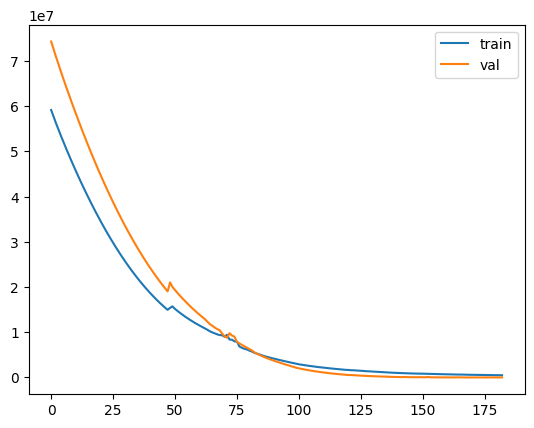

In [72]:
losses_train_1h = losses_1h['train']
losses_val_1h = losses_1h['val']

import matplotlib.pyplot as plt

plt.plot(losses_train_1h, label='train')
plt.plot(losses_val_1h, label='val')
plt.legend()
plt.show()

In [254]:
def validate(model, test_df, sequence_length, batch_size, scaler):
    test_dl = create_dataloader(test_df, sequence_length, batch_size, scaler)
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for X_batch, y_batch in test_dl:
            X_batch = X_batch.to('cuda')
            y_batch = y_batch.to('cuda')
            y_pred.extend(model(X_batch).cpu().numpy())
            y_true.extend(y_batch.cpu().numpy())

    plt.plot(y_true, label='true')
    plt.plot(y_pred, label='pred')
    plt.legend()
    plt.show()

    print(f'R2: {r2_score(y_true, y_pred)}')
    print(f'MSE: {mean_squared_error(y_true, y_pred)}')
    return y_true, y_pred


c:\Users\Konrad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


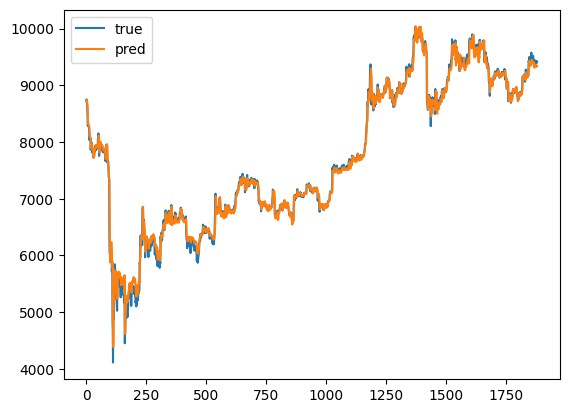

R2: 0.9931594107232063
MSE: 11774.33203125


In [255]:
hyperparams = {
    'sequence_length': 24,
    'batch_size': 32,
    'input_dim': 8,
    'hidden_dim': 128,
    'output_dim': 1,
    'num_layers': 2,
    'lr': 0.001,
    'epochs': 500,
    'patience': 10
}

model_1h = LSTMModel(
    input_dim=hyperparams['input_dim'],
    hidden_dim=hyperparams['hidden_dim'],
    output_dim=hyperparams['output_dim'],
    num_layers=hyperparams['num_layers']
).to(device)

model_1h.load_state_dict(torch.load('1h_model.pt'))

scaler_1h = pickle.load(open('1h_scaler.pkl', 'rb'))

y_true_1h, y_pred_1h = validate(model_1h, test_data_1h, hyperparams_1h['sequence_length'], hyperparams_1h['batch_size'], scaler_1h)

# 1 day intervals

In [259]:
hyperparams_24h = {
    'sequence_length': 7,
    'batch_size': 32,
    'input_dim': 8,
    'hidden_dim': 256,
    'output_dim': 1,
    'num_layers': 2,
    'lr': 0.001,
    'epochs': 2500,
    'patience': 10
}

model_24h, losses_24h, scaler_24h = test_all(train_data_24h, val_data_24h, hyperparams_24h, '24h')

Epoch 0: 100%|██████████| 22/22 [00:00<00:00, 58.01it/s]


Epoch 0 | Train loss: 60293302.6364 | Train R2: -8.9201 | Val loss: 76187769.3333 | Val R2: -64.1174 | Val MSE: 74008280.0000


Epoch 1: 100%|██████████| 22/22 [00:00<00:00, 163.80it/s]


Epoch 1 | Train loss: 60064006.5455 | Train R2: -8.8823 | Val loss: 75986005.3333 | Val R2: -63.9425 | Val MSE: 73809520.0000


Epoch 2: 100%|██████████| 22/22 [00:00<00:00, 139.75it/s]


Epoch 2 | Train loss: 59899696.7273 | Train R2: -8.8553 | Val loss: 75799344.0000 | Val R2: -63.7807 | Val MSE: 73625648.0000


Epoch 3: 100%|██████████| 22/22 [00:00<00:00, 111.55it/s]


Epoch 3 | Train loss: 59744340.7727 | Train R2: -8.8297 | Val loss: 75619962.6667 | Val R2: -63.6253 | Val MSE: 73448952.0000


Epoch 4: 100%|██████████| 22/22 [00:00<00:00, 166.04it/s]


Epoch 4 | Train loss: 59594045.8636 | Train R2: -8.8050 | Val loss: 75445052.0000 | Val R2: -63.4737 | Val MSE: 73276664.0000


Epoch 5: 100%|██████████| 22/22 [00:00<00:00, 163.97it/s]


Epoch 5 | Train loss: 59446896.3636 | Train R2: -8.7808 | Val loss: 75273013.3333 | Val R2: -63.3246 | Val MSE: 73107200.0000


Epoch 6: 100%|██████████| 22/22 [00:00<00:00, 155.39it/s]


Epoch 6 | Train loss: 59301828.7273 | Train R2: -8.7570 | Val loss: 75102984.0000 | Val R2: -63.1772 | Val MSE: 72939728.0000


Epoch 7: 100%|██████████| 22/22 [00:00<00:00, 174.61it/s]


Epoch 7 | Train loss: 59158292.9091 | Train R2: -8.7334 | Val loss: 74934477.3333 | Val R2: -63.0312 | Val MSE: 72773744.0000


Epoch 8: 100%|██████████| 22/22 [00:00<00:00, 148.31it/s]


Epoch 8 | Train loss: 59015937.5000 | Train R2: -8.7100 | Val loss: 74767173.3333 | Val R2: -62.8862 | Val MSE: 72608968.0000


Epoch 9: 100%|██████████| 22/22 [00:00<00:00, 170.82it/s]


Epoch 9 | Train loss: 58874549.5000 | Train R2: -8.6867 | Val loss: 74600868.0000 | Val R2: -62.7421 | Val MSE: 72445160.0000


Epoch 10: 100%|██████████| 22/22 [00:00<00:00, 171.07it/s]


Epoch 10 | Train loss: 58733978.2727 | Train R2: -8.6636 | Val loss: 74435421.3333 | Val R2: -62.5987 | Val MSE: 72282216.0000


Epoch 11: 100%|██████████| 22/22 [00:00<00:00, 175.38it/s]


Epoch 11 | Train loss: 58594122.8636 | Train R2: -8.6406 | Val loss: 74270730.6667 | Val R2: -62.4560 | Val MSE: 72120008.0000


Epoch 12: 100%|██████████| 22/22 [00:00<00:00, 123.69it/s]


Epoch 12 | Train loss: 58454892.6818 | Train R2: -8.6177 | Val loss: 74106700.0000 | Val R2: -62.3138 | Val MSE: 71958456.0000


Epoch 13: 100%|██████████| 22/22 [00:00<00:00, 165.49it/s]


Epoch 13 | Train loss: 58316239.2273 | Train R2: -8.5949 | Val loss: 73943290.6667 | Val R2: -62.1722 | Val MSE: 71797512.0000


Epoch 14: 100%|██████████| 22/22 [00:00<00:00, 167.51it/s]


Epoch 14 | Train loss: 58178105.5455 | Train R2: -8.5722 | Val loss: 73780434.6667 | Val R2: -62.0311 | Val MSE: 71637128.0000


Epoch 15: 100%|██████████| 22/22 [00:00<00:00, 174.14it/s]


Epoch 15 | Train loss: 58040460.6818 | Train R2: -8.5495 | Val loss: 73618114.6667 | Val R2: -61.8905 | Val MSE: 71477272.0000


Epoch 16: 100%|██████████| 22/22 [00:00<00:00, 164.13it/s]


Epoch 16 | Train loss: 57903279.5909 | Train R2: -8.5270 | Val loss: 73456272.0000 | Val R2: -61.7502 | Val MSE: 71317888.0000


Epoch 17: 100%|██████████| 22/22 [00:00<00:00, 167.52it/s]


Epoch 17 | Train loss: 57766527.0909 | Train R2: -8.5045 | Val loss: 73294902.6667 | Val R2: -61.6104 | Val MSE: 71158968.0000


Epoch 18: 100%|██████████| 22/22 [00:00<00:00, 172.78it/s]


Epoch 18 | Train loss: 57630189.6818 | Train R2: -8.4821 | Val loss: 73133978.6667 | Val R2: -61.4710 | Val MSE: 71000488.0000


Epoch 19: 100%|██████████| 22/22 [00:00<00:00, 170.81it/s]


Epoch 19 | Train loss: 57494245.9091 | Train R2: -8.4597 | Val loss: 72973476.0000 | Val R2: -61.3319 | Val MSE: 70842440.0000


Epoch 20: 100%|██████████| 22/22 [00:00<00:00, 104.44it/s]


Epoch 20 | Train loss: 57358685.4545 | Train R2: -8.4374 | Val loss: 72813378.6667 | Val R2: -61.1932 | Val MSE: 70684784.0000


Epoch 21: 100%|██████████| 22/22 [00:00<00:00, 133.16it/s]


Epoch 21 | Train loss: 57223489.3636 | Train R2: -8.4152 | Val loss: 72653682.6667 | Val R2: -61.0548 | Val MSE: 70527512.0000


Epoch 22: 100%|██████████| 22/22 [00:00<00:00, 173.53it/s]


Epoch 22 | Train loss: 57088649.3636 | Train R2: -8.3930 | Val loss: 72494365.3333 | Val R2: -60.9168 | Val MSE: 70370632.0000


Epoch 23: 100%|██████████| 22/22 [00:00<00:00, 166.67it/s]


Epoch 23 | Train loss: 56954156.7273 | Train R2: -8.3709 | Val loss: 72335425.3333 | Val R2: -60.7791 | Val MSE: 70214128.0000


Epoch 24: 100%|██████████| 22/22 [00:00<00:00, 174.18it/s]


Epoch 24 | Train loss: 56820000.7273 | Train R2: -8.3488 | Val loss: 72176840.0000 | Val R2: -60.6417 | Val MSE: 70057968.0000


Epoch 25: 100%|██████████| 22/22 [00:00<00:00, 168.88it/s]


Epoch 25 | Train loss: 56686173.4545 | Train R2: -8.3268 | Val loss: 72018610.6667 | Val R2: -60.5046 | Val MSE: 69902168.0000


Epoch 26: 100%|██████████| 22/22 [00:00<00:00, 165.98it/s]


Epoch 26 | Train loss: 56552674.1818 | Train R2: -8.3049 | Val loss: 71860732.0000 | Val R2: -60.3678 | Val MSE: 69746712.0000


Epoch 27: 100%|██████████| 22/22 [00:00<00:00, 136.68it/s]


Epoch 27 | Train loss: 56419491.7727 | Train R2: -8.2830 | Val loss: 71703186.6667 | Val R2: -60.2313 | Val MSE: 69591592.0000


Epoch 28: 100%|██████████| 22/22 [00:00<00:00, 149.78it/s]


Epoch 28 | Train loss: 56286619.6364 | Train R2: -8.2611 | Val loss: 71545978.6667 | Val R2: -60.0951 | Val MSE: 69436800.0000


Epoch 29: 100%|██████████| 22/22 [00:00<00:00, 159.39it/s]


Epoch 29 | Train loss: 56154053.4091 | Train R2: -8.2393 | Val loss: 71389094.6667 | Val R2: -59.9592 | Val MSE: 69282336.0000


Epoch 30: 100%|██████████| 22/22 [00:00<00:00, 174.44it/s]


Epoch 30 | Train loss: 56021789.5000 | Train R2: -8.2176 | Val loss: 71232538.6667 | Val R2: -59.8236 | Val MSE: 69128192.0000


Epoch 31: 100%|██████████| 22/22 [00:00<00:00, 138.77it/s]


Epoch 31 | Train loss: 55889825.0455 | Train R2: -8.1958 | Val loss: 71076301.3333 | Val R2: -59.6882 | Val MSE: 68974368.0000


Epoch 32: 100%|██████████| 22/22 [00:00<00:00, 161.90it/s]


Epoch 32 | Train loss: 55758153.3636 | Train R2: -8.1742 | Val loss: 70920377.3333 | Val R2: -59.5532 | Val MSE: 68820848.0000


Epoch 33: 100%|██████████| 22/22 [00:00<00:00, 170.34it/s]


Epoch 33 | Train loss: 55626770.4091 | Train R2: -8.1526 | Val loss: 70764761.3333 | Val R2: -59.4184 | Val MSE: 68667648.0000


Epoch 34: 100%|██████████| 22/22 [00:00<00:00, 174.98it/s]


Epoch 34 | Train loss: 55495675.4545 | Train R2: -8.1310 | Val loss: 70609450.6667 | Val R2: -59.2838 | Val MSE: 68514744.0000


Epoch 35: 100%|██████████| 22/22 [00:00<00:00, 169.70it/s]


Epoch 35 | Train loss: 55364864.3636 | Train R2: -8.1095 | Val loss: 70454433.3333 | Val R2: -59.1495 | Val MSE: 68362136.0000


Epoch 36: 100%|██████████| 22/22 [00:00<00:00, 166.91it/s]


Epoch 36 | Train loss: 55234334.6818 | Train R2: -8.0881 | Val loss: 70299729.3333 | Val R2: -59.0155 | Val MSE: 68209824.0000


Epoch 37: 100%|██████████| 22/22 [00:00<00:00, 179.09it/s]


Epoch 37 | Train loss: 55104081.7727 | Train R2: -8.0666 | Val loss: 70145313.3333 | Val R2: -58.8818 | Val MSE: 68057816.0000


Epoch 38: 100%|██████████| 22/22 [00:00<00:00, 111.81it/s]


Epoch 38 | Train loss: 54974105.9091 | Train R2: -8.0453 | Val loss: 69991194.6667 | Val R2: -58.7483 | Val MSE: 67906088.0000


Epoch 39: 100%|██████████| 22/22 [00:00<00:00, 177.98it/s]


Epoch 39 | Train loss: 54844401.8182 | Train R2: -8.0239 | Val loss: 69837362.6667 | Val R2: -58.6151 | Val MSE: 67754656.0000


Epoch 40: 100%|██████████| 22/22 [00:00<00:00, 172.12it/s]


Epoch 40 | Train loss: 54714968.2273 | Train R2: -8.0026 | Val loss: 69683826.6667 | Val R2: -58.4821 | Val MSE: 67603504.0000


Epoch 41: 100%|██████████| 22/22 [00:00<00:00, 173.49it/s]


Epoch 41 | Train loss: 54585804.9091 | Train R2: -7.9814 | Val loss: 69530578.6667 | Val R2: -58.3493 | Val MSE: 67452648.0000


Epoch 42: 100%|██████████| 22/22 [00:00<00:00, 172.60it/s]


Epoch 42 | Train loss: 54456907.1364 | Train R2: -7.9602 | Val loss: 69377602.6667 | Val R2: -58.2168 | Val MSE: 67302064.0000


Epoch 43: 100%|██████████| 22/22 [00:00<00:00, 173.95it/s]


Epoch 43 | Train loss: 54328275.7273 | Train R2: -7.9391 | Val loss: 69224914.6667 | Val R2: -58.0846 | Val MSE: 67151768.0000


Epoch 44: 100%|██████████| 22/22 [00:00<00:00, 168.39it/s]


Epoch 44 | Train loss: 54199903.5000 | Train R2: -7.9179 | Val loss: 69072496.0000 | Val R2: -57.9526 | Val MSE: 67001736.0000


Epoch 45: 100%|██████████| 22/22 [00:00<00:00, 167.77it/s]


Epoch 45 | Train loss: 54071794.1364 | Train R2: -7.8969 | Val loss: 68920362.6667 | Val R2: -57.8208 | Val MSE: 66851992.0000


Epoch 46: 100%|██████████| 22/22 [00:00<00:00, 158.77it/s]


Epoch 46 | Train loss: 53943943.5909 | Train R2: -7.8758 | Val loss: 68768506.6667 | Val R2: -57.6893 | Val MSE: 66702512.0000


Epoch 47: 100%|██████████| 22/22 [00:00<00:00, 127.98it/s]


Epoch 47 | Train loss: 53816351.1818 | Train R2: -7.8549 | Val loss: 68616917.3333 | Val R2: -57.5580 | Val MSE: 66553308.0000


Epoch 48: 100%|██████████| 22/22 [00:00<00:00, 170.40it/s]


Epoch 48 | Train loss: 53689015.4091 | Train R2: -7.8339 | Val loss: 68465597.3333 | Val R2: -57.4270 | Val MSE: 66404372.0000


Epoch 49: 100%|██████████| 22/22 [00:00<00:00, 173.46it/s]


Epoch 49 | Train loss: 53561933.4091 | Train R2: -7.8130 | Val loss: 68314552.0000 | Val R2: -57.2962 | Val MSE: 66255700.0000


Epoch 50: 100%|██████████| 22/22 [00:00<00:00, 164.80it/s]


Epoch 50 | Train loss: 53435104.9545 | Train R2: -7.7922 | Val loss: 68163773.3333 | Val R2: -57.1656 | Val MSE: 66107304.0000


Epoch 51: 100%|██████████| 22/22 [00:00<00:00, 166.05it/s]


Epoch 51 | Train loss: 53308526.9091 | Train R2: -7.7714 | Val loss: 68013262.6667 | Val R2: -57.0353 | Val MSE: 65959164.0000


Epoch 52: 100%|██████████| 22/22 [00:00<00:00, 168.64it/s]


Epoch 52 | Train loss: 53182199.8636 | Train R2: -7.7506 | Val loss: 67863014.6667 | Val R2: -56.9052 | Val MSE: 65811292.0000


Epoch 53: 100%|██████████| 22/22 [00:00<00:00, 157.59it/s]


Epoch 53 | Train loss: 53056122.8182 | Train R2: -7.7298 | Val loss: 67713026.6667 | Val R2: -56.7753 | Val MSE: 65663676.0000


Epoch 54: 100%|██████████| 22/22 [00:00<00:00, 151.26it/s]


Epoch 54 | Train loss: 52930292.5000 | Train R2: -7.7092 | Val loss: 67563313.3333 | Val R2: -56.6456 | Val MSE: 65516336.0000


Epoch 55: 100%|██████████| 22/22 [00:00<00:00, 114.42it/s]


Epoch 55 | Train loss: 52804709.3636 | Train R2: -7.6885 | Val loss: 67413856.0000 | Val R2: -56.5162 | Val MSE: 65369252.0000


Epoch 56: 100%|██████████| 22/22 [00:00<00:00, 153.53it/s]


Epoch 56 | Train loss: 52679371.7273 | Train R2: -7.6679 | Val loss: 67264650.6667 | Val R2: -56.3870 | Val MSE: 65222416.0000


Epoch 57: 100%|██████████| 22/22 [00:00<00:00, 152.92it/s]


Epoch 57 | Train loss: 52554277.0909 | Train R2: -7.6473 | Val loss: 67115706.6667 | Val R2: -56.2581 | Val MSE: 65075832.0000


Epoch 58: 100%|██████████| 22/22 [00:00<00:00, 140.62it/s]


Epoch 58 | Train loss: 52429424.7273 | Train R2: -7.6268 | Val loss: 66967021.3333 | Val R2: -56.1293 | Val MSE: 64929520.0000


Epoch 59: 100%|██████████| 22/22 [00:00<00:00, 148.14it/s]


Epoch 59 | Train loss: 52304816.8636 | Train R2: -7.6063 | Val loss: 66818589.3333 | Val R2: -56.0008 | Val MSE: 64783448.0000


Epoch 60: 100%|██████████| 22/22 [00:00<00:00, 131.19it/s]

Epoch 60 | Train loss: 52180447.9545 | Train R2: -7.5858 | Val loss: 66670416.0000 | Val R2: -55.8725 | Val MSE: 64637644.0000

Epoch 61: 100%|██████████| 22/22 [00:00<00:00, 95.07it/s]


Epoch 61 | Train loss: 52056320.1364 | Train R2: -7.5654 | Val loss: 66522490.6667 | Val R2: -55.7444 | Val MSE: 64492076.0000


Epoch 62: 100%|██████████| 22/22 [00:00<00:00, 158.33it/s]


Epoch 62 | Train loss: 51932429.9091 | Train R2: -7.5451 | Val loss: 66374821.3333 | Val R2: -55.6166 | Val MSE: 64346764.0000


Epoch 63: 100%|██████████| 22/22 [00:00<00:00, 150.81it/s]


Epoch 63 | Train loss: 51808778.7273 | Train R2: -7.5247 | Val loss: 66227405.3333 | Val R2: -55.4889 | Val MSE: 64201704.0000


Epoch 64: 100%|██████████| 22/22 [00:00<00:00, 168.46it/s]


Epoch 64 | Train loss: 51685363.3636 | Train R2: -7.5044 | Val loss: 66080233.3333 | Val R2: -55.3615 | Val MSE: 64056896.0000


Epoch 65: 100%|██████████| 22/22 [00:00<00:00, 150.14it/s]


Epoch 65 | Train loss: 51562182.4545 | Train R2: -7.4842 | Val loss: 65933309.3333 | Val R2: -55.2343 | Val MSE: 63912328.0000


Epoch 66: 100%|██████████| 22/22 [00:00<00:00, 147.30it/s]


Epoch 66 | Train loss: 51439237.6818 | Train R2: -7.4640 | Val loss: 65786637.3333 | Val R2: -55.1073 | Val MSE: 63768008.0000


Epoch 67: 100%|██████████| 22/22 [00:00<00:00, 138.67it/s]

Epoch 67 | Train loss: 51316528.5455 | Train R2: -7.4438 | Val loss: 65640213.3333 | Val R2: -54.9806 | Val MSE: 63623940.0000

Epoch 68: 100%|██████████| 22/22 [00:00<00:00, 136.47it/s]


Epoch 68 | Train loss: 51194051.8182 | Train R2: -7.4236 | Val loss: 65494024.0000 | Val R2: -54.8540 | Val MSE: 63480104.0000


Epoch 69: 100%|██████████| 22/22 [00:00<00:00, 156.85it/s]


Epoch 69 | Train loss: 51071805.6364 | Train R2: -7.4035 | Val loss: 65348090.6667 | Val R2: -54.7277 | Val MSE: 63336524.0000


Epoch 70: 100%|██████████| 22/22 [00:00<00:00, 172.23it/s]


Epoch 70 | Train loss: 50949791.8182 | Train R2: -7.3835 | Val loss: 65202394.6667 | Val R2: -54.6016 | Val MSE: 63193176.0000


Epoch 71: 100%|██████████| 22/22 [00:00<00:00, 170.23it/s]


Epoch 71 | Train loss: 50828008.8636 | Train R2: -7.3634 | Val loss: 65056950.6667 | Val R2: -54.4757 | Val MSE: 63050068.0000


Epoch 72: 100%|██████████| 22/22 [00:00<00:00, 156.23it/s]


Epoch 72 | Train loss: 50706455.3636 | Train R2: -7.3435 | Val loss: 64911744.0000 | Val R2: -54.3500 | Val MSE: 62907216.0000


Epoch 73: 100%|██████████| 22/22 [00:00<00:00, 137.86it/s]


Epoch 73 | Train loss: 50585130.8636 | Train R2: -7.3235 | Val loss: 64766770.6667 | Val R2: -54.2245 | Val MSE: 62764596.0000


Epoch 74: 100%|██████████| 22/22 [00:00<00:00, 118.59it/s]


Epoch 74 | Train loss: 50464035.0909 | Train R2: -7.3036 | Val loss: 64622046.6667 | Val R2: -54.0992 | Val MSE: 62622216.0000


Epoch 75: 100%|██████████| 22/22 [00:00<00:00, 154.34it/s]


Epoch 75 | Train loss: 50343166.4091 | Train R2: -7.2837 | Val loss: 64477554.6667 | Val R2: -53.9741 | Val MSE: 62480060.0000


Epoch 76: 100%|██████████| 22/22 [00:00<00:00, 159.80it/s]


Epoch 76 | Train loss: 50222525.0000 | Train R2: -7.2639 | Val loss: 64333305.3333 | Val R2: -53.8493 | Val MSE: 62338156.0000


Epoch 77: 100%|██████████| 22/22 [00:00<00:00, 149.92it/s]


Epoch 77 | Train loss: 50102108.3409 | Train R2: -7.2441 | Val loss: 64189298.6667 | Val R2: -53.7246 | Val MSE: 62196496.0000


Epoch 78: 100%|██████████| 22/22 [00:00<00:00, 144.21it/s]


Epoch 78 | Train loss: 49981918.3864 | Train R2: -7.2243 | Val loss: 64045522.6667 | Val R2: -53.6002 | Val MSE: 62055052.0000


Epoch 79: 100%|██████████| 22/22 [00:00<00:00, 166.81it/s]


Epoch 79 | Train loss: 49861951.8409 | Train R2: -7.2046 | Val loss: 63901982.6667 | Val R2: -53.4759 | Val MSE: 61913852.0000


Epoch 80: 100%|██████████| 22/22 [00:00<00:00, 154.94it/s]


Epoch 80 | Train loss: 49742208.5000 | Train R2: -7.1849 | Val loss: 63758680.0000 | Val R2: -53.3519 | Val MSE: 61772888.0000


Epoch 81: 100%|██████████| 22/22 [00:00<00:00, 113.34it/s]


Epoch 81 | Train loss: 49622689.9091 | Train R2: -7.1652 | Val loss: 63615610.6667 | Val R2: -53.2281 | Val MSE: 61632160.0000


Epoch 82: 100%|██████████| 22/22 [00:00<00:00, 165.96it/s]


Epoch 82 | Train loss: 49503392.0909 | Train R2: -7.1456 | Val loss: 63472770.6667 | Val R2: -53.1044 | Val MSE: 61491656.0000


Epoch 83: 100%|██████████| 22/22 [00:00<00:00, 156.85it/s]


Epoch 83 | Train loss: 49384316.2955 | Train R2: -7.1260 | Val loss: 63330172.0000 | Val R2: -52.9810 | Val MSE: 61351388.0000


Epoch 84: 100%|██████████| 22/22 [00:00<00:00, 161.64it/s]


Epoch 84 | Train loss: 49265462.5909 | Train R2: -7.1065 | Val loss: 63187794.6667 | Val R2: -52.8578 | Val MSE: 61211352.0000


Epoch 85: 100%|██████████| 22/22 [00:00<00:00, 172.54it/s]


Epoch 85 | Train loss: 49146828.1364 | Train R2: -7.0870 | Val loss: 63045661.3333 | Val R2: -52.7348 | Val MSE: 61071548.0000


Epoch 86: 100%|██████████| 22/22 [00:00<00:00, 167.15it/s]


Epoch 86 | Train loss: 49028412.4545 | Train R2: -7.0675 | Val loss: 62903749.3333 | Val R2: -52.6120 | Val MSE: 60931956.0000


Epoch 87: 100%|██████████| 22/22 [00:00<00:00, 164.50it/s]


Epoch 87 | Train loss: 48910216.4318 | Train R2: -7.0481 | Val loss: 62762072.0000 | Val R2: -52.4894 | Val MSE: 60792612.0000


Epoch 88: 100%|██████████| 22/22 [00:00<00:00, 179.19it/s]


Epoch 88 | Train loss: 48791974.5455 | Train R2: -7.0286 | Val loss: 62619620.0000 | Val R2: -52.3661 | Val MSE: 60652508.0000


Epoch 89: 100%|██████████| 22/22 [00:00<00:00, 165.82it/s]


Epoch 89 | Train loss: 48673061.5000 | Train R2: -7.0091 | Val loss: 62477008.0000 | Val R2: -52.2427 | Val MSE: 60512244.0000


Epoch 90: 100%|██████████| 22/22 [00:00<00:00, 107.48it/s]


Epoch 90 | Train loss: 48554487.8864 | Train R2: -6.9896 | Val loss: 62334928.0000 | Val R2: -52.1198 | Val MSE: 60372512.0000


Epoch 91: 100%|██████████| 22/22 [00:00<00:00, 148.33it/s]


Epoch 91 | Train loss: 48436341.2045 | Train R2: -6.9701 | Val loss: 62193261.3333 | Val R2: -51.9972 | Val MSE: 60233192.0000


Epoch 92: 100%|██████████| 22/22 [00:00<00:00, 128.47it/s]

Epoch 92 | Train loss: 48318539.8409 | Train R2: -6.9508 | Val loss: 62051946.6667 | Val R2: -51.8749 | Val MSE: 60094212.0000

Epoch 93: 100%|██████████| 22/22 [00:00<00:00, 124.20it/s]


Epoch 93 | Train loss: 48201034.1591 | Train R2: -6.9315 | Val loss: 61910941.3333 | Val R2: -51.7529 | Val MSE: 59955536.0000


Epoch 94: 100%|██████████| 22/22 [00:00<00:00, 168.10it/s]


Epoch 94 | Train loss: 48083801.4318 | Train R2: -6.9122 | Val loss: 61770214.6667 | Val R2: -51.6311 | Val MSE: 59817144.0000


Epoch 95: 100%|██████████| 22/22 [00:00<00:00, 155.05it/s]


Epoch 95 | Train loss: 47966828.0000 | Train R2: -6.8929 | Val loss: 61629760.0000 | Val R2: -51.5096 | Val MSE: 59679016.0000


Epoch 96: 100%|██████████| 22/22 [00:00<00:00, 155.60it/s]


Epoch 96 | Train loss: 47850104.6818 | Train R2: -6.8737 | Val loss: 61489570.6667 | Val R2: -51.3883 | Val MSE: 59541156.0000


Epoch 97: 100%|██████████| 22/22 [00:00<00:00, 146.78it/s]


Epoch 97 | Train loss: 47733624.0455 | Train R2: -6.8546 | Val loss: 61349633.3333 | Val R2: -51.2672 | Val MSE: 59403556.0000


Epoch 98: 100%|██████████| 22/22 [00:00<00:00, 107.85it/s]


Epoch 98 | Train loss: 47617378.0682 | Train R2: -6.8355 | Val loss: 61209942.6667 | Val R2: -51.1463 | Val MSE: 59266192.0000


Epoch 99: 100%|██████████| 22/22 [00:00<00:00, 154.54it/s]


Epoch 99 | Train loss: 47501365.4773 | Train R2: -6.8164 | Val loss: 61070508.0000 | Val R2: -51.0257 | Val MSE: 59129080.0000


Epoch 100: 100%|██████████| 22/22 [00:00<00:00, 156.56it/s]


Epoch 100 | Train loss: 47385581.7045 | Train R2: -6.7974 | Val loss: 60931301.3333 | Val R2: -50.9053 | Val MSE: 58992196.0000


Epoch 101: 100%|██████████| 22/22 [00:00<00:00, 120.31it/s]


Epoch 101 | Train loss: 47270024.9318 | Train R2: -6.7784 | Val loss: 60792337.3333 | Val R2: -50.7850 | Val MSE: 58855552.0000


Epoch 102: 100%|██████████| 22/22 [00:00<00:00, 120.30it/s]


Epoch 102 | Train loss: 47154690.7045 | Train R2: -6.7594 | Val loss: 60653610.6667 | Val R2: -50.6650 | Val MSE: 58719144.0000


Epoch 103: 100%|██████████| 22/22 [00:00<00:00, 102.01it/s]


Epoch 103 | Train loss: 47039580.8182 | Train R2: -6.7405 | Val loss: 60515117.3333 | Val R2: -50.5452 | Val MSE: 58582976.0000


Epoch 104: 100%|██████████| 22/22 [00:00<00:00, 117.07it/s]


Epoch 104 | Train loss: 46924692.7273 | Train R2: -6.7216 | Val loss: 60376850.6667 | Val R2: -50.4256 | Val MSE: 58447024.0000


Epoch 105: 100%|██████████| 22/22 [00:00<00:00, 128.00it/s]


Epoch 105 | Train loss: 46810022.7273 | Train R2: -6.7027 | Val loss: 60238829.3333 | Val R2: -50.3062 | Val MSE: 58311320.0000


Epoch 106: 100%|██████████| 22/22 [00:00<00:00, 135.78it/s]

Epoch 106 | Train loss: 46695572.0455 | Train R2: -6.6839 | Val loss: 60101026.6667 | Val R2: -50.1870 | Val MSE: 58175836.0000



Epoch 107: 100%|██████████| 22/22 [00:00<00:00, 139.60it/s]


Epoch 107 | Train loss: 46581336.0682 | Train R2: -6.6651 | Val loss: 59963448.0000 | Val R2: -50.0680 | Val MSE: 58040572.0000


Epoch 108: 100%|██████████| 22/22 [00:00<00:00, 134.99it/s]


Epoch 108 | Train loss: 46467316.5000 | Train R2: -6.6464 | Val loss: 59826102.6667 | Val R2: -49.9491 | Val MSE: 57905536.0000


Epoch 109: 100%|██████████| 22/22 [00:00<00:00, 98.57it/s] 


Epoch 109 | Train loss: 46353511.9091 | Train R2: -6.6276 | Val loss: 59688978.6667 | Val R2: -49.8305 | Val MSE: 57770724.0000


Epoch 110: 100%|██████████| 22/22 [00:00<00:00, 129.42it/s]


Epoch 110 | Train loss: 46239920.8182 | Train R2: -6.6090 | Val loss: 59552081.3333 | Val R2: -49.7121 | Val MSE: 57636144.0000


Epoch 111: 100%|██████████| 22/22 [00:00<00:00, 129.22it/s]


Epoch 111 | Train loss: 46126540.7727 | Train R2: -6.5903 | Val loss: 59415397.3333 | Val R2: -49.5939 | Val MSE: 57501780.0000


Epoch 112: 100%|██████████| 22/22 [00:00<00:00, 136.62it/s]


Epoch 112 | Train loss: 46013373.3864 | Train R2: -6.5717 | Val loss: 59278949.3333 | Val R2: -49.4759 | Val MSE: 57367628.0000


Epoch 113: 100%|██████████| 22/22 [00:00<00:00, 135.16it/s]


Epoch 113 | Train loss: 45900417.7727 | Train R2: -6.5531 | Val loss: 59142714.6667 | Val R2: -49.3580 | Val MSE: 57233712.0000


Epoch 114: 100%|██████████| 22/22 [00:00<00:00, 116.67it/s]


Epoch 114 | Train loss: 45787669.9318 | Train R2: -6.5346 | Val loss: 59006696.0000 | Val R2: -49.2404 | Val MSE: 57099996.0000


Epoch 115: 100%|██████████| 22/22 [00:00<00:00, 150.63it/s]


Epoch 115 | Train loss: 45675132.8182 | Train R2: -6.5161 | Val loss: 58870910.6667 | Val R2: -49.1229 | Val MSE: 56966516.0000


Epoch 116: 100%|██████████| 22/22 [00:00<00:00, 152.80it/s]


Epoch 116 | Train loss: 45562805.6136 | Train R2: -6.4976 | Val loss: 58735328.0000 | Val R2: -49.0057 | Val MSE: 56833244.0000


Epoch 117: 100%|██████████| 22/22 [00:00<00:00, 155.54it/s]


Epoch 117 | Train loss: 45450684.8182 | Train R2: -6.4792 | Val loss: 58599973.3333 | Val R2: -48.8886 | Val MSE: 56700196.0000


Epoch 118: 100%|██████████| 22/22 [00:00<00:00, 151.22it/s]


Epoch 118 | Train loss: 45338774.7955 | Train R2: -6.4608 | Val loss: 58464834.6667 | Val R2: -48.7717 | Val MSE: 56567360.0000


Epoch 119: 100%|██████████| 22/22 [00:00<00:00, 97.40it/s] 


Epoch 119 | Train loss: 45227067.6818 | Train R2: -6.4424 | Val loss: 58329906.6667 | Val R2: -48.6550 | Val MSE: 56434732.0000


Epoch 120: 100%|██████████| 22/22 [00:00<00:00, 151.32it/s]


Epoch 120 | Train loss: 45115568.1364 | Train R2: -6.4241 | Val loss: 58195197.3333 | Val R2: -48.5385 | Val MSE: 56302328.0000


Epoch 121: 100%|██████████| 22/22 [00:00<00:00, 162.81it/s]


Epoch 121 | Train loss: 45004273.8409 | Train R2: -6.4058 | Val loss: 58060702.6667 | Val R2: -48.4222 | Val MSE: 56170136.0000


Epoch 122: 100%|██████████| 22/22 [00:00<00:00, 146.84it/s]


Epoch 122 | Train loss: 44893184.0455 | Train R2: -6.3875 | Val loss: 57926429.3333 | Val R2: -48.3061 | Val MSE: 56038160.0000


Epoch 123: 100%|██████████| 22/22 [00:00<00:00, 134.99it/s]

Epoch 123 | Train loss: 44782299.0227 | Train R2: -6.3693 | Val loss: 57792362.6667 | Val R2: -48.1902 | Val MSE: 55906400.0000

Epoch 124: 100%|██████████| 22/22 [00:00<00:00, 108.87it/s]


Epoch 124 | Train loss: 44671620.7500 | Train R2: -6.3511 | Val loss: 57658510.6667 | Val R2: -48.0744 | Val MSE: 55774840.0000


Epoch 125: 100%|██████████| 22/22 [00:00<00:00, 141.33it/s]


Epoch 125 | Train loss: 44561143.6364 | Train R2: -6.3329 | Val loss: 57524873.3333 | Val R2: -47.9589 | Val MSE: 55643504.0000


Epoch 126: 100%|██████████| 22/22 [00:00<00:00, 152.33it/s]


Epoch 126 | Train loss: 44450870.0909 | Train R2: -6.3148 | Val loss: 57391448.0000 | Val R2: -47.8435 | Val MSE: 55512372.0000


Epoch 127: 100%|██████████| 22/22 [00:00<00:00, 146.01it/s]


Epoch 127 | Train loss: 44340801.3409 | Train R2: -6.2967 | Val loss: 57258234.6667 | Val R2: -47.7283 | Val MSE: 55381452.0000


Epoch 128: 100%|██████████| 22/22 [00:00<00:00, 144.64it/s]


Epoch 128 | Train loss: 44230933.8409 | Train R2: -6.2786 | Val loss: 57125234.6667 | Val R2: -47.6133 | Val MSE: 55250748.0000


Epoch 129: 100%|██████████| 22/22 [00:00<00:00, 100.58it/s]


Epoch 129 | Train loss: 44121267.8636 | Train R2: -6.2606 | Val loss: 56992445.3333 | Val R2: -47.4985 | Val MSE: 55120244.0000


Epoch 130: 100%|██████████| 22/22 [00:00<00:00, 152.20it/s]


Epoch 130 | Train loss: 44011802.0455 | Train R2: -6.2426 | Val loss: 56859861.3333 | Val R2: -47.3838 | Val MSE: 54989964.0000


Epoch 131: 100%|██████████| 22/22 [00:00<00:00, 153.59it/s]


Epoch 131 | Train loss: 43902537.4091 | Train R2: -6.2246 | Val loss: 56727489.3333 | Val R2: -47.2694 | Val MSE: 54859884.0000


Epoch 132: 100%|██████████| 22/22 [00:00<00:00, 144.17it/s]


Epoch 132 | Train loss: 43793472.0909 | Train R2: -6.2067 | Val loss: 56595325.3333 | Val R2: -47.1551 | Val MSE: 54730012.0000


Epoch 133: 100%|██████████| 22/22 [00:00<00:00, 134.73it/s]

Epoch 133 | Train loss: 43684608.6136 | Train R2: -6.1888 | Val loss: 56463370.6667 | Val R2: -47.0410 | Val MSE: 54600336.0000

Epoch 134: 100%|██████████| 22/22 [00:00<00:00, 140.06it/s]


Epoch 134 | Train loss: 43575943.3636 | Train R2: -6.1709 | Val loss: 56331629.3333 | Val R2: -46.9271 | Val MSE: 54470884.0000


Epoch 135: 100%|██████████| 22/22 [00:00<00:00, 98.03it/s] 


Epoch 135 | Train loss: 43467478.7045 | Train R2: -6.1531 | Val loss: 56200086.6667 | Val R2: -46.8134 | Val MSE: 54341640.0000


Epoch 136: 100%|██████████| 22/22 [00:00<00:00, 155.66it/s]


Epoch 136 | Train loss: 43359212.4545 | Train R2: -6.1353 | Val loss: 56068764.0000 | Val R2: -46.6999 | Val MSE: 54212596.0000


Epoch 137: 100%|██████████| 22/22 [00:00<00:00, 155.69it/s]


Epoch 137 | Train loss: 43251143.0909 | Train R2: -6.1175 | Val loss: 55937638.6667 | Val R2: -46.5865 | Val MSE: 54083760.0000


Epoch 138: 100%|██████████| 22/22 [00:00<00:00, 154.18it/s]


Epoch 138 | Train loss: 43143273.4318 | Train R2: -6.0998 | Val loss: 55806722.6667 | Val R2: -46.4733 | Val MSE: 53955128.0000


Epoch 139: 100%|██████████| 22/22 [00:00<00:00, 142.72it/s]


Epoch 139 | Train loss: 43035600.0909 | Train R2: -6.0821 | Val loss: 55676009.3333 | Val R2: -46.3603 | Val MSE: 53826700.0000


Epoch 140: 100%|██████████| 22/22 [00:00<00:00, 131.91it/s]

Epoch 140 | Train loss: 42928122.7273 | Train R2: -6.0644 | Val loss: 55545505.3333 | Val R2: -46.2475 | Val MSE: 53698484.0000



Epoch 141: 100%|██████████| 22/22 [00:00<00:00, 142.65it/s]


Epoch 141 | Train loss: 42820844.8409 | Train R2: -6.0467 | Val loss: 55415202.6667 | Val R2: -46.1349 | Val MSE: 53570464.0000


Epoch 142: 100%|██████████| 22/22 [00:00<00:00, 129.40it/s]

Epoch 142 | Train loss: 42713760.3636 | Train R2: -6.0291 | Val loss: 55285113.3333 | Val R2: -46.0224 | Val MSE: 53442656.0000

Epoch 143: 100%|██████████| 22/22 [00:00<00:00, 121.64it/s]


Epoch 143 | Train loss: 42606873.9091 | Train R2: -6.0116 | Val loss: 55155214.6667 | Val R2: -45.9101 | Val MSE: 53315036.0000


Epoch 144: 100%|██████████| 22/22 [00:00<00:00, 137.61it/s]

Epoch 144 | Train loss: 42500181.9318 | Train R2: -5.9940 | Val loss: 55025534.6667 | Val R2: -45.7980 | Val MSE: 53187636.0000



Epoch 145: 100%|██████████| 22/22 [00:00<00:00, 143.49it/s]


Epoch 145 | Train loss: 42393687.0455 | Train R2: -5.9765 | Val loss: 54896058.6667 | Val R2: -45.6861 | Val MSE: 53060436.0000


Epoch 146: 100%|██████████| 22/22 [00:00<00:00, 147.90it/s]


Epoch 146 | Train loss: 42287388.5682 | Train R2: -5.9590 | Val loss: 54766774.6667 | Val R2: -45.5744 | Val MSE: 52933436.0000


Epoch 147: 100%|██████████| 22/22 [00:00<00:00, 148.96it/s]


Epoch 147 | Train loss: 42181282.2273 | Train R2: -5.9416 | Val loss: 54637701.3333 | Val R2: -45.4628 | Val MSE: 52806644.0000


Epoch 148: 100%|██████████| 22/22 [00:00<00:00, 142.47it/s]


Epoch 148 | Train loss: 42075373.2955 | Train R2: -5.9242 | Val loss: 54508833.3333 | Val R2: -45.3514 | Val MSE: 52680044.0000


Epoch 149: 100%|██████████| 22/22 [00:00<00:00, 139.89it/s]


Epoch 149 | Train loss: 41969657.4773 | Train R2: -5.9068 | Val loss: 54380164.0000 | Val R2: -45.2402 | Val MSE: 52553660.0000


Epoch 150: 100%|██████████| 22/22 [00:00<00:00, 136.72it/s]

Epoch 150 | Train loss: 41864134.0000 | Train R2: -5.8894 | Val loss: 54251700.0000 | Val R2: -45.1292 | Val MSE: 52427468.0000



Epoch 151: 100%|██████████| 22/22 [00:00<00:00, 138.86it/s]


Epoch 151 | Train loss: 41758804.6591 | Train R2: -5.8721 | Val loss: 54123429.3333 | Val R2: -45.0183 | Val MSE: 52301472.0000


Epoch 152: 100%|██████████| 22/22 [00:00<00:00, 104.08it/s]


Epoch 152 | Train loss: 41653668.6818 | Train R2: -5.8548 | Val loss: 53995366.6667 | Val R2: -44.9076 | Val MSE: 52175680.0000


Epoch 153: 100%|██████████| 22/22 [00:00<00:00, 92.62it/s]


Epoch 153 | Train loss: 41548727.0682 | Train R2: -5.8376 | Val loss: 53867506.6667 | Val R2: -44.7971 | Val MSE: 52050092.0000


Epoch 154: 100%|██████████| 22/22 [00:00<00:00, 146.53it/s]


Epoch 154 | Train loss: 41443977.3409 | Train R2: -5.8203 | Val loss: 53739845.3333 | Val R2: -44.6868 | Val MSE: 51924704.0000


Epoch 155: 100%|██████████| 22/22 [00:00<00:00, 141.73it/s]

Epoch 155 | Train loss: 41339419.0000 | Train R2: -5.8031 | Val loss: 53612382.6667 | Val R2: -44.5767 | Val MSE: 51799516.0000

Epoch 156: 100%|██████████| 22/22 [00:00<00:00, 154.75it/s]


Epoch 156 | Train loss: 41235053.7955 | Train R2: -5.7860 | Val loss: 53485121.3333 | Val R2: -44.4667 | Val MSE: 51674524.0000


Epoch 157: 100%|██████████| 22/22 [00:00<00:00, 158.23it/s]


Epoch 157 | Train loss: 41130880.8182 | Train R2: -5.7689 | Val loss: 53358060.0000 | Val R2: -44.3569 | Val MSE: 51549728.0000


Epoch 158: 100%|██████████| 22/22 [00:00<00:00, 163.73it/s]


Epoch 158 | Train loss: 41026896.3636 | Train R2: -5.7518 | Val loss: 53231193.3333 | Val R2: -44.2473 | Val MSE: 51425136.0000


Epoch 159: 100%|██████████| 22/22 [00:00<00:00, 151.81it/s]


Epoch 159 | Train loss: 40923104.3864 | Train R2: -5.7347 | Val loss: 53104533.3333 | Val R2: -44.1378 | Val MSE: 51300740.0000


Epoch 160: 100%|██████████| 22/22 [00:00<00:00, 147.24it/s]


Epoch 160 | Train loss: 40819504.2727 | Train R2: -5.7177 | Val loss: 52978069.3333 | Val R2: -44.0285 | Val MSE: 51176544.0000


Epoch 161: 100%|██████████| 22/22 [00:00<00:00, 137.57it/s]

Epoch 161 | Train loss: 40716095.7955 | Train R2: -5.7006 | Val loss: 52851801.3333 | Val R2: -43.9194 | Val MSE: 51052544.0000



Epoch 162: 100%|██████████| 22/22 [00:00<00:00, 140.62it/s]


Epoch 162 | Train loss: 40612876.6591 | Train R2: -5.6837 | Val loss: 52725741.3333 | Val R2: -43.8105 | Val MSE: 50928752.0000


Epoch 163: 100%|██████████| 22/22 [00:00<00:00, 107.04it/s]


Epoch 163 | Train loss: 40509849.4773 | Train R2: -5.6667 | Val loss: 52599870.6667 | Val R2: -43.7017 | Val MSE: 50805140.0000


Epoch 164: 100%|██████████| 22/22 [00:00<00:00, 140.04it/s]

Epoch 164 | Train loss: 40407010.3182 | Train R2: -5.6498 | Val loss: 52474204.0000 | Val R2: -43.5932 | Val MSE: 50681740.0000



Epoch 165: 100%|██████████| 22/22 [00:00<00:00, 162.30it/s]


Epoch 165 | Train loss: 40304360.9545 | Train R2: -5.6329 | Val loss: 52348730.6667 | Val R2: -43.4848 | Val MSE: 50558528.0000


Epoch 166: 100%|██████████| 22/22 [00:00<00:00, 153.49it/s]


Epoch 166 | Train loss: 40201901.5000 | Train R2: -5.6161 | Val loss: 52223456.0000 | Val R2: -43.3765 | Val MSE: 50435516.0000


Epoch 167: 100%|██████████| 22/22 [00:00<00:00, 161.21it/s]


Epoch 167 | Train loss: 40099631.9773 | Train R2: -5.5993 | Val loss: 52098381.3333 | Val R2: -43.2685 | Val MSE: 50312704.0000


Epoch 168: 100%|██████████| 22/22 [00:00<00:00, 154.63it/s]


Epoch 168 | Train loss: 39997553.0455 | Train R2: -5.5825 | Val loss: 51973498.6667 | Val R2: -43.1606 | Val MSE: 50190084.0000


Epoch 169: 100%|██████████| 22/22 [00:00<00:00, 145.51it/s]


Epoch 169 | Train loss: 39895660.9773 | Train R2: -5.5657 | Val loss: 51848814.6667 | Val R2: -43.0529 | Val MSE: 50067660.0000


Epoch 170: 100%|██████████| 22/22 [00:00<00:00, 169.21it/s]


Epoch 170 | Train loss: 39793955.3409 | Train R2: -5.5490 | Val loss: 51724321.3333 | Val R2: -42.9453 | Val MSE: 49945428.0000


Epoch 171: 100%|██████████| 22/22 [00:00<00:00, 125.90it/s]


Epoch 171 | Train loss: 39692438.9545 | Train R2: -5.5323 | Val loss: 51600033.3333 | Val R2: -42.8379 | Val MSE: 49823396.0000


Epoch 172: 100%|██████████| 22/22 [00:00<00:00, 142.66it/s]

Epoch 172 | Train loss: 39591111.8864 | Train R2: -5.5157 | Val loss: 51475938.6667 | Val R2: -42.7307 | Val MSE: 49701556.0000

Epoch 173: 100%|██████████| 22/22 [00:00<00:00, 154.94it/s]


Epoch 173 | Train loss: 39489969.8523 | Train R2: -5.4990 | Val loss: 51352037.3333 | Val R2: -42.6237 | Val MSE: 49579908.0000


Epoch 174: 100%|██████████| 22/22 [00:00<00:00, 157.69it/s]


Epoch 174 | Train loss: 39389018.8523 | Train R2: -5.4824 | Val loss: 51228333.3333 | Val R2: -42.5168 | Val MSE: 49458464.0000


Epoch 175: 100%|██████████| 22/22 [00:00<00:00, 106.54it/s]


Epoch 175 | Train loss: 39288254.0000 | Train R2: -5.4659 | Val loss: 51104828.0000 | Val R2: -42.4102 | Val MSE: 49337216.0000


Epoch 176: 100%|██████████| 22/22 [00:00<00:00, 125.43it/s]


Epoch 176 | Train loss: 39187677.6023 | Train R2: -5.4493 | Val loss: 50981513.3333 | Val R2: -42.3036 | Val MSE: 49216156.0000


Epoch 177: 100%|██████████| 22/22 [00:00<00:00, 143.40it/s]


Epoch 177 | Train loss: 39087289.1364 | Train R2: -5.4328 | Val loss: 50858390.6667 | Val R2: -42.1973 | Val MSE: 49095284.0000


Epoch 178: 100%|██████████| 22/22 [00:00<00:00, 142.83it/s]


Epoch 178 | Train loss: 38987085.5227 | Train R2: -5.4163 | Val loss: 50735465.3333 | Val R2: -42.0911 | Val MSE: 48974612.0000


Epoch 179: 100%|██████████| 22/22 [00:00<00:00, 148.39it/s]


Epoch 179 | Train loss: 38887066.7500 | Train R2: -5.3999 | Val loss: 50612734.6667 | Val R2: -41.9851 | Val MSE: 48854136.0000


Epoch 180: 100%|██████████| 22/22 [00:00<00:00, 125.37it/s]

Epoch 180 | Train loss: 38787236.1477 | Train R2: -5.3835 | Val loss: 50490202.6667 | Val R2: -41.8793 | Val MSE: 48733856.0000

Epoch 181: 100%|██████████| 22/22 [00:00<00:00, 156.31it/s]


Epoch 181 | Train loss: 38687591.3409 | Train R2: -5.3671 | Val loss: 50367860.0000 | Val R2: -41.7736 | Val MSE: 48613764.0000


Epoch 182: 100%|██████████| 22/22 [00:00<00:00, 145.05it/s]


Epoch 182 | Train loss: 38588131.5227 | Train R2: -5.3507 | Val loss: 50245706.6667 | Val R2: -41.6681 | Val MSE: 48493860.0000


Epoch 183: 100%|██████████| 22/22 [00:00<00:00, 152.96it/s]


Epoch 183 | Train loss: 38488857.8750 | Train R2: -5.3344 | Val loss: 50123752.0000 | Val R2: -41.5628 | Val MSE: 48374156.0000


Epoch 184: 100%|██████████| 22/22 [00:00<00:00, 119.81it/s]


Epoch 184 | Train loss: 38389770.6136 | Train R2: -5.3181 | Val loss: 50001990.0000 | Val R2: -41.4576 | Val MSE: 48254640.0000


Epoch 185: 100%|██████████| 22/22 [00:00<00:00, 144.76it/s]


Epoch 185 | Train loss: 38290869.8295 | Train R2: -5.3019 | Val loss: 49880421.3333 | Val R2: -41.3527 | Val MSE: 48135320.0000


Epoch 186: 100%|██████████| 22/22 [00:00<00:00, 161.05it/s]


Epoch 186 | Train loss: 38192152.0227 | Train R2: -5.2856 | Val loss: 49759042.6667 | Val R2: -41.2478 | Val MSE: 48016188.0000


Epoch 187: 100%|██████████| 22/22 [00:00<00:00, 152.70it/s]


Epoch 187 | Train loss: 38093619.3409 | Train R2: -5.2694 | Val loss: 49637856.0000 | Val R2: -41.1432 | Val MSE: 47897248.0000


Epoch 188: 100%|██████████| 22/22 [00:00<00:00, 159.64it/s]


Epoch 188 | Train loss: 37995272.4659 | Train R2: -5.2533 | Val loss: 49516867.3333 | Val R2: -41.0387 | Val MSE: 47778500.0000


Epoch 189: 100%|██████████| 22/22 [00:00<00:00, 162.34it/s]


Epoch 189 | Train loss: 37897109.2841 | Train R2: -5.2371 | Val loss: 49396066.6667 | Val R2: -40.9344 | Val MSE: 47659944.0000


Epoch 190: 100%|██████████| 22/22 [00:00<00:00, 166.88it/s]


Epoch 190 | Train loss: 37799129.2273 | Train R2: -5.2210 | Val loss: 49275458.6667 | Val R2: -40.8302 | Val MSE: 47541580.0000


Epoch 191: 100%|██████████| 22/22 [00:00<00:00, 163.23it/s]


Epoch 191 | Train loss: 37701334.9318 | Train R2: -5.2049 | Val loss: 49155044.0000 | Val R2: -40.7263 | Val MSE: 47423408.0000


Epoch 192: 100%|██████████| 22/22 [00:00<00:00, 160.05it/s]


Epoch 192 | Train loss: 37603724.0227 | Train R2: -5.1889 | Val loss: 49034821.3333 | Val R2: -40.6225 | Val MSE: 47305424.0000


Epoch 193: 100%|██████████| 22/22 [00:00<00:00, 96.44it/s]


Epoch 193 | Train loss: 37506299.0227 | Train R2: -5.1729 | Val loss: 48914782.6667 | Val R2: -40.5188 | Val MSE: 47187632.0000


Epoch 194: 100%|██████████| 22/22 [00:00<00:00, 150.94it/s]


Epoch 194 | Train loss: 37409054.7841 | Train R2: -5.1569 | Val loss: 48794947.3333 | Val R2: -40.4153 | Val MSE: 47070036.0000


Epoch 195: 100%|██████████| 22/22 [00:00<00:00, 166.58it/s]


Epoch 195 | Train loss: 37311995.4659 | Train R2: -5.1409 | Val loss: 48675288.0000 | Val R2: -40.3120 | Val MSE: 46952620.0000


Epoch 196: 100%|██████████| 22/22 [00:00<00:00, 164.50it/s]


Epoch 196 | Train loss: 37215116.2841 | Train R2: -5.1250 | Val loss: 48555828.6667 | Val R2: -40.2089 | Val MSE: 46835396.0000


Epoch 197: 100%|██████████| 22/22 [00:00<00:00, 152.76it/s]


Epoch 197 | Train loss: 37118423.0682 | Train R2: -5.1091 | Val loss: 48436562.6667 | Val R2: -40.1059 | Val MSE: 46718372.0000


Epoch 198: 100%|██████████| 22/22 [00:00<00:00, 156.67it/s]


Epoch 198 | Train loss: 37021912.2614 | Train R2: -5.0932 | Val loss: 48317485.3333 | Val R2: -40.0031 | Val MSE: 46601532.0000


Epoch 199: 100%|██████████| 22/22 [00:00<00:00, 160.18it/s]


Epoch 199 | Train loss: 36925584.6364 | Train R2: -5.0774 | Val loss: 48198596.0000 | Val R2: -39.9005 | Val MSE: 46484880.0000


Epoch 200: 100%|██████████| 22/22 [00:00<00:00, 113.31it/s]


Epoch 200 | Train loss: 36829436.1818 | Train R2: -5.0616 | Val loss: 48079896.0000 | Val R2: -39.7980 | Val MSE: 46368416.0000


Epoch 201: 100%|██████████| 22/22 [00:00<00:00, 74.75it/s]


Epoch 201 | Train loss: 36733477.6705 | Train R2: -5.0458 | Val loss: 47961394.0000 | Val R2: -39.6957 | Val MSE: 46252144.0000


Epoch 202: 100%|██████████| 22/22 [00:00<00:00, 151.16it/s]


Epoch 202 | Train loss: 36637696.8636 | Train R2: -5.0300 | Val loss: 47843078.0000 | Val R2: -39.5936 | Val MSE: 46136068.0000


Epoch 203: 100%|██████████| 22/22 [00:00<00:00, 131.46it/s]

Epoch 203 | Train loss: 36542102.6818 | Train R2: -5.0143 | Val loss: 47724950.0000 | Val R2: -39.4916 | Val MSE: 46020168.0000

Epoch 204: 100%|██████████| 22/22 [00:00<00:00, 148.04it/s]

Epoch 204 | Train loss: 36446689.9318 | Train R2: -4.9986 | Val loss: 47607021.3333 | Val R2: -39.3898 | Val MSE: 45904476.0000



Epoch 205: 100%|██████████| 22/22 [00:00<00:00, 106.63it/s]


Epoch 205 | Train loss: 36351457.0000 | Train R2: -4.9830 | Val loss: 47489270.6667 | Val R2: -39.2882 | Val MSE: 45788956.0000


Epoch 206: 100%|██████████| 22/22 [00:00<00:00, 95.03it/s]


Epoch 206 | Train loss: 36256405.8864 | Train R2: -4.9674 | Val loss: 47371716.6667 | Val R2: -39.1867 | Val MSE: 45673636.0000


Epoch 207: 100%|██████████| 22/22 [00:00<00:00, 133.46it/s]


Epoch 207 | Train loss: 36161538.8977 | Train R2: -4.9518 | Val loss: 47254353.3333 | Val R2: -39.0854 | Val MSE: 45558500.0000


Epoch 208: 100%|██████████| 22/22 [00:00<00:00, 89.61it/s]


Epoch 208 | Train loss: 36066850.3409 | Train R2: -4.9362 | Val loss: 47137164.6667 | Val R2: -38.9843 | Val MSE: 45443540.0000


Epoch 209: 100%|██████████| 22/22 [00:00<00:00, 125.99it/s]


Epoch 209 | Train loss: 35972341.0000 | Train R2: -4.9206 | Val loss: 47020175.3333 | Val R2: -38.8833 | Val MSE: 45328784.0000


Epoch 210: 100%|██████████| 22/22 [00:00<00:00, 145.64it/s]


Epoch 210 | Train loss: 35878015.6364 | Train R2: -4.9051 | Val loss: 46903370.6667 | Val R2: -38.7825 | Val MSE: 45214204.0000


Epoch 211: 100%|██████████| 22/22 [00:00<00:00, 152.81it/s]


Epoch 211 | Train loss: 35783868.4886 | Train R2: -4.8897 | Val loss: 46786757.3333 | Val R2: -38.6818 | Val MSE: 45099824.0000


Epoch 212: 100%|██████████| 22/22 [00:00<00:00, 141.97it/s]

Epoch 212 | Train loss: 35689902.3409 | Train R2: -4.8742 | Val loss: 46670331.3333 | Val R2: -38.5813 | Val MSE: 44985624.0000

Epoch 213: 100%|██████████| 22/22 [00:00<00:00, 93.06it/s]


Epoch 213 | Train loss: 35596114.6591 | Train R2: -4.8588 | Val loss: 46554088.0000 | Val R2: -38.4810 | Val MSE: 44871600.0000


Epoch 214: 100%|██████████| 22/22 [00:00<00:00, 146.54it/s]


Epoch 214 | Train loss: 35502510.8977 | Train R2: -4.8434 | Val loss: 46438042.6667 | Val R2: -38.3809 | Val MSE: 44757784.0000


Epoch 215: 100%|██████████| 22/22 [00:00<00:00, 140.51it/s]


Epoch 215 | Train loss: 35409093.3409 | Train R2: -4.8280 | Val loss: 46322188.0000 | Val R2: -38.2809 | Val MSE: 44644152.0000


Epoch 216: 100%|██████████| 22/22 [00:00<00:00, 126.23it/s]


Epoch 216 | Train loss: 35315850.1818 | Train R2: -4.8127 | Val loss: 46206512.0000 | Val R2: -38.1811 | Val MSE: 44530700.0000


Epoch 217: 100%|██████████| 22/22 [00:00<00:00, 116.79it/s]


Epoch 217 | Train loss: 35222789.3977 | Train R2: -4.7974 | Val loss: 46091029.3333 | Val R2: -38.0814 | Val MSE: 44417444.0000


Epoch 218: 100%|██████████| 22/22 [00:00<00:00, 103.99it/s]


Epoch 218 | Train loss: 35129905.0568 | Train R2: -4.7821 | Val loss: 45975729.3333 | Val R2: -37.9819 | Val MSE: 44304360.0000


Epoch 219: 100%|██████████| 22/22 [00:00<00:00, 107.61it/s]


Epoch 219 | Train loss: 35037200.8523 | Train R2: -4.7669 | Val loss: 45860614.6667 | Val R2: -37.8826 | Val MSE: 44191472.0000


Epoch 220: 100%|██████████| 22/22 [00:00<00:00, 110.71it/s]


Epoch 220 | Train loss: 34944675.1477 | Train R2: -4.7517 | Val loss: 45745692.0000 | Val R2: -37.7834 | Val MSE: 44078772.0000


Epoch 221: 100%|██████████| 22/22 [00:00<00:00, 142.35it/s]


Epoch 221 | Train loss: 34852332.8409 | Train R2: -4.7365 | Val loss: 45630951.3333 | Val R2: -37.6844 | Val MSE: 43966252.0000


Epoch 222: 100%|██████████| 22/22 [00:00<00:00, 150.00it/s]


Epoch 222 | Train loss: 34760165.7159 | Train R2: -4.7213 | Val loss: 45516406.6667 | Val R2: -37.5856 | Val MSE: 43853924.0000


Epoch 223: 100%|██████████| 22/22 [00:00<00:00, 131.87it/s]

Epoch 223 | Train loss: 34668181.7159 | Train R2: -4.7062 | Val loss: 45402048.0000 | Val R2: -37.4869 | Val MSE: 43741784.0000

Epoch 224: 100%|██████████| 22/22 [00:00<00:00, 148.53it/s]


Epoch 224 | Train loss: 34576377.0000 | Train R2: -4.6911 | Val loss: 45287873.3333 | Val R2: -37.3884 | Val MSE: 43629828.0000


Epoch 225: 100%|██████████| 22/22 [00:00<00:00, 147.58it/s]


Epoch 225 | Train loss: 34484751.6477 | Train R2: -4.6761 | Val loss: 45173890.6667 | Val R2: -37.2901 | Val MSE: 43518064.0000


Epoch 226: 100%|██████████| 22/22 [00:00<00:00, 140.25it/s]


Epoch 226 | Train loss: 34393305.1364 | Train R2: -4.6610 | Val loss: 45060088.0000 | Val R2: -37.1919 | Val MSE: 43406476.0000


Epoch 227: 100%|██████████| 22/22 [00:00<00:00, 149.70it/s]


Epoch 227 | Train loss: 34302036.0455 | Train R2: -4.6460 | Val loss: 44946470.6667 | Val R2: -37.0939 | Val MSE: 43295072.0000


Epoch 228: 100%|██████████| 22/22 [00:00<00:00, 95.87it/s]


Epoch 228 | Train loss: 34210941.5909 | Train R2: -4.6310 | Val loss: 44833042.0000 | Val R2: -36.9960 | Val MSE: 43183860.0000


Epoch 229: 100%|██████████| 22/22 [00:00<00:00, 154.17it/s]


Epoch 229 | Train loss: 34120032.6023 | Train R2: -4.6161 | Val loss: 44719802.6667 | Val R2: -36.8983 | Val MSE: 43072836.0000


Epoch 230: 100%|██████████| 22/22 [00:00<00:00, 151.08it/s]


Epoch 230 | Train loss: 34029297.2614 | Train R2: -4.6012 | Val loss: 44606741.3333 | Val R2: -36.8008 | Val MSE: 42961984.0000


Epoch 231: 100%|██████████| 22/22 [00:00<00:00, 146.69it/s]


Epoch 231 | Train loss: 33938737.9545 | Train R2: -4.5863 | Val loss: 44493864.6667 | Val R2: -36.7034 | Val MSE: 42851320.0000


Epoch 232: 100%|██████████| 22/22 [00:00<00:00, 150.34it/s]


Epoch 232 | Train loss: 33848359.3182 | Train R2: -4.5714 | Val loss: 44381182.6667 | Val R2: -36.6062 | Val MSE: 42740852.0000


Epoch 233: 100%|██████████| 22/22 [00:00<00:00, 143.45it/s]


Epoch 233 | Train loss: 33758161.0455 | Train R2: -4.5566 | Val loss: 44268680.0000 | Val R2: -36.5092 | Val MSE: 42630560.0000


Epoch 234: 100%|██████████| 22/22 [00:00<00:00, 144.45it/s]


Epoch 234 | Train loss: 33668137.6136 | Train R2: -4.5418 | Val loss: 44156369.3333 | Val R2: -36.4123 | Val MSE: 42520456.0000


Epoch 235: 100%|██████████| 22/22 [00:00<00:00, 148.59it/s]


Epoch 235 | Train loss: 33578295.2841 | Train R2: -4.5270 | Val loss: 44044236.0000 | Val R2: -36.3156 | Val MSE: 42410536.0000


Epoch 236: 100%|██████████| 22/22 [00:00<00:00, 144.91it/s]


Epoch 236 | Train loss: 33488622.8864 | Train R2: -4.5123 | Val loss: 43932286.6667 | Val R2: -36.2191 | Val MSE: 42300792.0000


Epoch 237: 100%|██████████| 22/22 [00:00<00:00, 154.78it/s]


Epoch 237 | Train loss: 33399131.6705 | Train R2: -4.4976 | Val loss: 43820529.3333 | Val R2: -36.1227 | Val MSE: 42191248.0000


Epoch 238: 100%|██████████| 22/22 [00:00<00:00, 149.65it/s]


Epoch 238 | Train loss: 33309816.5682 | Train R2: -4.4829 | Val loss: 43708955.3333 | Val R2: -36.0264 | Val MSE: 42081876.0000


Epoch 239: 100%|██████████| 22/22 [00:00<00:00, 101.36it/s]


Epoch 239 | Train loss: 33220680.9545 | Train R2: -4.4682 | Val loss: 43597576.0000 | Val R2: -35.9304 | Val MSE: 41972700.0000


Epoch 240: 100%|██████████| 22/22 [00:00<00:00, 173.10it/s]


Epoch 240 | Train loss: 33131726.5000 | Train R2: -4.4536 | Val loss: 43486368.0000 | Val R2: -35.8345 | Val MSE: 41863704.0000


Epoch 241: 100%|██████████| 22/22 [00:00<00:00, 162.04it/s]


Epoch 241 | Train loss: 33042942.8523 | Train R2: -4.4390 | Val loss: 43375351.3333 | Val R2: -35.7387 | Val MSE: 41754888.0000


Epoch 242: 100%|██████████| 22/22 [00:00<00:00, 177.72it/s]


Epoch 242 | Train loss: 32954339.0909 | Train R2: -4.4244 | Val loss: 43264514.0000 | Val R2: -35.6431 | Val MSE: 41646252.0000


Epoch 243: 100%|██████████| 22/22 [00:00<00:00, 170.22it/s]


Epoch 243 | Train loss: 32865909.9545 | Train R2: -4.4099 | Val loss: 43153865.3333 | Val R2: -35.5477 | Val MSE: 41537808.0000


Epoch 244: 100%|██████████| 22/22 [00:00<00:00, 162.72it/s]


Epoch 244 | Train loss: 32777660.4830 | Train R2: -4.3954 | Val loss: 43043403.3333 | Val R2: -35.4525 | Val MSE: 41429548.0000


Epoch 245: 100%|██████████| 22/22 [00:00<00:00, 163.13it/s]


Epoch 245 | Train loss: 32689586.9830 | Train R2: -4.3809 | Val loss: 42933121.3333 | Val R2: -35.3574 | Val MSE: 41321472.0000


Epoch 246: 100%|██████████| 22/22 [00:00<00:00, 167.87it/s]


Epoch 246 | Train loss: 32601691.0227 | Train R2: -4.3665 | Val loss: 42823025.3333 | Val R2: -35.2624 | Val MSE: 41213572.0000


Epoch 247: 100%|██████████| 22/22 [00:00<00:00, 119.22it/s]


Epoch 247 | Train loss: 32513968.6023 | Train R2: -4.3520 | Val loss: 42713114.6667 | Val R2: -35.1677 | Val MSE: 41105864.0000


Epoch 248: 100%|██████████| 22/22 [00:00<00:00, 166.55it/s]


Epoch 248 | Train loss: 32426423.1307 | Train R2: -4.3376 | Val loss: 42603389.3333 | Val R2: -35.0731 | Val MSE: 40998336.0000


Epoch 249: 100%|██████████| 22/22 [00:00<00:00, 152.04it/s]


Epoch 249 | Train loss: 32339054.8125 | Train R2: -4.3233 | Val loss: 42493844.0000 | Val R2: -34.9786 | Val MSE: 40890992.0000


Epoch 250: 100%|██████████| 22/22 [00:00<00:00, 162.25it/s]


Epoch 250 | Train loss: 32251863.2614 | Train R2: -4.3089 | Val loss: 42384490.6667 | Val R2: -34.8843 | Val MSE: 40783836.0000


Epoch 251: 100%|██████████| 22/22 [00:00<00:00, 166.97it/s]


Epoch 251 | Train loss: 32164850.9148 | Train R2: -4.2946 | Val loss: 42275316.6667 | Val R2: -34.7902 | Val MSE: 40676856.0000


Epoch 252: 100%|██████████| 22/22 [00:00<00:00, 163.51it/s]


Epoch 252 | Train loss: 32078010.1080 | Train R2: -4.2804 | Val loss: 42166325.3333 | Val R2: -34.6962 | Val MSE: 40570060.0000


Epoch 253: 100%|██████████| 22/22 [00:00<00:00, 172.92it/s]


Epoch 253 | Train loss: 31991345.5739 | Train R2: -4.2661 | Val loss: 42057521.3333 | Val R2: -34.6024 | Val MSE: 40463452.0000


Epoch 254: 100%|██████████| 22/22 [00:00<00:00, 67.50it/s]


Epoch 254 | Train loss: 31904859.2500 | Train R2: -4.2519 | Val loss: 41948908.6667 | Val R2: -34.5088 | Val MSE: 40357036.0000


Epoch 255: 100%|██████████| 22/22 [00:00<00:00, 121.97it/s]


Epoch 255 | Train loss: 31818547.7102 | Train R2: -4.2377 | Val loss: 41840466.0000 | Val R2: -34.4153 | Val MSE: 40250784.0000


Epoch 256: 100%|██████████| 22/22 [00:00<00:00, 174.78it/s]


Epoch 256 | Train loss: 31732408.7955 | Train R2: -4.2235 | Val loss: 41732210.6667 | Val R2: -34.3220 | Val MSE: 40144724.0000


Epoch 257: 100%|██████████| 22/22 [00:00<00:00, 179.72it/s]


Epoch 257 | Train loss: 31646444.8864 | Train R2: -4.2094 | Val loss: 41624132.0000 | Val R2: -34.2288 | Val MSE: 40038836.0000


Epoch 258: 100%|██████████| 22/22 [00:00<00:00, 160.99it/s]


Epoch 258 | Train loss: 31560654.0739 | Train R2: -4.1953 | Val loss: 41516236.0000 | Val R2: -34.1358 | Val MSE: 39933132.0000


Epoch 259: 100%|██████████| 22/22 [00:00<00:00, 178.46it/s]


Epoch 259 | Train loss: 31475043.5795 | Train R2: -4.1812 | Val loss: 41408536.6667 | Val R2: -34.0430 | Val MSE: 39827620.0000


Epoch 260: 100%|██████████| 22/22 [00:00<00:00, 167.38it/s]


Epoch 260 | Train loss: 31389608.5682 | Train R2: -4.1672 | Val loss: 41301017.3333 | Val R2: -33.9503 | Val MSE: 39722292.0000


Epoch 261: 100%|██████████| 22/22 [00:00<00:00, 111.77it/s]


Epoch 261 | Train loss: 31304348.0852 | Train R2: -4.1532 | Val loss: 41193680.0000 | Val R2: -33.8578 | Val MSE: 39617144.0000


Epoch 262: 100%|██████████| 22/22 [00:00<00:00, 172.49it/s]


Epoch 262 | Train loss: 31219258.3182 | Train R2: -4.1392 | Val loss: 41086513.3333 | Val R2: -33.7654 | Val MSE: 39512168.0000


Epoch 263: 100%|██████████| 22/22 [00:00<00:00, 179.96it/s]


Epoch 263 | Train loss: 31134347.1875 | Train R2: -4.1252 | Val loss: 40979546.6667 | Val R2: -33.6732 | Val MSE: 39407384.0000


Epoch 264: 100%|██████████| 22/22 [00:00<00:00, 130.57it/s]

Epoch 264 | Train loss: 31049613.1023 | Train R2: -4.1113 | Val loss: 40872761.3333 | Val R2: -33.5812 | Val MSE: 39302784.0000

Epoch 265: 100%|██████████| 22/22 [00:00<00:00, 145.36it/s]


Epoch 265 | Train loss: 30965052.7500 | Train R2: -4.0974 | Val loss: 40766157.3333 | Val R2: -33.4893 | Val MSE: 39198368.0000


Epoch 266: 100%|██████████| 22/22 [00:00<00:00, 170.54it/s]


Epoch 266 | Train loss: 30880667.0114 | Train R2: -4.0835 | Val loss: 40659736.6667 | Val R2: -33.3976 | Val MSE: 39094132.0000


Epoch 267: 100%|██████████| 22/22 [00:00<00:00, 182.24it/s]


Epoch 267 | Train loss: 30796452.9886 | Train R2: -4.0696 | Val loss: 40553490.6667 | Val R2: -33.3061 | Val MSE: 38990068.0000


Epoch 268: 100%|██████████| 22/22 [00:00<00:00, 167.31it/s]


Epoch 268 | Train loss: 30712414.2216 | Train R2: -4.0558 | Val loss: 40447434.6667 | Val R2: -33.2147 | Val MSE: 38886196.0000


Epoch 269: 100%|██████████| 22/22 [00:00<00:00, 173.99it/s]


Epoch 269 | Train loss: 30628553.0227 | Train R2: -4.0420 | Val loss: 40341558.6667 | Val R2: -33.1234 | Val MSE: 38782500.0000


Epoch 270: 100%|██████████| 22/22 [00:00<00:00, 163.70it/s]


Epoch 270 | Train loss: 30544864.2159 | Train R2: -4.0283 | Val loss: 40235862.0000 | Val R2: -33.0323 | Val MSE: 38678988.0000


Epoch 271: 100%|██████████| 22/22 [00:00<00:00, 178.09it/s]


Epoch 271 | Train loss: 30461346.4830 | Train R2: -4.0146 | Val loss: 40130356.6667 | Val R2: -32.9414 | Val MSE: 38575664.0000


Epoch 272: 100%|██████████| 22/22 [00:00<00:00, 102.50it/s]


Epoch 272 | Train loss: 30378005.7273 | Train R2: -4.0009 | Val loss: 40025024.0000 | Val R2: -32.8507 | Val MSE: 38472508.0000


Epoch 273: 100%|██████████| 22/22 [00:00<00:00, 171.79it/s]


Epoch 273 | Train loss: 30294837.2955 | Train R2: -3.9872 | Val loss: 39919881.3333 | Val R2: -32.7601 | Val MSE: 38369544.0000


Epoch 274: 100%|██████████| 22/22 [00:00<00:00, 119.18it/s]


Epoch 274 | Train loss: 30211843.8352 | Train R2: -3.9735 | Val loss: 39814913.3333 | Val R2: -32.6696 | Val MSE: 38266756.0000


Epoch 275: 100%|██████████| 22/22 [00:00<00:00, 109.57it/s]


Epoch 275 | Train loss: 30129022.2102 | Train R2: -3.9599 | Val loss: 39710129.3333 | Val R2: -32.5794 | Val MSE: 38164152.0000


Epoch 276: 100%|██████████| 22/22 [00:00<00:00, 160.56it/s]


Epoch 276 | Train loss: 30046373.0682 | Train R2: -3.9463 | Val loss: 39605520.6667 | Val R2: -32.4892 | Val MSE: 38061720.0000


Epoch 277: 100%|██████████| 22/22 [00:00<00:00, 155.06it/s]


Epoch 277 | Train loss: 29963898.8125 | Train R2: -3.9328 | Val loss: 39501110.6667 | Val R2: -32.3993 | Val MSE: 37959488.0000


Epoch 278: 100%|██████████| 22/22 [00:00<00:00, 153.93it/s]


Epoch 278 | Train loss: 29881599.3750 | Train R2: -3.9192 | Val loss: 39396868.0000 | Val R2: -32.3095 | Val MSE: 37857412.0000


Epoch 279: 100%|██████████| 22/22 [00:00<00:00, 145.28it/s]

Epoch 279 | Train loss: 29799472.7557 | Train R2: -3.9057 | Val loss: 39292820.6667 | Val R2: -32.2198 | Val MSE: 37755540.0000



Epoch 280: 100%|██████████| 22/22 [00:00<00:00, 161.56it/s]


Epoch 280 | Train loss: 29717519.0909 | Train R2: -3.8923 | Val loss: 39188945.3333 | Val R2: -32.1304 | Val MSE: 37653844.0000


Epoch 281: 100%|██████████| 22/22 [00:00<00:00, 167.66it/s]


Epoch 281 | Train loss: 29635738.3750 | Train R2: -3.8788 | Val loss: 39085250.6667 | Val R2: -32.0410 | Val MSE: 37552316.0000


Epoch 282: 100%|██████████| 22/22 [00:00<00:00, 167.79it/s]


Epoch 282 | Train loss: 29554128.5966 | Train R2: -3.8654 | Val loss: 38981739.3333 | Val R2: -31.9519 | Val MSE: 37450980.0000


Epoch 283: 100%|██████████| 22/22 [00:00<00:00, 111.74it/s]


Epoch 283 | Train loss: 29472694.0966 | Train R2: -3.8520 | Val loss: 38878408.0000 | Val R2: -31.8629 | Val MSE: 37349820.0000


Epoch 284: 100%|██████████| 22/22 [00:00<00:00, 170.01it/s]


Epoch 284 | Train loss: 29391432.0398 | Train R2: -3.8387 | Val loss: 38775266.6667 | Val R2: -31.7740 | Val MSE: 37248840.0000


Epoch 285: 100%|██████████| 22/22 [00:00<00:00, 167.84it/s]


Epoch 285 | Train loss: 29310347.9375 | Train R2: -3.8253 | Val loss: 38672304.0000 | Val R2: -31.6853 | Val MSE: 37148052.0000


Epoch 286: 100%|██████████| 22/22 [00:00<00:00, 163.02it/s]


Epoch 286 | Train loss: 29229432.0398 | Train R2: -3.8120 | Val loss: 38569516.0000 | Val R2: -31.5968 | Val MSE: 37047432.0000


Epoch 287: 100%|██████████| 22/22 [00:00<00:00, 163.17it/s]


Epoch 287 | Train loss: 29148686.7841 | Train R2: -3.7987 | Val loss: 38466908.6667 | Val R2: -31.5084 | Val MSE: 36946992.0000


Epoch 288: 100%|██████████| 22/22 [00:00<00:00, 160.97it/s]


Epoch 288 | Train loss: 29068115.2443 | Train R2: -3.7855 | Val loss: 38364494.0000 | Val R2: -31.4202 | Val MSE: 36846740.0000


Epoch 289: 100%|██████████| 22/22 [00:00<00:00, 160.70it/s]


Epoch 289 | Train loss: 28987715.2045 | Train R2: -3.7723 | Val loss: 38262246.6667 | Val R2: -31.3322 | Val MSE: 36746656.0000


Epoch 290: 100%|██████████| 22/22 [00:00<00:00, 170.75it/s]


Epoch 290 | Train loss: 28907491.0852 | Train R2: -3.7591 | Val loss: 38160195.3333 | Val R2: -31.2443 | Val MSE: 36646772.0000


Epoch 291: 100%|██████████| 22/22 [00:00<00:00, 162.55it/s]


Epoch 291 | Train loss: 28827439.5795 | Train R2: -3.7459 | Val loss: 38058314.0000 | Val R2: -31.1565 | Val MSE: 36547056.0000


Epoch 292: 100%|██████████| 22/22 [00:00<00:00, 167.05it/s]


Epoch 292 | Train loss: 28747556.3409 | Train R2: -3.7328 | Val loss: 37956614.0000 | Val R2: -31.0690 | Val MSE: 36447520.0000


Epoch 293: 100%|██████████| 22/22 [00:00<00:00, 163.21it/s]


Epoch 293 | Train loss: 28667846.4318 | Train R2: -3.7197 | Val loss: 37855096.0000 | Val R2: -30.9815 | Val MSE: 36348164.0000


Epoch 294: 100%|██████████| 22/22 [00:00<00:00, 163.78it/s]


Epoch 294 | Train loss: 28588308.7955 | Train R2: -3.7066 | Val loss: 37753753.3333 | Val R2: -30.8943 | Val MSE: 36248980.0000


Epoch 295: 100%|██████████| 22/22 [00:00<00:00, 113.11it/s]


Epoch 295 | Train loss: 28508939.1364 | Train R2: -3.6936 | Val loss: 37652594.6667 | Val R2: -30.8072 | Val MSE: 36149984.0000


Epoch 296: 100%|██████████| 22/22 [00:00<00:00, 167.41it/s]


Epoch 296 | Train loss: 28429743.6818 | Train R2: -3.6805 | Val loss: 37551621.3333 | Val R2: -30.7202 | Val MSE: 36051168.0000


Epoch 297: 100%|██████████| 22/22 [00:00<00:00, 165.29it/s]


Epoch 297 | Train loss: 28350721.8040 | Train R2: -3.6676 | Val loss: 37450836.0000 | Val R2: -30.6334 | Val MSE: 35952540.0000


Epoch 298: 100%|██████████| 22/22 [00:00<00:00, 162.40it/s]


Epoch 298 | Train loss: 28271871.7443 | Train R2: -3.6546 | Val loss: 37350213.3333 | Val R2: -30.5468 | Val MSE: 35854076.0000


Epoch 299: 100%|██████████| 22/22 [00:00<00:00, 159.54it/s]


Epoch 299 | Train loss: 28193190.6648 | Train R2: -3.6417 | Val loss: 37249772.0000 | Val R2: -30.4603 | Val MSE: 35755788.0000


Epoch 300: 100%|██████████| 22/22 [00:00<00:00, 176.20it/s]


Epoch 300 | Train loss: 28114680.5739 | Train R2: -3.6288 | Val loss: 37149518.6667 | Val R2: -30.3740 | Val MSE: 35657692.0000


Epoch 301: 100%|██████████| 22/22 [00:00<00:00, 172.25it/s]


Epoch 301 | Train loss: 28036343.1506 | Train R2: -3.6159 | Val loss: 37049444.0000 | Val R2: -30.2879 | Val MSE: 35559776.0000


Epoch 302: 100%|██████████| 22/22 [00:00<00:00, 172.98it/s]


Epoch 302 | Train loss: 27958178.3523 | Train R2: -3.6030 | Val loss: 36949550.6667 | Val R2: -30.2019 | Val MSE: 35462032.0000


Epoch 303: 100%|██████████| 22/22 [00:00<00:00, 175.37it/s]


Epoch 303 | Train loss: 27880184.2699 | Train R2: -3.5902 | Val loss: 36849842.6667 | Val R2: -30.1160 | Val MSE: 35364480.0000


Epoch 304: 100%|██████████| 22/22 [00:00<00:00, 99.93it/s] 


Epoch 304 | Train loss: 27802363.3267 | Train R2: -3.5774 | Val loss: 36750308.6667 | Val R2: -30.0303 | Val MSE: 35267100.0000


Epoch 305: 100%|██████████| 22/22 [00:00<00:00, 164.92it/s]


Epoch 305 | Train loss: 27724710.4460 | Train R2: -3.5646 | Val loss: 36650953.3333 | Val R2: -29.9448 | Val MSE: 35169892.0000


Epoch 306: 100%|██████████| 22/22 [00:00<00:00, 168.48it/s]


Epoch 306 | Train loss: 27647228.2159 | Train R2: -3.5519 | Val loss: 36551782.6667 | Val R2: -29.8594 | Val MSE: 35072872.0000


Epoch 307: 100%|██████████| 22/22 [00:00<00:00, 171.09it/s]


Epoch 307 | Train loss: 27569916.9261 | Train R2: -3.5392 | Val loss: 36452781.3333 | Val R2: -29.7742 | Val MSE: 34976024.0000


Epoch 308: 100%|██████████| 22/22 [00:00<00:00, 172.93it/s]


Epoch 308 | Train loss: 27492772.9006 | Train R2: -3.5265 | Val loss: 36353958.6667 | Val R2: -29.6892 | Val MSE: 34879348.0000


Epoch 309: 100%|██████████| 22/22 [00:00<00:00, 162.09it/s]


Epoch 309 | Train loss: 27415798.3352 | Train R2: -3.5139 | Val loss: 36255321.3333 | Val R2: -29.6043 | Val MSE: 34782856.0000


Epoch 310: 100%|██████████| 22/22 [00:00<00:00, 101.23it/s]


Epoch 310 | Train loss: 27339000.6960 | Train R2: -3.5012 | Val loss: 36156869.3333 | Val R2: -29.5195 | Val MSE: 34686556.0000


Epoch 311: 100%|██████████| 22/22 [00:00<00:00, 161.34it/s]


Epoch 311 | Train loss: 27262370.6818 | Train R2: -3.4886 | Val loss: 36058584.0000 | Val R2: -29.4349 | Val MSE: 34590416.0000


Epoch 312: 100%|██████████| 22/22 [00:00<00:00, 172.26it/s]


Epoch 312 | Train loss: 27185910.4716 | Train R2: -3.4761 | Val loss: 35960494.6667 | Val R2: -29.3505 | Val MSE: 34494472.0000


Epoch 313: 100%|██████████| 22/22 [00:00<00:00, 173.65it/s]


Epoch 313 | Train loss: 27109623.1790 | Train R2: -3.4635 | Val loss: 35862570.6667 | Val R2: -29.2663 | Val MSE: 34398696.0000


Epoch 314: 100%|██████████| 22/22 [00:00<00:00, 165.22it/s]


Epoch 314 | Train loss: 27033500.4091 | Train R2: -3.4510 | Val loss: 35764829.3333 | Val R2: -29.1821 | Val MSE: 34303092.0000


Epoch 315: 100%|██████████| 22/22 [00:00<00:00, 162.33it/s]


Epoch 315 | Train loss: 26957552.1136 | Train R2: -3.4385 | Val loss: 35667280.0000 | Val R2: -29.0982 | Val MSE: 34207680.0000


Epoch 316: 100%|██████████| 22/22 [00:00<00:00, 168.17it/s]


Epoch 316 | Train loss: 26881775.1023 | Train R2: -3.4261 | Val loss: 35569892.6667 | Val R2: -29.0144 | Val MSE: 34112440.0000


Epoch 317: 100%|██████████| 22/22 [00:00<00:00, 103.95it/s]


Epoch 317 | Train loss: 26806166.8125 | Train R2: -3.4136 | Val loss: 35472702.6667 | Val R2: -28.9308 | Val MSE: 34017392.0000


Epoch 318: 100%|██████████| 22/22 [00:00<00:00, 156.71it/s]


Epoch 318 | Train loss: 26730731.3608 | Train R2: -3.4012 | Val loss: 35375680.0000 | Val R2: -28.8473 | Val MSE: 33922508.0000


Epoch 319: 100%|██████████| 22/22 [00:00<00:00, 169.80it/s]


Epoch 319 | Train loss: 26655459.8636 | Train R2: -3.3889 | Val loss: 35278828.0000 | Val R2: -28.7639 | Val MSE: 33827796.0000


Epoch 320: 100%|██████████| 22/22 [00:00<00:00, 146.47it/s]


Epoch 320 | Train loss: 26580356.9347 | Train R2: -3.3765 | Val loss: 35182168.0000 | Val R2: -28.6808 | Val MSE: 33733268.0000


Epoch 321: 100%|██████████| 22/22 [00:00<00:00, 158.97it/s]


Epoch 321 | Train loss: 26505429.2330 | Train R2: -3.3642 | Val loss: 35085689.3333 | Val R2: -28.5978 | Val MSE: 33638928.0000


Epoch 322: 100%|██████████| 22/22 [00:00<00:00, 162.16it/s]


Epoch 322 | Train loss: 26430670.1847 | Train R2: -3.3519 | Val loss: 34989385.3333 | Val R2: -28.5149 | Val MSE: 33544760.0000


Epoch 323: 100%|██████████| 22/22 [00:00<00:00, 148.26it/s]


Epoch 323 | Train loss: 26356079.5312 | Train R2: -3.3396 | Val loss: 34893254.6667 | Val R2: -28.4322 | Val MSE: 33450764.0000


Epoch 324: 100%|██████████| 22/22 [00:00<00:00, 99.43it/s] 


Epoch 324 | Train loss: 26281654.4688 | Train R2: -3.3274 | Val loss: 34797300.0000 | Val R2: -28.3497 | Val MSE: 33356942.0000


Epoch 325: 100%|██████████| 22/22 [00:00<00:00, 166.75it/s]


Epoch 325 | Train loss: 26207400.2131 | Train R2: -3.3152 | Val loss: 34701531.3333 | Val R2: -28.2673 | Val MSE: 33263312.0000


Epoch 326: 100%|██████████| 22/22 [00:00<00:00, 162.32it/s]


Epoch 326 | Train loss: 26133313.4631 | Train R2: -3.3030 | Val loss: 34605932.0000 | Val R2: -28.1850 | Val MSE: 33169844.0000


Epoch 327: 100%|██████████| 22/22 [00:00<00:00, 161.62it/s]


Epoch 327 | Train loss: 26059398.3835 | Train R2: -3.2909 | Val loss: 34510530.0000 | Val R2: -28.1030 | Val MSE: 33076572.0000


Epoch 328: 100%|██████████| 22/22 [00:00<00:00, 161.96it/s]


Epoch 328 | Train loss: 25985653.4119 | Train R2: -3.2787 | Val loss: 34415298.0000 | Val R2: -28.0210 | Val MSE: 32983470.0000


Epoch 329: 100%|██████████| 22/22 [00:00<00:00, 141.35it/s]


Epoch 329 | Train loss: 25912078.8636 | Train R2: -3.2666 | Val loss: 34320238.6667 | Val R2: -27.9393 | Val MSE: 32890538.0000


Epoch 330: 100%|██████████| 22/22 [00:00<00:00, 154.68it/s]


Epoch 330 | Train loss: 25838667.9006 | Train R2: -3.2546 | Val loss: 34225358.0000 | Val R2: -27.8577 | Val MSE: 32797784.0000


Epoch 331: 100%|██████████| 22/22 [00:00<00:00, 100.65it/s]


Epoch 331 | Train loss: 25765428.3352 | Train R2: -3.2425 | Val loss: 34130664.0000 | Val R2: -27.7762 | Val MSE: 32705220.0000


Epoch 332: 100%|██████████| 22/22 [00:00<00:00, 151.06it/s]


Epoch 332 | Train loss: 25692357.2358 | Train R2: -3.2305 | Val loss: 34036139.3333 | Val R2: -27.6949 | Val MSE: 32612822.0000


Epoch 333: 100%|██████████| 22/22 [00:00<00:00, 144.95it/s]


Epoch 333 | Train loss: 25619452.6037 | Train R2: -3.2185 | Val loss: 33941793.3333 | Val R2: -27.6138 | Val MSE: 32520602.0000


Epoch 334: 100%|██████████| 22/22 [00:00<00:00, 163.01it/s]


Epoch 334 | Train loss: 25546717.4645 | Train R2: -3.2066 | Val loss: 33847630.6667 | Val R2: -27.5328 | Val MSE: 32428566.0000


Epoch 335: 100%|██████████| 22/22 [00:00<00:00, 152.67it/s]


Epoch 335 | Train loss: 25474149.8466 | Train R2: -3.1947 | Val loss: 33753646.6667 | Val R2: -27.4520 | Val MSE: 32336700.0000


Epoch 336: 100%|██████████| 22/22 [00:00<00:00, 154.58it/s]


Epoch 336 | Train loss: 25401754.7898 | Train R2: -3.1828 | Val loss: 33659841.3333 | Val R2: -27.3713 | Val MSE: 32245018.0000


Epoch 337: 100%|██████████| 22/22 [00:00<00:00, 165.07it/s]


Epoch 337 | Train loss: 25329525.3636 | Train R2: -3.1709 | Val loss: 33566206.6667 | Val R2: -27.2908 | Val MSE: 32153506.0000


Epoch 338: 100%|██████████| 22/22 [00:00<00:00, 164.78it/s]


Epoch 338 | Train loss: 25257462.7614 | Train R2: -3.1590 | Val loss: 33472752.6667 | Val R2: -27.2104 | Val MSE: 32062174.0000


Epoch 339: 100%|██████████| 22/22 [00:00<00:00, 165.41it/s]


Epoch 339 | Train loss: 25185567.9020 | Train R2: -3.1472 | Val loss: 33379477.3333 | Val R2: -27.1302 | Val MSE: 31971018.0000


Epoch 340: 100%|██████████| 22/22 [00:00<00:00, 101.38it/s]


Epoch 340 | Train loss: 25113841.3949 | Train R2: -3.1354 | Val loss: 33286376.0000 | Val R2: -27.0502 | Val MSE: 31880038.0000


Epoch 341: 100%|██████████| 22/22 [00:00<00:00, 162.94it/s]


Epoch 341 | Train loss: 25042281.5739 | Train R2: -3.1237 | Val loss: 33193462.6667 | Val R2: -26.9703 | Val MSE: 31789236.0000


Epoch 342: 100%|██████████| 22/22 [00:00<00:00, 152.44it/s]


Epoch 342 | Train loss: 24970888.7926 | Train R2: -3.1119 | Val loss: 33100711.3333 | Val R2: -26.8905 | Val MSE: 31698606.0000


Epoch 343: 100%|██████████| 22/22 [00:00<00:00, 159.66it/s]


Epoch 343 | Train loss: 24899663.9077 | Train R2: -3.1002 | Val loss: 33008146.6667 | Val R2: -26.8110 | Val MSE: 31608158.0000


Epoch 344: 100%|██████████| 22/22 [00:00<00:00, 161.49it/s]


Epoch 344 | Train loss: 24828607.7386 | Train R2: -3.0885 | Val loss: 32915761.3333 | Val R2: -26.7315 | Val MSE: 31517886.0000


Epoch 345: 100%|██████████| 22/22 [00:00<00:00, 151.49it/s]


Epoch 345 | Train loss: 24757718.9460 | Train R2: -3.0769 | Val loss: 32823554.6667 | Val R2: -26.6523 | Val MSE: 31427790.0000


Epoch 346: 100%|██████████| 22/22 [00:00<00:00, 164.59it/s]


Epoch 346 | Train loss: 24686997.1349 | Train R2: -3.0653 | Val loss: 32731514.6667 | Val R2: -26.5731 | Val MSE: 31337864.0000


Epoch 347: 100%|██████████| 22/22 [00:00<00:00, 125.30it/s]


Epoch 347 | Train loss: 24616443.1832 | Train R2: -3.0537 | Val loss: 32639660.0000 | Val R2: -26.4942 | Val MSE: 31248122.0000


Epoch 348: 100%|██████████| 22/22 [00:00<00:00, 147.68it/s]


Epoch 348 | Train loss: 24546054.1989 | Train R2: -3.0421 | Val loss: 32547985.3333 | Val R2: -26.4154 | Val MSE: 31158556.0000


Epoch 349: 100%|██████████| 22/22 [00:00<00:00, 166.07it/s]


Epoch 349 | Train loss: 24475837.7571 | Train R2: -3.0305 | Val loss: 32456486.6667 | Val R2: -26.3367 | Val MSE: 31069168.0000


Epoch 350: 100%|██████████| 22/22 [00:00<00:00, 146.95it/s]


Epoch 350 | Train loss: 24405783.2741 | Train R2: -3.0190 | Val loss: 32365165.3333 | Val R2: -26.2582 | Val MSE: 30979954.0000


Epoch 351: 100%|██████████| 22/22 [00:00<00:00, 156.20it/s]


Epoch 351 | Train loss: 24335897.0625 | Train R2: -3.0075 | Val loss: 32274019.3333 | Val R2: -26.1799 | Val MSE: 30890916.0000


Epoch 352: 100%|██████████| 22/22 [00:00<00:00, 172.15it/s]


Epoch 352 | Train loss: 24266179.9205 | Train R2: -2.9961 | Val loss: 32183046.0000 | Val R2: -26.1017 | Val MSE: 30802050.0000


Epoch 353: 100%|██████████| 22/22 [00:00<00:00, 162.40it/s]


Epoch 353 | Train loss: 24196625.5497 | Train R2: -2.9846 | Val loss: 32092257.3333 | Val R2: -26.0237 | Val MSE: 30713372.0000


Epoch 354: 100%|██████████| 22/22 [00:00<00:00, 174.82it/s]


Epoch 354 | Train loss: 24127240.7031 | Train R2: -2.9732 | Val loss: 32001636.6667 | Val R2: -25.9458 | Val MSE: 30624854.0000


Epoch 355: 100%|██████████| 22/22 [00:00<00:00, 100.25it/s]


Epoch 355 | Train loss: 24058019.6577 | Train R2: -2.9619 | Val loss: 31911204.6667 | Val R2: -25.8681 | Val MSE: 30536524.0000


Epoch 356: 100%|██████████| 22/22 [00:00<00:00, 150.09it/s]


Epoch 356 | Train loss: 23988968.0568 | Train R2: -2.9505 | Val loss: 31820948.0000 | Val R2: -25.7905 | Val MSE: 30448368.0000


Epoch 357: 100%|██████████| 22/22 [00:00<00:00, 150.44it/s]

Epoch 357 | Train loss: 23920081.6349 | Train R2: -2.9392 | Val loss: 31730859.3333 | Val R2: -25.7131 | Val MSE: 30360376.0000



Epoch 358: 100%|██████████| 22/22 [00:00<00:00, 157.77it/s]


Epoch 358 | Train loss: 23851359.6868 | Train R2: -2.9279 | Val loss: 31640947.3333 | Val R2: -25.6358 | Val MSE: 30272572.0000


Epoch 359: 100%|██████████| 22/22 [00:00<00:00, 169.42it/s]


Epoch 359 | Train loss: 23782802.0625 | Train R2: -2.9166 | Val loss: 31551210.0000 | Val R2: -25.5587 | Val MSE: 30184934.0000


Epoch 360: 100%|██████████| 22/22 [00:00<00:00, 160.29it/s]


Epoch 360 | Train loss: 23714413.9716 | Train R2: -2.9054 | Val loss: 31461660.6667 | Val R2: -25.4818 | Val MSE: 30097478.0000


Epoch 361: 100%|██████████| 22/22 [00:00<00:00, 171.20it/s]


Epoch 361 | Train loss: 23646192.5980 | Train R2: -2.8942 | Val loss: 31372282.6667 | Val R2: -25.4050 | Val MSE: 30010200.0000


Epoch 362: 100%|██████████| 22/22 [00:00<00:00, 100.11it/s]


Epoch 362 | Train loss: 23578137.9702 | Train R2: -2.8830 | Val loss: 31283080.6667 | Val R2: -25.3283 | Val MSE: 29923094.0000


Epoch 363: 100%|██████████| 22/22 [00:00<00:00, 169.27it/s]


Epoch 363 | Train loss: 23510247.2209 | Train R2: -2.8718 | Val loss: 31194065.3333 | Val R2: -25.2518 | Val MSE: 29836174.0000


Epoch 364: 100%|██████████| 22/22 [00:00<00:00, 161.24it/s]


Epoch 364 | Train loss: 23442524.7109 | Train R2: -2.8607 | Val loss: 31105213.3333 | Val R2: -25.1755 | Val MSE: 29749416.0000


Epoch 365: 100%|██████████| 22/22 [00:00<00:00, 173.88it/s]


Epoch 365 | Train loss: 23374964.7017 | Train R2: -2.8496 | Val loss: 31016538.6667 | Val R2: -25.0993 | Val MSE: 29662834.0000


Epoch 366: 100%|██████████| 22/22 [00:00<00:00, 166.18it/s]


Epoch 366 | Train loss: 23307572.3736 | Train R2: -2.8385 | Val loss: 30928046.6667 | Val R2: -25.0233 | Val MSE: 29576436.0000


Epoch 367: 100%|██████████| 22/22 [00:00<00:00, 159.88it/s]


Epoch 367 | Train loss: 23240343.8161 | Train R2: -2.8274 | Val loss: 30839728.6667 | Val R2: -24.9474 | Val MSE: 29490204.0000


Epoch 368: 100%|██████████| 22/22 [00:00<00:00, 121.64it/s]


Epoch 368 | Train loss: 23173279.1875 | Train R2: -2.8164 | Val loss: 30751582.6667 | Val R2: -24.8717 | Val MSE: 29404150.0000


Epoch 369: 100%|██████████| 22/22 [00:00<00:00, 137.95it/s]


Epoch 369 | Train loss: 23106381.6030 | Train R2: -2.8054 | Val loss: 30663613.3333 | Val R2: -24.7962 | Val MSE: 29318270.0000


Epoch 370: 100%|██████████| 22/22 [00:00<00:00, 175.28it/s]


Epoch 370 | Train loss: 23039648.6875 | Train R2: -2.7945 | Val loss: 30575821.3333 | Val R2: -24.7208 | Val MSE: 29232564.0000


Epoch 371: 100%|██████████| 22/22 [00:00<00:00, 166.99it/s]


Epoch 371 | Train loss: 22973081.9659 | Train R2: -2.7835 | Val loss: 30488208.6667 | Val R2: -24.6455 | Val MSE: 29147042.0000


Epoch 372: 100%|██████████| 22/22 [00:00<00:00, 165.46it/s]


Epoch 372 | Train loss: 22906681.5213 | Train R2: -2.7726 | Val loss: 30400769.3333 | Val R2: -24.5704 | Val MSE: 29061682.0000


Epoch 373: 100%|██████████| 22/22 [00:00<00:00, 156.91it/s]


Epoch 373 | Train loss: 22840443.6065 | Train R2: -2.7617 | Val loss: 30313507.3333 | Val R2: -24.4955 | Val MSE: 28976508.0000


Epoch 374: 100%|██████████| 22/22 [00:00<00:00, 160.24it/s]


Epoch 374 | Train loss: 22774371.7891 | Train R2: -2.7509 | Val loss: 30226420.6667 | Val R2: -24.4207 | Val MSE: 28891502.0000


Epoch 375: 100%|██████████| 22/22 [00:00<00:00, 127.25it/s]


Epoch 375 | Train loss: 22708461.3338 | Train R2: -2.7400 | Val loss: 30139501.3333 | Val R2: -24.3460 | Val MSE: 28806668.0000


Epoch 376: 100%|██████████| 22/22 [00:00<00:00, 141.71it/s]


Epoch 376 | Train loss: 22642715.3423 | Train R2: -2.7292 | Val loss: 30052763.3333 | Val R2: -24.2715 | Val MSE: 28722008.0000


Epoch 377: 100%|██████████| 22/22 [00:00<00:00, 163.26it/s]


Epoch 377 | Train loss: 22577137.2209 | Train R2: -2.7184 | Val loss: 29966203.3333 | Val R2: -24.1972 | Val MSE: 28637528.0000


Epoch 378: 100%|██████████| 22/22 [00:00<00:00, 160.96it/s]


Epoch 378 | Train loss: 22511721.7543 | Train R2: -2.7077 | Val loss: 29879818.6667 | Val R2: -24.1230 | Val MSE: 28553226.0000


Epoch 379: 100%|██████████| 22/22 [00:00<00:00, 160.75it/s]


Epoch 379 | Train loss: 22446469.9908 | Train R2: -2.6970 | Val loss: 29793607.3333 | Val R2: -24.0490 | Val MSE: 28469090.0000


Epoch 380: 100%|██████████| 22/22 [00:00<00:00, 164.30it/s]


Epoch 380 | Train loss: 22381381.8469 | Train R2: -2.6863 | Val loss: 29707572.6667 | Val R2: -23.9751 | Val MSE: 28385132.0000


Epoch 381: 100%|██████████| 22/22 [00:00<00:00, 168.99it/s]


Epoch 381 | Train loss: 22316460.6222 | Train R2: -2.6756 | Val loss: 29621713.3333 | Val R2: -23.9014 | Val MSE: 28301354.0000


Epoch 382: 100%|██████████| 22/22 [00:00<00:00, 119.32it/s]


Epoch 382 | Train loss: 22251701.9993 | Train R2: -2.6649 | Val loss: 29536027.0000 | Val R2: -23.8278 | Val MSE: 28217736.0000


Epoch 383: 100%|██████████| 22/22 [00:00<00:00, 151.58it/s]


Epoch 383 | Train loss: 22187107.1321 | Train R2: -2.6543 | Val loss: 29450519.3333 | Val R2: -23.7544 | Val MSE: 28134298.0000


Epoch 384: 100%|██████████| 22/22 [00:00<00:00, 157.60it/s]


Epoch 384 | Train loss: 22122676.0327 | Train R2: -2.6437 | Val loss: 29365184.6667 | Val R2: -23.6812 | Val MSE: 28051038.0000


Epoch 385: 100%|██████████| 22/22 [00:00<00:00, 160.32it/s]


Epoch 385 | Train loss: 22058410.6499 | Train R2: -2.6332 | Val loss: 29280030.0000 | Val R2: -23.6081 | Val MSE: 27967956.0000


Epoch 386: 100%|██████████| 22/22 [00:00<00:00, 164.78it/s]


Epoch 386 | Train loss: 21994306.2237 | Train R2: -2.6226 | Val loss: 29195046.0000 | Val R2: -23.5351 | Val MSE: 27885038.0000


Epoch 387: 100%|██████████| 22/22 [00:00<00:00, 166.26it/s]


Epoch 387 | Train loss: 21930369.2159 | Train R2: -2.6121 | Val loss: 29110239.3333 | Val R2: -23.4623 | Val MSE: 27802302.0000


Epoch 388: 100%|██████████| 22/22 [00:00<00:00, 167.10it/s]


Epoch 388 | Train loss: 21866594.8707 | Train R2: -2.6016 | Val loss: 29025603.3333 | Val R2: -23.3897 | Val MSE: 27719734.0000


Epoch 389: 100%|██████████| 22/22 [00:00<00:00, 129.93it/s]


Epoch 389 | Train loss: 21802978.0398 | Train R2: -2.5912 | Val loss: 28941139.6667 | Val R2: -23.3172 | Val MSE: 27637336.0000


Epoch 390: 100%|██████████| 22/22 [00:00<00:00, 151.21it/s]


Epoch 390 | Train loss: 21739528.7873 | Train R2: -2.5807 | Val loss: 28856861.0000 | Val R2: -23.2448 | Val MSE: 27555122.0000


Epoch 391: 100%|██████████| 22/22 [00:00<00:00, 148.07it/s]


Epoch 391 | Train loss: 21676240.5657 | Train R2: -2.5703 | Val loss: 28772748.6667 | Val R2: -23.1726 | Val MSE: 27473072.0000


Epoch 392: 100%|██████████| 22/22 [00:00<00:00, 165.46it/s]


Epoch 392 | Train loss: 21613112.8565 | Train R2: -2.5600 | Val loss: 28688812.0000 | Val R2: -23.1006 | Val MSE: 27391200.0000


Epoch 393: 100%|██████████| 22/22 [00:00<00:00, 165.29it/s]


Epoch 393 | Train loss: 21550155.4052 | Train R2: -2.5496 | Val loss: 28605061.0000 | Val R2: -23.0287 | Val MSE: 27309514.0000


Epoch 394: 100%|██████████| 22/22 [00:00<00:00, 162.67it/s]


Epoch 394 | Train loss: 21487355.5742 | Train R2: -2.5393 | Val loss: 28521461.0000 | Val R2: -22.9570 | Val MSE: 27227976.0000


Epoch 395: 100%|██████████| 22/22 [00:00<00:00, 159.93it/s]


Epoch 395 | Train loss: 21424713.5305 | Train R2: -2.5290 | Val loss: 28438046.6667 | Val R2: -22.8854 | Val MSE: 27146622.0000


Epoch 396: 100%|██████████| 22/22 [00:00<00:00, 112.83it/s]


Epoch 396 | Train loss: 21362240.4130 | Train R2: -2.5187 | Val loss: 28354813.3333 | Val R2: -22.8140 | Val MSE: 27065446.0000


Epoch 397: 100%|██████████| 22/22 [00:00<00:00, 146.62it/s]


Epoch 397 | Train loss: 21299932.3114 | Train R2: -2.5085 | Val loss: 28271750.6667 | Val R2: -22.7427 | Val MSE: 26984442.0000


Epoch 398: 100%|██████████| 22/22 [00:00<00:00, 173.04it/s]


Epoch 398 | Train loss: 21237784.5684 | Train R2: -2.4983 | Val loss: 28188860.0000 | Val R2: -22.6716 | Val MSE: 26903602.0000


Epoch 399: 100%|██████████| 22/22 [00:00<00:00, 165.56it/s]


Epoch 399 | Train loss: 21175797.1534 | Train R2: -2.4881 | Val loss: 28106143.3333 | Val R2: -22.6006 | Val MSE: 26822940.0000


Epoch 400: 100%|██████████| 22/22 [00:00<00:00, 168.25it/s]


Epoch 400 | Train loss: 21113972.8759 | Train R2: -2.4779 | Val loss: 28023613.6667 | Val R2: -22.5298 | Val MSE: 26742472.0000


Epoch 401: 100%|██████████| 22/22 [00:00<00:00, 144.06it/s]


Epoch 401 | Train loss: 21052312.0543 | Train R2: -2.4678 | Val loss: 27941238.0000 | Val R2: -22.4591 | Val MSE: 26662144.0000


Epoch 402: 100%|██████████| 22/22 [00:00<00:00, 135.98it/s]


Epoch 402 | Train loss: 20990811.1609 | Train R2: -2.4577 | Val loss: 27859054.0000 | Val R2: -22.3886 | Val MSE: 26582010.0000


Epoch 403: 100%|██████████| 22/22 [00:00<00:00, 92.55it/s]


Epoch 403 | Train loss: 20929472.4229 | Train R2: -2.4476 | Val loss: 27777026.6667 | Val R2: -22.3183 | Val MSE: 26502034.0000


Epoch 404: 100%|██████████| 22/22 [00:00<00:00, 158.29it/s]


Epoch 404 | Train loss: 20868294.1586 | Train R2: -2.4375 | Val loss: 27695184.3333 | Val R2: -22.2480 | Val MSE: 26422238.0000


Epoch 405: 100%|██████████| 22/22 [00:00<00:00, 160.06it/s]


Epoch 405 | Train loss: 20807278.0055 | Train R2: -2.4275 | Val loss: 27613512.6667 | Val R2: -22.1780 | Val MSE: 26342614.0000


Epoch 406: 100%|██████████| 22/22 [00:00<00:00, 161.13it/s]


Epoch 406 | Train loss: 20746422.8169 | Train R2: -2.4175 | Val loss: 27532015.3333 | Val R2: -22.1081 | Val MSE: 26263164.0000


Epoch 407: 100%|██████████| 22/22 [00:00<00:00, 140.11it/s]


Epoch 407 | Train loss: 20685734.4237 | Train R2: -2.4075 | Val loss: 27450700.0000 | Val R2: -22.0383 | Val MSE: 26183894.0000


Epoch 408: 100%|██████████| 22/22 [00:00<00:00, 151.07it/s]


Epoch 408 | Train loss: 20625203.5556 | Train R2: -2.3976 | Val loss: 27369542.0000 | Val R2: -21.9687 | Val MSE: 26104778.0000


Epoch 409: 100%|██████████| 22/22 [00:00<00:00, 146.29it/s]


Epoch 409 | Train loss: 20564830.1902 | Train R2: -2.3877 | Val loss: 27288557.6667 | Val R2: -21.8993 | Val MSE: 26025838.0000


Epoch 410: 100%|██████████| 22/22 [00:00<00:00, 94.45it/s]


Epoch 410 | Train loss: 20504618.2852 | Train R2: -2.3778 | Val loss: 27207752.0000 | Val R2: -21.8300 | Val MSE: 25947074.0000


Epoch 411: 100%|██████████| 22/22 [00:00<00:00, 161.04it/s]


Epoch 411 | Train loss: 20444568.9703 | Train R2: -2.3679 | Val loss: 27127123.3333 | Val R2: -21.7608 | Val MSE: 25868488.0000


Epoch 412: 100%|██████████| 22/22 [00:00<00:00, 153.10it/s]


Epoch 412 | Train loss: 20384682.7791 | Train R2: -2.3581 | Val loss: 27046666.0000 | Val R2: -21.6918 | Val MSE: 25790068.0000


Epoch 413: 100%|██████████| 22/22 [00:00<00:00, 141.24it/s]


Epoch 413 | Train loss: 20324956.8736 | Train R2: -2.3482 | Val loss: 26966380.3333 | Val R2: -21.6230 | Val MSE: 25711818.0000


Epoch 414: 100%|██████████| 22/22 [00:00<00:00, 147.82it/s]


Epoch 414 | Train loss: 20265388.8718 | Train R2: -2.3384 | Val loss: 26886272.0000 | Val R2: -21.5543 | Val MSE: 25633746.0000


Epoch 415: 100%|██████████| 22/22 [00:00<00:00, 168.27it/s]


Epoch 415 | Train loss: 20205983.1941 | Train R2: -2.3287 | Val loss: 26806332.0000 | Val R2: -21.4857 | Val MSE: 25555844.0000


Epoch 416: 100%|██████████| 22/22 [00:00<00:00, 160.34it/s]


Epoch 416 | Train loss: 20146742.5415 | Train R2: -2.3189 | Val loss: 26726571.6667 | Val R2: -21.4173 | Val MSE: 25478118.0000


Epoch 417: 100%|██████████| 22/22 [00:00<00:00, 105.52it/s]


Epoch 417 | Train loss: 20087655.9807 | Train R2: -2.3092 | Val loss: 26646974.0000 | Val R2: -21.3491 | Val MSE: 25400552.0000


Epoch 418: 100%|██████████| 22/22 [00:00<00:00, 163.08it/s]


Epoch 418 | Train loss: 20028727.2130 | Train R2: -2.2995 | Val loss: 26567553.3333 | Val R2: -21.2810 | Val MSE: 25323164.0000


Epoch 419: 100%|██████████| 22/22 [00:00<00:00, 161.66it/s]


Epoch 419 | Train loss: 19969964.0038 | Train R2: -2.2899 | Val loss: 26488306.6667 | Val R2: -21.2131 | Val MSE: 25245948.0000


Epoch 420: 100%|██████████| 22/22 [00:00<00:00, 161.85it/s]


Epoch 420 | Train loss: 19911360.1765 | Train R2: -2.2803 | Val loss: 26409238.6667 | Val R2: -21.1453 | Val MSE: 25168908.0000


Epoch 421: 100%|██████████| 22/22 [00:00<00:00, 165.96it/s]


Epoch 421 | Train loss: 19852915.5377 | Train R2: -2.2707 | Val loss: 26330336.6667 | Val R2: -21.0776 | Val MSE: 25092034.0000


Epoch 422: 100%|██████████| 22/22 [00:00<00:00, 157.95it/s]


Epoch 422 | Train loss: 19794629.0428 | Train R2: -2.2611 | Val loss: 26251606.0000 | Val R2: -21.0102 | Val MSE: 25015330.0000


Epoch 423: 100%|██████████| 22/22 [00:00<00:00, 167.64it/s]


Epoch 423 | Train loss: 19736506.1504 | Train R2: -2.2515 | Val loss: 26173049.6667 | Val R2: -20.9428 | Val MSE: 24938800.0000


Epoch 424: 100%|██████████| 22/22 [00:00<00:00, 100.42it/s]


Epoch 424 | Train loss: 19678541.4054 | Train R2: -2.2420 | Val loss: 26094671.6667 | Val R2: -20.8756 | Val MSE: 24862444.0000


Epoch 425: 100%|██████████| 22/22 [00:00<00:00, 110.83it/s]


Epoch 425 | Train loss: 19620731.3868 | Train R2: -2.2325 | Val loss: 26016450.0000 | Val R2: -20.8086 | Val MSE: 24786246.0000


Epoch 426: 100%|██████████| 22/22 [00:00<00:00, 167.47it/s]


Epoch 426 | Train loss: 19563079.8556 | Train R2: -2.2230 | Val loss: 25938406.3333 | Val R2: -20.7417 | Val MSE: 24710224.0000


Epoch 427: 100%|██████████| 22/22 [00:00<00:00, 151.83it/s]


Epoch 427 | Train loss: 19505592.4514 | Train R2: -2.2136 | Val loss: 25860547.3333 | Val R2: -20.6750 | Val MSE: 24634384.0000


Epoch 428: 100%|██████████| 22/22 [00:00<00:00, 169.12it/s]


Epoch 428 | Train loss: 19448265.3428 | Train R2: -2.2041 | Val loss: 25782849.3333 | Val R2: -20.6084 | Val MSE: 24558706.0000


Epoch 429: 100%|██████████| 22/22 [00:00<00:00, 139.78it/s]


Epoch 429 | Train loss: 19391098.0595 | Train R2: -2.1947 | Val loss: 25705340.0000 | Val R2: -20.5420 | Val MSE: 24483214.0000


Epoch 430: 100%|██████████| 22/22 [00:00<00:00, 102.45it/s]


Epoch 430 | Train loss: 19334092.8296 | Train R2: -2.1854 | Val loss: 25627989.3333 | Val R2: -20.4757 | Val MSE: 24407880.0000


Epoch 431: 100%|██████████| 22/22 [00:00<00:00, 147.78it/s]


Epoch 431 | Train loss: 19277248.4237 | Train R2: -2.1760 | Val loss: 25550830.0000 | Val R2: -20.4096 | Val MSE: 24332734.0000


Epoch 432: 100%|██████████| 22/22 [00:00<00:00, 169.42it/s]


Epoch 432 | Train loss: 19220560.1962 | Train R2: -2.1667 | Val loss: 25473818.0000 | Val R2: -20.3436 | Val MSE: 24257734.0000


Epoch 433: 100%|██████████| 22/22 [00:00<00:00, 157.56it/s]


Epoch 433 | Train loss: 19164016.4572 | Train R2: -2.1574 | Val loss: 25396971.6667 | Val R2: -20.2777 | Val MSE: 24182902.0000


Epoch 434: 100%|██████████| 22/22 [00:00<00:00, 160.64it/s]


Epoch 434 | Train loss: 19107636.6328 | Train R2: -2.1482 | Val loss: 25320312.6667 | Val R2: -20.2120 | Val MSE: 24108254.0000


Epoch 435: 100%|██████████| 22/22 [00:00<00:00, 172.18it/s]


Epoch 435 | Train loss: 19051418.1681 | Train R2: -2.1389 | Val loss: 25243815.6667 | Val R2: -20.1465 | Val MSE: 24033768.0000


Epoch 436: 100%|██████████| 22/22 [00:00<00:00, 154.52it/s]


Epoch 436 | Train loss: 18995352.9640 | Train R2: -2.1297 | Val loss: 25167498.6667 | Val R2: -20.0811 | Val MSE: 23959458.0000


Epoch 437: 100%|██████████| 22/22 [00:00<00:00, 109.02it/s]


Epoch 437 | Train loss: 18939451.1282 | Train R2: -2.1205 | Val loss: 25091342.6667 | Val R2: -20.0159 | Val MSE: 23885308.0000


Epoch 438: 100%|██████████| 22/22 [00:00<00:00, 158.58it/s]


Epoch 438 | Train loss: 18883701.6151 | Train R2: -2.1114 | Val loss: 25015360.6667 | Val R2: -19.9508 | Val MSE: 23811332.0000


Epoch 439: 100%|██████████| 22/22 [00:00<00:00, 169.01it/s]


Epoch 439 | Train loss: 18828112.8055 | Train R2: -2.1022 | Val loss: 24939552.6667 | Val R2: -19.8859 | Val MSE: 23737530.0000


Epoch 440: 100%|██████████| 22/22 [00:00<00:00, 158.87it/s]


Epoch 440 | Train loss: 18772683.7815 | Train R2: -2.0931 | Val loss: 24863920.6667 | Val R2: -19.8211 | Val MSE: 23663900.0000


Epoch 441: 100%|██████████| 22/22 [00:00<00:00, 158.31it/s]


Epoch 441 | Train loss: 18717411.0080 | Train R2: -2.0840 | Val loss: 24788451.3333 | Val R2: -19.7564 | Val MSE: 23590430.0000


Epoch 442: 100%|██████████| 22/22 [00:00<00:00, 153.34it/s]


Epoch 442 | Train loss: 18662294.3678 | Train R2: -2.0750 | Val loss: 24713161.6667 | Val R2: -19.6919 | Val MSE: 23517142.0000


Epoch 443: 100%|██████████| 22/22 [00:00<00:00, 163.12it/s]


Epoch 443 | Train loss: 18607338.0441 | Train R2: -2.0659 | Val loss: 24638040.0000 | Val R2: -19.6276 | Val MSE: 23444020.0000


Epoch 444: 100%|██████████| 22/22 [00:00<00:00, 109.66it/s]


Epoch 444 | Train loss: 18552534.8711 | Train R2: -2.0569 | Val loss: 24563084.6667 | Val R2: -19.5634 | Val MSE: 23371058.0000


Epoch 445: 100%|██████████| 22/22 [00:00<00:00, 156.51it/s]


Epoch 445 | Train loss: 18497892.1468 | Train R2: -2.0479 | Val loss: 24488305.0000 | Val R2: -19.4994 | Val MSE: 23298278.0000


Epoch 446: 100%|██████████| 22/22 [00:00<00:00, 168.81it/s]


Epoch 446 | Train loss: 18443405.2662 | Train R2: -2.0390 | Val loss: 24413697.3333 | Val R2: -19.4355 | Val MSE: 23225668.0000


Epoch 447: 100%|██████████| 22/22 [00:00<00:00, 150.56it/s]

Epoch 447 | Train loss: 18389077.1730 | Train R2: -2.0301 | Val loss: 24339260.0000 | Val R2: -19.3717 | Val MSE: 23153222.0000

Epoch 448: 100%|██████████| 22/22 [00:00<00:00, 149.64it/s]


Epoch 448 | Train loss: 18334905.1713 | Train R2: -2.0212 | Val loss: 24264994.0000 | Val R2: -19.3082 | Val MSE: 23080948.0000


Epoch 449: 100%|██████████| 22/22 [00:00<00:00, 165.97it/s]


Epoch 449 | Train loss: 18280891.8343 | Train R2: -2.0123 | Val loss: 24190901.3333 | Val R2: -19.2447 | Val MSE: 23008846.0000


Epoch 450: 100%|██████████| 22/22 [00:00<00:00, 161.71it/s]


Epoch 450 | Train loss: 18227033.9501 | Train R2: -2.0034 | Val loss: 24116976.3333 | Val R2: -19.1814 | Val MSE: 22936908.0000


Epoch 451: 100%|██████████| 22/22 [00:00<00:00, 100.32it/s]


Epoch 451 | Train loss: 18173332.9595 | Train R2: -1.9946 | Val loss: 24043225.3333 | Val R2: -19.1183 | Val MSE: 22865144.0000


Epoch 452: 100%|██████████| 22/22 [00:00<00:00, 164.94it/s]


Epoch 452 | Train loss: 18119788.8771 | Train R2: -1.9858 | Val loss: 23969644.6667 | Val R2: -19.0553 | Val MSE: 22793552.0000


Epoch 453: 100%|██████████| 22/22 [00:00<00:00, 159.57it/s]


Epoch 453 | Train loss: 18066400.7795 | Train R2: -1.9770 | Val loss: 23896224.0000 | Val R2: -18.9924 | Val MSE: 22722114.0000


Epoch 454: 100%|██████████| 22/22 [00:00<00:00, 162.78it/s]


Epoch 454 | Train loss: 18013158.8956 | Train R2: -1.9683 | Val loss: 23822976.0000 | Val R2: -18.9297 | Val MSE: 22650850.0000


Epoch 455: 100%|██████████| 22/22 [00:00<00:00, 155.40it/s]


Epoch 455 | Train loss: 17960077.9932 | Train R2: -1.9596 | Val loss: 23749896.0000 | Val R2: -18.8672 | Val MSE: 22579754.0000


Epoch 456: 100%|██████████| 22/22 [00:00<00:00, 162.94it/s]


Epoch 456 | Train loss: 17907150.4076 | Train R2: -1.9509 | Val loss: 23676982.6667 | Val R2: -18.8048 | Val MSE: 22508820.0000


Epoch 457: 100%|██████████| 22/22 [00:00<00:00, 162.14it/s]


Epoch 457 | Train loss: 17854378.8988 | Train R2: -1.9422 | Val loss: 23604245.3333 | Val R2: -18.7425 | Val MSE: 22438064.0000


Epoch 458: 100%|██████████| 22/22 [00:00<00:00, 97.97it/s] 


Epoch 458 | Train loss: 17801763.7373 | Train R2: -1.9335 | Val loss: 23531679.0000 | Val R2: -18.6804 | Val MSE: 22367476.0000


Epoch 459: 100%|██████████| 22/22 [00:00<00:00, 168.51it/s]


Epoch 459 | Train loss: 17749304.6078 | Train R2: -1.9249 | Val loss: 23459278.0000 | Val R2: -18.6184 | Val MSE: 22297050.0000


Epoch 460: 100%|██████████| 22/22 [00:00<00:00, 167.05it/s]


Epoch 460 | Train loss: 17696998.7382 | Train R2: -1.9163 | Val loss: 23387049.3333 | Val R2: -18.5566 | Val MSE: 22226796.0000


Epoch 461: 100%|██████████| 22/22 [00:00<00:00, 175.13it/s]


Epoch 461 | Train loss: 17644847.7047 | Train R2: -1.9077 | Val loss: 23314984.6667 | Val R2: -18.4949 | Val MSE: 22156706.0000


Epoch 462: 100%|██████████| 22/22 [00:00<00:00, 164.07it/s]


Epoch 462 | Train loss: 17592850.9746 | Train R2: -1.8992 | Val loss: 23243092.6667 | Val R2: -18.4334 | Val MSE: 22086784.0000


Epoch 463: 100%|██████████| 22/22 [00:00<00:00, 163.35it/s]


Epoch 463 | Train loss: 17541007.5124 | Train R2: -1.8907 | Val loss: 23171366.0000 | Val R2: -18.3720 | Val MSE: 22017028.0000


Epoch 464: 100%|██████████| 22/22 [00:00<00:00, 163.48it/s]


Epoch 464 | Train loss: 17489315.5749 | Train R2: -1.8822 | Val loss: 23099808.3333 | Val R2: -18.3108 | Val MSE: 21947440.0000


Epoch 465: 100%|██████████| 22/22 [00:00<00:00, 96.43it/s]


Epoch 465 | Train loss: 17437780.6341 | Train R2: -1.8737 | Val loss: 23028420.3333 | Val R2: -18.2497 | Val MSE: 21878020.0000


Epoch 466: 100%|██████████| 22/22 [00:00<00:00, 161.08it/s]


Epoch 466 | Train loss: 17386399.0436 | Train R2: -1.8653 | Val loss: 22957204.0000 | Val R2: -18.1888 | Val MSE: 21808772.0000


Epoch 467: 100%|██████████| 22/22 [00:00<00:00, 162.87it/s]


Epoch 467 | Train loss: 17335177.4183 | Train R2: -1.8569 | Val loss: 22886160.0000 | Val R2: -18.1280 | Val MSE: 21739692.0000


Epoch 468: 100%|██████████| 22/22 [00:00<00:00, 166.00it/s]


Epoch 468 | Train loss: 17284107.9510 | Train R2: -1.8485 | Val loss: 22815288.0000 | Val R2: -18.0674 | Val MSE: 21670780.0000


Epoch 469: 100%|██████████| 22/22 [00:00<00:00, 165.49it/s]


Epoch 469 | Train loss: 17233191.8208 | Train R2: -1.8401 | Val loss: 22744568.6667 | Val R2: -18.0069 | Val MSE: 21602028.0000


Epoch 470: 100%|██████████| 22/22 [00:00<00:00, 159.19it/s]


Epoch 470 | Train loss: 17182427.3966 | Train R2: -1.8318 | Val loss: 22674030.0000 | Val R2: -17.9466 | Val MSE: 21533450.0000


Epoch 471: 100%|██████████| 22/22 [00:00<00:00, 108.09it/s]


Epoch 471 | Train loss: 17131817.5595 | Train R2: -1.8234 | Val loss: 22603656.0000 | Val R2: -17.8864 | Val MSE: 21465034.0000


Epoch 472: 100%|██████████| 22/22 [00:00<00:00, 156.60it/s]


Epoch 472 | Train loss: 17081358.2246 | Train R2: -1.8151 | Val loss: 22533451.3333 | Val R2: -17.8263 | Val MSE: 21396786.0000


Epoch 473: 100%|██████████| 22/22 [00:00<00:00, 151.59it/s]


Epoch 473 | Train loss: 17031057.8823 | Train R2: -1.8069 | Val loss: 22463420.0000 | Val R2: -17.7664 | Val MSE: 21328712.0000


Epoch 474: 100%|██████████| 22/22 [00:00<00:00, 167.50it/s]


Epoch 474 | Train loss: 16980904.6648 | Train R2: -1.7986 | Val loss: 22393549.3333 | Val R2: -17.7067 | Val MSE: 21260794.0000


Epoch 475: 100%|██████████| 22/22 [00:00<00:00, 165.59it/s]


Epoch 475 | Train loss: 16930912.5869 | Train R2: -1.7904 | Val loss: 22323856.0000 | Val R2: -17.6471 | Val MSE: 21193054.0000


Epoch 476: 100%|██████████| 22/22 [00:00<00:00, 164.78it/s]


Epoch 476 | Train loss: 16881067.5526 | Train R2: -1.7822 | Val loss: 22254327.0000 | Val R2: -17.5876 | Val MSE: 21125474.0000


Epoch 477: 100%|██████████| 22/22 [00:00<00:00, 166.57it/s]


Epoch 477 | Train loss: 16831379.2516 | Train R2: -1.7741 | Val loss: 22184964.6667 | Val R2: -17.5283 | Val MSE: 21058062.0000


Epoch 478: 100%|██████████| 22/22 [00:00<00:00, 125.39it/s]


Epoch 478 | Train loss: 16781842.9529 | Train R2: -1.7659 | Val loss: 22115772.6667 | Val R2: -17.4691 | Val MSE: 20990820.0000


Epoch 479: 100%|██████████| 22/22 [00:00<00:00, 159.97it/s]


Epoch 479 | Train loss: 16732456.1087 | Train R2: -1.7578 | Val loss: 22046740.0000 | Val R2: -17.4101 | Val MSE: 20923734.0000


Epoch 480: 100%|██████████| 22/22 [00:00<00:00, 161.31it/s]


Epoch 480 | Train loss: 16683222.8991 | Train R2: -1.7497 | Val loss: 21977890.6667 | Val R2: -17.3512 | Val MSE: 20856828.0000


Epoch 481: 100%|██████████| 22/22 [00:00<00:00, 160.55it/s]


Epoch 481 | Train loss: 16634142.8612 | Train R2: -1.7416 | Val loss: 21909191.3333 | Val R2: -17.2925 | Val MSE: 20790072.0000


Epoch 482: 100%|██████████| 22/22 [00:00<00:00, 145.71it/s]


Epoch 482 | Train loss: 16585211.3246 | Train R2: -1.7336 | Val loss: 21840668.0000 | Val R2: -17.2339 | Val MSE: 20723492.0000


Epoch 483: 100%|██████████| 22/22 [00:00<00:00, 167.13it/s]


Epoch 483 | Train loss: 16536436.7317 | Train R2: -1.7256 | Val loss: 21772316.3333 | Val R2: -17.1755 | Val MSE: 20657082.0000


Epoch 484: 100%|██████████| 22/22 [00:00<00:00, 153.30it/s]


Epoch 484 | Train loss: 16487812.1573 | Train R2: -1.7176 | Val loss: 21704129.3333 | Val R2: -17.1172 | Val MSE: 20590834.0000


Epoch 485: 100%|██████████| 22/22 [00:00<00:00, 96.17it/s]


Epoch 485 | Train loss: 16439338.0401 | Train R2: -1.7096 | Val loss: 21636112.0000 | Val R2: -17.0590 | Val MSE: 20524754.0000


Epoch 486: 100%|██████████| 22/22 [00:00<00:00, 153.78it/s]


Epoch 486 | Train loss: 16391019.0859 | Train R2: -1.7017 | Val loss: 21568263.0000 | Val R2: -17.0010 | Val MSE: 20458842.0000


Epoch 487: 100%|██████████| 22/22 [00:00<00:00, 141.55it/s]


Epoch 487 | Train loss: 16342849.9719 | Train R2: -1.6938 | Val loss: 21500572.6667 | Val R2: -16.9432 | Val MSE: 20393084.0000


Epoch 488: 100%|██████████| 22/22 [00:00<00:00, 164.56it/s]


Epoch 488 | Train loss: 16294823.9325 | Train R2: -1.6859 | Val loss: 21433042.6667 | Val R2: -16.8855 | Val MSE: 20327488.0000


Epoch 489: 100%|██████████| 22/22 [00:00<00:00, 150.48it/s]


Epoch 489 | Train loss: 16246953.4911 | Train R2: -1.6780 | Val loss: 21365691.3333 | Val R2: -16.8279 | Val MSE: 20262066.0000


Epoch 490: 100%|██████████| 22/22 [00:00<00:00, 149.32it/s]


Epoch 490 | Train loss: 16199236.0245 | Train R2: -1.6702 | Val loss: 21298507.0000 | Val R2: -16.7705 | Val MSE: 20196814.0000


Epoch 491: 100%|██████████| 22/22 [00:00<00:00, 100.22it/s]


Epoch 491 | Train loss: 16151664.7947 | Train R2: -1.6624 | Val loss: 21231488.6667 | Val R2: -16.7132 | Val MSE: 20131722.0000


Epoch 492: 100%|██████████| 22/22 [00:00<00:00, 163.05it/s]


Epoch 492 | Train loss: 16104248.5888 | Train R2: -1.6546 | Val loss: 21164628.6667 | Val R2: -16.6561 | Val MSE: 20066790.0000


Epoch 493: 100%|██████████| 22/22 [00:00<00:00, 159.32it/s]


Epoch 493 | Train loss: 16056979.4418 | Train R2: -1.6468 | Val loss: 21097943.3333 | Val R2: -16.5991 | Val MSE: 20002030.0000


Epoch 494: 100%|██████████| 22/22 [00:00<00:00, 165.02it/s]


Epoch 494 | Train loss: 16009863.5025 | Train R2: -1.6391 | Val loss: 21031423.0000 | Val R2: -16.5423 | Val MSE: 19937432.0000


Epoch 495: 100%|██████████| 22/22 [00:00<00:00, 160.48it/s]


Epoch 495 | Train loss: 15962898.5927 | Train R2: -1.6313 | Val loss: 20965070.6667 | Val R2: -16.4856 | Val MSE: 19873004.0000


Epoch 496: 100%|██████████| 22/22 [00:00<00:00, 166.81it/s]


Epoch 496 | Train loss: 15916083.0092 | Train R2: -1.6236 | Val loss: 20898884.0000 | Val R2: -16.4290 | Val MSE: 19808736.0000


Epoch 497: 100%|██████████| 22/22 [00:00<00:00, 98.83it/s] 


Epoch 497 | Train loss: 15869412.0906 | Train R2: -1.6160 | Val loss: 20832853.3333 | Val R2: -16.3726 | Val MSE: 19744622.0000


Epoch 498: 100%|██████████| 22/22 [00:00<00:00, 152.74it/s]


Epoch 498 | Train loss: 15822895.2933 | Train R2: -1.6083 | Val loss: 20767008.3333 | Val R2: -16.3164 | Val MSE: 19680694.0000


Epoch 499: 100%|██████████| 22/22 [00:00<00:00, 166.78it/s]


Epoch 499 | Train loss: 15776525.4403 | Train R2: -1.6007 | Val loss: 20701302.3333 | Val R2: -16.2603 | Val MSE: 19616904.0000


Epoch 500: 100%|██████████| 22/22 [00:00<00:00, 162.19it/s]


Epoch 500 | Train loss: 15730300.6016 | Train R2: -1.5931 | Val loss: 20635782.3333 | Val R2: -16.2043 | Val MSE: 19553298.0000


Epoch 501: 100%|██████████| 22/22 [00:00<00:00, 151.90it/s]


Epoch 501 | Train loss: 15684230.2106 | Train R2: -1.5855 | Val loss: 20570408.6667 | Val R2: -16.1485 | Val MSE: 19489838.0000


Epoch 502: 100%|██████████| 22/22 [00:00<00:00, 150.59it/s]


Epoch 502 | Train loss: 15638307.6470 | Train R2: -1.5780 | Val loss: 20505222.6667 | Val R2: -16.0928 | Val MSE: 19426560.0000


Epoch 503: 100%|██████████| 22/22 [00:00<00:00, 90.42it/s]


Epoch 503 | Train loss: 15592533.6591 | Train R2: -1.5705 | Val loss: 20440188.6667 | Val R2: -16.0372 | Val MSE: 19363438.0000


Epoch 504: 100%|██████████| 22/22 [00:00<00:00, 142.23it/s]


Epoch 504 | Train loss: 15546910.6996 | Train R2: -1.5630 | Val loss: 20375327.3333 | Val R2: -15.9818 | Val MSE: 19300482.0000


Epoch 505: 100%|██████████| 22/22 [00:00<00:00, 137.74it/s]


Epoch 505 | Train loss: 15501434.8295 | Train R2: -1.5555 | Val loss: 20310624.0000 | Val R2: -15.9266 | Val MSE: 19237680.0000


Epoch 506: 100%|██████████| 22/22 [00:00<00:00, 133.26it/s]


Epoch 506 | Train loss: 15456104.0895 | Train R2: -1.5481 | Val loss: 20246089.3333 | Val R2: -15.8715 | Val MSE: 19175052.0000


Epoch 507: 100%|██████████| 22/22 [00:00<00:00, 86.22it/s]


Epoch 507 | Train loss: 15410924.6023 | Train R2: -1.5406 | Val loss: 20181722.6667 | Val R2: -15.8165 | Val MSE: 19112588.0000


Epoch 508: 100%|██████████| 22/22 [00:00<00:00, 120.73it/s]

Epoch 508 | Train loss: 15365891.9716 | Train R2: -1.5332 | Val loss: 20117505.6667 | Val R2: -15.7617 | Val MSE: 19050272.0000

Epoch 509: 100%|██████████| 22/22 [00:00<00:00, 134.35it/s]


Epoch 509 | Train loss: 15321003.9567 | Train R2: -1.5259 | Val loss: 20053469.0000 | Val R2: -15.7070 | Val MSE: 18988134.0000


Epoch 510: 100%|██████████| 22/22 [00:00<00:00, 138.90it/s]


Epoch 510 | Train loss: 15276269.9609 | Train R2: -1.5185 | Val loss: 19989591.0000 | Val R2: -15.6525 | Val MSE: 18926152.0000


Epoch 511: 100%|██████████| 22/22 [00:00<00:00, 138.60it/s]


Epoch 511 | Train loss: 15231679.2983 | Train R2: -1.5112 | Val loss: 19925882.0000 | Val R2: -15.5981 | Val MSE: 18864340.0000


Epoch 512: 100%|██████████| 22/22 [00:00<00:00, 157.87it/s]


Epoch 512 | Train loss: 15187240.4723 | Train R2: -1.5039 | Val loss: 19862340.0000 | Val R2: -15.5439 | Val MSE: 18802692.0000


Epoch 513: 100%|██████████| 22/22 [00:00<00:00, 95.90it/s]


Epoch 513 | Train loss: 15142944.8729 | Train R2: -1.4966 | Val loss: 19798950.3333 | Val R2: -15.4897 | Val MSE: 18741192.0000


Epoch 514: 100%|██████████| 22/22 [00:00<00:00, 144.46it/s]


Epoch 514 | Train loss: 15098796.2287 | Train R2: -1.4893 | Val loss: 19735741.0000 | Val R2: -15.4358 | Val MSE: 18679874.0000


Epoch 515: 100%|██████████| 22/22 [00:00<00:00, 163.02it/s]


Epoch 515 | Train loss: 15054798.7543 | Train R2: -1.4821 | Val loss: 19672678.3333 | Val R2: -15.3820 | Val MSE: 18618700.0000


Epoch 516: 100%|██████████| 22/22 [00:00<00:00, 158.84it/s]


Epoch 516 | Train loss: 15010941.3736 | Train R2: -1.4749 | Val loss: 19609788.0000 | Val R2: -15.3283 | Val MSE: 18557696.0000


Epoch 517: 100%|██████████| 22/22 [00:00<00:00, 141.19it/s]


Epoch 517 | Train loss: 14967235.4489 | Train R2: -1.4677 | Val loss: 19547074.0000 | Val R2: -15.2748 | Val MSE: 18496868.0000


Epoch 518: 100%|██████████| 22/22 [00:00<00:00, 147.72it/s]


Epoch 518 | Train loss: 14923681.9062 | Train R2: -1.4606 | Val loss: 19484509.0000 | Val R2: -15.2214 | Val MSE: 18436184.0000


Epoch 519: 100%|██████████| 22/22 [00:00<00:00, 93.31it/s]


Epoch 519 | Train loss: 14880266.9780 | Train R2: -1.4534 | Val loss: 19422121.0000 | Val R2: -15.1681 | Val MSE: 18375680.0000


Epoch 520: 100%|██████████| 22/22 [00:00<00:00, 145.47it/s]


Epoch 520 | Train loss: 14837004.5185 | Train R2: -1.4463 | Val loss: 19359887.6667 | Val R2: -15.1150 | Val MSE: 18315326.0000


Epoch 521: 100%|██████████| 22/22 [00:00<00:00, 164.28it/s]


Epoch 521 | Train loss: 14793880.1932 | Train R2: -1.4392 | Val loss: 19297810.0000 | Val R2: -15.0621 | Val MSE: 18255126.0000


Epoch 522: 100%|██████████| 22/22 [00:00<00:00, 155.72it/s]


Epoch 522 | Train loss: 14750899.6413 | Train R2: -1.4322 | Val loss: 19235903.3333 | Val R2: -15.0093 | Val MSE: 18195098.0000


Epoch 523: 100%|██████████| 22/22 [00:00<00:00, 168.83it/s]


Epoch 523 | Train loss: 14708068.2727 | Train R2: -1.4251 | Val loss: 19174155.3333 | Val R2: -14.9566 | Val MSE: 18135224.0000


Epoch 524: 100%|██████████| 22/22 [00:00<00:00, 160.02it/s]


Epoch 524 | Train loss: 14665383.1307 | Train R2: -1.4181 | Val loss: 19112577.0000 | Val R2: -14.9040 | Val MSE: 18075516.0000


Epoch 525: 100%|██████████| 22/22 [00:00<00:00, 106.61it/s]


Epoch 525 | Train loss: 14622843.8267 | Train R2: -1.4111 | Val loss: 19051156.0000 | Val R2: -14.8516 | Val MSE: 18015968.0000


Epoch 526: 100%|██████████| 22/22 [00:00<00:00, 161.20it/s]


Epoch 526 | Train loss: 14580447.6989 | Train R2: -1.4042 | Val loss: 18989903.3333 | Val R2: -14.7994 | Val MSE: 17956584.0000


Epoch 527: 100%|██████████| 22/22 [00:00<00:00, 167.76it/s]


Epoch 527 | Train loss: 14538196.6222 | Train R2: -1.3972 | Val loss: 18928808.0000 | Val R2: -14.7473 | Val MSE: 17897356.0000


Epoch 528: 100%|██████████| 22/22 [00:00<00:00, 162.68it/s]


Epoch 528 | Train loss: 14496087.8054 | Train R2: -1.3903 | Val loss: 18867872.0000 | Val R2: -14.6953 | Val MSE: 17838286.0000


Epoch 529: 100%|██████████| 22/22 [00:00<00:00, 152.23it/s]


Epoch 529 | Train loss: 14454123.9347 | Train R2: -1.3834 | Val loss: 18807103.6667 | Val R2: -14.6435 | Val MSE: 17779382.0000


Epoch 530: 100%|██████████| 22/22 [00:00<00:00, 159.44it/s]


Epoch 530 | Train loss: 14412304.2756 | Train R2: -1.3765 | Val loss: 18746488.6667 | Val R2: -14.5918 | Val MSE: 17720632.0000


Epoch 531: 100%|██████████| 22/22 [00:00<00:00, 74.77it/s]


Epoch 531 | Train loss: 14370626.4190 | Train R2: -1.3697 | Val loss: 18686045.3333 | Val R2: -14.5402 | Val MSE: 17662046.0000


Epoch 532: 100%|██████████| 22/22 [00:00<00:00, 155.57it/s]


Epoch 532 | Train loss: 14329096.1435 | Train R2: -1.3629 | Val loss: 18625770.6667 | Val R2: -14.4888 | Val MSE: 17603630.0000


Epoch 533: 100%|██████████| 22/22 [00:00<00:00, 149.83it/s]


Epoch 533 | Train loss: 14287714.0909 | Train R2: -1.3561 | Val loss: 18565646.0000 | Val R2: -14.4376 | Val MSE: 17545362.0000


Epoch 534: 100%|██████████| 22/22 [00:00<00:00, 149.42it/s]


Epoch 534 | Train loss: 14246469.3991 | Train R2: -1.3493 | Val loss: 18505692.6667 | Val R2: -14.3865 | Val MSE: 17487264.0000


Epoch 535: 100%|██████████| 22/22 [00:00<00:00, 161.57it/s]


Epoch 535 | Train loss: 14205373.9901 | Train R2: -1.3425 | Val loss: 18445897.3333 | Val R2: -14.3355 | Val MSE: 17429322.0000


Epoch 536: 100%|██████████| 22/22 [00:00<00:00, 153.17it/s]


Epoch 536 | Train loss: 14164419.3594 | Train R2: -1.3358 | Val loss: 18386262.6667 | Val R2: -14.2846 | Val MSE: 17371538.0000


Epoch 537: 100%|██████████| 22/22 [00:00<00:00, 100.53it/s]


Epoch 537 | Train loss: 14123603.9659 | Train R2: -1.3291 | Val loss: 18326782.6667 | Val R2: -14.2339 | Val MSE: 17313908.0000


Epoch 538: 100%|██████████| 22/22 [00:00<00:00, 164.23it/s]


Epoch 538 | Train loss: 14082931.5284 | Train R2: -1.3224 | Val loss: 18267474.3333 | Val R2: -14.1834 | Val MSE: 17256448.0000


Epoch 539: 100%|██████████| 22/22 [00:00<00:00, 165.36it/s]


Epoch 539 | Train loss: 14042405.7259 | Train R2: -1.3158 | Val loss: 18208324.0000 | Val R2: -14.1330 | Val MSE: 17199146.0000


Epoch 540: 100%|██████████| 22/22 [00:00<00:00, 133.37it/s]

Epoch 540 | Train loss: 14002021.2628 | Train R2: -1.3091 | Val loss: 18149334.3333 | Val R2: -14.0827 | Val MSE: 17141998.0000



Epoch 541: 100%|██████████| 22/22 [00:00<00:00, 135.95it/s]


Epoch 541 | Train loss: 13961781.9389 | Train R2: -1.3025 | Val loss: 18090509.3333 | Val R2: -14.0325 | Val MSE: 17085014.0000


Epoch 542: 100%|██████████| 22/22 [00:00<00:00, 152.49it/s]


Epoch 542 | Train loss: 13921677.9134 | Train R2: -1.2959 | Val loss: 18031829.3333 | Val R2: -13.9825 | Val MSE: 17028176.0000


Epoch 543: 100%|██████████| 22/22 [00:00<00:00, 140.15it/s]

Epoch 543 | Train loss: 13881712.6548 | Train R2: -1.2894 | Val loss: 17973316.3333 | Val R2: -13.9327 | Val MSE: 16971500.0000

Epoch 544: 100%|██████████| 22/22 [00:00<00:00, 132.31it/s]

Epoch 544 | Train loss: 13841890.4006 | Train R2: -1.2828 | Val loss: 17914963.3333 | Val R2: -13.8829 | Val MSE: 16914984.0000



Epoch 545: 100%|██████████| 22/22 [00:00<00:00, 164.35it/s]


Epoch 545 | Train loss: 13802213.1094 | Train R2: -1.2763 | Val loss: 17856781.1667 | Val R2: -13.8333 | Val MSE: 16858636.0000


Epoch 546: 100%|██████████| 22/22 [00:00<00:00, 161.92it/s]


Epoch 546 | Train loss: 13762683.4943 | Train R2: -1.2698 | Val loss: 17798756.3333 | Val R2: -13.7839 | Val MSE: 16802446.0000


Epoch 547: 100%|██████████| 22/22 [00:00<00:00, 155.59it/s]


Epoch 547 | Train loss: 13723293.7983 | Train R2: -1.2633 | Val loss: 17740892.1667 | Val R2: -13.7346 | Val MSE: 16746412.0000


Epoch 548: 100%|██████████| 22/22 [00:00<00:00, 162.35it/s]


Epoch 548 | Train loss: 13684039.4247 | Train R2: -1.2569 | Val loss: 17683184.3333 | Val R2: -13.6854 | Val MSE: 16690533.0000


Epoch 549: 100%|██████████| 22/22 [00:00<00:00, 158.40it/s]


Epoch 549 | Train loss: 13644929.6832 | Train R2: -1.2505 | Val loss: 17625639.6667 | Val R2: -13.6364 | Val MSE: 16634815.0000


Epoch 550: 100%|██████████| 22/22 [00:00<00:00, 110.26it/s]


Epoch 550 | Train loss: 13605958.5142 | Train R2: -1.2441 | Val loss: 17568250.8333 | Val R2: -13.5875 | Val MSE: 16579252.0000


Epoch 551: 100%|██████████| 22/22 [00:00<00:00, 158.84it/s]


Epoch 551 | Train loss: 13567122.3622 | Train R2: -1.2377 | Val loss: 17511013.3333 | Val R2: -13.5388 | Val MSE: 16523836.0000


Epoch 552: 100%|██████████| 22/22 [00:00<00:00, 155.34it/s]


Epoch 552 | Train loss: 13528428.7074 | Train R2: -1.2313 | Val loss: 17453945.0000 | Val R2: -13.4902 | Val MSE: 16468591.0000


Epoch 553: 100%|██████████| 22/22 [00:00<00:00, 169.63it/s]


Epoch 553 | Train loss: 13489879.6619 | Train R2: -1.2250 | Val loss: 17397036.0000 | Val R2: -13.4417 | Val MSE: 16413502.0000


Epoch 554: 100%|██████████| 22/22 [00:00<00:00, 155.81it/s]


Epoch 554 | Train loss: 13451469.1420 | Train R2: -1.2187 | Val loss: 17340295.3333 | Val R2: -13.3934 | Val MSE: 16358580.0000


Epoch 555: 100%|██████████| 22/22 [00:00<00:00, 154.59it/s]


Epoch 555 | Train loss: 13413200.5000 | Train R2: -1.2124 | Val loss: 17283699.6667 | Val R2: -13.3452 | Val MSE: 16303799.0000


Epoch 556: 100%|██████████| 22/22 [00:00<00:00, 79.18it/s]


Epoch 556 | Train loss: 13375065.6619 | Train R2: -1.2061 | Val loss: 17227256.8333 | Val R2: -13.2971 | Val MSE: 16249170.0000


Epoch 557: 100%|██████████| 22/22 [00:00<00:00, 108.92it/s]


Epoch 557 | Train loss: 13337068.9602 | Train R2: -1.1999 | Val loss: 17170990.0000 | Val R2: -13.2492 | Val MSE: 16194715.0000


Epoch 558: 100%|██████████| 22/22 [00:00<00:00, 155.96it/s]


Epoch 558 | Train loss: 13299215.5043 | Train R2: -1.1937 | Val loss: 17114874.3333 | Val R2: -13.2014 | Val MSE: 16140410.0000


Epoch 559: 100%|██████████| 22/22 [00:00<00:00, 162.12it/s]


Epoch 559 | Train loss: 13261502.4261 | Train R2: -1.1875 | Val loss: 17058920.0000 | Val R2: -13.1538 | Val MSE: 16086261.0000


Epoch 560: 100%|██████████| 22/22 [00:00<00:00, 163.20it/s]


Epoch 560 | Train loss: 13223928.8722 | Train R2: -1.1813 | Val loss: 17003128.6667 | Val R2: -13.1063 | Val MSE: 16032275.0000


Epoch 561: 100%|██████████| 22/22 [00:00<00:00, 141.91it/s]


Epoch 561 | Train loss: 13186493.5426 | Train R2: -1.1751 | Val loss: 16947491.6667 | Val R2: -13.0589 | Val MSE: 15978442.0000


Epoch 562: 100%|██████████| 22/22 [00:00<00:00, 100.72it/s]


Epoch 562 | Train loss: 13149192.3963 | Train R2: -1.1690 | Val loss: 16892005.3333 | Val R2: -13.0117 | Val MSE: 15924760.0000


Epoch 563: 100%|██████████| 22/22 [00:00<00:00, 162.69it/s]


Epoch 563 | Train loss: 13112032.8452 | Train R2: -1.1629 | Val loss: 16836686.5000 | Val R2: -12.9646 | Val MSE: 15871241.0000


Epoch 564: 100%|██████████| 22/22 [00:00<00:00, 159.20it/s]


Epoch 564 | Train loss: 13075010.0121 | Train R2: -1.1568 | Val loss: 16781523.8333 | Val R2: -12.9176 | Val MSE: 15817875.0000


Epoch 565: 100%|██████████| 22/22 [00:00<00:00, 134.37it/s]


Epoch 565 | Train loss: 13038127.0376 | Train R2: -1.1508 | Val loss: 16726524.5000 | Val R2: -12.8708 | Val MSE: 15764671.0000


Epoch 566: 100%|██████████| 22/22 [00:00<00:00, 132.70it/s]


Epoch 566 | Train loss: 13001382.1491 | Train R2: -1.1447 | Val loss: 16671675.3333 | Val R2: -12.8241 | Val MSE: 15711618.0000


Epoch 567: 100%|██████████| 22/22 [00:00<00:00, 157.57it/s]


Epoch 567 | Train loss: 12964771.9574 | Train R2: -1.1387 | Val loss: 16616982.6667 | Val R2: -12.7776 | Val MSE: 15658716.0000


Epoch 568: 100%|██████████| 22/22 [00:00<00:00, 151.12it/s]


Epoch 568 | Train loss: 12928298.0156 | Train R2: -1.1327 | Val loss: 16562443.8333 | Val R2: -12.7312 | Val MSE: 15605967.0000


Epoch 569: 100%|██████████| 22/22 [00:00<00:00, 110.65it/s]


Epoch 569 | Train loss: 12891959.5391 | Train R2: -1.1268 | Val loss: 16508066.3333 | Val R2: -12.6849 | Val MSE: 15553378.0000


Epoch 570: 100%|██████████| 22/22 [00:00<00:00, 160.00it/s]


Epoch 570 | Train loss: 12855761.4453 | Train R2: -1.1208 | Val loss: 16453850.0000 | Val R2: -12.6388 | Val MSE: 15500947.0000


Epoch 571: 100%|██████████| 22/22 [00:00<00:00, 168.90it/s]


Epoch 571 | Train loss: 12819699.0107 | Train R2: -1.1149 | Val loss: 16399790.3333 | Val R2: -12.5928 | Val MSE: 15448672.0000


Epoch 572: 100%|██████████| 22/22 [00:00<00:00, 152.91it/s]


Epoch 572 | Train loss: 12783773.6896 | Train R2: -1.1090 | Val loss: 16345885.6667 | Val R2: -12.5469 | Val MSE: 15396548.0000


Epoch 573: 100%|██████████| 22/22 [00:00<00:00, 165.15it/s]


Epoch 573 | Train loss: 12747983.3438 | Train R2: -1.1031 | Val loss: 16292136.3333 | Val R2: -12.5012 | Val MSE: 15344582.0000


Epoch 574: 100%|██████████| 22/22 [00:00<00:00, 156.43it/s]


Epoch 574 | Train loss: 12712329.1875 | Train R2: -1.0973 | Val loss: 16238543.5000 | Val R2: -12.4556 | Val MSE: 15292765.0000


Epoch 575: 100%|██████████| 22/22 [00:00<00:00, 94.46it/s]


Epoch 575 | Train loss: 12676812.1605 | Train R2: -1.0914 | Val loss: 16185114.3333 | Val R2: -12.4101 | Val MSE: 15241112.0000


Epoch 576: 100%|██████████| 22/22 [00:00<00:00, 151.38it/s]


Epoch 576 | Train loss: 12641428.2003 | Train R2: -1.0856 | Val loss: 16131830.6667 | Val R2: -12.3648 | Val MSE: 15189600.0000


Epoch 577: 100%|██████████| 22/22 [00:00<00:00, 160.24it/s]


Epoch 577 | Train loss: 12606177.4844 | Train R2: -1.0798 | Val loss: 16078699.3333 | Val R2: -12.3196 | Val MSE: 15138242.0000


Epoch 578: 100%|██████████| 22/22 [00:00<00:00, 162.62it/s]


Epoch 578 | Train loss: 12571061.4432 | Train R2: -1.0740 | Val loss: 16025730.6667 | Val R2: -12.2746 | Val MSE: 15087042.0000


Epoch 579: 100%|██████████| 22/22 [00:00<00:00, 151.75it/s]


Epoch 579 | Train loss: 12536083.8445 | Train R2: -1.0683 | Val loss: 15972918.0000 | Val R2: -12.2297 | Val MSE: 15035999.0000


Epoch 580: 100%|██████████| 22/22 [00:00<00:00, 163.85it/s]


Epoch 580 | Train loss: 12501237.0852 | Train R2: -1.0626 | Val loss: 15920250.8333 | Val R2: -12.1849 | Val MSE: 14985096.0000


Epoch 581: 100%|██████████| 22/22 [00:00<00:00, 93.61it/s]


Epoch 581 | Train loss: 12466523.5426 | Train R2: -1.0569 | Val loss: 15867744.6667 | Val R2: -12.1402 | Val MSE: 14934351.0000


Epoch 582: 100%|██████████| 22/22 [00:00<00:00, 142.73it/s]


Epoch 582 | Train loss: 12431948.0632 | Train R2: -1.0512 | Val loss: 15815398.3333 | Val R2: -12.0957 | Val MSE: 14883769.0000


Epoch 583: 100%|██████████| 22/22 [00:00<00:00, 125.21it/s]


Epoch 583 | Train loss: 12397505.8466 | Train R2: -1.0455 | Val loss: 15763210.6667 | Val R2: -12.0514 | Val MSE: 14833342.0000


Epoch 584: 100%|██████████| 22/22 [00:00<00:00, 131.89it/s]


Epoch 584 | Train loss: 12363198.4077 | Train R2: -1.0399 | Val loss: 15711172.1667 | Val R2: -12.0071 | Val MSE: 14783058.0000


Epoch 585: 100%|██████████| 22/22 [00:00<00:00, 125.39it/s]


Epoch 585 | Train loss: 12329021.7578 | Train R2: -1.0343 | Val loss: 15659283.0000 | Val R2: -11.9630 | Val MSE: 14732926.0000


Epoch 586: 100%|██████████| 22/22 [00:00<00:00, 143.03it/s]


Epoch 586 | Train loss: 12294980.4496 | Train R2: -1.0287 | Val loss: 15607558.3333 | Val R2: -11.9190 | Val MSE: 14682953.0000


Epoch 587: 100%|██████████| 22/22 [00:00<00:00, 81.72it/s]


Epoch 587 | Train loss: 12261070.6719 | Train R2: -1.0231 | Val loss: 15555979.1667 | Val R2: -11.8752 | Val MSE: 14633123.0000


Epoch 588: 100%|██████████| 22/22 [00:00<00:00, 155.07it/s]


Epoch 588 | Train loss: 12227293.2344 | Train R2: -1.0176 | Val loss: 15504558.6667 | Val R2: -11.8315 | Val MSE: 14583451.0000


Epoch 589: 100%|██████████| 22/22 [00:00<00:00, 120.74it/s]


Epoch 589 | Train loss: 12193646.8704 | Train R2: -1.0120 | Val loss: 15453285.0000 | Val R2: -11.7879 | Val MSE: 14533924.0000


Epoch 590: 100%|██████████| 22/22 [00:00<00:00, 100.42it/s]


Epoch 590 | Train loss: 12160136.4950 | Train R2: -1.0065 | Val loss: 15402179.0000 | Val R2: -11.7445 | Val MSE: 14484564.0000


Epoch 591: 100%|██████████| 22/22 [00:00<00:00, 134.64it/s]

Epoch 591 | Train loss: 12126758.1847 | Train R2: -1.0011 | Val loss: 15351219.3333 | Val R2: -11.7012 | Val MSE: 14435347.0000



Epoch 592: 100%|██████████| 22/22 [00:00<00:00, 140.68it/s]


Epoch 592 | Train loss: 12093511.7198 | Train R2: -0.9956 | Val loss: 15300416.0000 | Val R2: -11.6580 | Val MSE: 14386283.0000


Epoch 593: 100%|██████████| 22/22 [00:00<00:00, 93.11it/s]


Epoch 593 | Train loss: 12060395.0653 | Train R2: -0.9902 | Val loss: 15249764.5000 | Val R2: -11.6150 | Val MSE: 14337368.0000


Epoch 594: 100%|██████████| 22/22 [00:00<00:00, 141.95it/s]


Epoch 594 | Train loss: 12027411.3544 | Train R2: -0.9847 | Val loss: 15199259.3333 | Val R2: -11.5721 | Val MSE: 14288600.0000


Epoch 595: 100%|██████████| 22/22 [00:00<00:00, 149.56it/s]


Epoch 595 | Train loss: 11994553.4137 | Train R2: -0.9793 | Val loss: 15148910.8333 | Val R2: -11.5293 | Val MSE: 14239986.0000


Epoch 596: 100%|██████████| 22/22 [00:00<00:00, 156.65it/s]


Epoch 596 | Train loss: 11961832.3310 | Train R2: -0.9740 | Val loss: 15098717.1667 | Val R2: -11.4866 | Val MSE: 14191523.0000


Epoch 597: 100%|██████████| 22/22 [00:00<00:00, 120.43it/s]


Epoch 597 | Train loss: 11929241.0071 | Train R2: -0.9686 | Val loss: 15048676.3333 | Val R2: -11.4441 | Val MSE: 14143211.0000


Epoch 598: 100%|██████████| 22/22 [00:00<00:00, 123.37it/s]


Epoch 598 | Train loss: 11896778.9077 | Train R2: -0.9633 | Val loss: 14998784.0000 | Val R2: -11.4018 | Val MSE: 14095046.0000


Epoch 599: 100%|██████████| 22/22 [00:00<00:00, 102.80it/s]


Epoch 599 | Train loss: 11864446.4865 | Train R2: -0.9580 | Val loss: 14949047.5000 | Val R2: -11.3595 | Val MSE: 14047034.0000


Epoch 600: 100%|██████████| 22/22 [00:00<00:00, 153.18it/s]


Epoch 600 | Train loss: 11832246.4208 | Train R2: -0.9527 | Val loss: 14899466.1667 | Val R2: -11.3174 | Val MSE: 13999175.0000


Epoch 601: 100%|██████████| 22/22 [00:00<00:00, 161.35it/s]


Epoch 601 | Train loss: 11800175.2464 | Train R2: -0.9474 | Val loss: 14850032.6667 | Val R2: -11.2754 | Val MSE: 13951464.0000


Epoch 602: 100%|██████████| 22/22 [00:00<00:00, 142.54it/s]


Epoch 602 | Train loss: 11768233.9602 | Train R2: -0.9422 | Val loss: 14800749.5000 | Val R2: -11.2336 | Val MSE: 13903899.0000


Epoch 603: 100%|██████████| 22/22 [00:00<00:00, 145.02it/s]


Epoch 603 | Train loss: 11736422.4553 | Train R2: -0.9369 | Val loss: 14751626.0000 | Val R2: -11.1919 | Val MSE: 13856488.0000


Epoch 604: 100%|██████████| 22/22 [00:00<00:00, 141.42it/s]


Epoch 604 | Train loss: 11704742.4840 | Train R2: -0.9317 | Val loss: 14702650.6667 | Val R2: -11.1503 | Val MSE: 13809228.0000


Epoch 605: 100%|██████████| 22/22 [00:00<00:00, 92.66it/s]


Epoch 605 | Train loss: 11673188.9744 | Train R2: -0.9266 | Val loss: 14653825.3333 | Val R2: -11.1088 | Val MSE: 13762116.0000


Epoch 606: 100%|██████████| 22/22 [00:00<00:00, 162.26it/s]


Epoch 606 | Train loss: 11641762.7965 | Train R2: -0.9214 | Val loss: 14605149.1667 | Val R2: -11.0675 | Val MSE: 13715146.0000


Epoch 607: 100%|██████████| 22/22 [00:00<00:00, 152.77it/s]


Epoch 607 | Train loss: 11610467.2784 | Train R2: -0.9163 | Val loss: 14556626.3333 | Val R2: -11.0263 | Val MSE: 13668333.0000


Epoch 608: 100%|██████████| 22/22 [00:00<00:00, 144.04it/s]


Epoch 608 | Train loss: 11579299.1133 | Train R2: -0.9111 | Val loss: 14508250.8333 | Val R2: -10.9852 | Val MSE: 13621664.0000


Epoch 609: 100%|██████████| 22/22 [00:00<00:00, 133.11it/s]

Epoch 609 | Train loss: 11548257.2287 | Train R2: -0.9060 | Val loss: 14460030.0000 | Val R2: -10.9443 | Val MSE: 13575146.0000



Epoch 610: 100%|██████████| 22/22 [00:00<00:00, 118.55it/s]


Epoch 610 | Train loss: 11517344.8026 | Train R2: -0.9010 | Val loss: 14411956.3333 | Val R2: -10.9035 | Val MSE: 13528772.0000


Epoch 611: 100%|██████████| 22/22 [00:00<00:00, 84.63it/s]


Epoch 611 | Train loss: 11486558.0614 | Train R2: -0.8959 | Val loss: 14364033.6667 | Val R2: -10.8628 | Val MSE: 13482548.0000


Epoch 612: 100%|██████████| 22/22 [00:00<00:00, 112.60it/s]


Epoch 612 | Train loss: 11455899.6264 | Train R2: -0.8909 | Val loss: 14316259.1667 | Val R2: -10.8223 | Val MSE: 13436468.0000


Epoch 613: 100%|██████████| 22/22 [00:00<00:00, 126.66it/s]


Epoch 613 | Train loss: 11425367.3359 | Train R2: -0.8858 | Val loss: 14268636.6667 | Val R2: -10.7819 | Val MSE: 13390540.0000


Epoch 614: 100%|██████████| 22/22 [00:00<00:00, 121.07it/s]


Epoch 614 | Train loss: 11394963.4027 | Train R2: -0.8809 | Val loss: 14221161.3333 | Val R2: -10.7416 | Val MSE: 13344757.0000


Epoch 615: 100%|██████████| 22/22 [00:00<00:00, 121.05it/s]


Epoch 615 | Train loss: 11364688.1126 | Train R2: -0.8759 | Val loss: 14173850.5000 | Val R2: -10.7015 | Val MSE: 13299134.0000


Epoch 616: 100%|██████████| 22/22 [00:00<00:00, 130.26it/s]


Epoch 616 | Train loss: 11334541.4194 | Train R2: -0.8709 | Val loss: 14126681.6667 | Val R2: -10.6614 | Val MSE: 13253652.0000


Epoch 617: 100%|██████████| 22/22 [00:00<00:00, 96.60it/s] 


Epoch 617 | Train loss: 11304515.8659 | Train R2: -0.8660 | Val loss: 14079650.0000 | Val R2: -10.6215 | Val MSE: 13208304.0000


Epoch 618: 100%|██████████| 22/22 [00:00<00:00, 145.24it/s]


Epoch 618 | Train loss: 11274615.0966 | Train R2: -0.8611 | Val loss: 14032776.3333 | Val R2: -10.5818 | Val MSE: 13163114.0000


Epoch 619: 100%|██████████| 22/22 [00:00<00:00, 140.98it/s]


Epoch 619 | Train loss: 11244841.9901 | Train R2: -0.8562 | Val loss: 13986053.3333 | Val R2: -10.5422 | Val MSE: 13118071.0000


Epoch 620: 100%|██████████| 22/22 [00:00<00:00, 156.06it/s]


Epoch 620 | Train loss: 11215195.3814 | Train R2: -0.8513 | Val loss: 13939477.6667 | Val R2: -10.5026 | Val MSE: 13073171.0000


Epoch 621: 100%|██████████| 22/22 [00:00<00:00, 156.19it/s]


Epoch 621 | Train loss: 11185673.7747 | Train R2: -0.8465 | Val loss: 13893049.3333 | Val R2: -10.4633 | Val MSE: 13028419.0000


Epoch 622: 100%|██████████| 22/22 [00:00<00:00, 171.03it/s]


Epoch 622 | Train loss: 11156277.2127 | Train R2: -0.8417 | Val loss: 13846775.1667 | Val R2: -10.4240 | Val MSE: 12983817.0000


Epoch 623: 100%|██████████| 22/22 [00:00<00:00, 99.93it/s] 


Epoch 623 | Train loss: 11127005.9911 | Train R2: -0.8368 | Val loss: 13800641.5000 | Val R2: -10.3849 | Val MSE: 12939355.0000


Epoch 624: 100%|██████████| 22/22 [00:00<00:00, 142.95it/s]


Epoch 624 | Train loss: 11097856.9087 | Train R2: -0.8321 | Val loss: 13754663.3333 | Val R2: -10.3459 | Val MSE: 12895046.0000


Epoch 625: 100%|██████████| 22/22 [00:00<00:00, 171.19it/s]


Epoch 625 | Train loss: 11068832.1722 | Train R2: -0.8273 | Val loss: 13708819.3333 | Val R2: -10.3070 | Val MSE: 12850867.0000


Epoch 626: 100%|██████████| 22/22 [00:00<00:00, 165.43it/s]


Epoch 626 | Train loss: 11039929.2262 | Train R2: -0.8225 | Val loss: 13663128.3333 | Val R2: -10.2683 | Val MSE: 12806838.0000


Epoch 627: 100%|██████████| 22/22 [00:00<00:00, 151.04it/s]


Epoch 627 | Train loss: 11011149.6236 | Train R2: -0.8178 | Val loss: 13617583.0000 | Val R2: -10.2297 | Val MSE: 12762955.0000


Epoch 628: 100%|██████████| 22/22 [00:00<00:00, 159.04it/s]


Epoch 628 | Train loss: 10982499.0923 | Train R2: -0.8131 | Val loss: 13572197.3333 | Val R2: -10.1912 | Val MSE: 12719230.0000


Epoch 629: 100%|██████████| 22/22 [00:00<00:00, 99.33it/s] 


Epoch 629 | Train loss: 10953972.8104 | Train R2: -0.8084 | Val loss: 13526959.0000 | Val R2: -10.1529 | Val MSE: 12675646.0000


Epoch 630: 100%|██████████| 22/22 [00:00<00:00, 161.97it/s]


Epoch 630 | Train loss: 10925568.1632 | Train R2: -0.8038 | Val loss: 13481862.6667 | Val R2: -10.1147 | Val MSE: 12632204.0000


Epoch 631: 100%|██████████| 22/22 [00:00<00:00, 147.59it/s]


Epoch 631 | Train loss: 10897286.5730 | Train R2: -0.7991 | Val loss: 13436913.1667 | Val R2: -10.0766 | Val MSE: 12588907.0000


Epoch 632: 100%|██████████| 22/22 [00:00<00:00, 168.93it/s]


Epoch 632 | Train loss: 10869125.1893 | Train R2: -0.7945 | Val loss: 13392100.6667 | Val R2: -10.0386 | Val MSE: 12545744.0000


Epoch 633: 100%|██████████| 22/22 [00:00<00:00, 167.59it/s]


Epoch 633 | Train loss: 10841084.3194 | Train R2: -0.7899 | Val loss: 13347447.3333 | Val R2: -10.0007 | Val MSE: 12502737.0000


Epoch 634: 100%|██████████| 22/22 [00:00<00:00, 157.94it/s]


Epoch 634 | Train loss: 10813169.0692 | Train R2: -0.7853 | Val loss: 13302938.0000 | Val R2: -9.9630 | Val MSE: 12459872.0000


Epoch 635: 100%|██████████| 22/22 [00:00<00:00, 105.22it/s]


Epoch 635 | Train loss: 10785371.5504 | Train R2: -0.7807 | Val loss: 13258553.0000 | Val R2: -9.9254 | Val MSE: 12417130.0000


Epoch 636: 100%|██████████| 22/22 [00:00<00:00, 159.48it/s]


Epoch 636 | Train loss: 10757689.8139 | Train R2: -0.7762 | Val loss: 13214320.0000 | Val R2: -9.8879 | Val MSE: 12374537.0000


Epoch 637: 100%|██████████| 22/22 [00:00<00:00, 164.44it/s]


Epoch 637 | Train loss: 10730133.4973 | Train R2: -0.7717 | Val loss: 13170244.3333 | Val R2: -9.8506 | Val MSE: 12332097.0000


Epoch 638: 100%|██████████| 22/22 [00:00<00:00, 146.99it/s]


Epoch 638 | Train loss: 10702701.8201 | Train R2: -0.7672 | Val loss: 13126317.0000 | Val R2: -9.8134 | Val MSE: 12289805.0000


Epoch 639: 100%|██████████| 22/22 [00:00<00:00, 166.83it/s]


Epoch 639 | Train loss: 10675389.5060 | Train R2: -0.7627 | Val loss: 13082529.1667 | Val R2: -9.7763 | Val MSE: 12247651.0000


Epoch 640: 100%|██████████| 22/22 [00:00<00:00, 152.04it/s]


Epoch 640 | Train loss: 10648198.5273 | Train R2: -0.7582 | Val loss: 13038888.0000 | Val R2: -9.7393 | Val MSE: 12205638.0000


Epoch 641: 100%|██████████| 22/22 [00:00<00:00, 109.20it/s]


Epoch 641 | Train loss: 10621129.9047 | Train R2: -0.7538 | Val loss: 12995402.3333 | Val R2: -9.7025 | Val MSE: 12163780.0000


Epoch 642: 100%|██████████| 22/22 [00:00<00:00, 156.20it/s]


Epoch 642 | Train loss: 10594180.7560 | Train R2: -0.7493 | Val loss: 12952045.3333 | Val R2: -9.6658 | Val MSE: 12122048.0000


Epoch 643: 100%|██████████| 22/22 [00:00<00:00, 163.25it/s]


Epoch 643 | Train loss: 10567348.8963 | Train R2: -0.7449 | Val loss: 12908842.1667 | Val R2: -9.6292 | Val MSE: 12080469.0000


Epoch 644: 100%|██████████| 22/22 [00:00<00:00, 153.29it/s]


Epoch 644 | Train loss: 10540640.1657 | Train R2: -0.7405 | Val loss: 12865778.6667 | Val R2: -9.5927 | Val MSE: 12039026.0000


Epoch 645: 100%|██████████| 22/22 [00:00<00:00, 158.90it/s]


Epoch 645 | Train loss: 10514046.1442 | Train R2: -0.7362 | Val loss: 12822856.6667 | Val R2: -9.5564 | Val MSE: 11997721.0000


Epoch 646: 100%|██████████| 22/22 [00:00<00:00, 171.11it/s]


Epoch 646 | Train loss: 10487569.0653 | Train R2: -0.7318 | Val loss: 12780076.8333 | Val R2: -9.5202 | Val MSE: 11956556.0000


Epoch 647: 100%|██████████| 22/22 [00:00<00:00, 159.49it/s]


Epoch 647 | Train loss: 10461211.3668 | Train R2: -0.7275 | Val loss: 12737442.0000 | Val R2: -9.4841 | Val MSE: 11915536.0000


Epoch 648: 100%|██████████| 22/22 [00:00<00:00, 97.39it/s]


Epoch 648 | Train loss: 10434973.6296 | Train R2: -0.7232 | Val loss: 12694953.3333 | Val R2: -9.4481 | Val MSE: 11874657.0000


Epoch 649: 100%|██████████| 22/22 [00:00<00:00, 171.37it/s]


Epoch 649 | Train loss: 10408853.4964 | Train R2: -0.7189 | Val loss: 12652609.6667 | Val R2: -9.4123 | Val MSE: 11833922.0000


Epoch 650: 100%|██████████| 22/22 [00:00<00:00, 150.58it/s]


Epoch 650 | Train loss: 10382852.2170 | Train R2: -0.7146 | Val loss: 12610406.6667 | Val R2: -9.3766 | Val MSE: 11793324.0000


Epoch 651: 100%|██████████| 22/22 [00:00<00:00, 164.77it/s]


Epoch 651 | Train loss: 10356967.9144 | Train R2: -0.7104 | Val loss: 12568334.3333 | Val R2: -9.3409 | Val MSE: 11752854.0000


Epoch 652: 100%|██████████| 22/22 [00:00<00:00, 153.33it/s]


Epoch 652 | Train loss: 10331197.1268 | Train R2: -0.7062 | Val loss: 12526410.6667 | Val R2: -9.3055 | Val MSE: 11712530.0000


Epoch 653: 100%|██████████| 22/22 [00:00<00:00, 169.75it/s]


Epoch 653 | Train loss: 10305539.0320 | Train R2: -0.7019 | Val loss: 12484617.1667 | Val R2: -9.2701 | Val MSE: 11672336.0000


Epoch 654: 100%|██████████| 22/22 [00:00<00:00, 95.16it/s]


Epoch 654 | Train loss: 10279999.7812 | Train R2: -0.6977 | Val loss: 12442984.6667 | Val R2: -9.2349 | Val MSE: 11632299.0000


Epoch 655: 100%|██████████| 22/22 [00:00<00:00, 135.56it/s]


Epoch 655 | Train loss: 10254581.6353 | Train R2: -0.6936 | Val loss: 12401487.6667 | Val R2: -9.1998 | Val MSE: 11592393.0000


Epoch 656: 100%|██████████| 22/22 [00:00<00:00, 140.52it/s]

Epoch 656 | Train loss: 10229277.7124 | Train R2: -0.6894 | Val loss: 12360135.8333 | Val R2: -9.1648 | Val MSE: 11552633.0000



Epoch 657: 100%|██████████| 22/22 [00:00<00:00, 147.09it/s]


Epoch 657 | Train loss: 10204090.0344 | Train R2: -0.6853 | Val loss: 12318916.6667 | Val R2: -9.1299 | Val MSE: 11513003.0000


Epoch 658: 100%|██████████| 22/22 [00:00<00:00, 139.41it/s]


Epoch 658 | Train loss: 10179014.6296 | Train R2: -0.6812 | Val loss: 12277834.6667 | Val R2: -9.0952 | Val MSE: 11473505.0000


Epoch 659: 100%|██████████| 22/22 [00:00<00:00, 93.13it/s]


Epoch 659 | Train loss: 10154056.9031 | Train R2: -0.6771 | Val loss: 12236912.0000 | Val R2: -9.0605 | Val MSE: 11434167.0000


Epoch 660: 100%|██████████| 22/22 [00:00<00:00, 146.30it/s]


Epoch 660 | Train loss: 10129219.4925 | Train R2: -0.6730 | Val loss: 12196125.8333 | Val R2: -9.0260 | Val MSE: 11394961.0000


Epoch 661: 100%|██████████| 22/22 [00:00<00:00, 137.40it/s]

Epoch 661 | Train loss: 10104493.8551 | Train R2: -0.6689 | Val loss: 12155471.6667 | Val R2: -8.9917 | Val MSE: 11355884.0000



Epoch 662: 100%|██████████| 22/22 [00:00<00:00, 130.10it/s]


Epoch 662 | Train loss: 10079883.4943 | Train R2: -0.6649 | Val loss: 12114964.0000 | Val R2: -8.9574 | Val MSE: 11316952.0000


Epoch 663: 100%|██████████| 22/22 [00:00<00:00, 150.73it/s]


Epoch 663 | Train loss: 10055384.9197 | Train R2: -0.6609 | Val loss: 12074593.3333 | Val R2: -8.9233 | Val MSE: 11278153.0000


Epoch 664: 100%|██████████| 22/22 [00:00<00:00, 146.84it/s]


Epoch 664 | Train loss: 10031001.5181 | Train R2: -0.6569 | Val loss: 12034365.0000 | Val R2: -8.8893 | Val MSE: 11239495.0000


Epoch 665: 100%|██████████| 22/22 [00:00<00:00, 70.54it/s]


Epoch 665 | Train loss: 10006731.7280 | Train R2: -0.6529 | Val loss: 11994276.3333 | Val R2: -8.8554 | Val MSE: 11200973.0000


Epoch 666: 100%|██████████| 22/22 [00:00<00:00, 147.19it/s]


Epoch 666 | Train loss: 9982574.4652 | Train R2: -0.6489 | Val loss: 11954315.3333 | Val R2: -8.8216 | Val MSE: 11162578.0000


Epoch 667: 100%|██████████| 22/22 [00:00<00:00, 148.80it/s]


Epoch 667 | Train loss: 9958527.1012 | Train R2: -0.6450 | Val loss: 11914502.3333 | Val R2: -8.7879 | Val MSE: 11124327.0000


Epoch 668: 100%|██████████| 22/22 [00:00<00:00, 145.59it/s]


Epoch 668 | Train loss: 9934595.5156 | Train R2: -0.6410 | Val loss: 11874830.0000 | Val R2: -8.7544 | Val MSE: 11086214.0000


Epoch 669: 100%|██████████| 22/22 [00:00<00:00, 155.48it/s]


Epoch 669 | Train loss: 9910777.7362 | Train R2: -0.6371 | Val loss: 11835295.0833 | Val R2: -8.7210 | Val MSE: 11048236.0000


Epoch 670: 100%|██████████| 22/22 [00:00<00:00, 158.02it/s]


Epoch 670 | Train loss: 9887070.7109 | Train R2: -0.6332 | Val loss: 11795899.6667 | Val R2: -8.6877 | Val MSE: 11010396.0000


Epoch 671: 100%|██████████| 22/22 [00:00<00:00, 124.93it/s]


Epoch 671 | Train loss: 9863477.0252 | Train R2: -0.6293 | Val loss: 11756640.3333 | Val R2: -8.6545 | Val MSE: 10972689.0000


Epoch 672: 100%|██████████| 22/22 [00:00<00:00, 137.24it/s]


Epoch 672 | Train loss: 9839993.9634 | Train R2: -0.6255 | Val loss: 11717518.6667 | Val R2: -8.6214 | Val MSE: 10935117.0000


Epoch 673: 100%|██████████| 22/22 [00:00<00:00, 151.86it/s]


Epoch 673 | Train loss: 9816622.8114 | Train R2: -0.6217 | Val loss: 11678534.3333 | Val R2: -8.5885 | Val MSE: 10897679.0000


Epoch 674: 100%|██████████| 22/22 [00:00<00:00, 159.86it/s]


Epoch 674 | Train loss: 9793361.4126 | Train R2: -0.6178 | Val loss: 11639689.6667 | Val R2: -8.5557 | Val MSE: 10860378.0000


Epoch 675: 100%|██████████| 22/22 [00:00<00:00, 164.11it/s]


Epoch 675 | Train loss: 9770212.3928 | Train R2: -0.6140 | Val loss: 11600984.0000 | Val R2: -8.5230 | Val MSE: 10823214.0000


Epoch 676: 100%|██████████| 22/22 [00:00<00:00, 164.35it/s]


Epoch 676 | Train loss: 9747175.3331 | Train R2: -0.6103 | Val loss: 11562416.3333 | Val R2: -8.4904 | Val MSE: 10786186.0000


Epoch 677: 100%|██████████| 22/22 [00:00<00:00, 152.67it/s]


Epoch 677 | Train loss: 9724246.4205 | Train R2: -0.6065 | Val loss: 11523976.4167 | Val R2: -8.4579 | Val MSE: 10749283.0000


Epoch 678: 100%|██████████| 22/22 [00:00<00:00, 104.88it/s]


Epoch 678 | Train loss: 9701429.3430 | Train R2: -0.6027 | Val loss: 11485687.6667 | Val R2: -8.4256 | Val MSE: 10712526.0000


Epoch 679: 100%|██████████| 22/22 [00:00<00:00, 158.00it/s]


Epoch 679 | Train loss: 9678724.1804 | Train R2: -0.5990 | Val loss: 11447532.8333 | Val R2: -8.3934 | Val MSE: 10675903.0000


Epoch 680: 100%|██████████| 22/22 [00:00<00:00, 169.53it/s]


Epoch 680 | Train loss: 9656126.9744 | Train R2: -0.5953 | Val loss: 11409505.0833 | Val R2: -8.3613 | Val MSE: 10639404.0000


Epoch 681: 100%|██████████| 22/22 [00:00<00:00, 149.87it/s]


Epoch 681 | Train loss: 9633637.4268 | Train R2: -0.5916 | Val loss: 11371620.5000 | Val R2: -8.3293 | Val MSE: 10603044.0000


Epoch 682: 100%|██████████| 22/22 [00:00<00:00, 150.50it/s]


Epoch 682 | Train loss: 9611258.6825 | Train R2: -0.5879 | Val loss: 11333872.6667 | Val R2: -8.2974 | Val MSE: 10566819.0000


Epoch 683: 100%|██████████| 22/22 [00:00<00:00, 143.73it/s]


Epoch 683 | Train loss: 9588985.7706 | Train R2: -0.5843 | Val loss: 11296247.7500 | Val R2: -8.2656 | Val MSE: 10530714.0000


Epoch 684: 100%|██████████| 22/22 [00:00<00:00, 93.16it/s]


Epoch 684 | Train loss: 9566818.7152 | Train R2: -0.5806 | Val loss: 11258763.1667 | Val R2: -8.2340 | Val MSE: 10494748.0000


Epoch 685: 100%|██████████| 22/22 [00:00<00:00, 153.70it/s]


Epoch 685 | Train loss: 9544771.4652 | Train R2: -0.5770 | Val loss: 11221434.5000 | Val R2: -8.2025 | Val MSE: 10458937.0000


Epoch 686: 100%|██████████| 22/22 [00:00<00:00, 143.86it/s]


Epoch 686 | Train loss: 9522586.4503 | Train R2: -0.5734 | Val loss: 11185717.7500 | Val R2: -8.1726 | Val MSE: 10424982.0000


Epoch 687: 100%|██████████| 22/22 [00:00<00:00, 156.72it/s]


Epoch 687 | Train loss: 9455914.3821 | Train R2: -0.5621 | Val loss: 11178795.8333 | Val R2: -8.1724 | Val MSE: 10424752.0000


Epoch 688: 100%|██████████| 22/22 [00:00<00:00, 153.09it/s]


Epoch 688 | Train loss: 10658618.1438 | Train R2: -0.7623 | Val loss: 11104619.8333 | Val R2: -8.1039 | Val MSE: 10346881.0000


Epoch 689: 100%|██████████| 22/22 [00:00<00:00, 100.68it/s]


Epoch 689 | Train loss: 9165267.0220 | Train R2: -0.5141 | Val loss: 11069834.2500 | Val R2: -8.0757 | Val MSE: 10314889.0000


Epoch 690: 100%|██████████| 22/22 [00:00<00:00, 152.60it/s]


Epoch 690 | Train loss: 8878351.3107 | Train R2: -0.4665 | Val loss: 11021323.6667 | Val R2: -8.0337 | Val MSE: 10267074.0000


Epoch 691: 100%|██████████| 22/22 [00:00<00:00, 124.47it/s]

Epoch 691 | Train loss: 8808935.4545 | Train R2: -0.4550 | Val loss: 10977467.4167 | Val R2: -7.9966 | Val MSE: 10224975.0000



Epoch 692: 100%|██████████| 22/22 [00:00<00:00, 148.93it/s]


Epoch 692 | Train loss: 8774276.9961 | Train R2: -0.4493 | Val loss: 10934039.5833 | Val R2: -7.9600 | Val MSE: 10183345.0000


Epoch 693: 100%|██████████| 22/22 [00:00<00:00, 154.74it/s]


Epoch 693 | Train loss: 8745398.9915 | Train R2: -0.4446 | Val loss: 10890521.5833 | Val R2: -7.9233 | Val MSE: 10141611.0000


Epoch 694: 100%|██████████| 22/22 [00:00<00:00, 160.81it/s]


Epoch 694 | Train loss: 8713373.4711 | Train R2: -0.4393 | Val loss: 10847193.5000 | Val R2: -7.8867 | Val MSE: 10100069.0000


Epoch 695: 100%|██████████| 22/22 [00:00<00:00, 103.85it/s]


Epoch 695 | Train loss: 8682917.0566 | Train R2: -0.4343 | Val loss: 10804178.2500 | Val R2: -7.8504 | Val MSE: 10058841.0000


Epoch 696: 100%|██████████| 22/22 [00:00<00:00, 162.53it/s]


Epoch 696 | Train loss: 8652700.4126 | Train R2: -0.4293 | Val loss: 10761027.4167 | Val R2: -7.8140 | Val MSE: 10017467.0000


Epoch 697: 100%|██████████| 22/22 [00:00<00:00, 153.35it/s]


Epoch 697 | Train loss: 8622646.9436 | Train R2: -0.4244 | Val loss: 10718136.6667 | Val R2: -7.7779 | Val MSE: 9976358.0000


Epoch 698: 100%|██████████| 22/22 [00:00<00:00, 154.96it/s]


Epoch 698 | Train loss: 8592292.8924 | Train R2: -0.4194 | Val loss: 10675434.8333 | Val R2: -7.7419 | Val MSE: 9935439.0000


Epoch 699: 100%|██████████| 22/22 [00:00<00:00, 149.03it/s]


Epoch 699 | Train loss: 8563399.7678 | Train R2: -0.4146 | Val loss: 10632747.0000 | Val R2: -7.7059 | Val MSE: 9894529.0000


Epoch 700: 100%|██████████| 22/22 [00:00<00:00, 144.60it/s]


Epoch 700 | Train loss: 8533982.9988 | Train R2: -0.4098 | Val loss: 10590284.1667 | Val R2: -7.6701 | Val MSE: 9853847.0000


Epoch 701: 100%|██████████| 22/22 [00:00<00:00, 96.37it/s]


Epoch 701 | Train loss: 8503273.3135 | Train R2: -0.4047 | Val loss: 10547949.7500 | Val R2: -7.6344 | Val MSE: 9813293.0000


Epoch 702: 100%|██████████| 22/22 [00:00<00:00, 147.56it/s]


Epoch 702 | Train loss: 8474422.7030 | Train R2: -0.4000 | Val loss: 10505653.8333 | Val R2: -7.5987 | Val MSE: 9772772.0000


Epoch 703: 100%|██████████| 22/22 [00:00<00:00, 143.55it/s]


Epoch 703 | Train loss: 8445525.6268 | Train R2: -0.3952 | Val loss: 10463520.0000 | Val R2: -7.5632 | Val MSE: 9732413.0000


Epoch 704: 100%|██████████| 22/22 [00:00<00:00, 154.65it/s]


Epoch 704 | Train loss: 8415536.9073 | Train R2: -0.3903 | Val loss: 10421555.0000 | Val R2: -7.5279 | Val MSE: 9692223.0000


Epoch 705: 100%|██████████| 22/22 [00:00<00:00, 160.89it/s]


Epoch 705 | Train loss: 8385721.2617 | Train R2: -0.3854 | Val loss: 10379599.3333 | Val R2: -7.4925 | Val MSE: 9652041.0000


Epoch 706: 100%|██████████| 22/22 [00:00<00:00, 155.96it/s]


Epoch 706 | Train loss: 8357621.9534 | Train R2: -0.3808 | Val loss: 10337877.5833 | Val R2: -7.4574 | Val MSE: 9612094.0000


Epoch 707: 100%|██████████| 22/22 [00:00<00:00, 107.47it/s]


Epoch 707 | Train loss: 8327783.0116 | Train R2: -0.3759 | Val loss: 10296221.6667 | Val R2: -7.4223 | Val MSE: 9572211.0000


Epoch 708: 100%|██████████| 22/22 [00:00<00:00, 137.09it/s]

Epoch 708 | Train loss: 8298934.6908 | Train R2: -0.3711 | Val loss: 10254655.4167 | Val R2: -7.3873 | Val MSE: 9532414.0000



Epoch 709: 100%|██████████| 22/22 [00:00<00:00, 143.63it/s]

Epoch 709 | Train loss: 8271244.9274 | Train R2: -0.3666 | Val loss: 10213225.6667 | Val R2: -7.3524 | Val MSE: 9492755.0000

Epoch 710: 100%|██████████| 22/22 [00:00<00:00, 115.66it/s]


Epoch 710 | Train loss: 8243694.8862 | Train R2: -0.3620 | Val loss: 10171872.8333 | Val R2: -7.3175 | Val MSE: 9453171.0000


Epoch 711: 100%|██████████| 22/22 [00:00<00:00, 134.86it/s]


Epoch 711 | Train loss: 8213143.0172 | Train R2: -0.3570 | Val loss: 10130731.1667 | Val R2: -7.2829 | Val MSE: 9413798.0000


Epoch 712: 100%|██████████| 22/22 [00:00<00:00, 142.58it/s]


Epoch 712 | Train loss: 8182965.4252 | Train R2: -0.3520 | Val loss: 10089555.4167 | Val R2: -7.2482 | Val MSE: 9374391.0000


Epoch 713: 100%|██████████| 22/22 [00:00<00:00, 144.46it/s]


Epoch 713 | Train loss: 8156513.6766 | Train R2: -0.3477 | Val loss: 10048717.0000 | Val R2: -7.2138 | Val MSE: 9335319.0000


Epoch 714: 100%|██████████| 22/22 [00:00<00:00, 98.70it/s]


Epoch 714 | Train loss: 8128263.7301 | Train R2: -0.3430 | Val loss: 10007749.5833 | Val R2: -7.1793 | Val MSE: 9296115.0000


Epoch 715: 100%|██████████| 22/22 [00:00<00:00, 144.45it/s]


Epoch 715 | Train loss: 8101126.0825 | Train R2: -0.3386 | Val loss: 9967102.1667 | Val R2: -7.1451 | Val MSE: 9257231.0000


Epoch 716: 100%|██████████| 22/22 [00:00<00:00, 154.75it/s]


Epoch 716 | Train loss: 8071389.9849 | Train R2: -0.3337 | Val loss: 9926506.8333 | Val R2: -7.1110 | Val MSE: 9218395.0000


Epoch 717: 100%|██████████| 22/22 [00:00<00:00, 163.77it/s]


Epoch 717 | Train loss: 8042189.3621 | Train R2: -0.3289 | Val loss: 9886065.7500 | Val R2: -7.0769 | Val MSE: 9179721.0000


Epoch 718: 100%|██████████| 22/22 [00:00<00:00, 164.74it/s]


Epoch 718 | Train loss: 8015671.8624 | Train R2: -0.3245 | Val loss: 9845683.8333 | Val R2: -7.0429 | Val MSE: 9141099.0000


Epoch 719: 100%|██████████| 22/22 [00:00<00:00, 156.55it/s]


Epoch 719 | Train loss: 7986322.1900 | Train R2: -0.3197 | Val loss: 9805397.1667 | Val R2: -7.0090 | Val MSE: 9102572.0000


Epoch 720: 100%|██████████| 22/22 [00:00<00:00, 103.41it/s]


Epoch 720 | Train loss: 7958749.0756 | Train R2: -0.3151 | Val loss: 9765245.1667 | Val R2: -6.9753 | Val MSE: 9064180.0000


Epoch 721: 100%|██████████| 22/22 [00:00<00:00, 149.69it/s]


Epoch 721 | Train loss: 7932046.4276 | Train R2: -0.3107 | Val loss: 9725242.0000 | Val R2: -6.9416 | Val MSE: 9025935.0000


Epoch 722: 100%|██████████| 22/22 [00:00<00:00, 164.31it/s]


Epoch 722 | Train loss: 7903275.4340 | Train R2: -0.3060 | Val loss: 9685338.0000 | Val R2: -6.9081 | Val MSE: 8987788.0000


Epoch 723: 100%|██████████| 22/22 [00:00<00:00, 169.46it/s]


Epoch 723 | Train loss: 7877088.1658 | Train R2: -0.3017 | Val loss: 9645549.5833 | Val R2: -6.8746 | Val MSE: 8949754.0000


Epoch 724: 100%|██████████| 22/22 [00:00<00:00, 159.18it/s]


Epoch 724 | Train loss: 7848420.5988 | Train R2: -0.2970 | Val loss: 9605882.6667 | Val R2: -6.8412 | Val MSE: 8911844.0000


Epoch 725: 100%|██████████| 22/22 [00:00<00:00, 147.42it/s]


Epoch 725 | Train loss: 7819066.4291 | Train R2: -0.2922 | Val loss: 9566292.0000 | Val R2: -6.8079 | Val MSE: 8874007.0000


Epoch 726: 100%|██████████| 22/22 [00:00<00:00, 85.42it/s]


Epoch 726 | Train loss: 7792642.8041 | Train R2: -0.2878 | Val loss: 9526882.8333 | Val R2: -6.7748 | Val MSE: 8836352.0000


Epoch 727: 100%|██████████| 22/22 [00:00<00:00, 107.93it/s]


Epoch 727 | Train loss: 7766388.5534 | Train R2: -0.2835 | Val loss: 9487430.8333 | Val R2: -6.7416 | Val MSE: 8798649.0000


Epoch 728: 100%|██████████| 22/22 [00:00<00:00, 126.52it/s]


Epoch 728 | Train loss: 7741439.1705 | Train R2: -0.2794 | Val loss: 9448355.0000 | Val R2: -6.7088 | Val MSE: 8761322.0000


Epoch 729: 100%|██████████| 22/22 [00:00<00:00, 124.04it/s]


Epoch 729 | Train loss: 7713382.6027 | Train R2: -0.2748 | Val loss: 9409140.0833 | Val R2: -6.6758 | Val MSE: 8723858.0000


Epoch 730: 100%|██████████| 22/22 [00:00<00:00, 148.36it/s]


Epoch 730 | Train loss: 7689008.5029 | Train R2: -0.2708 | Val loss: 9370355.1667 | Val R2: -6.6432 | Val MSE: 8686819.0000


Epoch 731: 100%|██████████| 22/22 [00:00<00:00, 91.27it/s]


Epoch 731 | Train loss: 7659156.7401 | Train R2: -0.2658 | Val loss: 9331402.7500 | Val R2: -6.6105 | Val MSE: 8649610.0000


Epoch 732: 100%|██████████| 22/22 [00:00<00:00, 150.43it/s]


Epoch 732 | Train loss: 7631771.0764 | Train R2: -0.2613 | Val loss: 9292724.3333 | Val R2: -6.5780 | Val MSE: 8612678.0000


Epoch 733: 100%|██████████| 22/22 [00:00<00:00, 131.29it/s]

Epoch 733 | Train loss: 7605983.4225 | Train R2: -0.2571 | Val loss: 9254084.5000 | Val R2: -6.5455 | Val MSE: 8575783.0000

Epoch 734: 100%|██████████| 22/22 [00:00<00:00, 137.71it/s]

Epoch 734 | Train loss: 7578003.1139 | Train R2: -0.2525 | Val loss: 9215596.8333 | Val R2: -6.5132 | Val MSE: 8539037.0000



Epoch 735: 100%|██████████| 22/22 [00:00<00:00, 131.59it/s]


Epoch 735 | Train loss: 7551271.4607 | Train R2: -0.2481 | Val loss: 9177163.8333 | Val R2: -6.4809 | Val MSE: 8502347.0000


Epoch 736: 100%|██████████| 22/22 [00:00<00:00, 95.69it/s]


Epoch 736 | Train loss: 7525263.5474 | Train R2: -0.2438 | Val loss: 9138954.9167 | Val R2: -6.4488 | Val MSE: 8465882.0000


Epoch 737: 100%|██████████| 22/22 [00:00<00:00, 140.13it/s]


Epoch 737 | Train loss: 7498204.0625 | Train R2: -0.2394 | Val loss: 9100694.7500 | Val R2: -6.4167 | Val MSE: 8429361.0000


Epoch 738: 100%|██████████| 22/22 [00:00<00:00, 143.77it/s]


Epoch 738 | Train loss: 7473182.9558 | Train R2: -0.2352 | Val loss: 9062765.0000 | Val R2: -6.3849 | Val MSE: 8393170.0000


Epoch 739: 100%|██████████| 22/22 [00:00<00:00, 149.72it/s]


Epoch 739 | Train loss: 7447153.3560 | Train R2: -0.2310 | Val loss: 9024738.2500 | Val R2: -6.3529 | Val MSE: 8356882.0000


Epoch 740: 100%|██████████| 22/22 [00:00<00:00, 144.04it/s]


Epoch 740 | Train loss: 7422729.6606 | Train R2: -0.2269 | Val loss: 8987072.0000 | Val R2: -6.3213 | Val MSE: 8320951.5000


Epoch 741: 100%|██████████| 22/22 [00:00<00:00, 123.60it/s]


Epoch 741 | Train loss: 7395470.7872 | Train R2: -0.2225 | Val loss: 8949266.5833 | Val R2: -6.2896 | Val MSE: 8284880.0000


Epoch 742: 100%|██████████| 22/22 [00:00<00:00, 88.06it/s]


Epoch 742 | Train loss: 7369158.0468 | Train R2: -0.2181 | Val loss: 8911794.6667 | Val R2: -6.2581 | Val MSE: 8249141.0000


Epoch 743: 100%|██████████| 22/22 [00:00<00:00, 133.74it/s]


Epoch 743 | Train loss: 7343486.4517 | Train R2: -0.2139 | Val loss: 8874282.0000 | Val R2: -6.2267 | Val MSE: 8213360.0000


Epoch 744: 100%|██████████| 22/22 [00:00<00:00, 156.85it/s]


Epoch 744 | Train loss: 7316908.5113 | Train R2: -0.2095 | Val loss: 8836991.9167 | Val R2: -6.1954 | Val MSE: 8177802.5000


Epoch 745: 100%|██████████| 22/22 [00:00<00:00, 163.39it/s]


Epoch 745 | Train loss: 7292212.3557 | Train R2: -0.2055 | Val loss: 8799728.3333 | Val R2: -6.1641 | Val MSE: 8142269.0000


Epoch 746: 100%|██████████| 22/22 [00:00<00:00, 161.96it/s]


Epoch 746 | Train loss: 7266703.3276 | Train R2: -0.2013 | Val loss: 8762653.1667 | Val R2: -6.1330 | Val MSE: 8106923.5000


Epoch 747: 100%|██████████| 22/22 [00:00<00:00, 162.52it/s]


Epoch 747 | Train loss: 7239454.4506 | Train R2: -0.1968 | Val loss: 8725613.7500 | Val R2: -6.1019 | Val MSE: 8071613.0000


Epoch 748: 100%|██████████| 22/22 [00:00<00:00, 140.89it/s]


Epoch 748 | Train loss: 7214286.0294 | Train R2: -0.1926 | Val loss: 8688805.8333 | Val R2: -6.0711 | Val MSE: 8036532.0000


Epoch 749: 100%|██████████| 22/22 [00:00<00:00, 89.50it/s]


Epoch 749 | Train loss: 7190148.6757 | Train R2: -0.1887 | Val loss: 8651979.0000 | Val R2: -6.0402 | Val MSE: 8001429.5000


Epoch 750: 100%|██████████| 22/22 [00:00<00:00, 140.27it/s]


Epoch 750 | Train loss: 7163962.0022 | Train R2: -0.1844 | Val loss: 8615435.6667 | Val R2: -6.0096 | Val MSE: 7966611.0000


Epoch 751: 100%|██████████| 22/22 [00:00<00:00, 143.21it/s]


Epoch 751 | Train loss: 7140415.0176 | Train R2: -0.1805 | Val loss: 8578798.1667 | Val R2: -5.9788 | Val MSE: 7931697.0000


Epoch 752: 100%|██████████| 22/22 [00:00<00:00, 143.46it/s]


Epoch 752 | Train loss: 7115548.5456 | Train R2: -0.1764 | Val loss: 8542474.1667 | Val R2: -5.9484 | Val MSE: 7897093.5000


Epoch 753: 100%|██████████| 22/22 [00:00<00:00, 139.16it/s]

Epoch 753 | Train loss: 7089286.7560 | Train R2: -0.1721 | Val loss: 8506115.5833 | Val R2: -5.9179 | Val MSE: 7862455.5000



Epoch 754: 100%|██████████| 22/22 [00:00<00:00, 151.69it/s]


Epoch 754 | Train loss: 7064012.1397 | Train R2: -0.1679 | Val loss: 8470019.0000 | Val R2: -5.8877 | Val MSE: 7828077.0000


Epoch 755: 100%|██████████| 22/22 [00:00<00:00, 95.81it/s]


Epoch 755 | Train loss: 7040776.5123 | Train R2: -0.1641 | Val loss: 8433850.8333 | Val R2: -5.8574 | Val MSE: 7793628.5000


Epoch 756: 100%|██████████| 22/22 [00:00<00:00, 166.88it/s]


Epoch 756 | Train loss: 7015791.4869 | Train R2: -0.1600 | Val loss: 8398011.6667 | Val R2: -5.8273 | Val MSE: 7759505.5000


Epoch 757: 100%|██████████| 22/22 [00:00<00:00, 149.94it/s]


Epoch 757 | Train loss: 6990407.3990 | Train R2: -0.1558 | Val loss: 8362116.0000 | Val R2: -5.7973 | Val MSE: 7725324.0000


Epoch 758: 100%|██████████| 22/22 [00:00<00:00, 151.78it/s]


Epoch 758 | Train loss: 6965007.0815 | Train R2: -0.1516 | Val loss: 8326426.0833 | Val R2: -5.7674 | Val MSE: 7691348.0000


Epoch 759: 100%|██████████| 22/22 [00:00<00:00, 149.78it/s]


Epoch 759 | Train loss: 6941519.2768 | Train R2: -0.1477 | Val loss: 8290762.2500 | Val R2: -5.7375 | Val MSE: 7657396.0000


Epoch 760: 100%|██████████| 22/22 [00:00<00:00, 133.23it/s]

Epoch 760 | Train loss: 6916684.6888 | Train R2: -0.1437 | Val loss: 8255303.7500 | Val R2: -5.7078 | Val MSE: 7623649.0000

Epoch 761: 100%|██████████| 22/22 [00:00<00:00, 94.58it/s]


Epoch 761 | Train loss: 6891882.0788 | Train R2: -0.1396 | Val loss: 8219891.1667 | Val R2: -5.6781 | Val MSE: 7589946.5000


Epoch 762: 100%|██████████| 22/22 [00:00<00:00, 164.64it/s]


Epoch 762 | Train loss: 6868400.4889 | Train R2: -0.1357 | Val loss: 8184685.1667 | Val R2: -5.6487 | Val MSE: 7556449.0000


Epoch 763: 100%|██████████| 22/22 [00:00<00:00, 144.47it/s]


Epoch 763 | Train loss: 6843089.7780 | Train R2: -0.1315 | Val loss: 8149420.2500 | Val R2: -5.6191 | Val MSE: 7522893.5000


Epoch 764: 100%|██████████| 22/22 [00:00<00:00, 143.83it/s]


Epoch 764 | Train loss: 6821445.2915 | Train R2: -0.1280 | Val loss: 8114508.7917 | Val R2: -5.5899 | Val MSE: 7489687.5000


Epoch 765: 100%|██████████| 22/22 [00:00<00:00, 140.61it/s]

Epoch 765 | Train loss: 6797947.1917 | Train R2: -0.1241 | Val loss: 8079480.0833 | Val R2: -5.5606 | Val MSE: 7456365.0000

Epoch 766: 100%|██████████| 22/22 [00:00<00:00, 105.98it/s]


Epoch 766 | Train loss: 6773891.7440 | Train R2: -0.1202 | Val loss: 8044847.0000 | Val R2: -5.5316 | Val MSE: 7423435.0000


Epoch 767: 100%|██████████| 22/22 [00:00<00:00, 106.37it/s]


Epoch 767 | Train loss: 6748683.5517 | Train R2: -0.1160 | Val loss: 8010032.8750 | Val R2: -5.5025 | Val MSE: 7390321.0000


Epoch 768: 100%|██████████| 22/22 [00:00<00:00, 155.25it/s]


Epoch 768 | Train loss: 6726384.9570 | Train R2: -0.1123 | Val loss: 7975586.0000 | Val R2: -5.4737 | Val MSE: 7357574.5000


Epoch 769: 100%|██████████| 22/22 [00:00<00:00, 138.05it/s]


Epoch 769 | Train loss: 6701986.4731 | Train R2: -0.1083 | Val loss: 7941012.8750 | Val R2: -5.4448 | Val MSE: 7324701.0000


Epoch 770: 100%|██████████| 22/22 [00:00<00:00, 143.81it/s]


Epoch 770 | Train loss: 6678474.6343 | Train R2: -0.1044 | Val loss: 7906777.6667 | Val R2: -5.4161 | Val MSE: 7292161.5000


Epoch 771: 100%|██████████| 22/22 [00:00<00:00, 151.73it/s]


Epoch 771 | Train loss: 6653839.0419 | Train R2: -0.1004 | Val loss: 7872462.3333 | Val R2: -5.3874 | Val MSE: 7259542.0000


Epoch 772: 100%|██████████| 22/22 [00:00<00:00, 135.23it/s]


Epoch 772 | Train loss: 6629110.9722 | Train R2: -0.0963 | Val loss: 7838464.5000 | Val R2: -5.3590 | Val MSE: 7227241.0000


Epoch 773: 100%|██████████| 22/22 [00:00<00:00, 94.52it/s]


Epoch 773 | Train loss: 6607903.2639 | Train R2: -0.0928 | Val loss: 7804327.9583 | Val R2: -5.3305 | Val MSE: 7194797.0000


Epoch 774: 100%|██████████| 22/22 [00:00<00:00, 154.96it/s]


Epoch 774 | Train loss: 6584316.9399 | Train R2: -0.0889 | Val loss: 7770606.8333 | Val R2: -5.3023 | Val MSE: 7162771.0000


Epoch 775: 100%|██████████| 22/22 [00:00<00:00, 166.92it/s]


Epoch 775 | Train loss: 6563780.6445 | Train R2: -0.0856 | Val loss: 7736698.4583 | Val R2: -5.2739 | Val MSE: 7130550.5000


Epoch 776: 100%|██████████| 22/22 [00:00<00:00, 155.17it/s]


Epoch 776 | Train loss: 6538751.8486 | Train R2: -0.0814 | Val loss: 7703189.7083 | Val R2: -5.2459 | Val MSE: 7098732.0000


Epoch 777: 100%|██████████| 22/22 [00:00<00:00, 151.45it/s]


Epoch 777 | Train loss: 6515720.4222 | Train R2: -0.0777 | Val loss: 7669498.4167 | Val R2: -5.2178 | Val MSE: 7066730.5000


Epoch 778: 100%|██████████| 22/22 [00:00<00:00, 140.91it/s]


Epoch 778 | Train loss: 6494144.4028 | Train R2: -0.0741 | Val loss: 7636185.5833 | Val R2: -5.1899 | Val MSE: 7035101.0000


Epoch 779: 100%|██████████| 22/22 [00:00<00:00, 99.19it/s] 


Epoch 779 | Train loss: 6469476.3302 | Train R2: -0.0700 | Val loss: 7602774.5000 | Val R2: -5.1620 | Val MSE: 7003375.5000


Epoch 780: 100%|██████████| 22/22 [00:00<00:00, 148.77it/s]


Epoch 780 | Train loss: 6448774.1721 | Train R2: -0.0666 | Val loss: 7569703.7500 | Val R2: -5.1344 | Val MSE: 6971988.0000


Epoch 781: 100%|██████████| 22/22 [00:00<00:00, 151.44it/s]


Epoch 781 | Train loss: 6424707.3764 | Train R2: -0.0627 | Val loss: 7536530.3750 | Val R2: -5.1067 | Val MSE: 6940496.5000


Epoch 782: 100%|██████████| 22/22 [00:00<00:00, 165.44it/s]


Epoch 782 | Train loss: 6401503.9130 | Train R2: -0.0589 | Val loss: 7503632.5833 | Val R2: -5.0792 | Val MSE: 6909280.5000


Epoch 783: 100%|██████████| 22/22 [00:00<00:00, 150.59it/s]


Epoch 783 | Train loss: 6380052.3704 | Train R2: -0.0553 | Val loss: 7470693.4167 | Val R2: -5.0517 | Val MSE: 6878017.5000


Epoch 784: 100%|██████████| 22/22 [00:00<00:00, 119.51it/s]


Epoch 784 | Train loss: 6356648.4821 | Train R2: -0.0515 | Val loss: 7438023.3750 | Val R2: -5.0245 | Val MSE: 6847024.0000


Epoch 785: 100%|██████████| 22/22 [00:00<00:00, 98.37it/s] 


Epoch 785 | Train loss: 6333912.3225 | Train R2: -0.0477 | Val loss: 7405299.6667 | Val R2: -4.9972 | Val MSE: 6815978.0000


Epoch 786: 100%|██████████| 22/22 [00:00<00:00, 139.91it/s]


Epoch 786 | Train loss: 6314084.1153 | Train R2: -0.0445 | Val loss: 7372886.4583 | Val R2: -4.9701 | Val MSE: 6785239.5000


Epoch 787: 100%|██████████| 22/22 [00:00<00:00, 155.33it/s]


Epoch 787 | Train loss: 6290932.2860 | Train R2: -0.0407 | Val loss: 7340390.3333 | Val R2: -4.9430 | Val MSE: 6754418.0000


Epoch 788: 100%|██████████| 22/22 [00:00<00:00, 165.02it/s]


Epoch 788 | Train loss: 6267792.2993 | Train R2: -0.0368 | Val loss: 7308154.2917 | Val R2: -4.9161 | Val MSE: 6723852.5000


Epoch 789: 100%|██████████| 22/22 [00:00<00:00, 139.24it/s]

Epoch 789 | Train loss: 6246779.4261 | Train R2: -0.0334 | Val loss: 7275889.0833 | Val R2: -4.8892 | Val MSE: 6693258.5000



Epoch 790: 100%|██████████| 22/22 [00:00<00:00, 91.27it/s]


Epoch 790 | Train loss: 6225325.3358 | Train R2: -0.0299 | Val loss: 7243903.3333 | Val R2: -4.8625 | Val MSE: 6662941.0000


Epoch 791: 100%|██████████| 22/22 [00:00<00:00, 151.24it/s]


Epoch 791 | Train loss: 6201833.3568 | Train R2: -0.0260 | Val loss: 7211839.6667 | Val R2: -4.8358 | Val MSE: 6632546.0000


Epoch 792: 100%|██████████| 22/22 [00:00<00:00, 141.93it/s]


Epoch 792 | Train loss: 6180908.8665 | Train R2: -0.0225 | Val loss: 7180075.5833 | Val R2: -4.8093 | Val MSE: 6602448.0000


Epoch 793: 100%|██████████| 22/22 [00:00<00:00, 148.25it/s]


Epoch 793 | Train loss: 6159181.9636 | Train R2: -0.0190 | Val loss: 7148269.8333 | Val R2: -4.7828 | Val MSE: 6572306.0000


Epoch 794: 100%|██████████| 22/22 [00:00<00:00, 159.32it/s]


Epoch 794 | Train loss: 6137990.6471 | Train R2: -0.0155 | Val loss: 7116748.0000 | Val R2: -4.7565 | Val MSE: 6542447.5000


Epoch 795: 100%|██████████| 22/22 [00:00<00:00, 141.62it/s]


Epoch 795 | Train loss: 6115729.7623 | Train R2: -0.0118 | Val loss: 7085123.2500 | Val R2: -4.7301 | Val MSE: 6512483.0000


Epoch 796: 100%|██████████| 22/22 [00:00<00:00, 96.39it/s]


Epoch 796 | Train loss: 6097820.4874 | Train R2: -0.0089 | Val loss: 7053911.5833 | Val R2: -4.7041 | Val MSE: 6482933.0000


Epoch 797: 100%|██████████| 22/22 [00:00<00:00, 158.99it/s]


Epoch 797 | Train loss: 6074332.8234 | Train R2: -0.0050 | Val loss: 7022471.7917 | Val R2: -4.6779 | Val MSE: 6453150.0000


Epoch 798: 100%|██████████| 22/22 [00:00<00:00, 151.82it/s]


Epoch 798 | Train loss: 6054441.4781 | Train R2: -0.0017 | Val loss: 6991464.0833 | Val R2: -4.6521 | Val MSE: 6423797.5000


Epoch 799: 100%|██████████| 22/22 [00:00<00:00, 152.18it/s]


Epoch 799 | Train loss: 6031889.5345 | Train R2: 0.0020 | Val loss: 6960279.5833 | Val R2: -4.6261 | Val MSE: 6394267.5000


Epoch 800: 100%|██████████| 22/22 [00:00<00:00, 154.39it/s]


Epoch 800 | Train loss: 6011987.9735 | Train R2: 0.0053 | Val loss: 6929440.1667 | Val R2: -4.6004 | Val MSE: 6365084.5000


Epoch 801: 100%|██████████| 22/22 [00:00<00:00, 166.95it/s]


Epoch 801 | Train loss: 5989206.2561 | Train R2: 0.0090 | Val loss: 6898456.8333 | Val R2: -4.5746 | Val MSE: 6335748.5000


Epoch 802: 100%|██████████| 22/22 [00:00<00:00, 93.76it/s]


Epoch 802 | Train loss: 5969006.0976 | Train R2: 0.0124 | Val loss: 6867869.4167 | Val R2: -4.5492 | Val MSE: 6306813.5000


Epoch 803: 100%|██████████| 22/22 [00:00<00:00, 154.77it/s]


Epoch 803 | Train loss: 5947315.7658 | Train R2: 0.0159 | Val loss: 6837137.9167 | Val R2: -4.5236 | Val MSE: 6277729.0000


Epoch 804: 100%|██████████| 22/22 [00:00<00:00, 164.67it/s]


Epoch 804 | Train loss: 5926722.0698 | Train R2: 0.0193 | Val loss: 6806730.4583 | Val R2: -4.4983 | Val MSE: 6248971.0000


Epoch 805: 100%|██████████| 22/22 [00:00<00:00, 157.85it/s]


Epoch 805 | Train loss: 5904918.2543 | Train R2: 0.0229 | Val loss: 6776209.5417 | Val R2: -4.4729 | Val MSE: 6220091.5000


Epoch 806: 100%|██████████| 22/22 [00:00<00:00, 157.22it/s]


Epoch 806 | Train loss: 5886527.0851 | Train R2: 0.0259 | Val loss: 6746038.3333 | Val R2: -4.4477 | Val MSE: 6191564.0000


Epoch 807: 100%|██████████| 22/22 [00:00<00:00, 148.36it/s]


Epoch 807 | Train loss: 5864268.2435 | Train R2: 0.0296 | Val loss: 6715758.0000 | Val R2: -4.4226 | Val MSE: 6162927.0000


Epoch 808: 100%|██████████| 22/22 [00:00<00:00, 98.88it/s]


Epoch 808 | Train loss: 5845843.2738 | Train R2: 0.0326 | Val loss: 6685801.9167 | Val R2: -4.3976 | Val MSE: 6134611.0000


Epoch 809: 100%|██████████| 22/22 [00:00<00:00, 151.73it/s]


Epoch 809 | Train loss: 5823241.2033 | Train R2: 0.0364 | Val loss: 6655767.7500 | Val R2: -4.3727 | Val MSE: 6106214.5000


Epoch 810: 100%|██████████| 22/22 [00:00<00:00, 157.89it/s]


Epoch 810 | Train loss: 5802969.8545 | Train R2: 0.0397 | Val loss: 6626022.2083 | Val R2: -4.3479 | Val MSE: 6078109.0000


Epoch 811: 100%|██████████| 22/22 [00:00<00:00, 151.42it/s]


Epoch 811 | Train loss: 5783143.3579 | Train R2: 0.0430 | Val loss: 6596186.5000 | Val R2: -4.3231 | Val MSE: 6049908.0000


Epoch 812: 100%|██████████| 22/22 [00:00<00:00, 153.69it/s]


Epoch 812 | Train loss: 5762269.5551 | Train R2: 0.0464 | Val loss: 6566638.5417 | Val R2: -4.2986 | Val MSE: 6021995.0000


Epoch 813: 100%|██████████| 22/22 [00:00<00:00, 153.37it/s]


Epoch 813 | Train loss: 5742373.7468 | Train R2: 0.0497 | Val loss: 6537037.5417 | Val R2: -4.2739 | Val MSE: 5994026.0000


Epoch 814: 100%|██████████| 22/22 [00:00<00:00, 96.76it/s]


Epoch 814 | Train loss: 5722695.5452 | Train R2: 0.0529 | Val loss: 6507703.5833 | Val R2: -4.2496 | Val MSE: 5966324.5000


Epoch 815: 100%|██████████| 22/22 [00:00<00:00, 154.89it/s]


Epoch 815 | Train loss: 5701888.8758 | Train R2: 0.0563 | Val loss: 6478321.3333 | Val R2: -4.2251 | Val MSE: 5938570.5000


Epoch 816: 100%|██████████| 22/22 [00:00<00:00, 158.33it/s]


Epoch 816 | Train loss: 5682217.0825 | Train R2: 0.0596 | Val loss: 6449217.8750 | Val R2: -4.2010 | Val MSE: 5911097.0000


Epoch 817: 100%|██████████| 22/22 [00:00<00:00, 167.48it/s]


Epoch 817 | Train loss: 5664466.7530 | Train R2: 0.0625 | Val loss: 6420006.5000 | Val R2: -4.1767 | Val MSE: 5883509.0000


Epoch 818: 100%|██████████| 22/22 [00:00<00:00, 155.91it/s]


Epoch 818 | Train loss: 5647247.6878 | Train R2: 0.0653 | Val loss: 6391204.6250 | Val R2: -4.1528 | Val MSE: 5856329.5000


Epoch 819: 100%|██████████| 22/22 [00:00<00:00, 139.04it/s]

Epoch 819 | Train loss: 5626950.4992 | Train R2: 0.0687 | Val loss: 6362213.7500 | Val R2: -4.1287 | Val MSE: 5828961.5000

Epoch 820: 100%|██████████| 22/22 [00:00<00:00, 89.86it/s]


Epoch 820 | Train loss: 5605216.9304 | Train R2: 0.0723 | Val loss: 6333591.0417 | Val R2: -4.1049 | Val MSE: 5801959.5000


Epoch 821: 100%|██████████| 22/22 [00:00<00:00, 129.57it/s]


Epoch 821 | Train loss: 5587850.6186 | Train R2: 0.0751 | Val loss: 6304850.5000 | Val R2: -4.0811 | Val MSE: 5774838.5000


Epoch 822: 100%|██████████| 22/22 [00:00<00:00, 134.69it/s]


Epoch 822 | Train loss: 5566751.6349 | Train R2: 0.0786 | Val loss: 6276401.2500 | Val R2: -4.0575 | Val MSE: 5748007.5000


Epoch 823: 100%|██████████| 22/22 [00:00<00:00, 131.53it/s]


Epoch 823 | Train loss: 5547266.6569 | Train R2: 0.0818 | Val loss: 6247923.1667 | Val R2: -4.0338 | Val MSE: 5721144.5000


Epoch 824: 100%|██████████| 22/22 [00:00<00:00, 148.20it/s]


Epoch 824 | Train loss: 5528651.7031 | Train R2: 0.0849 | Val loss: 6219665.0417 | Val R2: -4.0104 | Val MSE: 5694505.5000


Epoch 825: 100%|██████████| 22/22 [00:00<00:00, 98.89it/s]


Epoch 825 | Train loss: 5509273.5377 | Train R2: 0.0881 | Val loss: 6191346.5000 | Val R2: -3.9869 | Val MSE: 5667800.5000


Epoch 826: 100%|██████████| 22/22 [00:00<00:00, 159.63it/s]


Epoch 826 | Train loss: 5489962.9974 | Train R2: 0.0912 | Val loss: 6163263.1667 | Val R2: -3.9636 | Val MSE: 5641327.0000


Epoch 827: 100%|██████████| 22/22 [00:00<00:00, 138.41it/s]


Epoch 827 | Train loss: 5470312.6125 | Train R2: 0.0945 | Val loss: 6135241.0000 | Val R2: -3.9404 | Val MSE: 5614914.0000


Epoch 828: 100%|██████████| 22/22 [00:00<00:00, 159.55it/s]


Epoch 828 | Train loss: 5451157.2066 | Train R2: 0.0976 | Val loss: 6107379.7500 | Val R2: -3.9173 | Val MSE: 5588660.0000


Epoch 829: 100%|██████████| 22/22 [00:00<00:00, 164.73it/s]


Epoch 829 | Train loss: 5432559.4996 | Train R2: 0.1007 | Val loss: 6079595.0833 | Val R2: -3.8942 | Val MSE: 5562487.5000


Epoch 830: 100%|██████████| 22/22 [00:00<00:00, 162.90it/s]


Epoch 830 | Train loss: 5411918.4903 | Train R2: 0.1041 | Val loss: 6051813.1667 | Val R2: -3.8712 | Val MSE: 5536307.0000


Epoch 831: 100%|██████████| 22/22 [00:00<00:00, 90.24it/s]


Epoch 831 | Train loss: 5396472.1010 | Train R2: 0.1066 | Val loss: 6024240.1250 | Val R2: -3.8484 | Val MSE: 5510339.0000


Epoch 832: 100%|██████████| 22/22 [00:00<00:00, 143.48it/s]


Epoch 832 | Train loss: 5376657.8213 | Train R2: 0.1099 | Val loss: 5996787.7083 | Val R2: -3.8256 | Val MSE: 5484486.5000


Epoch 833: 100%|██████████| 22/22 [00:00<00:00, 161.36it/s]


Epoch 833 | Train loss: 5359634.9730 | Train R2: 0.1127 | Val loss: 5969417.2917 | Val R2: -3.8029 | Val MSE: 5458718.5000


Epoch 834: 100%|██████████| 22/22 [00:00<00:00, 163.73it/s]


Epoch 834 | Train loss: 5340427.0508 | Train R2: 0.1159 | Val loss: 5942170.5208 | Val R2: -3.7804 | Val MSE: 5433068.0000


Epoch 835: 100%|██████████| 22/22 [00:00<00:00, 156.58it/s]


Epoch 835 | Train loss: 5320824.3175 | Train R2: 0.1191 | Val loss: 5914995.5833 | Val R2: -3.7579 | Val MSE: 5407489.5000


Epoch 836: 100%|██████████| 22/22 [00:00<00:00, 151.97it/s]


Epoch 836 | Train loss: 5302820.9893 | Train R2: 0.1221 | Val loss: 5887972.1667 | Val R2: -3.7355 | Val MSE: 5382064.0000


Epoch 837: 100%|██████████| 22/22 [00:00<00:00, 112.86it/s]


Epoch 837 | Train loss: 5284187.2691 | Train R2: 0.1251 | Val loss: 5860969.6250 | Val R2: -3.7131 | Val MSE: 5356651.5000


Epoch 838: 100%|██████████| 22/22 [00:00<00:00, 156.49it/s]


Epoch 838 | Train loss: 5267167.8737 | Train R2: 0.1279 | Val loss: 5834190.8333 | Val R2: -3.6910 | Val MSE: 5331466.5000


Epoch 839: 100%|██████████| 22/22 [00:00<00:00, 160.15it/s]


Epoch 839 | Train loss: 5249541.9510 | Train R2: 0.1309 | Val loss: 5807397.1667 | Val R2: -3.6688 | Val MSE: 5306263.5000


Epoch 840: 100%|██████████| 22/22 [00:00<00:00, 154.45it/s]


Epoch 840 | Train loss: 5232645.9373 | Train R2: 0.1336 | Val loss: 5780932.9792 | Val R2: -3.6469 | Val MSE: 5281406.5000


Epoch 841: 100%|██████████| 22/22 [00:00<00:00, 164.05it/s]


Epoch 841 | Train loss: 5212599.2327 | Train R2: 0.1369 | Val loss: 5754130.4583 | Val R2: -3.6247 | Val MSE: 5256172.0000


Epoch 842: 100%|██████████| 22/22 [00:00<00:00, 147.46it/s]


Epoch 842 | Train loss: 5196876.1074 | Train R2: 0.1395 | Val loss: 5728117.9167 | Val R2: -3.6033 | Val MSE: 5231798.5000


Epoch 843: 100%|██████████| 22/22 [00:00<00:00, 99.31it/s] 


Epoch 843 | Train loss: 5177635.1875 | Train R2: 0.1427 | Val loss: 5701290.0208 | Val R2: -3.5810 | Val MSE: 5206509.0000


Epoch 844: 100%|██████████| 22/22 [00:00<00:00, 174.26it/s]


Epoch 844 | Train loss: 5161858.0317 | Train R2: 0.1453 | Val loss: 5675474.0000 | Val R2: -3.5598 | Val MSE: 5182325.5000


Epoch 845: 100%|██████████| 22/22 [00:00<00:00, 164.47it/s]


Epoch 845 | Train loss: 5142889.3655 | Train R2: 0.1484 | Val loss: 5648716.3125 | Val R2: -3.5376 | Val MSE: 5157099.5000


Epoch 846: 100%|██████████| 22/22 [00:00<00:00, 132.17it/s]


Epoch 846 | Train loss: 5131385.0182 | Train R2: 0.1503 | Val loss: 5623426.9583 | Val R2: -3.5168 | Val MSE: 5133484.5000


Epoch 847: 100%|██████████| 22/22 [00:00<00:00, 138.11it/s]


Epoch 847 | Train loss: 5108889.6081 | Train R2: 0.1540 | Val loss: 5596720.2500 | Val R2: -3.4946 | Val MSE: 5108266.5000


Epoch 848: 100%|██████████| 22/22 [00:00<00:00, 149.90it/s]


Epoch 848 | Train loss: 5091197.6953 | Train R2: 0.1569 | Val loss: 5572136.4375 | Val R2: -3.4745 | Val MSE: 5085456.0000


Epoch 849: 100%|██████████| 22/22 [00:00<00:00, 96.39it/s]


Epoch 849 | Train loss: 5073341.0850 | Train R2: 0.1599 | Val loss: 5545123.6458 | Val R2: -3.4520 | Val MSE: 5059835.5000


Epoch 850: 100%|██████████| 22/22 [00:00<00:00, 134.70it/s]


Epoch 850 | Train loss: 5056449.4360 | Train R2: 0.1627 | Val loss: 5520444.0833 | Val R2: -3.4318 | Val MSE: 5036899.0000


Epoch 851: 100%|██████████| 22/22 [00:00<00:00, 142.82it/s]


Epoch 851 | Train loss: 5036915.9557 | Train R2: 0.1659 | Val loss: 5493719.8750 | Val R2: -3.4095 | Val MSE: 5011585.5000


Epoch 852: 100%|██████████| 22/22 [00:00<00:00, 149.98it/s]


Epoch 852 | Train loss: 5019406.0885 | Train R2: 0.1688 | Val loss: 5468972.2500 | Val R2: -3.3892 | Val MSE: 4988534.0000


Epoch 853: 100%|██████████| 22/22 [00:00<00:00, 145.10it/s]

Epoch 853 | Train loss: 5000267.5618 | Train R2: 0.1719 | Val loss: 5442943.9792 | Val R2: -3.3676 | Val MSE: 4963985.0000



Epoch 854: 100%|██████████| 22/22 [00:00<00:00, 142.25it/s]


Epoch 854 | Train loss: 4983935.4339 | Train R2: 0.1746 | Val loss: 5417963.7708 | Val R2: -3.3471 | Val MSE: 4940640.5000


Epoch 855: 100%|██████████| 22/22 [00:00<00:00, 98.08it/s]


Epoch 855 | Train loss: 4967008.3558 | Train R2: 0.1774 | Val loss: 5392304.9167 | Val R2: -3.3259 | Val MSE: 4916503.5000


Epoch 856: 100%|██████████| 22/22 [00:00<00:00, 152.25it/s]


Epoch 856 | Train loss: 4950184.3157 | Train R2: 0.1802 | Val loss: 5368082.5625 | Val R2: -3.3061 | Val MSE: 4894013.0000


Epoch 857: 100%|██████████| 22/22 [00:00<00:00, 147.97it/s]


Epoch 857 | Train loss: 4932622.1330 | Train R2: 0.1831 | Val loss: 5342290.6667 | Val R2: -3.2847 | Val MSE: 4869672.0000


Epoch 858: 100%|██████████| 22/22 [00:00<00:00, 141.12it/s]


Epoch 858 | Train loss: 4916488.0594 | Train R2: 0.1857 | Val loss: 5317426.2917 | Val R2: -3.2642 | Val MSE: 4846411.0000


Epoch 859: 100%|██████████| 22/22 [00:00<00:00, 151.86it/s]


Epoch 859 | Train loss: 4900308.0246 | Train R2: 0.1884 | Val loss: 5292720.5625 | Val R2: -3.2439 | Val MSE: 4823294.0000


Epoch 860: 100%|██████████| 22/22 [00:00<00:00, 102.98it/s]


Epoch 860 | Train loss: 4883062.5558 | Train R2: 0.1912 | Val loss: 5267718.7500 | Val R2: -3.2232 | Val MSE: 4799832.0000


Epoch 861: 100%|██████████| 22/22 [00:00<00:00, 162.41it/s]


Epoch 861 | Train loss: 4867152.4803 | Train R2: 0.1939 | Val loss: 5243298.2500 | Val R2: -3.2031 | Val MSE: 4777017.0000


Epoch 862: 100%|██████████| 22/22 [00:00<00:00, 154.91it/s]


Epoch 862 | Train loss: 4848995.9558 | Train R2: 0.1969 | Val loss: 5219179.8958 | Val R2: -3.1834 | Val MSE: 4754558.5000


Epoch 863: 100%|██████████| 22/22 [00:00<00:00, 148.06it/s]


Epoch 863 | Train loss: 4833530.0627 | Train R2: 0.1994 | Val loss: 5195001.3333 | Val R2: -3.1635 | Val MSE: 4732008.0000


Epoch 864: 100%|██████████| 22/22 [00:00<00:00, 163.64it/s]


Epoch 864 | Train loss: 4812863.1844 | Train R2: 0.2028 | Val loss: 5169147.5625 | Val R2: -3.1420 | Val MSE: 4707489.5000


Epoch 865: 100%|██████████| 22/22 [00:00<00:00, 134.02it/s]


Epoch 865 | Train loss: 4797215.5702 | Train R2: 0.2054 | Val loss: 5146004.8125 | Val R2: -3.1232 | Val MSE: 4686128.0000


Epoch 866: 100%|██████████| 22/22 [00:00<00:00, 112.98it/s]


Epoch 866 | Train loss: 4782239.4749 | Train R2: 0.2079 | Val loss: 5120831.3333 | Val R2: -3.1023 | Val MSE: 4662366.0000


Epoch 867: 100%|██████████| 22/22 [00:00<00:00, 160.46it/s]


Epoch 867 | Train loss: 4766030.9872 | Train R2: 0.2105 | Val loss: 5098094.2917 | Val R2: -3.0839 | Val MSE: 4641444.5000


Epoch 868: 100%|██████████| 22/22 [00:00<00:00, 159.62it/s]


Epoch 868 | Train loss: 4748916.4464 | Train R2: 0.2134 | Val loss: 5072703.5833 | Val R2: -3.0627 | Val MSE: 4617390.5000


Epoch 869: 100%|██████████| 22/22 [00:00<00:00, 152.29it/s]


Epoch 869 | Train loss: 4732388.5829 | Train R2: 0.2161 | Val loss: 5049616.4167 | Val R2: -3.0439 | Val MSE: 4596026.0000


Epoch 870: 100%|██████████| 22/22 [00:00<00:00, 163.01it/s]


Epoch 870 | Train loss: 4714750.1399 | Train R2: 0.2190 | Val loss: 5024934.1250 | Val R2: -3.0234 | Val MSE: 4572762.5000


Epoch 871: 100%|██████████| 22/22 [00:00<00:00, 100.78it/s]


Epoch 871 | Train loss: 4699021.7736 | Train R2: 0.2216 | Val loss: 5002502.9167 | Val R2: -3.0053 | Val MSE: 4552153.5000


Epoch 872: 100%|██████████| 22/22 [00:00<00:00, 127.40it/s]


Epoch 872 | Train loss: 4684243.5328 | Train R2: 0.2240 | Val loss: 4977581.9583 | Val R2: -2.9846 | Val MSE: 4528586.5000


Epoch 873: 100%|██████████| 22/22 [00:00<00:00, 127.67it/s]


Epoch 873 | Train loss: 4666494.7851 | Train R2: 0.2270 | Val loss: 4954045.5000 | Val R2: -2.9652 | Val MSE: 4506639.0000


Epoch 874: 100%|██████████| 22/22 [00:00<00:00, 162.55it/s]


Epoch 874 | Train loss: 4651959.5262 | Train R2: 0.2293 | Val loss: 4931188.4167 | Val R2: -2.9466 | Val MSE: 4485456.0000


Epoch 875: 100%|██████████| 22/22 [00:00<00:00, 154.48it/s]


Epoch 875 | Train loss: 4633195.6338 | Train R2: 0.2325 | Val loss: 4907397.6667 | Val R2: -2.9270 | Val MSE: 4463178.5000


Epoch 876: 100%|██████████| 22/22 [00:00<00:00, 155.91it/s]


Epoch 876 | Train loss: 4619569.9631 | Train R2: 0.2347 | Val loss: 4883557.1667 | Val R2: -2.9073 | Val MSE: 4440809.0000


Epoch 877: 100%|██████████| 22/22 [00:00<00:00, 106.33it/s]


Epoch 877 | Train loss: 4601051.1027 | Train R2: 0.2378 | Val loss: 4860368.8750 | Val R2: -2.8883 | Val MSE: 4419209.0000


Epoch 878: 100%|██████████| 22/22 [00:00<00:00, 146.74it/s]


Epoch 878 | Train loss: 4586701.6421 | Train R2: 0.2401 | Val loss: 4838100.9167 | Val R2: -2.8702 | Val MSE: 4398660.5000


Epoch 879: 100%|██████████| 22/22 [00:00<00:00, 165.38it/s]


Epoch 879 | Train loss: 4570117.6123 | Train R2: 0.2428 | Val loss: 4813253.7500 | Val R2: -2.8495 | Val MSE: 4375068.5000


Epoch 880: 100%|██████████| 22/22 [00:00<00:00, 160.34it/s]


Epoch 880 | Train loss: 4555822.2808 | Train R2: 0.2452 | Val loss: 4794792.5833 | Val R2: -2.8353 | Val MSE: 4358995.0000


Epoch 881: 100%|██████████| 22/22 [00:00<00:00, 159.41it/s]


Epoch 881 | Train loss: 4538055.5548 | Train R2: 0.2481 | Val loss: 4766862.7917 | Val R2: -2.8114 | Val MSE: 4331741.5000


Epoch 882: 100%|██████████| 22/22 [00:00<00:00, 156.30it/s]


Epoch 882 | Train loss: 4524732.7551 | Train R2: 0.2503 | Val loss: 4747653.2083 | Val R2: -2.7964 | Val MSE: 4314723.0000


Epoch 883: 100%|██████████| 22/22 [00:00<00:00, 107.17it/s]


Epoch 883 | Train loss: 4508438.3136 | Train R2: 0.2530 | Val loss: 4722033.2500 | Val R2: -2.7747 | Val MSE: 4290124.5000


Epoch 884: 100%|██████████| 22/22 [00:00<00:00, 159.51it/s]


Epoch 884 | Train loss: 4491365.3572 | Train R2: 0.2558 | Val loss: 4702137.6458 | Val R2: -2.7590 | Val MSE: 4272288.0000


Epoch 885: 100%|██████████| 22/22 [00:00<00:00, 150.36it/s]


Epoch 885 | Train loss: 4475387.3886 | Train R2: 0.2585 | Val loss: 4676324.1250 | Val R2: -2.7372 | Val MSE: 4247456.0000


Epoch 886: 100%|██████████| 22/22 [00:00<00:00, 156.96it/s]


Epoch 886 | Train loss: 4460511.3228 | Train R2: 0.2609 | Val loss: 4656586.5417 | Val R2: -2.7216 | Val MSE: 4229773.0000


Epoch 887: 100%|██████████| 22/22 [00:00<00:00, 158.95it/s]


Epoch 887 | Train loss: 4443719.9640 | Train R2: 0.2637 | Val loss: 4632387.7083 | Val R2: -2.7014 | Val MSE: 4206809.0000


Epoch 888: 100%|██████████| 22/22 [00:00<00:00, 145.13it/s]


Epoch 888 | Train loss: 4428219.1845 | Train R2: 0.2662 | Val loss: 4611676.1458 | Val R2: -2.6848 | Val MSE: 4187947.0000


Epoch 889: 100%|██████████| 22/22 [00:00<00:00, 86.62it/s]


Epoch 889 | Train loss: 4412142.0331 | Train R2: 0.2689 | Val loss: 4587754.8125 | Val R2: -2.6649 | Val MSE: 4165282.0000


Epoch 890: 100%|██████████| 22/22 [00:00<00:00, 134.56it/s]

Epoch 890 | Train loss: 4397141.5622 | Train R2: 0.2714 | Val loss: 4565085.0312 | Val R2: -2.6462 | Val MSE: 4144076.7500



Epoch 891: 100%|██████████| 22/22 [00:00<00:00, 154.24it/s]


Epoch 891 | Train loss: 4383846.4386 | Train R2: 0.2736 | Val loss: 4547211.0208 | Val R2: -2.6325 | Val MSE: 4128490.2500


Epoch 892: 100%|██████████| 22/22 [00:00<00:00, 164.03it/s]


Epoch 892 | Train loss: 4366811.7650 | Train R2: 0.2764 | Val loss: 4520347.1875 | Val R2: -2.6095 | Val MSE: 4102302.5000


Epoch 893: 100%|██████████| 22/22 [00:00<00:00, 156.44it/s]


Epoch 893 | Train loss: 4355215.8786 | Train R2: 0.2783 | Val loss: 4506652.7188 | Val R2: -2.6001 | Val MSE: 4091636.5000


Epoch 894: 100%|██████████| 22/22 [00:00<00:00, 149.87it/s]


Epoch 894 | Train loss: 4336919.9635 | Train R2: 0.2813 | Val loss: 4476370.3646 | Val R2: -2.5735 | Val MSE: 4061358.5000


Epoch 895: 100%|██████████| 22/22 [00:00<00:00, 95.06it/s]


Epoch 895 | Train loss: 4321640.0424 | Train R2: 0.2839 | Val loss: 4462800.7083 | Val R2: -2.5642 | Val MSE: 4050814.5000


Epoch 896: 100%|██████████| 22/22 [00:00<00:00, 155.55it/s]


Epoch 896 | Train loss: 4306854.7214 | Train R2: 0.2863 | Val loss: 4432689.6875 | Val R2: -2.5377 | Val MSE: 4020727.2500


Epoch 897: 100%|██████████| 22/22 [00:00<00:00, 155.42it/s]


Epoch 897 | Train loss: 4295167.6098 | Train R2: 0.2882 | Val loss: 4417452.7083 | Val R2: -2.5267 | Val MSE: 4008173.0000


Epoch 898: 100%|██████████| 22/22 [00:00<00:00, 157.13it/s]


Epoch 898 | Train loss: 4278351.2458 | Train R2: 0.2910 | Val loss: 4391021.1875 | Val R2: -2.5040 | Val MSE: 3982367.2500


Epoch 899: 100%|██████████| 22/22 [00:00<00:00, 156.58it/s]


Epoch 899 | Train loss: 4261760.3181 | Train R2: 0.2937 | Val loss: 4371752.0104 | Val R2: -2.4887 | Val MSE: 3965031.5000


Epoch 900: 100%|██████████| 22/22 [00:00<00:00, 94.45it/s]


Epoch 900 | Train loss: 4247379.2471 | Train R2: 0.2961 | Val loss: 4349226.0312 | Val R2: -2.4700 | Val MSE: 3943820.7500


Epoch 901: 100%|██████████| 22/22 [00:00<00:00, 128.01it/s]


Epoch 901 | Train loss: 4231393.2247 | Train R2: 0.2987 | Val loss: 4327196.7917 | Val R2: -2.4519 | Val MSE: 3923200.5000


Epoch 902: 100%|██████████| 22/22 [00:00<00:00, 164.20it/s]


Epoch 902 | Train loss: 4218896.8022 | Train R2: 0.3008 | Val loss: 4310929.1250 | Val R2: -2.4397 | Val MSE: 3909344.5000


Epoch 903: 100%|██████████| 22/22 [00:00<00:00, 155.12it/s]


Epoch 903 | Train loss: 4203574.5717 | Train R2: 0.3033 | Val loss: 4282637.6458 | Val R2: -2.4150 | Val MSE: 3881301.2500


Epoch 904: 100%|██████████| 22/22 [00:00<00:00, 140.25it/s]

Epoch 904 | Train loss: 4192005.0946 | Train R2: 0.3053 | Val loss: 4274423.8750 | Val R2: -2.4112 | Val MSE: 3876924.7500



Epoch 905: 100%|██████████| 22/22 [00:00<00:00, 147.10it/s]


Epoch 905 | Train loss: 4173963.3365 | Train R2: 0.3082 | Val loss: 4240895.5625 | Val R2: -2.3810 | Val MSE: 3842626.2500


Epoch 906: 100%|██████████| 22/22 [00:00<00:00, 97.38it/s] 


Epoch 906 | Train loss: 4165441.9164 | Train R2: 0.3096 | Val loss: 4231979.6250 | Val R2: -2.3764 | Val MSE: 3837384.0000


Epoch 907: 100%|██████████| 22/22 [00:00<00:00, 154.59it/s]


Epoch 907 | Train loss: 4145056.9278 | Train R2: 0.3130 | Val loss: 4200271.1875 | Val R2: -2.3481 | Val MSE: 3805207.7500


Epoch 908: 100%|██████████| 22/22 [00:00<00:00, 168.42it/s]


Epoch 908 | Train loss: 4128419.6460 | Train R2: 0.3157 | Val loss: 4183432.4792 | Val R2: -2.3352 | Val MSE: 3790586.7500


Epoch 909: 100%|██████████| 22/22 [00:00<00:00, 165.36it/s]


Epoch 909 | Train loss: 4113233.0698 | Train R2: 0.3182 | Val loss: 4161374.9167 | Val R2: -2.3169 | Val MSE: 3769789.7500


Epoch 910: 100%|██████████| 22/22 [00:00<00:00, 152.02it/s]


Epoch 910 | Train loss: 4100462.4105 | Train R2: 0.3203 | Val loss: 4140075.2292 | Val R2: -2.2994 | Val MSE: 3749881.0000


Epoch 911: 100%|██████████| 22/22 [00:00<00:00, 99.15it/s] 


Epoch 911 | Train loss: 4085669.9149 | Train R2: 0.3228 | Val loss: 4122166.6979 | Val R2: -2.2854 | Val MSE: 3733948.0000


Epoch 912: 100%|██████████| 22/22 [00:00<00:00, 134.32it/s]


Epoch 912 | Train loss: 4070814.0345 | Train R2: 0.3252 | Val loss: 4098102.0417 | Val R2: -2.2650 | Val MSE: 3710737.5000


Epoch 913: 100%|██████████| 22/22 [00:00<00:00, 134.79it/s]


Epoch 913 | Train loss: 4056814.0863 | Train R2: 0.3275 | Val loss: 4082881.2083 | Val R2: -2.2537 | Val MSE: 3697948.7500


Epoch 914: 100%|██████████| 22/22 [00:00<00:00, 126.15it/s]


Epoch 914 | Train loss: 4041276.9346 | Train R2: 0.3301 | Val loss: 4057221.9896 | Val R2: -2.2316 | Val MSE: 3672824.0000


Epoch 915: 100%|██████████| 22/22 [00:00<00:00, 152.43it/s]


Epoch 915 | Train loss: 4030852.6291 | Train R2: 0.3318 | Val loss: 4047162.0000 | Val R2: -2.2257 | Val MSE: 3666099.2500


Epoch 916: 100%|██████████| 22/22 [00:00<00:00, 150.24it/s]


Epoch 916 | Train loss: 4015646.9222 | Train R2: 0.3343 | Val loss: 4016841.1250 | Val R2: -2.1987 | Val MSE: 3635417.0000


Epoch 917: 100%|██████████| 22/22 [00:00<00:00, 95.19it/s]


Epoch 917 | Train loss: 4000720.0211 | Train R2: 0.3368 | Val loss: 4002685.5000 | Val R2: -2.1885 | Val MSE: 3623814.2500


Epoch 918: 100%|██████████| 22/22 [00:00<00:00, 153.87it/s]


Epoch 918 | Train loss: 3986624.5859 | Train R2: 0.3391 | Val loss: 3977531.0000 | Val R2: -2.1668 | Val MSE: 3599214.2500


Epoch 919: 100%|██████████| 22/22 [00:00<00:00, 158.92it/s]


Epoch 919 | Train loss: 3973816.0590 | Train R2: 0.3412 | Val loss: 3964059.6354 | Val R2: -2.1573 | Val MSE: 3588390.7500


Epoch 920: 100%|██████████| 22/22 [00:00<00:00, 163.56it/s]


Epoch 920 | Train loss: 3955903.4570 | Train R2: 0.3442 | Val loss: 3938180.1146 | Val R2: -2.1349 | Val MSE: 3562890.2500


Epoch 921: 100%|██████████| 22/22 [00:00<00:00, 150.32it/s]


Epoch 921 | Train loss: 3945320.9809 | Train R2: 0.3459 | Val loss: 3923265.5417 | Val R2: -2.1238 | Val MSE: 3550340.0000


Epoch 922: 100%|██████████| 22/22 [00:00<00:00, 152.11it/s]


Epoch 922 | Train loss: 3931004.8961 | Train R2: 0.3483 | Val loss: 3900666.0000 | Val R2: -2.1048 | Val MSE: 3528682.2500


Epoch 923: 100%|██████████| 22/22 [00:00<00:00, 105.86it/s]


Epoch 923 | Train loss: 3916405.4400 | Train R2: 0.3507 | Val loss: 3880000.0208 | Val R2: -2.0877 | Val MSE: 3509305.7500


Epoch 924: 100%|██████████| 22/22 [00:00<00:00, 155.06it/s]


Epoch 924 | Train loss: 3904273.6993 | Train R2: 0.3527 | Val loss: 3864055.5000 | Val R2: -2.0756 | Val MSE: 3495481.7500


Epoch 925: 100%|██████████| 22/22 [00:00<00:00, 149.85it/s]


Epoch 925 | Train loss: 3888632.7053 | Train R2: 0.3553 | Val loss: 3840123.1458 | Val R2: -2.0551 | Val MSE: 3472223.2500


Epoch 926: 100%|██████████| 22/22 [00:00<00:00, 142.26it/s]


Epoch 926 | Train loss: 3881025.0082 | Train R2: 0.3566 | Val loss: 3831933.8229 | Val R2: -2.0510 | Val MSE: 3467524.7500


Epoch 927: 100%|██████████| 22/22 [00:00<00:00, 124.32it/s]


Epoch 927 | Train loss: 3863530.9849 | Train R2: 0.3594 | Val loss: 3801235.6771 | Val R2: -2.0234 | Val MSE: 3436219.7500


Epoch 928: 100%|██████████| 22/22 [00:00<00:00, 96.33it/s] 


Epoch 928 | Train loss: 3856283.8436 | Train R2: 0.3607 | Val loss: 3801036.3125 | Val R2: -2.0276 | Val MSE: 3440939.7500


Epoch 929: 100%|██████████| 22/22 [00:00<00:00, 126.42it/s]


Epoch 929 | Train loss: 3836711.0417 | Train R2: 0.3639 | Val loss: 3763312.2396 | Val R2: -1.9927 | Val MSE: 3401283.2500


Epoch 930: 100%|██████████| 22/22 [00:00<00:00, 153.46it/s]


Epoch 930 | Train loss: 3828607.8946 | Train R2: 0.3652 | Val loss: 3758453.7188 | Val R2: -1.9919 | Val MSE: 3400456.7500


Epoch 931: 100%|██████████| 22/22 [00:00<00:00, 155.02it/s]


Epoch 931 | Train loss: 3808727.0226 | Train R2: 0.3685 | Val loss: 3726449.4167 | Val R2: -1.9630 | Val MSE: 3367542.5000


Epoch 932: 100%|██████████| 22/22 [00:00<00:00, 157.27it/s]


Epoch 932 | Train loss: 3797963.5440 | Train R2: 0.3703 | Val loss: 3712441.8958 | Val R2: -1.9527 | Val MSE: 3355866.5000


Epoch 933: 100%|██████████| 22/22 [00:00<00:00, 140.79it/s]

Epoch 933 | Train loss: 3779835.8497 | Train R2: 0.3733 | Val loss: 3690330.7188 | Val R2: -1.9340 | Val MSE: 3334619.7500



Epoch 934: 100%|██████████| 22/22 [00:00<00:00, 87.89it/s] 


Epoch 934 | Train loss: 3767192.6588 | Train R2: 0.3753 | Val loss: 3673759.4271 | Val R2: -1.9211 | Val MSE: 3319897.0000


Epoch 935: 100%|██████████| 22/22 [00:00<00:00, 127.67it/s]

Epoch 935 | Train loss: 3755215.7321 | Train R2: 0.3773 | Val loss: 3654740.8750 | Val R2: -1.9056 | Val MSE: 3302281.7500



Epoch 936: 100%|██████████| 22/22 [00:00<00:00, 146.44it/s]


Epoch 936 | Train loss: 3742230.3856 | Train R2: 0.3795 | Val loss: 3635729.3125 | Val R2: -1.8901 | Val MSE: 3284647.0000


Epoch 937: 100%|██████████| 22/22 [00:00<00:00, 124.68it/s]


Epoch 937 | Train loss: 3728167.2631 | Train R2: 0.3818 | Val loss: 3618006.0312 | Val R2: -1.8759 | Val MSE: 3268515.5000


Epoch 938: 100%|██████████| 22/22 [00:00<00:00, 142.94it/s]

Epoch 938 | Train loss: 3716332.2561 | Train R2: 0.3837 | Val loss: 3599209.0625 | Val R2: -1.8605 | Val MSE: 3251095.0000



Epoch 939: 100%|██████████| 22/22 [00:00<00:00, 149.93it/s]


Epoch 939 | Train loss: 3701130.3256 | Train R2: 0.3863 | Val loss: 3580852.1667 | Val R2: -1.8456 | Val MSE: 3234176.0000


Epoch 940: 100%|██████████| 22/22 [00:00<00:00, 153.26it/s]


Epoch 940 | Train loss: 3689556.7349 | Train R2: 0.3882 | Val loss: 3565028.7083 | Val R2: -1.8334 | Val MSE: 3220251.7500


Epoch 941: 100%|██████████| 22/22 [00:00<00:00, 107.20it/s]


Epoch 941 | Train loss: 3675978.3475 | Train R2: 0.3904 | Val loss: 3543953.2292 | Val R2: -1.8157 | Val MSE: 3200102.0000


Epoch 942: 100%|██████████| 22/22 [00:00<00:00, 159.99it/s]


Epoch 942 | Train loss: 3667831.1187 | Train R2: 0.3918 | Val loss: 3527294.7083 | Val R2: -1.8025 | Val MSE: 3185155.7500


Epoch 943: 100%|██████████| 22/22 [00:00<00:00, 140.48it/s]

Epoch 943 | Train loss: 3650716.4979 | Train R2: 0.3946 | Val loss: 3508904.2031 | Val R2: -1.7875 | Val MSE: 3168140.2500



Epoch 944: 100%|██████████| 22/22 [00:00<00:00, 132.84it/s]


Epoch 944 | Train loss: 3639460.1370 | Train R2: 0.3964 | Val loss: 3492013.8906 | Val R2: -1.7741 | Val MSE: 3152897.5000


Epoch 945: 100%|██████████| 22/22 [00:00<00:00, 134.88it/s]


Epoch 945 | Train loss: 3625338.6644 | Train R2: 0.3988 | Val loss: 3474863.4792 | Val R2: -1.7604 | Val MSE: 3137317.2500


Epoch 946: 100%|██████████| 22/22 [00:00<00:00, 80.33it/s] 


Epoch 946 | Train loss: 3612981.8161 | Train R2: 0.4008 | Val loss: 3455480.8021 | Val R2: -1.7444 | Val MSE: 3119100.2500


Epoch 947: 100%|██████████| 22/22 [00:00<00:00, 138.90it/s]

Epoch 947 | Train loss: 3602114.4045 | Train R2: 0.4026 | Val loss: 3442497.7031 | Val R2: -1.7350 | Val MSE: 3108405.7500



Epoch 948: 100%|██████████| 22/22 [00:00<00:00, 151.16it/s]


Epoch 948 | Train loss: 3587491.3403 | Train R2: 0.4050 | Val loss: 3419159.9896 | Val R2: -1.7148 | Val MSE: 3085485.2500


Epoch 949: 100%|██████████| 22/22 [00:00<00:00, 154.87it/s]


Epoch 949 | Train loss: 3576161.3690 | Train R2: 0.4069 | Val loss: 3411275.6667 | Val R2: -1.7107 | Val MSE: 3080788.2500


Epoch 950: 100%|██████████| 22/22 [00:00<00:00, 143.00it/s]


Epoch 950 | Train loss: 3562599.5528 | Train R2: 0.4091 | Val loss: 3383929.2240 | Val R2: -1.6863 | Val MSE: 3053076.2500


Epoch 951: 100%|██████████| 22/22 [00:00<00:00, 160.76it/s]


Epoch 951 | Train loss: 3553696.1282 | Train R2: 0.4106 | Val loss: 3372186.9844 | Val R2: -1.6781 | Val MSE: 3043771.7500


Epoch 952: 100%|██████████| 22/22 [00:00<00:00, 97.23it/s]


Epoch 952 | Train loss: 3535220.6766 | Train R2: 0.4137 | Val loss: 3349779.2917 | Val R2: -1.6589 | Val MSE: 3021882.7500


Epoch 953: 100%|██████████| 22/22 [00:00<00:00, 166.84it/s]


Epoch 953 | Train loss: 3527836.5985 | Train R2: 0.4149 | Val loss: 3338332.0521 | Val R2: -1.6510 | Val MSE: 3012910.2500


Epoch 954: 100%|██████████| 22/22 [00:00<00:00, 150.54it/s]


Epoch 954 | Train loss: 3513200.4328 | Train R2: 0.4173 | Val loss: 3316650.9323 | Val R2: -1.6324 | Val MSE: 2991832.5000


Epoch 955: 100%|██████████| 22/22 [00:00<00:00, 153.69it/s]


Epoch 955 | Train loss: 3501544.7542 | Train R2: 0.4192 | Val loss: 3299945.4792 | Val R2: -1.6190 | Val MSE: 2976627.2500


Epoch 956: 100%|██████████| 22/22 [00:00<00:00, 148.33it/s]


Epoch 956 | Train loss: 3486878.0876 | Train R2: 0.4217 | Val loss: 3284114.0365 | Val R2: -1.6065 | Val MSE: 2962430.7500


Epoch 957: 100%|██████████| 22/22 [00:00<00:00, 147.23it/s]


Epoch 957 | Train loss: 3474591.3756 | Train R2: 0.4237 | Val loss: 3266275.1823 | Val R2: -1.5920 | Val MSE: 2945854.5000


Epoch 958: 100%|██████████| 22/22 [00:00<00:00, 102.46it/s]


Epoch 958 | Train loss: 3463621.2568 | Train R2: 0.4255 | Val loss: 3250085.9219 | Val R2: -1.5791 | Val MSE: 2931206.7500


Epoch 959: 100%|██████████| 22/22 [00:00<00:00, 126.41it/s]


Epoch 959 | Train loss: 3451644.4910 | Train R2: 0.4275 | Val loss: 3234430.4062 | Val R2: -1.5667 | Val MSE: 2917182.0000


Epoch 960: 100%|██████████| 22/22 [00:00<00:00, 136.06it/s]

Epoch 960 | Train loss: 3440378.0702 | Train R2: 0.4293 | Val loss: 3216037.6771 | Val R2: -1.5515 | Val MSE: 2899895.7500



Epoch 961: 100%|██████████| 22/22 [00:00<00:00, 136.98it/s]

Epoch 961 | Train loss: 3425587.9242 | Train R2: 0.4318 | Val loss: 3200404.9688 | Val R2: -1.5392 | Val MSE: 2885857.0000



Epoch 962: 100%|██████████| 22/22 [00:00<00:00, 136.11it/s]


Epoch 962 | Train loss: 3415189.5406 | Train R2: 0.4335 | Val loss: 3182549.7448 | Val R2: -1.5245 | Val MSE: 2869197.5000


Epoch 963: 100%|██████████| 22/22 [00:00<00:00, 89.70it/s]


Epoch 963 | Train loss: 3406403.6747 | Train R2: 0.4350 | Val loss: 3167721.4896 | Val R2: -1.5130 | Val MSE: 2856062.2500


Epoch 964: 100%|██████████| 22/22 [00:00<00:00, 146.98it/s]


Epoch 964 | Train loss: 3391476.9437 | Train R2: 0.4374 | Val loss: 3150095.4740 | Val R2: -1.4985 | Val MSE: 2839629.2500


Epoch 965: 100%|██████████| 22/22 [00:00<00:00, 147.38it/s]


Epoch 965 | Train loss: 3381124.3797 | Train R2: 0.4391 | Val loss: 3134618.3646 | Val R2: -1.4862 | Val MSE: 2825707.0000


Epoch 966: 100%|██████████| 22/22 [00:00<00:00, 160.34it/s]


Epoch 966 | Train loss: 3367915.0134 | Train R2: 0.4413 | Val loss: 3117627.0469 | Val R2: -1.4724 | Val MSE: 2809992.0000


Epoch 967: 100%|██████████| 22/22 [00:00<00:00, 158.22it/s]


Epoch 967 | Train loss: 3358279.5312 | Train R2: 0.4429 | Val loss: 3103240.4583 | Val R2: -1.4613 | Val MSE: 2797334.2500


Epoch 968: 100%|██████████| 22/22 [00:00<00:00, 100.84it/s]


Epoch 968 | Train loss: 3343007.1517 | Train R2: 0.4454 | Val loss: 3085473.8958 | Val R2: -1.4466 | Val MSE: 2780680.0000


Epoch 969: 100%|██████████| 22/22 [00:00<00:00, 127.65it/s]


Epoch 969 | Train loss: 3333906.5431 | Train R2: 0.4469 | Val loss: 3071180.9323 | Val R2: -1.4356 | Val MSE: 2768092.0000


Epoch 970: 100%|██████████| 22/22 [00:00<00:00, 141.00it/s]


Epoch 970 | Train loss: 3319893.7969 | Train R2: 0.4493 | Val loss: 3053636.6823 | Val R2: -1.4211 | Val MSE: 2751669.0000


Epoch 971: 100%|██████████| 22/22 [00:00<00:00, 159.74it/s]


Epoch 971 | Train loss: 3311099.8518 | Train R2: 0.4507 | Val loss: 3038051.4583 | Val R2: -1.4087 | Val MSE: 2737532.7500


Epoch 972: 100%|██████████| 22/22 [00:00<00:00, 159.12it/s]


Epoch 972 | Train loss: 3298173.7227 | Train R2: 0.4528 | Val loss: 3022385.2292 | Val R2: -1.3961 | Val MSE: 2723284.2500


Epoch 973: 100%|██████████| 22/22 [00:00<00:00, 145.10it/s]


Epoch 973 | Train loss: 3287105.5742 | Train R2: 0.4547 | Val loss: 3006059.8438 | Val R2: -1.3829 | Val MSE: 2708254.7500


Epoch 974: 100%|██████████| 22/22 [00:00<00:00, 102.40it/s]


Epoch 974 | Train loss: 3275624.5579 | Train R2: 0.4566 | Val loss: 2993957.4896 | Val R2: -1.3740 | Val MSE: 2698186.5000


Epoch 975: 100%|██████████| 22/22 [00:00<00:00, 157.47it/s]


Epoch 975 | Train loss: 3262392.2041 | Train R2: 0.4588 | Val loss: 2974636.7656 | Val R2: -1.3577 | Val MSE: 2679596.5000


Epoch 976: 100%|██████████| 22/22 [00:00<00:00, 145.62it/s]


Epoch 976 | Train loss: 3251350.2200 | Train R2: 0.4606 | Val loss: 2961945.1302 | Val R2: -1.3482 | Val MSE: 2668800.2500


Epoch 977: 100%|██████████| 22/22 [00:00<00:00, 126.68it/s]


Epoch 977 | Train loss: 3239889.4994 | Train R2: 0.4625 | Val loss: 2943805.8958 | Val R2: -1.3330 | Val MSE: 2651573.5000


Epoch 978: 100%|██████████| 22/22 [00:00<00:00, 128.69it/s]


Epoch 978 | Train loss: 3229848.0078 | Train R2: 0.4642 | Val loss: 2929180.5156 | Val R2: -1.3215 | Val MSE: 2638465.7500


Epoch 979: 100%|██████████| 22/22 [00:00<00:00, 98.92it/s] 


Epoch 979 | Train loss: 3218778.5851 | Train R2: 0.4660 | Val loss: 2913099.3750 | Val R2: -1.3084 | Val MSE: 2623626.5000


Epoch 980: 100%|██████████| 22/22 [00:00<00:00, 148.38it/s]


Epoch 980 | Train loss: 3206305.0811 | Train R2: 0.4680 | Val loss: 2897928.3385 | Val R2: -1.2963 | Val MSE: 2609853.0000


Epoch 981: 100%|██████████| 22/22 [00:00<00:00, 148.59it/s]


Epoch 981 | Train loss: 3198152.4498 | Train R2: 0.4694 | Val loss: 2884342.0104 | Val R2: -1.2858 | Val MSE: 2597930.2500


Epoch 982: 100%|██████████| 22/22 [00:00<00:00, 153.36it/s]


Epoch 982 | Train loss: 3184708.0646 | Train R2: 0.4716 | Val loss: 2867468.6094 | Val R2: -1.2719 | Val MSE: 2582128.5000


Epoch 983: 100%|██████████| 22/22 [00:00<00:00, 111.34it/s]


Epoch 983 | Train loss: 3176519.7179 | Train R2: 0.4730 | Val loss: 2852498.0729 | Val R2: -1.2600 | Val MSE: 2568533.2500


Epoch 984: 100%|██████████| 22/22 [00:00<00:00, 122.79it/s]


Epoch 984 | Train loss: 3160435.0237 | Train R2: 0.4756 | Val loss: 2837463.3698 | Val R2: -1.2479 | Val MSE: 2554863.5000


Epoch 985: 100%|██████████| 22/22 [00:00<00:00, 99.00it/s]


Epoch 985 | Train loss: 3151535.2196 | Train R2: 0.4771 | Val loss: 2822351.6979 | Val R2: -1.2358 | Val MSE: 2541084.5000


Epoch 986: 100%|██████████| 22/22 [00:00<00:00, 156.57it/s]


Epoch 986 | Train loss: 3139189.5663 | Train R2: 0.4791 | Val loss: 2807481.6562 | Val R2: -1.2239 | Val MSE: 2527582.0000


Epoch 987: 100%|██████████| 22/22 [00:00<00:00, 154.36it/s]


Epoch 987 | Train loss: 3127952.4596 | Train R2: 0.4810 | Val loss: 2792816.2604 | Val R2: -1.2122 | Val MSE: 2514299.7500


Epoch 988: 100%|██████████| 22/22 [00:00<00:00, 140.88it/s]


Epoch 988 | Train loss: 3116498.5254 | Train R2: 0.4829 | Val loss: 2778656.2552 | Val R2: -1.2011 | Val MSE: 2501613.2500


Epoch 989: 100%|██████████| 22/22 [00:00<00:00, 165.48it/s]


Epoch 989 | Train loss: 3108998.8456 | Train R2: 0.4841 | Val loss: 2763385.6667 | Val R2: -1.1887 | Val MSE: 2487587.7500


Epoch 990: 100%|██████████| 22/22 [00:00<00:00, 105.01it/s]


Epoch 990 | Train loss: 3095812.0206 | Train R2: 0.4863 | Val loss: 2748633.9740 | Val R2: -1.1769 | Val MSE: 2474155.2500


Epoch 991: 100%|██████████| 22/22 [00:00<00:00, 151.74it/s]


Epoch 991 | Train loss: 3085056.0121 | Train R2: 0.4881 | Val loss: 2733415.7448 | Val R2: -1.1646 | Val MSE: 2460177.2500


Epoch 992: 100%|██████████| 22/22 [00:00<00:00, 165.21it/s]


Epoch 992 | Train loss: 3073516.3201 | Train R2: 0.4900 | Val loss: 2718846.0938 | Val R2: -1.1530 | Val MSE: 2446932.0000


Epoch 993: 100%|██████████| 22/22 [00:00<00:00, 156.36it/s]


Epoch 993 | Train loss: 3062287.9545 | Train R2: 0.4919 | Val loss: 2704275.1823 | Val R2: -1.1413 | Val MSE: 2433683.2500


Epoch 994: 100%|██████████| 22/22 [00:00<00:00, 148.97it/s]


Epoch 994 | Train loss: 3052652.6461 | Train R2: 0.4935 | Val loss: 2689924.6771 | Val R2: -1.1299 | Val MSE: 2420680.0000


Epoch 995: 100%|██████████| 22/22 [00:00<00:00, 156.17it/s]


Epoch 995 | Train loss: 3044848.9998 | Train R2: 0.4948 | Val loss: 2675596.4427 | Val R2: -1.1184 | Val MSE: 2407671.7500


Epoch 996: 100%|██████████| 22/22 [00:00<00:00, 155.47it/s]


Epoch 996 | Train loss: 3031555.9809 | Train R2: 0.4970 | Val loss: 2663062.1927 | Val R2: -1.1089 | Val MSE: 2396801.2500


Epoch 997: 100%|██████████| 22/22 [00:00<00:00, 124.11it/s]


Epoch 997 | Train loss: 3023192.1700 | Train R2: 0.4983 | Val loss: 2647305.5417 | Val R2: -1.0959 | Val MSE: 2382064.7500


Epoch 998: 100%|██████████| 22/22 [00:00<00:00, 159.39it/s]


Epoch 998 | Train loss: 3010646.4443 | Train R2: 0.5004 | Val loss: 2634720.5938 | Val R2: -1.0863 | Val MSE: 2371105.5000


Epoch 999: 100%|██████████| 22/22 [00:00<00:00, 131.69it/s]

Epoch 999 | Train loss: 2999822.8781 | Train R2: 0.5022 | Val loss: 2620539.3750 | Val R2: -1.0749 | Val MSE: 2358200.5000



Epoch 1000: 100%|██████████| 22/22 [00:00<00:00, 136.16it/s]

Epoch 1000 | Train loss: 2989339.2811 | Train R2: 0.5039 | Val loss: 2605457.3906 | Val R2: -1.0626 | Val MSE: 2344270.2500



Epoch 1001: 100%|██████████| 22/22 [00:00<00:00, 150.33it/s]


Epoch 1001 | Train loss: 2983286.9870 | Train R2: 0.5049 | Val loss: 2591792.5182 | Val R2: -1.0518 | Val MSE: 2331944.0000


Epoch 1002: 100%|██████████| 22/22 [00:00<00:00, 81.09it/s]


Epoch 1002 | Train loss: 2970177.7793 | Train R2: 0.5071 | Val loss: 2577465.9323 | Val R2: -1.0403 | Val MSE: 2318861.7500


Epoch 1003: 100%|██████████| 22/22 [00:00<00:00, 154.09it/s]


Epoch 1003 | Train loss: 2960799.0021 | Train R2: 0.5087 | Val loss: 2561999.5339 | Val R2: -1.0276 | Val MSE: 2304388.2500


Epoch 1004: 100%|██████████| 22/22 [00:00<00:00, 147.35it/s]


Epoch 1004 | Train loss: 2949695.7478 | Train R2: 0.5105 | Val loss: 2548874.4141 | Val R2: -1.0172 | Val MSE: 2292673.5000


Epoch 1005: 100%|██████████| 22/22 [00:00<00:00, 151.21it/s]


Epoch 1005 | Train loss: 2938003.1172 | Train R2: 0.5124 | Val loss: 2536430.2500 | Val R2: -1.0077 | Val MSE: 2281791.7500


Epoch 1006: 100%|██████████| 22/22 [00:00<00:00, 136.45it/s]

Epoch 1006 | Train loss: 2930822.1958 | Train R2: 0.5136 | Val loss: 2523049.2865 | Val R2: -0.9971 | Val MSE: 2269723.7500



Epoch 1007: 100%|██████████| 22/22 [00:00<00:00, 113.88it/s]


Epoch 1007 | Train loss: 2917870.6183 | Train R2: 0.5158 | Val loss: 2508975.2396 | Val R2: -0.9858 | Val MSE: 2256881.0000


Epoch 1008: 100%|██████████| 22/22 [00:00<00:00, 123.40it/s]


Epoch 1008 | Train loss: 2910360.0570 | Train R2: 0.5170 | Val loss: 2493359.0182 | Val R2: -0.9728 | Val MSE: 2242148.5000


Epoch 1009: 100%|██████████| 22/22 [00:00<00:00, 119.36it/s]


Epoch 1009 | Train loss: 2897113.4211 | Train R2: 0.5192 | Val loss: 2480578.7005 | Val R2: -0.9628 | Val MSE: 2230793.0000


Epoch 1010: 100%|██████████| 22/22 [00:00<00:00, 139.39it/s]


Epoch 1010 | Train loss: 2888983.3333 | Train R2: 0.5206 | Val loss: 2465976.2448 | Val R2: -0.9509 | Val MSE: 2217244.7500


Epoch 1011: 100%|██████████| 22/22 [00:00<00:00, 154.36it/s]


Epoch 1011 | Train loss: 2878059.2127 | Train R2: 0.5224 | Val loss: 2453466.5469 | Val R2: -0.9411 | Val MSE: 2206186.0000


Epoch 1012: 100%|██████████| 22/22 [00:00<00:00, 142.10it/s]


Epoch 1012 | Train loss: 2868875.3489 | Train R2: 0.5239 | Val loss: 2439990.5078 | Val R2: -0.9304 | Val MSE: 2193934.7500


Epoch 1013: 100%|██████████| 22/22 [00:00<00:00, 149.01it/s]


Epoch 1013 | Train loss: 2856786.2796 | Train R2: 0.5259 | Val loss: 2429635.0547 | Val R2: -0.9229 | Val MSE: 2185432.0000


Epoch 1014: 100%|██████████| 22/22 [00:00<00:00, 138.26it/s]

Epoch 1014 | Train loss: 2848621.9377 | Train R2: 0.5272 | Val loss: 2416773.2786 | Val R2: -0.9127 | Val MSE: 2173851.7500

Epoch 1015: 100%|██████████| 22/22 [00:00<00:00, 89.25it/s]


Epoch 1015 | Train loss: 2838403.6068 | Train R2: 0.5289 | Val loss: 2405642.2734 | Val R2: -0.9044 | Val MSE: 2164416.0000


Epoch 1016: 100%|██████████| 22/22 [00:00<00:00, 156.87it/s]


Epoch 1016 | Train loss: 2831320.7451 | Train R2: 0.5301 | Val loss: 2390493.8802 | Val R2: -0.8918 | Val MSE: 2150089.0000


Epoch 1017: 100%|██████████| 22/22 [00:00<00:00, 153.02it/s]


Epoch 1017 | Train loss: 2817179.8947 | Train R2: 0.5324 | Val loss: 2376952.2292 | Val R2: -0.8809 | Val MSE: 2137749.0000


Epoch 1018: 100%|██████████| 22/22 [00:00<00:00, 141.13it/s]


Epoch 1018 | Train loss: 2809527.6888 | Train R2: 0.5337 | Val loss: 2360326.0573 | Val R2: -0.8668 | Val MSE: 2121680.2500


Epoch 1019: 100%|██████████| 22/22 [00:00<00:00, 120.30it/s]


Epoch 1019 | Train loss: 2798218.3508 | Train R2: 0.5356 | Val loss: 2346239.7240 | Val R2: -0.8553 | Val MSE: 2108644.0000


Epoch 1020: 100%|██████████| 22/22 [00:00<00:00, 138.98it/s]


Epoch 1020 | Train loss: 2789919.8175 | Train R2: 0.5370 | Val loss: 2332446.3516 | Val R2: -0.8442 | Val MSE: 2095948.8750


Epoch 1021: 100%|██████████| 22/22 [00:00<00:00, 100.23it/s]


Epoch 1021 | Train loss: 2780821.6231 | Train R2: 0.5385 | Val loss: 2320487.6354 | Val R2: -0.8348 | Val MSE: 2085364.7500


Epoch 1022: 100%|██████████| 22/22 [00:00<00:00, 151.53it/s]


Epoch 1022 | Train loss: 2769709.4988 | Train R2: 0.5403 | Val loss: 2309841.9062 | Val R2: -0.8269 | Val MSE: 2076375.8750


Epoch 1023: 100%|██████████| 22/22 [00:00<00:00, 156.54it/s]


Epoch 1023 | Train loss: 2761417.5335 | Train R2: 0.5417 | Val loss: 2294460.3333 | Val R2: -0.8140 | Val MSE: 2061708.0000


Epoch 1024: 100%|██████████| 22/22 [00:00<00:00, 142.72it/s]


Epoch 1024 | Train loss: 2749695.6853 | Train R2: 0.5436 | Val loss: 2282594.7109 | Val R2: -0.8048 | Val MSE: 2051249.7500


Epoch 1025: 100%|██████████| 22/22 [00:00<00:00, 145.39it/s]


Epoch 1025 | Train loss: 2743315.7446 | Train R2: 0.5447 | Val loss: 2269544.3698 | Val R2: -0.7943 | Val MSE: 2039329.3750


Epoch 1026: 100%|██████████| 22/22 [00:00<00:00, 95.79it/s]


Epoch 1026 | Train loss: 2729525.4845 | Train R2: 0.5469 | Val loss: 2257623.5781 | Val R2: -0.7850 | Val MSE: 2028773.7500


Epoch 1027: 100%|██████████| 22/22 [00:00<00:00, 161.64it/s]


Epoch 1027 | Train loss: 2722570.7832 | Train R2: 0.5481 | Val loss: 2243374.7995 | Val R2: -0.7733 | Val MSE: 2015406.3750


Epoch 1028: 100%|██████████| 22/22 [00:00<00:00, 150.99it/s]


Epoch 1028 | Train loss: 2713073.9950 | Train R2: 0.5497 | Val loss: 2230826.1146 | Val R2: -0.7633 | Val MSE: 2004063.6250


Epoch 1029: 100%|██████████| 22/22 [00:00<00:00, 140.92it/s]


Epoch 1029 | Train loss: 2705103.5657 | Train R2: 0.5510 | Val loss: 2218257.7865 | Val R2: -0.7533 | Val MSE: 1992667.0000


Epoch 1030: 100%|██████████| 22/22 [00:00<00:00, 146.96it/s]

Epoch 1030 | Train loss: 2692478.0218 | Train R2: 0.5531 | Val loss: 2205630.1042 | Val R2: -0.7432 | Val MSE: 1981211.8750

Epoch 1031: 100%|██████████| 22/22 [00:00<00:00, 88.11it/s]


Epoch 1031 | Train loss: 2685470.9466 | Train R2: 0.5542 | Val loss: 2192912.4792 | Val R2: -0.7330 | Val MSE: 1969609.1250


Epoch 1032: 100%|██████████| 22/22 [00:00<00:00, 159.86it/s]


Epoch 1032 | Train loss: 2675877.2371 | Train R2: 0.5558 | Val loss: 2182147.8385 | Val R2: -0.7248 | Val MSE: 1960315.2500


Epoch 1033: 100%|██████████| 22/22 [00:00<00:00, 145.22it/s]


Epoch 1033 | Train loss: 2667238.5993 | Train R2: 0.5573 | Val loss: 2168285.3281 | Val R2: -0.7134 | Val MSE: 1947325.8750


Epoch 1034: 100%|██████████| 22/22 [00:00<00:00, 147.51it/s]


Epoch 1034 | Train loss: 2655287.6530 | Train R2: 0.5592 | Val loss: 2156026.2865 | Val R2: -0.7036 | Val MSE: 1936243.7500


Epoch 1035: 100%|██████████| 22/22 [00:00<00:00, 149.97it/s]


Epoch 1035 | Train loss: 2645620.1023 | Train R2: 0.5608 | Val loss: 2144104.5234 | Val R2: -0.6942 | Val MSE: 1925546.6250


Epoch 1036: 100%|██████████| 22/22 [00:00<00:00, 97.41it/s]


Epoch 1036 | Train loss: 2635841.2700 | Train R2: 0.5625 | Val loss: 2131559.0417 | Val R2: -0.6842 | Val MSE: 1914104.5000


Epoch 1037: 100%|██████████| 22/22 [00:00<00:00, 157.75it/s]


Epoch 1037 | Train loss: 2627585.6936 | Train R2: 0.5638 | Val loss: 2119523.9583 | Val R2: -0.6746 | Val MSE: 1903260.0000


Epoch 1038: 100%|██████████| 22/22 [00:00<00:00, 152.92it/s]


Epoch 1038 | Train loss: 2614968.3580 | Train R2: 0.5659 | Val loss: 2107477.6146 | Val R2: -0.6651 | Val MSE: 1892412.5000


Epoch 1039: 100%|██████████| 22/22 [00:00<00:00, 137.90it/s]


Epoch 1039 | Train loss: 2608342.2557 | Train R2: 0.5670 | Val loss: 2097660.5885 | Val R2: -0.6578 | Val MSE: 1884146.6250


Epoch 1040: 100%|██████████| 22/22 [00:00<00:00, 131.74it/s]


Epoch 1040 | Train loss: 2594366.6606 | Train R2: 0.5693 | Val loss: 2087701.3359 | Val R2: -0.6504 | Val MSE: 1875776.0000


Epoch 1041: 100%|██████████| 22/22 [00:00<00:00, 95.44it/s] 


Epoch 1041 | Train loss: 2599088.9700 | Train R2: 0.5685 | Val loss: 2071474.8021 | Val R2: -0.6365 | Val MSE: 1859903.0000


Epoch 1042: 100%|██████████| 22/22 [00:00<00:00, 144.48it/s]


Epoch 1042 | Train loss: 2596401.6374 | Train R2: 0.5690 | Val loss: 2067856.4740 | Val R2: -0.6356 | Val MSE: 1858923.5000


Epoch 1043: 100%|██████████| 22/22 [00:00<00:00, 144.99it/s]


Epoch 1043 | Train loss: 2582113.7452 | Train R2: 0.5714 | Val loss: 2058064.1901 | Val R2: -0.6283 | Val MSE: 1850653.0000


Epoch 1044: 100%|██████████| 22/22 [00:00<00:00, 134.77it/s]


Epoch 1044 | Train loss: 2573342.3271 | Train R2: 0.5728 | Val loss: 2043746.1224 | Val R2: -0.6163 | Val MSE: 1836932.1250


Epoch 1045: 100%|██████████| 22/22 [00:00<00:00, 124.59it/s]


Epoch 1045 | Train loss: 2555886.1624 | Train R2: 0.5757 | Val loss: 2032765.2240 | Val R2: -0.6077 | Val MSE: 1827263.7500


Epoch 1046: 100%|██████████| 22/22 [00:00<00:00, 74.47it/s]


Epoch 1046 | Train loss: 2550572.4739 | Train R2: 0.5766 | Val loss: 2013197.0130 | Val R2: -0.5902 | Val MSE: 1807331.1250


Epoch 1047: 100%|██████████| 22/22 [00:00<00:00, 94.58it/s] 


Epoch 1047 | Train loss: 2535272.4786 | Train R2: 0.5791 | Val loss: 2002671.9870 | Val R2: -0.5821 | Val MSE: 1798169.8750


Epoch 1048: 100%|██████████| 22/22 [00:00<00:00, 96.85it/s]


Epoch 1048 | Train loss: 2529703.0707 | Train R2: 0.5800 | Val loss: 1988698.1875 | Val R2: -0.5704 | Val MSE: 1784870.3750


Epoch 1049: 100%|██████████| 22/22 [00:00<00:00, 100.98it/s]


Epoch 1049 | Train loss: 2517389.6435 | Train R2: 0.5821 | Val loss: 1977666.0156 | Val R2: -0.5618 | Val MSE: 1775070.0000


Epoch 1050: 100%|██████████| 22/22 [00:00<00:00, 101.28it/s]


Epoch 1050 | Train loss: 2512767.4935 | Train R2: 0.5829 | Val loss: 1965675.0208 | Val R2: -0.5522 | Val MSE: 1764096.0000


Epoch 1051: 100%|██████████| 22/22 [00:00<00:00, 63.14it/s]


Epoch 1051 | Train loss: 2500893.1889 | Train R2: 0.5848 | Val loss: 1954163.8490 | Val R2: -0.5430 | Val MSE: 1753701.1250


Epoch 1052: 100%|██████████| 22/22 [00:00<00:00, 112.30it/s]


Epoch 1052 | Train loss: 2492716.4103 | Train R2: 0.5862 | Val loss: 1943305.3594 | Val R2: -0.5345 | Val MSE: 1744039.5000


Epoch 1053: 100%|██████████| 22/22 [00:00<00:00, 126.83it/s]


Epoch 1053 | Train loss: 2481747.5743 | Train R2: 0.5880 | Val loss: 1933816.3151 | Val R2: -0.5275 | Val MSE: 1736030.0000


Epoch 1054: 100%|██████████| 22/22 [00:00<00:00, 138.27it/s]


Epoch 1054 | Train loss: 2475564.3631 | Train R2: 0.5890 | Val loss: 1921253.0833 | Val R2: -0.5172 | Val MSE: 1724312.2500


Epoch 1055: 100%|██████████| 22/22 [00:00<00:00, 144.96it/s]


Epoch 1055 | Train loss: 2466390.4800 | Train R2: 0.5905 | Val loss: 1910503.5755 | Val R2: -0.5088 | Val MSE: 1714766.6250


Epoch 1056: 100%|██████████| 22/22 [00:00<00:00, 87.04it/s]


Epoch 1056 | Train loss: 2458304.0549 | Train R2: 0.5919 | Val loss: 1896901.5885 | Val R2: -0.4974 | Val MSE: 1701837.0000


Epoch 1057: 100%|██████████| 22/22 [00:00<00:00, 156.25it/s]


Epoch 1057 | Train loss: 2449914.6429 | Train R2: 0.5932 | Val loss: 1886217.3802 | Val R2: -0.4890 | Val MSE: 1692328.7500


Epoch 1058: 100%|██████████| 22/22 [00:00<00:00, 156.37it/s]


Epoch 1058 | Train loss: 2438897.2180 | Train R2: 0.5951 | Val loss: 1875620.4193 | Val R2: -0.4808 | Val MSE: 1682945.7500


Epoch 1059: 100%|██████████| 22/22 [00:00<00:00, 162.71it/s]


Epoch 1059 | Train loss: 2432655.5194 | Train R2: 0.5961 | Val loss: 1866829.1146 | Val R2: -0.4743 | Val MSE: 1675636.7500


Epoch 1060: 100%|██████████| 22/22 [00:00<00:00, 158.14it/s]


Epoch 1060 | Train loss: 2423238.5441 | Train R2: 0.5977 | Val loss: 1854931.2109 | Val R2: -0.4647 | Val MSE: 1664719.3750


Epoch 1061: 100%|██████████| 22/22 [00:00<00:00, 124.77it/s]


Epoch 1061 | Train loss: 2418102.6763 | Train R2: 0.5985 | Val loss: 1845404.6068 | Val R2: -0.4575 | Val MSE: 1656485.7500


Epoch 1062: 100%|██████████| 22/22 [00:00<00:00, 129.69it/s]


Epoch 1062 | Train loss: 2405547.2375 | Train R2: 0.6006 | Val loss: 1839915.9375 | Val R2: -0.4546 | Val MSE: 1653154.3750


Epoch 1063: 100%|██████████| 22/22 [00:00<00:00, 139.38it/s]


Epoch 1063 | Train loss: 2405870.0303 | Train R2: 0.6006 | Val loss: 1829978.9844 | Val R2: -0.4469 | Val MSE: 1644402.8750


Epoch 1064: 100%|██████████| 22/22 [00:00<00:00, 144.57it/s]


Epoch 1064 | Train loss: 2391624.8705 | Train R2: 0.6030 | Val loss: 1823600.8828 | Val R2: -0.4430 | Val MSE: 1639981.8750


Epoch 1065: 100%|██████████| 22/22 [00:00<00:00, 149.12it/s]


Epoch 1065 | Train loss: 2386441.9775 | Train R2: 0.6038 | Val loss: 1801575.5260 | Val R2: -0.4226 | Val MSE: 1616879.3750


Epoch 1066: 100%|██████████| 22/22 [00:00<00:00, 115.96it/s]


Epoch 1066 | Train loss: 2371386.6307 | Train R2: 0.6063 | Val loss: 1789234.8672 | Val R2: -0.4125 | Val MSE: 1605340.7500


Epoch 1067: 100%|██████████| 22/22 [00:00<00:00, 92.00it/s]


Epoch 1067 | Train loss: 2365871.9713 | Train R2: 0.6072 | Val loss: 1776899.1771 | Val R2: -0.4023 | Val MSE: 1593748.5000


Epoch 1068: 100%|██████████| 22/22 [00:00<00:00, 158.43it/s]


Epoch 1068 | Train loss: 2355531.1230 | Train R2: 0.6089 | Val loss: 1765741.5026 | Val R2: -0.3933 | Val MSE: 1583554.0000


Epoch 1069: 100%|██████████| 22/22 [00:00<00:00, 154.57it/s]


Epoch 1069 | Train loss: 2347327.4720 | Train R2: 0.6103 | Val loss: 1754933.8307 | Val R2: -0.3847 | Val MSE: 1573781.1250


Epoch 1070: 100%|██████████| 22/22 [00:00<00:00, 134.63it/s]


Epoch 1070 | Train loss: 2339718.0163 | Train R2: 0.6115 | Val loss: 1745444.0352 | Val R2: -0.3775 | Val MSE: 1565525.8750


Epoch 1071: 100%|██████████| 22/22 [00:00<00:00, 137.72it/s]


Epoch 1071 | Train loss: 2331018.3191 | Train R2: 0.6130 | Val loss: 1734571.8411 | Val R2: -0.3688 | Val MSE: 1555673.3750


Epoch 1072: 100%|██████████| 22/22 [00:00<00:00, 140.13it/s]


Epoch 1072 | Train loss: 2325443.6955 | Train R2: 0.6139 | Val loss: 1725689.8958 | Val R2: -0.3621 | Val MSE: 1548094.8750


Epoch 1073: 100%|██████████| 22/22 [00:00<00:00, 96.80it/s]


Epoch 1073 | Train loss: 2314319.8207 | Train R2: 0.6157 | Val loss: 1715211.1562 | Val R2: -0.3538 | Val MSE: 1538686.5000


Epoch 1074: 100%|██████████| 22/22 [00:00<00:00, 146.02it/s]


Epoch 1074 | Train loss: 2308503.3974 | Train R2: 0.6167 | Val loss: 1706333.4609 | Val R2: -0.3471 | Val MSE: 1531070.8750


Epoch 1075: 100%|██████████| 22/22 [00:00<00:00, 122.47it/s]

Epoch 1075 | Train loss: 2298346.9555 | Train R2: 0.6184 | Val loss: 1695780.0495 | Val R2: -0.3388 | Val MSE: 1521561.3750

Epoch 1076: 100%|██████████| 22/22 [00:00<00:00, 135.98it/s]


Epoch 1076 | Train loss: 2297765.1634 | Train R2: 0.6185 | Val loss: 1689724.3333 | Val R2: -0.3350 | Val MSE: 1517240.0000


Epoch 1077: 100%|██████████| 22/22 [00:00<00:00, 127.45it/s]


Epoch 1077 | Train loss: 2283742.1868 | Train R2: 0.6208 | Val loss: 1675165.4401 | Val R2: -0.3224 | Val MSE: 1502977.7500


Epoch 1078: 100%|██████████| 22/22 [00:00<00:00, 96.58it/s]


Epoch 1078 | Train loss: 2279288.8870 | Train R2: 0.6215 | Val loss: 1665766.6615 | Val R2: -0.3151 | Val MSE: 1494690.3750


Epoch 1079: 100%|██████████| 22/22 [00:00<00:00, 137.81it/s]


Epoch 1079 | Train loss: 2266126.7171 | Train R2: 0.6237 | Val loss: 1653131.7161 | Val R2: -0.3045 | Val MSE: 1482649.7500


Epoch 1080: 100%|██████████| 22/22 [00:00<00:00, 142.06it/s]


Epoch 1080 | Train loss: 2259830.7368 | Train R2: 0.6248 | Val loss: 1642324.3529 | Val R2: -0.2958 | Val MSE: 1472696.7500


Epoch 1081: 100%|██████████| 22/22 [00:00<00:00, 139.75it/s]


Epoch 1081 | Train loss: 2250673.1005 | Train R2: 0.6263 | Val loss: 1631118.2331 | Val R2: -0.2866 | Val MSE: 1462304.5000


Epoch 1082: 100%|██████████| 22/22 [00:00<00:00, 135.03it/s]


Epoch 1082 | Train loss: 2241684.4667 | Train R2: 0.6278 | Val loss: 1621281.3047 | Val R2: -0.2789 | Val MSE: 1453503.8750


Epoch 1083: 100%|██████████| 22/22 [00:00<00:00, 159.63it/s]


Epoch 1083 | Train loss: 2234981.8183 | Train R2: 0.6289 | Val loss: 1611213.0547 | Val R2: -0.2709 | Val MSE: 1444416.3750


Epoch 1084: 100%|██████████| 22/22 [00:00<00:00, 97.64it/s] 


Epoch 1084 | Train loss: 2226350.4303 | Train R2: 0.6303 | Val loss: 1601136.6328 | Val R2: -0.2629 | Val MSE: 1435323.3750


Epoch 1085: 100%|██████████| 22/22 [00:00<00:00, 162.48it/s]


Epoch 1085 | Train loss: 2221723.5381 | Train R2: 0.6311 | Val loss: 1594586.8138 | Val R2: -0.2585 | Val MSE: 1430344.7500


Epoch 1086: 100%|██████████| 22/22 [00:00<00:00, 166.71it/s]


Epoch 1086 | Train loss: 2212377.0403 | Train R2: 0.6326 | Val loss: 1585532.7969 | Val R2: -0.2516 | Val MSE: 1422493.0000


Epoch 1087: 100%|██████████| 22/22 [00:00<00:00, 158.66it/s]


Epoch 1087 | Train loss: 2210965.6405 | Train R2: 0.6328 | Val loss: 1577994.7292 | Val R2: -0.2461 | Val MSE: 1416283.6250


Epoch 1088: 100%|██████████| 22/22 [00:00<00:00, 151.02it/s]


Epoch 1088 | Train loss: 2196912.4366 | Train R2: 0.6352 | Val loss: 1565263.6797 | Val R2: -0.2354 | Val MSE: 1404047.6250


Epoch 1089: 100%|██████████| 22/22 [00:00<00:00, 168.14it/s]


Epoch 1089 | Train loss: 2197697.5132 | Train R2: 0.6350 | Val loss: 1556118.1315 | Val R2: -0.2282 | Val MSE: 1395919.6250


Epoch 1090: 100%|██████████| 22/22 [00:00<00:00, 97.30it/s]


Epoch 1090 | Train loss: 2181316.7532 | Train R2: 0.6378 | Val loss: 1543810.6146 | Val R2: -0.2179 | Val MSE: 1384138.1250


Epoch 1091: 100%|██████████| 22/22 [00:00<00:00, 159.95it/s]


Epoch 1091 | Train loss: 2176507.5556 | Train R2: 0.6385 | Val loss: 1537366.8320 | Val R2: -0.2135 | Val MSE: 1379194.7500


Epoch 1092: 100%|██████████| 22/22 [00:00<00:00, 156.65it/s]


Epoch 1092 | Train loss: 2168262.5607 | Train R2: 0.6399 | Val loss: 1524894.1719 | Val R2: -0.2030 | Val MSE: 1367206.6250


Epoch 1093: 100%|██████████| 22/22 [00:00<00:00, 158.63it/s]


Epoch 1093 | Train loss: 2161143.9742 | Train R2: 0.6411 | Val loss: 1517528.7617 | Val R2: -0.1976 | Val MSE: 1361159.5000


Epoch 1094: 100%|██████████| 22/22 [00:00<00:00, 157.91it/s]


Epoch 1094 | Train loss: 2150760.4570 | Train R2: 0.6428 | Val loss: 1504726.4896 | Val R2: -0.1867 | Val MSE: 1348744.6250


Epoch 1095: 100%|██████████| 22/22 [00:00<00:00, 97.60it/s]


Epoch 1095 | Train loss: 2144252.0336 | Train R2: 0.6439 | Val loss: 1497323.1146 | Val R2: -0.1814 | Val MSE: 1342647.5000


Epoch 1096: 100%|██████████| 22/22 [00:00<00:00, 161.82it/s]


Epoch 1096 | Train loss: 2134736.0320 | Train R2: 0.6455 | Val loss: 1485946.6172 | Val R2: -0.1719 | Val MSE: 1331886.6250


Epoch 1097: 100%|██████████| 22/22 [00:00<00:00, 155.89it/s]


Epoch 1097 | Train loss: 2131293.1554 | Train R2: 0.6461 | Val loss: 1478635.8438 | Val R2: -0.1666 | Val MSE: 1325878.5000


Epoch 1098: 100%|██████████| 22/22 [00:00<00:00, 146.72it/s]


Epoch 1098 | Train loss: 2120752.2694 | Train R2: 0.6478 | Val loss: 1467586.7083 | Val R2: -0.1575 | Val MSE: 1315490.2500


Epoch 1099: 100%|██████████| 22/22 [00:00<00:00, 150.93it/s]


Epoch 1099 | Train loss: 2116433.1869 | Train R2: 0.6485 | Val loss: 1461119.9271 | Val R2: -0.1530 | Val MSE: 1310452.7500


Epoch 1100: 100%|██████████| 22/22 [00:00<00:00, 160.84it/s]


Epoch 1100 | Train loss: 2108729.1659 | Train R2: 0.6499 | Val loss: 1450836.3750 | Val R2: -0.1447 | Val MSE: 1300962.0000


Epoch 1101: 100%|██████████| 22/22 [00:00<00:00, 156.66it/s]


Epoch 1101 | Train loss: 2111056.8747 | Train R2: 0.6494 | Val loss: 1446392.7344 | Val R2: -0.1423 | Val MSE: 1298250.2500


Epoch 1102: 100%|██████████| 22/22 [00:00<00:00, 156.74it/s]


Epoch 1102 | Train loss: 2094217.8410 | Train R2: 0.6522 | Val loss: 1434025.7396 | Val R2: -0.1318 | Val MSE: 1286282.8750


Epoch 1103: 100%|██████████| 22/22 [00:00<00:00, 100.32it/s]


Epoch 1103 | Train loss: 2088613.8981 | Train R2: 0.6531 | Val loss: 1425971.0781 | Val R2: -0.1256 | Val MSE: 1279274.7500


Epoch 1104: 100%|██████████| 22/22 [00:00<00:00, 125.86it/s]


Epoch 1104 | Train loss: 2076941.5921 | Train R2: 0.6551 | Val loss: 1415858.6784 | Val R2: -0.1174 | Val MSE: 1269944.6250


Epoch 1105: 100%|██████████| 22/22 [00:00<00:00, 146.37it/s]


Epoch 1105 | Train loss: 2078443.0289 | Train R2: 0.6548 | Val loss: 1409100.0716 | Val R2: -0.1125 | Val MSE: 1264440.0000


Epoch 1106: 100%|██████████| 22/22 [00:00<00:00, 158.75it/s]


Epoch 1106 | Train loss: 2062845.8704 | Train R2: 0.6575 | Val loss: 1397206.6953 | Val R2: -0.1025 | Val MSE: 1252991.1250


Epoch 1107: 100%|██████████| 22/22 [00:00<00:00, 155.84it/s]


Epoch 1107 | Train loss: 2058357.6361 | Train R2: 0.6581 | Val loss: 1393402.1771 | Val R2: -0.1007 | Val MSE: 1250963.6250


Epoch 1108: 100%|██████████| 22/22 [00:00<00:00, 101.45it/s]


Epoch 1108 | Train loss: 2049178.4709 | Train R2: 0.6597 | Val loss: 1379275.8490 | Val R2: -0.0883 | Val MSE: 1236856.5000


Epoch 1109: 100%|██████████| 22/22 [00:00<00:00, 134.39it/s]

Epoch 1109 | Train loss: 2046498.1009 | Train R2: 0.6601 | Val loss: 1373480.8932 | Val R2: -0.0844 | Val MSE: 1232462.6250



Epoch 1110: 100%|██████████| 22/22 [00:00<00:00, 127.77it/s]


Epoch 1110 | Train loss: 2037709.6411 | Train R2: 0.6616 | Val loss: 1360251.6823 | Val R2: -0.0729 | Val MSE: 1219386.1250


Epoch 1111: 100%|██████████| 22/22 [00:00<00:00, 139.01it/s]

Epoch 1111 | Train loss: 2035240.1812 | Train R2: 0.6620 | Val loss: 1355605.6263 | Val R2: -0.0702 | Val MSE: 1216329.3750

Epoch 1112: 100%|██████████| 22/22 [00:00<00:00, 141.24it/s]

Epoch 1112 | Train loss: 2022632.6625 | Train R2: 0.6641 | Val loss: 1345578.7526 | Val R2: -0.0620 | Val MSE: 1207018.5000



Epoch 1113: 100%|██████████| 22/22 [00:00<00:00, 154.84it/s]


Epoch 1113 | Train loss: 2022441.4742 | Train R2: 0.6641 | Val loss: 1341106.1562 | Val R2: -0.0595 | Val MSE: 1204118.3750


Epoch 1114: 100%|██████████| 22/22 [00:00<00:00, 150.00it/s]


Epoch 1114 | Train loss: 2006423.7804 | Train R2: 0.6668 | Val loss: 1328992.2057 | Val R2: -0.0491 | Val MSE: 1192322.2500


Epoch 1115: 100%|██████████| 22/22 [00:00<00:00, 128.33it/s]


Epoch 1115 | Train loss: 2003355.7710 | Train R2: 0.6673 | Val loss: 1323481.5768 | Val R2: -0.0454 | Val MSE: 1188191.2500


Epoch 1116: 100%|██████████| 22/22 [00:00<00:00, 114.98it/s]


Epoch 1116 | Train loss: 1992581.3210 | Train R2: 0.6691 | Val loss: 1309807.0065 | Val R2: -0.0334 | Val MSE: 1174514.6250


Epoch 1117: 100%|██████████| 22/22 [00:00<00:00, 152.21it/s]


Epoch 1117 | Train loss: 1989818.4021 | Train R2: 0.6695 | Val loss: 1303123.8919 | Val R2: -0.0286 | Val MSE: 1168986.7500


Epoch 1118: 100%|██████████| 22/22 [00:00<00:00, 150.41it/s]


Epoch 1118 | Train loss: 1979189.0277 | Train R2: 0.6713 | Val loss: 1292269.8359 | Val R2: -0.0194 | Val MSE: 1158606.8750


Epoch 1119: 100%|██████████| 22/22 [00:00<00:00, 146.96it/s]


Epoch 1119 | Train loss: 1971473.6474 | Train R2: 0.6725 | Val loss: 1284246.8594 | Val R2: -0.0132 | Val MSE: 1151512.5000


Epoch 1120: 100%|██████████| 22/22 [00:00<00:00, 129.78it/s]


Epoch 1120 | Train loss: 1965275.6251 | Train R2: 0.6736 | Val loss: 1275363.2318 | Val R2: -0.0060 | Val MSE: 1143404.8750


Epoch 1121: 100%|██████████| 22/22 [00:00<00:00, 91.59it/s]


Epoch 1121 | Train loss: 1956901.1711 | Train R2: 0.6750 | Val loss: 1266606.5521 | Val R2: 0.0010 | Val MSE: 1135453.0000


Epoch 1122: 100%|██████████| 22/22 [00:00<00:00, 156.21it/s]


Epoch 1122 | Train loss: 1957140.7569 | Train R2: 0.6749 | Val loss: 1262925.1445 | Val R2: 0.0027 | Val MSE: 1133424.7500


Epoch 1123: 100%|██████████| 22/22 [00:00<00:00, 106.69it/s]


Epoch 1123 | Train loss: 1952825.5724 | Train R2: 0.6757 | Val loss: 1252693.2760 | Val R2: 0.0112 | Val MSE: 1123769.5000


Epoch 1124: 100%|██████████| 22/22 [00:00<00:00, 140.04it/s]


Epoch 1124 | Train loss: 1952677.1477 | Train R2: 0.6757 | Val loss: 1253415.5391 | Val R2: 0.0085 | Val MSE: 1126891.0000


Epoch 1125: 100%|██████████| 22/22 [00:00<00:00, 132.73it/s]


Epoch 1125 | Train loss: 1934552.1296 | Train R2: 0.6787 | Val loss: 1238081.0104 | Val R2: 0.0223 | Val MSE: 1111175.2500


Epoch 1126: 100%|██████████| 22/22 [00:00<00:00, 91.72it/s]


Epoch 1126 | Train loss: 1931315.8422 | Train R2: 0.6792 | Val loss: 1232997.9948 | Val R2: 0.0256 | Val MSE: 1107393.5000


Epoch 1127: 100%|██████████| 22/22 [00:00<00:00, 133.29it/s]


Epoch 1127 | Train loss: 1918935.2068 | Train R2: 0.6813 | Val loss: 1217993.4349 | Val R2: 0.0392 | Val MSE: 1092018.8750


Epoch 1128: 100%|██████████| 22/22 [00:00<00:00, 135.32it/s]


Epoch 1128 | Train loss: 1917567.9803 | Train R2: 0.6815 | Val loss: 1212408.3685 | Val R2: 0.0430 | Val MSE: 1087673.1250


Epoch 1129: 100%|██████████| 22/22 [00:00<00:00, 132.38it/s]


Epoch 1129 | Train loss: 1905913.9626 | Train R2: 0.6834 | Val loss: 1202808.5703 | Val R2: 0.0509 | Val MSE: 1078638.5000


Epoch 1130: 100%|██████████| 22/22 [00:00<00:00, 147.59it/s]


Epoch 1130 | Train loss: 1897191.5722 | Train R2: 0.6849 | Val loss: 1196743.0417 | Val R2: 0.0553 | Val MSE: 1073715.0000


Epoch 1131: 100%|██████████| 22/22 [00:00<00:00, 113.36it/s]


Epoch 1131 | Train loss: 1893751.9747 | Train R2: 0.6855 | Val loss: 1186587.2734 | Val R2: 0.0638 | Val MSE: 1064001.1250


Epoch 1132: 100%|██████████| 22/22 [00:00<00:00, 106.13it/s]


Epoch 1132 | Train loss: 1886974.8928 | Train R2: 0.6866 | Val loss: 1179787.1979 | Val R2: 0.0689 | Val MSE: 1058208.2500


Epoch 1133: 100%|██████████| 22/22 [00:00<00:00, 132.97it/s]


Epoch 1133 | Train loss: 1880839.0432 | Train R2: 0.6876 | Val loss: 1172317.1042 | Val R2: 0.0747 | Val MSE: 1051622.2500


Epoch 1134: 100%|██████████| 22/22 [00:00<00:00, 142.36it/s]


Epoch 1134 | Train loss: 1873296.2380 | Train R2: 0.6888 | Val loss: 1163856.6562 | Val R2: 0.0815 | Val MSE: 1043884.3750


Epoch 1135: 100%|██████████| 22/22 [00:00<00:00, 126.70it/s]


Epoch 1135 | Train loss: 1871865.2294 | Train R2: 0.6891 | Val loss: 1161333.7773 | Val R2: 0.0822 | Val MSE: 1043099.9375


Epoch 1136: 100%|██████████| 22/22 [00:00<00:00, 156.00it/s]


Epoch 1136 | Train loss: 1861892.1287 | Train R2: 0.6908 | Val loss: 1150055.8398 | Val R2: 0.0919 | Val MSE: 1032046.1250


Epoch 1137: 100%|██████████| 22/22 [00:00<00:00, 157.73it/s]


Epoch 1137 | Train loss: 1855994.9579 | Train R2: 0.6917 | Val loss: 1146154.6224 | Val R2: 0.0941 | Val MSE: 1029580.7500


Epoch 1138: 100%|██████████| 22/22 [00:00<00:00, 99.00it/s]


Epoch 1138 | Train loss: 1848608.2316 | Train R2: 0.6929 | Val loss: 1133923.7747 | Val R2: 0.1048 | Val MSE: 1017381.0625


Epoch 1139: 100%|██████████| 22/22 [00:00<00:00, 158.52it/s]


Epoch 1139 | Train loss: 1846202.0361 | Train R2: 0.6933 | Val loss: 1131594.9740 | Val R2: 0.1054 | Val MSE: 1016741.9375


Epoch 1140: 100%|██████████| 22/22 [00:00<00:00, 153.82it/s]

Epoch 1140 | Train loss: 1836806.7778 | Train R2: 0.6949 | Val loss: 1118159.3672 | Val R2: 0.1174 | Val MSE: 1003078.6250



Epoch 1141: 100%|██████████| 22/22 [00:00<00:00, 142.14it/s]


Epoch 1141 | Train loss: 1833468.2754 | Train R2: 0.6954 | Val loss: 1113734.4688 | Val R2: 0.1202 | Val MSE: 999961.3125


Epoch 1142: 100%|██████████| 22/22 [00:00<00:00, 154.94it/s]


Epoch 1142 | Train loss: 1821963.4109 | Train R2: 0.6974 | Val loss: 1103821.5495 | Val R2: 0.1285 | Val MSE: 990439.8125


Epoch 1143: 100%|██████████| 22/22 [00:00<00:00, 133.28it/s]


Epoch 1143 | Train loss: 1817458.2180 | Train R2: 0.6981 | Val loss: 1098469.2578 | Val R2: 0.1323 | Val MSE: 986202.3750


Epoch 1144: 100%|██████████| 22/22 [00:00<00:00, 137.37it/s]


Epoch 1144 | Train loss: 1812225.0959 | Train R2: 0.6990 | Val loss: 1088712.3698 | Val R2: 0.1405 | Val MSE: 976837.0625


Epoch 1145: 100%|██████████| 22/22 [00:00<00:00, 105.43it/s]


Epoch 1145 | Train loss: 1806291.6862 | Train R2: 0.7000 | Val loss: 1081893.5521 | Val R2: 0.1458 | Val MSE: 970884.0625


Epoch 1146: 100%|██████████| 22/22 [00:00<00:00, 152.43it/s]


Epoch 1146 | Train loss: 1799306.4030 | Train R2: 0.7011 | Val loss: 1074428.1680 | Val R2: 0.1516 | Val MSE: 964197.1250


Epoch 1147: 100%|██████████| 22/22 [00:00<00:00, 149.00it/s]


Epoch 1147 | Train loss: 1795658.3627 | Train R2: 0.7017 | Val loss: 1068065.6406 | Val R2: 0.1564 | Val MSE: 958735.8125


Epoch 1148: 100%|██████████| 22/22 [00:00<00:00, 155.64it/s]


Epoch 1148 | Train loss: 1791228.8918 | Train R2: 0.7025 | Val loss: 1060078.9714 | Val R2: 0.1629 | Val MSE: 951418.7500


Epoch 1149: 100%|██████████| 22/22 [00:00<00:00, 139.28it/s]

Epoch 1149 | Train loss: 1787868.6172 | Train R2: 0.7030 | Val loss: 1057423.2383 | Val R2: 0.1639 | Val MSE: 950298.0625

Epoch 1150: 100%|██████████| 22/22 [00:00<00:00, 149.48it/s]


Epoch 1150 | Train loss: 1778981.0142 | Train R2: 0.7045 | Val loss: 1046424.8789 | Val R2: 0.1734 | Val MSE: 939424.5000


Epoch 1151: 100%|██████████| 22/22 [00:00<00:00, 123.01it/s]


Epoch 1151 | Train loss: 1772026.9287 | Train R2: 0.7056 | Val loss: 1045061.9167 | Val R2: 0.1731 | Val MSE: 939768.8125


Epoch 1152: 100%|██████████| 22/22 [00:00<00:00, 139.98it/s]


Epoch 1152 | Train loss: 1762781.2771 | Train R2: 0.7072 | Val loss: 1031813.8346 | Val R2: 0.1850 | Val MSE: 926249.5625


Epoch 1153: 100%|██████████| 22/22 [00:00<00:00, 139.93it/s]


Epoch 1153 | Train loss: 1757665.1719 | Train R2: 0.7080 | Val loss: 1028312.0703 | Val R2: 0.1870 | Val MSE: 924053.9375


Epoch 1154: 100%|██████████| 22/22 [00:00<00:00, 160.18it/s]


Epoch 1154 | Train loss: 1753548.6407 | Train R2: 0.7088 | Val loss: 1018111.0104 | Val R2: 0.1957 | Val MSE: 914122.1875


Epoch 1155: 100%|██████████| 22/22 [00:00<00:00, 139.45it/s]


Epoch 1155 | Train loss: 1748006.5441 | Train R2: 0.7096 | Val loss: 1016565.2956 | Val R2: 0.1957 | Val MSE: 914171.3750


Epoch 1156: 100%|██████████| 22/22 [00:00<00:00, 87.28it/s]


Epoch 1156 | Train loss: 1742340.4959 | Train R2: 0.7106 | Val loss: 1004104.3385 | Val R2: 0.2068 | Val MSE: 901549.0625


Epoch 1157: 100%|██████████| 22/22 [00:00<00:00, 151.97it/s]


Epoch 1157 | Train loss: 1735594.7918 | Train R2: 0.7117 | Val loss: 1001670.1276 | Val R2: 0.2076 | Val MSE: 900572.9375


Epoch 1158: 100%|██████████| 22/22 [00:00<00:00, 151.56it/s]


Epoch 1158 | Train loss: 1729173.6435 | Train R2: 0.7128 | Val loss: 991683.9310 | Val R2: 0.2162 | Val MSE: 890869.0625


Epoch 1159: 100%|██████████| 22/22 [00:00<00:00, 146.01it/s]


Epoch 1159 | Train loss: 1726835.2361 | Train R2: 0.7131 | Val loss: 994201.1797 | Val R2: 0.2119 | Val MSE: 895657.0000


Epoch 1160: 100%|██████████| 22/22 [00:00<00:00, 147.11it/s]


Epoch 1160 | Train loss: 1718190.6529 | Train R2: 0.7146 | Val loss: 977955.5078 | Val R2: 0.2269 | Val MSE: 878619.2500


Epoch 1161: 100%|██████████| 22/22 [00:00<00:00, 154.41it/s]


Epoch 1161 | Train loss: 1714702.7684 | Train R2: 0.7151 | Val loss: 977248.6927 | Val R2: 0.2261 | Val MSE: 879586.0000


Epoch 1162: 100%|██████████| 22/22 [00:00<00:00, 157.82it/s]


Epoch 1162 | Train loss: 1705883.4055 | Train R2: 0.7166 | Val loss: 963903.8555 | Val R2: 0.2382 | Val MSE: 865838.0000


Epoch 1163: 100%|██████████| 22/22 [00:00<00:00, 160.61it/s]


Epoch 1163 | Train loss: 1698102.4688 | Train R2: 0.7179 | Val loss: 959046.9661 | Val R2: 0.2416 | Val MSE: 861958.3125


Epoch 1164: 100%|██████████| 22/22 [00:00<00:00, 90.68it/s]


Epoch 1164 | Train loss: 1692901.3940 | Train R2: 0.7188 | Val loss: 950913.1719 | Val R2: 0.2483 | Val MSE: 854331.5625


Epoch 1165: 100%|██████████| 22/22 [00:00<00:00, 154.98it/s]


Epoch 1165 | Train loss: 1685868.4953 | Train R2: 0.7199 | Val loss: 944973.8958 | Val R2: 0.2528 | Val MSE: 849177.8750


Epoch 1166: 100%|██████████| 22/22 [00:00<00:00, 148.35it/s]


Epoch 1166 | Train loss: 1679462.3630 | Train R2: 0.7210 | Val loss: 937390.0573 | Val R2: 0.2590 | Val MSE: 842195.4375


Epoch 1167: 100%|██████████| 22/22 [00:00<00:00, 153.51it/s]


Epoch 1167 | Train loss: 1677389.3704 | Train R2: 0.7213 | Val loss: 934063.0286 | Val R2: 0.2609 | Val MSE: 840068.9375


Epoch 1168: 100%|██████████| 22/22 [00:00<00:00, 103.76it/s]


Epoch 1168 | Train loss: 1670085.1815 | Train R2: 0.7226 | Val loss: 924829.7643 | Val R2: 0.2687 | Val MSE: 831138.5625


Epoch 1169: 100%|██████████| 22/22 [00:00<00:00, 126.80it/s]


Epoch 1169 | Train loss: 1666109.9096 | Train R2: 0.7232 | Val loss: 921145.3281 | Val R2: 0.2710 | Val MSE: 828550.1250


Epoch 1170: 100%|██████████| 22/22 [00:00<00:00, 140.02it/s]


Epoch 1170 | Train loss: 1657876.5720 | Train R2: 0.7246 | Val loss: 911649.0833 | Val R2: 0.2791 | Val MSE: 819305.6875


Epoch 1171: 100%|██████████| 22/22 [00:00<00:00, 116.23it/s]


Epoch 1171 | Train loss: 1654804.2260 | Train R2: 0.7251 | Val loss: 905577.3112 | Val R2: 0.2838 | Val MSE: 813965.1250


Epoch 1172: 100%|██████████| 22/22 [00:00<00:00, 127.02it/s]


Epoch 1172 | Train loss: 1645660.1125 | Train R2: 0.7266 | Val loss: 899927.4896 | Val R2: 0.2881 | Val MSE: 809149.4375


Epoch 1173: 100%|██████████| 22/22 [00:00<00:00, 143.70it/s]


Epoch 1173 | Train loss: 1640466.8265 | Train R2: 0.7275 | Val loss: 893273.9727 | Val R2: 0.2934 | Val MSE: 803056.8125


Epoch 1174: 100%|██████████| 22/22 [00:00<00:00, 143.03it/s]


Epoch 1174 | Train loss: 1636584.7276 | Train R2: 0.7281 | Val loss: 888562.1901 | Val R2: 0.2968 | Val MSE: 799250.1875


Epoch 1175: 100%|██████████| 22/22 [00:00<00:00, 157.35it/s]


Epoch 1175 | Train loss: 1630625.4201 | Train R2: 0.7291 | Val loss: 881619.1953 | Val R2: 0.3023 | Val MSE: 792942.0000


Epoch 1176: 100%|██████████| 22/22 [00:00<00:00, 155.31it/s]


Epoch 1176 | Train loss: 1624639.8026 | Train R2: 0.7301 | Val loss: 874898.7174 | Val R2: 0.3077 | Val MSE: 786809.3750


Epoch 1177: 100%|██████████| 22/22 [00:00<00:00, 158.29it/s]


Epoch 1177 | Train loss: 1622193.2870 | Train R2: 0.7305 | Val loss: 870483.4427 | Val R2: 0.3107 | Val MSE: 783366.3125


Epoch 1178: 100%|██████████| 22/22 [00:00<00:00, 109.18it/s]


Epoch 1178 | Train loss: 1614290.9619 | Train R2: 0.7318 | Val loss: 861775.5807 | Val R2: 0.3181 | Val MSE: 774966.1875


Epoch 1179: 100%|██████████| 22/22 [00:00<00:00, 122.34it/s]


Epoch 1179 | Train loss: 1609000.3443 | Train R2: 0.7327 | Val loss: 861567.3268 | Val R2: 0.3170 | Val MSE: 776226.0000


Epoch 1180: 100%|██████████| 22/22 [00:00<00:00, 139.04it/s]

Epoch 1180 | Train loss: 1603341.2991 | Train R2: 0.7336 | Val loss: 849209.7018 | Val R2: 0.3281 | Val MSE: 763663.2500



Epoch 1181: 100%|██████████| 22/22 [00:00<00:00, 134.19it/s]

Epoch 1181 | Train loss: 1598859.5648 | Train R2: 0.7344 | Val loss: 847792.5104 | Val R2: 0.3282 | Val MSE: 763521.2500

Epoch 1182: 100%|██████████| 22/22 [00:00<00:00, 163.48it/s]


Epoch 1182 | Train loss: 1592128.8485 | Train R2: 0.7355 | Val loss: 837997.9245 | Val R2: 0.3367 | Val MSE: 753845.0000


Epoch 1183: 100%|██████████| 22/22 [00:00<00:00, 160.76it/s]


Epoch 1183 | Train loss: 1586222.3151 | Train R2: 0.7364 | Val loss: 832709.0000 | Val R2: 0.3407 | Val MSE: 749364.8125


Epoch 1184: 100%|██████████| 22/22 [00:00<00:00, 123.05it/s]


Epoch 1184 | Train loss: 1583496.5525 | Train R2: 0.7369 | Val loss: 826761.9857 | Val R2: 0.3454 | Val MSE: 743940.3750


Epoch 1185: 100%|██████████| 22/22 [00:00<00:00, 109.08it/s]


Epoch 1185 | Train loss: 1577169.6833 | Train R2: 0.7380 | Val loss: 826171.4089 | Val R2: 0.3445 | Val MSE: 745039.8125


Epoch 1186: 100%|██████████| 22/22 [00:00<00:00, 155.96it/s]


Epoch 1186 | Train loss: 1571101.4410 | Train R2: 0.7390 | Val loss: 813902.7682 | Val R2: 0.3556 | Val MSE: 732349.0625


Epoch 1187: 100%|██████████| 22/22 [00:00<00:00, 146.87it/s]


Epoch 1187 | Train loss: 1566720.0867 | Train R2: 0.7397 | Val loss: 813537.2240 | Val R2: 0.3546 | Val MSE: 733506.4375


Epoch 1188: 100%|██████████| 22/22 [00:00<00:00, 162.97it/s]


Epoch 1188 | Train loss: 1559837.6612 | Train R2: 0.7408 | Val loss: 803137.9089 | Val R2: 0.3638 | Val MSE: 723014.2500


Epoch 1189: 100%|██████████| 22/22 [00:00<00:00, 164.67it/s]


Epoch 1189 | Train loss: 1553647.7725 | Train R2: 0.7419 | Val loss: 799131.1979 | Val R2: 0.3668 | Val MSE: 719660.1250


Epoch 1190: 100%|██████████| 22/22 [00:00<00:00, 122.24it/s]


Epoch 1190 | Train loss: 1551302.4951 | Train R2: 0.7423 | Val loss: 794517.7031 | Val R2: 0.3700 | Val MSE: 716027.3125


Epoch 1191: 100%|██████████| 22/22 [00:00<00:00, 135.86it/s]

Epoch 1191 | Train loss: 1544872.9286 | Train R2: 0.7434 | Val loss: 786014.0273 | Val R2: 0.3772 | Val MSE: 707836.4375

Epoch 1192: 100%|██████████| 22/22 [00:00<00:00, 151.60it/s]


Epoch 1192 | Train loss: 1543594.1487 | Train R2: 0.7435 | Val loss: 785342.9909 | Val R2: 0.3767 | Val MSE: 708457.4375


Epoch 1193: 100%|██████████| 22/22 [00:00<00:00, 159.31it/s]


Epoch 1193 | Train loss: 1533861.2203 | Train R2: 0.7452 | Val loss: 773872.4245 | Val R2: 0.3869 | Val MSE: 696772.5625


Epoch 1194: 100%|██████████| 22/22 [00:00<00:00, 158.13it/s]


Epoch 1194 | Train loss: 1534889.9972 | Train R2: 0.7450 | Val loss: 778890.3451 | Val R2: 0.3811 | Val MSE: 703430.5000


Epoch 1195: 100%|██████████| 22/22 [00:00<00:00, 159.31it/s]


Epoch 1195 | Train loss: 1526828.1914 | Train R2: 0.7464 | Val loss: 763002.7513 | Val R2: 0.3953 | Val MSE: 687261.0625


Epoch 1196: 100%|██████████| 22/22 [00:00<00:00, 146.37it/s]


Epoch 1196 | Train loss: 1519361.8471 | Train R2: 0.7476 | Val loss: 765718.7292 | Val R2: 0.3919 | Val MSE: 691157.5000


Epoch 1197: 100%|██████████| 22/22 [00:00<00:00, 101.66it/s]


Epoch 1197 | Train loss: 1512925.0289 | Train R2: 0.7487 | Val loss: 752281.3281 | Val R2: 0.4037 | Val MSE: 677751.3750


Epoch 1198: 100%|██████████| 22/22 [00:00<00:00, 159.01it/s]


Epoch 1198 | Train loss: 1504895.7135 | Train R2: 0.7500 | Val loss: 749231.4128 | Val R2: 0.4057 | Val MSE: 675396.8125


Epoch 1199: 100%|██████████| 22/22 [00:00<00:00, 141.38it/s]

Epoch 1199 | Train loss: 1501718.1840 | Train R2: 0.7505 | Val loss: 743668.9492 | Val R2: 0.4101 | Val MSE: 670476.6875



Epoch 1200: 100%|██████████| 22/22 [00:00<00:00, 162.68it/s]


Epoch 1200 | Train loss: 1497277.7027 | Train R2: 0.7513 | Val loss: 736752.0833 | Val R2: 0.4158 | Val MSE: 663921.7500


Epoch 1201: 100%|██████████| 22/22 [00:00<00:00, 158.17it/s]


Epoch 1201 | Train loss: 1493611.0124 | Train R2: 0.7519 | Val loss: 734721.1068 | Val R2: 0.4166 | Val MSE: 663053.0000


Epoch 1202: 100%|██████████| 22/22 [00:00<00:00, 152.58it/s]


Epoch 1202 | Train loss: 1487581.4284 | Train R2: 0.7529 | Val loss: 725046.7487 | Val R2: 0.4251 | Val MSE: 653351.0625


Epoch 1203: 100%|██████████| 22/22 [00:00<00:00, 107.32it/s]


Epoch 1203 | Train loss: 1484213.9954 | Train R2: 0.7534 | Val loss: 726158.8945 | Val R2: 0.4232 | Val MSE: 655563.4375


Epoch 1204: 100%|██████████| 22/22 [00:00<00:00, 153.64it/s]


Epoch 1204 | Train loss: 1476198.7515 | Train R2: 0.7548 | Val loss: 715649.3203 | Val R2: 0.4321 | Val MSE: 645445.6250


Epoch 1205: 100%|██████████| 22/22 [00:00<00:00, 127.47it/s]


Epoch 1205 | Train loss: 1473547.0088 | Train R2: 0.7552 | Val loss: 715378.6602 | Val R2: 0.4314 | Val MSE: 646179.6250


Epoch 1206: 100%|██████████| 22/22 [00:00<00:00, 146.27it/s]


Epoch 1206 | Train loss: 1465936.9411 | Train R2: 0.7565 | Val loss: 705126.5716 | Val R2: 0.4404 | Val MSE: 635953.5000


Epoch 1207: 100%|██████████| 22/22 [00:00<00:00, 157.83it/s]


Epoch 1207 | Train loss: 1462833.7406 | Train R2: 0.7570 | Val loss: 704502.3073 | Val R2: 0.4403 | Val MSE: 636099.8750


Epoch 1208: 100%|██████████| 22/22 [00:00<00:00, 95.80it/s]


Epoch 1208 | Train loss: 1456672.0504 | Train R2: 0.7580 | Val loss: 696287.5182 | Val R2: 0.4472 | Val MSE: 628305.3750


Epoch 1209: 100%|██████████| 22/22 [00:00<00:00, 159.08it/s]


Epoch 1209 | Train loss: 1453178.3095 | Train R2: 0.7585 | Val loss: 694838.7708 | Val R2: 0.4479 | Val MSE: 627442.2500


Epoch 1210: 100%|██████████| 22/22 [00:00<00:00, 156.29it/s]


Epoch 1210 | Train loss: 1445101.0909 | Train R2: 0.7599 | Val loss: 686536.2656 | Val R2: 0.4548 | Val MSE: 619695.5625


Epoch 1211: 100%|██████████| 22/22 [00:00<00:00, 165.60it/s]


Epoch 1211 | Train loss: 1441318.8109 | Train R2: 0.7605 | Val loss: 683687.8060 | Val R2: 0.4567 | Val MSE: 617505.5000


Epoch 1212: 100%|██████████| 22/22 [00:00<00:00, 135.99it/s]


Epoch 1212 | Train loss: 1433977.2979 | Train R2: 0.7618 | Val loss: 675084.9375 | Val R2: 0.4640 | Val MSE: 609240.0625


Epoch 1213: 100%|██████████| 22/22 [00:00<00:00, 95.98it/s]


Epoch 1213 | Train loss: 1433897.8082 | Train R2: 0.7618 | Val loss: 675570.2292 | Val R2: 0.4623 | Val MSE: 611134.1250


Epoch 1214: 100%|██████████| 22/22 [00:00<00:00, 162.77it/s]


Epoch 1214 | Train loss: 1430686.8449 | Train R2: 0.7623 | Val loss: 664249.2773 | Val R2: 0.4725 | Val MSE: 599519.1875


Epoch 1215: 100%|██████████| 22/22 [00:00<00:00, 159.53it/s]


Epoch 1215 | Train loss: 1426008.8837 | Train R2: 0.7631 | Val loss: 668093.3190 | Val R2: 0.4684 | Val MSE: 604191.8750


Epoch 1216: 100%|██████████| 22/22 [00:00<00:00, 163.55it/s]


Epoch 1216 | Train loss: 1421977.3202 | Train R2: 0.7638 | Val loss: 656403.9805 | Val R2: 0.4783 | Val MSE: 592886.6250


Epoch 1217: 100%|██████████| 22/22 [00:00<00:00, 158.02it/s]


Epoch 1217 | Train loss: 1414810.8106 | Train R2: 0.7649 | Val loss: 657424.2396 | Val R2: 0.4765 | Val MSE: 594988.8125


Epoch 1218: 100%|██████████| 22/22 [00:00<00:00, 100.88it/s]


Epoch 1218 | Train loss: 1407405.1455 | Train R2: 0.7662 | Val loss: 646402.9531 | Val R2: 0.4861 | Val MSE: 584034.6875


Epoch 1219: 100%|██████████| 22/22 [00:00<00:00, 142.25it/s]


Epoch 1219 | Train loss: 1406053.2494 | Train R2: 0.7664 | Val loss: 646713.8151 | Val R2: 0.4849 | Val MSE: 585483.7500


Epoch 1220: 100%|██████████| 22/22 [00:00<00:00, 150.92it/s]


Epoch 1220 | Train loss: 1397544.4322 | Train R2: 0.7678 | Val loss: 636774.3698 | Val R2: 0.4938 | Val MSE: 575355.3125


Epoch 1221: 100%|██████████| 22/22 [00:00<00:00, 163.46it/s]


Epoch 1221 | Train loss: 1400979.8033 | Train R2: 0.7673 | Val loss: 645336.2370 | Val R2: 0.4841 | Val MSE: 586324.3750


Epoch 1222: 100%|██████████| 22/22 [00:00<00:00, 147.14it/s]


Epoch 1222 | Train loss: 1396789.0715 | Train R2: 0.7680 | Val loss: 627475.2812 | Val R2: 0.5004 | Val MSE: 567786.5000


Epoch 1223: 100%|██████████| 22/22 [00:00<00:00, 145.90it/s]


Epoch 1223 | Train loss: 1393149.8799 | Train R2: 0.7685 | Val loss: 636932.3854 | Val R2: 0.4907 | Val MSE: 578790.0000


Epoch 1224: 100%|██████████| 22/22 [00:00<00:00, 160.94it/s]


Epoch 1224 | Train loss: 1382398.8648 | Train R2: 0.7704 | Val loss: 617672.3464 | Val R2: 0.5084 | Val MSE: 558684.1250


Epoch 1225: 100%|██████████| 22/22 [00:00<00:00, 100.72it/s]


Epoch 1225 | Train loss: 1375292.1964 | Train R2: 0.7715 | Val loss: 619722.1068 | Val R2: 0.5064 | Val MSE: 561023.5000


Epoch 1226: 100%|██████████| 22/22 [00:00<00:00, 169.94it/s]


Epoch 1226 | Train loss: 1369076.7696 | Train R2: 0.7725 | Val loss: 609777.9062 | Val R2: 0.5145 | Val MSE: 551815.5000


Epoch 1227: 100%|██████████| 22/22 [00:00<00:00, 154.18it/s]


Epoch 1227 | Train loss: 1364844.2734 | Train R2: 0.7733 | Val loss: 605929.8464 | Val R2: 0.5179 | Val MSE: 547952.1875


Epoch 1228: 100%|██████████| 22/22 [00:00<00:00, 150.33it/s]


Epoch 1228 | Train loss: 1361268.8576 | Train R2: 0.7738 | Val loss: 610183.9557 | Val R2: 0.5131 | Val MSE: 553386.1875


Epoch 1229: 100%|██████████| 22/22 [00:00<00:00, 151.12it/s]


Epoch 1229 | Train loss: 1356063.0202 | Train R2: 0.7747 | Val loss: 594345.8945 | Val R2: 0.5270 | Val MSE: 537628.3750


Epoch 1230: 100%|██████████| 22/22 [00:00<00:00, 126.67it/s]

Epoch 1230 | Train loss: 1352067.2584 | Train R2: 0.7753 | Val loss: 597472.3802 | Val R2: 0.5231 | Val MSE: 542046.0625

Epoch 1231: 100%|██████████| 22/22 [00:00<00:00, 95.75it/s]


Epoch 1231 | Train loss: 1348620.4629 | Train R2: 0.7759 | Val loss: 586303.8945 | Val R2: 0.5331 | Val MSE: 530676.2500


Epoch 1232: 100%|██████████| 22/22 [00:00<00:00, 152.55it/s]


Epoch 1232 | Train loss: 1345820.7522 | Train R2: 0.7764 | Val loss: 588068.6302 | Val R2: 0.5306 | Val MSE: 533498.6250


Epoch 1233: 100%|██████████| 22/22 [00:00<00:00, 161.66it/s]


Epoch 1233 | Train loss: 1338426.4792 | Train R2: 0.7776 | Val loss: 576765.7122 | Val R2: 0.5406 | Val MSE: 522127.0625


Epoch 1234: 100%|██████████| 22/22 [00:00<00:00, 144.04it/s]


Epoch 1234 | Train loss: 1335644.4840 | Train R2: 0.7781 | Val loss: 580515.9375 | Val R2: 0.5366 | Val MSE: 526662.4375


Epoch 1235: 100%|██████████| 22/22 [00:00<00:00, 153.16it/s]


Epoch 1235 | Train loss: 1327608.2144 | Train R2: 0.7794 | Val loss: 568625.8945 | Val R2: 0.5469 | Val MSE: 514919.3438


Epoch 1236: 100%|██████████| 22/22 [00:00<00:00, 155.52it/s]


Epoch 1236 | Train loss: 1323237.4389 | Train R2: 0.7801 | Val loss: 568681.6641 | Val R2: 0.5465 | Val MSE: 515460.6875


Epoch 1237: 100%|██████████| 22/22 [00:00<00:00, 93.77it/s]


Epoch 1237 | Train loss: 1319515.2697 | Train R2: 0.7808 | Val loss: 562514.3307 | Val R2: 0.5513 | Val MSE: 509911.5938


Epoch 1238: 100%|██████████| 22/22 [00:00<00:00, 162.88it/s]


Epoch 1238 | Train loss: 1316202.3002 | Train R2: 0.7813 | Val loss: 557987.6276 | Val R2: 0.5552 | Val MSE: 505547.8438


Epoch 1239: 100%|██████████| 22/22 [00:00<00:00, 153.72it/s]


Epoch 1239 | Train loss: 1311509.1384 | Train R2: 0.7821 | Val loss: 556129.0312 | Val R2: 0.5560 | Val MSE: 504643.1250


Epoch 1240: 100%|██████████| 22/22 [00:00<00:00, 147.31it/s]


Epoch 1240 | Train loss: 1308483.7278 | Train R2: 0.7826 | Val loss: 550220.2083 | Val R2: 0.5609 | Val MSE: 499101.1250


Epoch 1241: 100%|██████████| 22/22 [00:00<00:00, 153.17it/s]


Epoch 1241 | Train loss: 1299192.7176 | Train R2: 0.7842 | Val loss: 545963.1562 | Val R2: 0.5642 | Val MSE: 495271.0625


Epoch 1242: 100%|██████████| 22/22 [00:00<00:00, 151.11it/s]


Epoch 1242 | Train loss: 1297844.2312 | Train R2: 0.7844 | Val loss: 544064.8021 | Val R2: 0.5651 | Val MSE: 494287.2500


Epoch 1243: 100%|██████████| 22/22 [00:00<00:00, 170.16it/s]


Epoch 1243 | Train loss: 1291918.6829 | Train R2: 0.7854 | Val loss: 535693.5859 | Val R2: 0.5725 | Val MSE: 485923.0625


Epoch 1244: 100%|██████████| 22/22 [00:00<00:00, 113.65it/s]


Epoch 1244 | Train loss: 1290464.7926 | Train R2: 0.7856 | Val loss: 534982.6094 | Val R2: 0.5725 | Val MSE: 485917.3750


Epoch 1245: 100%|██████████| 22/22 [00:00<00:00, 144.86it/s]


Epoch 1245 | Train loss: 1280833.0621 | Train R2: 0.7872 | Val loss: 528015.1615 | Val R2: 0.5783 | Val MSE: 479266.8750


Epoch 1246: 100%|██████████| 22/22 [00:00<00:00, 158.40it/s]


Epoch 1246 | Train loss: 1281949.4490 | Train R2: 0.7870 | Val loss: 527920.6901 | Val R2: 0.5779 | Val MSE: 479736.7500


Epoch 1247: 100%|██████████| 22/22 [00:00<00:00, 153.62it/s]


Epoch 1247 | Train loss: 1275338.0694 | Train R2: 0.7881 | Val loss: 517635.1068 | Val R2: 0.5872 | Val MSE: 469188.9375


Epoch 1248: 100%|██████████| 22/22 [00:00<00:00, 152.91it/s]


Epoch 1248 | Train loss: 1281954.2195 | Train R2: 0.7870 | Val loss: 518767.2799 | Val R2: 0.5853 | Val MSE: 471325.3438


Epoch 1249: 100%|██████████| 22/22 [00:00<00:00, 141.09it/s]


Epoch 1249 | Train loss: 1270453.8569 | Train R2: 0.7889 | Val loss: 514710.1068 | Val R2: 0.5880 | Val MSE: 468262.0312


Epoch 1250: 100%|██████████| 22/22 [00:00<00:00, 132.86it/s]


Epoch 1250 | Train loss: 1262390.9476 | Train R2: 0.7903 | Val loss: 510865.4193 | Val R2: 0.5917 | Val MSE: 464056.5938


Epoch 1251: 100%|██████████| 22/22 [00:00<00:00, 154.76it/s]


Epoch 1251 | Train loss: 1258255.1435 | Train R2: 0.7909 | Val loss: 510664.1120 | Val R2: 0.5908 | Val MSE: 465079.5625


Epoch 1252: 100%|██████████| 22/22 [00:00<00:00, 148.73it/s]


Epoch 1252 | Train loss: 1256169.9972 | Train R2: 0.7913 | Val loss: 498862.4036 | Val R2: 0.6012 | Val MSE: 453212.0000


Epoch 1253: 100%|██████████| 22/22 [00:00<00:00, 161.82it/s]


Epoch 1253 | Train loss: 1253475.3854 | Train R2: 0.7917 | Val loss: 501133.9518 | Val R2: 0.5990 | Val MSE: 455709.9375


Epoch 1254: 100%|██████████| 22/22 [00:00<00:00, 166.45it/s]


Epoch 1254 | Train loss: 1254877.4477 | Train R2: 0.7915 | Val loss: 499455.7891 | Val R2: 0.5978 | Val MSE: 457118.5625


Epoch 1255: 100%|██████████| 22/22 [00:00<00:00, 130.90it/s]


Epoch 1255 | Train loss: 1630590.9584 | Train R2: 0.7291 | Val loss: 520507.7031 | Val R2: 0.5789 | Val MSE: 478590.7500


Epoch 1256: 100%|██████████| 22/22 [00:00<00:00, 127.09it/s]


Epoch 1256 | Train loss: 1303888.1752 | Train R2: 0.7835 | Val loss: 497267.7474 | Val R2: 0.5993 | Val MSE: 455389.9688


Epoch 1257: 100%|██████████| 22/22 [00:00<00:00, 162.54it/s]


Epoch 1257 | Train loss: 1256042.9725 | Train R2: 0.7914 | Val loss: 504092.3854 | Val R2: 0.5933 | Val MSE: 462198.2812


Epoch 1258: 100%|██████████| 22/22 [00:00<00:00, 150.67it/s]


Epoch 1258 | Train loss: 1244661.1236 | Train R2: 0.7932 | Val loss: 477466.3099 | Val R2: 0.6173 | Val MSE: 434971.9375


Epoch 1259: 100%|██████████| 22/22 [00:00<00:00, 158.25it/s]


Epoch 1259 | Train loss: 1233566.6194 | Train R2: 0.7951 | Val loss: 480923.1589 | Val R2: 0.6141 | Val MSE: 438636.8438


Epoch 1260: 100%|██████████| 22/22 [00:00<00:00, 135.59it/s]


Epoch 1260 | Train loss: 1223639.2204 | Train R2: 0.7967 | Val loss: 468597.6458 | Val R2: 0.6248 | Val MSE: 426452.1562


Epoch 1261: 100%|██████████| 22/22 [00:00<00:00, 163.71it/s]


Epoch 1261 | Train loss: 1222705.4624 | Train R2: 0.7968 | Val loss: 469550.0195 | Val R2: 0.6235 | Val MSE: 427905.1250


Epoch 1262: 100%|██████████| 22/22 [00:00<00:00, 112.92it/s]


Epoch 1262 | Train loss: 1217333.3533 | Train R2: 0.7978 | Val loss: 462946.7969 | Val R2: 0.6290 | Val MSE: 421641.9688


Epoch 1263: 100%|██████████| 22/22 [00:00<00:00, 142.43it/s]

Epoch 1263 | Train loss: 1210860.2730 | Train R2: 0.7988 | Val loss: 461253.0534 | Val R2: 0.6302 | Val MSE: 420270.7188



Epoch 1264: 100%|██████████| 22/22 [00:00<00:00, 152.48it/s]


Epoch 1264 | Train loss: 1206089.9599 | Train R2: 0.7996 | Val loss: 457955.7292 | Val R2: 0.6326 | Val MSE: 417528.0000


Epoch 1265: 100%|██████████| 22/22 [00:00<00:00, 164.82it/s]


Epoch 1265 | Train loss: 1200231.7839 | Train R2: 0.8006 | Val loss: 452938.4727 | Val R2: 0.6368 | Val MSE: 412845.4062


Epoch 1266: 100%|██████████| 22/22 [00:00<00:00, 155.50it/s]


Epoch 1266 | Train loss: 1201303.0317 | Train R2: 0.8004 | Val loss: 453646.9935 | Val R2: 0.6358 | Val MSE: 413931.3438


Epoch 1267: 100%|██████████| 22/22 [00:00<00:00, 166.87it/s]


Epoch 1267 | Train loss: 1197727.5447 | Train R2: 0.8010 | Val loss: 445236.9688 | Val R2: 0.6429 | Val MSE: 405870.0625


Epoch 1268: 100%|██████████| 22/22 [00:00<00:00, 139.46it/s]


Epoch 1268 | Train loss: 1194073.6561 | Train R2: 0.8016 | Val loss: 445551.9115 | Val R2: 0.6422 | Val MSE: 406692.8125


Epoch 1269: 100%|██████████| 22/22 [00:00<00:00, 96.61it/s]


Epoch 1269 | Train loss: 1184898.7666 | Train R2: 0.8031 | Val loss: 438484.8307 | Val R2: 0.6481 | Val MSE: 400002.5000


Epoch 1270: 100%|██████████| 22/22 [00:00<00:00, 151.14it/s]


Epoch 1270 | Train loss: 1184418.5744 | Train R2: 0.8032 | Val loss: 438724.6016 | Val R2: 0.6476 | Val MSE: 400459.7188


Epoch 1271: 100%|██████████| 22/22 [00:00<00:00, 164.13it/s]


Epoch 1271 | Train loss: 1177588.5192 | Train R2: 0.8044 | Val loss: 432647.1302 | Val R2: 0.6526 | Val MSE: 394846.6875


Epoch 1272: 100%|██████████| 22/22 [00:00<00:00, 162.51it/s]


Epoch 1272 | Train loss: 1173539.6289 | Train R2: 0.8050 | Val loss: 431443.7917 | Val R2: 0.6533 | Val MSE: 394073.3438


Epoch 1273: 100%|██████████| 22/22 [00:00<00:00, 148.39it/s]


Epoch 1273 | Train loss: 1168625.8862 | Train R2: 0.8058 | Val loss: 425919.1224 | Val R2: 0.6577 | Val MSE: 389016.8125


Epoch 1274: 100%|██████████| 22/22 [00:00<00:00, 159.81it/s]


Epoch 1274 | Train loss: 1166281.1926 | Train R2: 0.8062 | Val loss: 423651.9740 | Val R2: 0.6594 | Val MSE: 387051.3125


Epoch 1275: 100%|██████████| 22/22 [00:00<00:00, 100.19it/s]


Epoch 1275 | Train loss: 1158390.6829 | Train R2: 0.8075 | Val loss: 420146.2227 | Val R2: 0.6621 | Val MSE: 383997.5000


Epoch 1276: 100%|██████████| 22/22 [00:00<00:00, 167.31it/s]


Epoch 1276 | Train loss: 1152743.9674 | Train R2: 0.8085 | Val loss: 418098.8854 | Val R2: 0.6637 | Val MSE: 382227.2500


Epoch 1277: 100%|██████████| 22/22 [00:00<00:00, 160.13it/s]


Epoch 1277 | Train loss: 1151863.1817 | Train R2: 0.8086 | Val loss: 416167.6523 | Val R2: 0.6647 | Val MSE: 381079.7500


Epoch 1278: 100%|██████████| 22/22 [00:00<00:00, 163.82it/s]


Epoch 1278 | Train loss: 1148093.4246 | Train R2: 0.8093 | Val loss: 409054.2630 | Val R2: 0.6708 | Val MSE: 374095.0938


Epoch 1279: 100%|██████████| 22/22 [00:00<00:00, 144.90it/s]


Epoch 1279 | Train loss: 1142855.6899 | Train R2: 0.8101 | Val loss: 409637.2240 | Val R2: 0.6700 | Val MSE: 375004.8750


Epoch 1280: 100%|██████████| 22/22 [00:00<00:00, 158.67it/s]


Epoch 1280 | Train loss: 1139702.7517 | Train R2: 0.8106 | Val loss: 404403.9570 | Val R2: 0.6745 | Val MSE: 369922.1250


Epoch 1281: 100%|██████████| 22/22 [00:00<00:00, 106.74it/s]


Epoch 1281 | Train loss: 1136133.7140 | Train R2: 0.8112 | Val loss: 403569.0091 | Val R2: 0.6749 | Val MSE: 369527.9062


Epoch 1282: 100%|██████████| 22/22 [00:00<00:00, 142.49it/s]


Epoch 1282 | Train loss: 1135800.2712 | Train R2: 0.8113 | Val loss: 396880.1953 | Val R2: 0.6805 | Val MSE: 363164.6562


Epoch 1283: 100%|██████████| 22/22 [00:00<00:00, 159.27it/s]


Epoch 1283 | Train loss: 1128119.2664 | Train R2: 0.8126 | Val loss: 395685.2240 | Val R2: 0.6813 | Val MSE: 362218.6250


Epoch 1284: 100%|██████████| 22/22 [00:00<00:00, 139.12it/s]

Epoch 1284 | Train loss: 1124430.6705 | Train R2: 0.8132 | Val loss: 390679.2995 | Val R2: 0.6850 | Val MSE: 357977.2500



Epoch 1285: 100%|██████████| 22/22 [00:00<00:00, 169.64it/s]


Epoch 1285 | Train loss: 1120882.4485 | Train R2: 0.8138 | Val loss: 390678.2786 | Val R2: 0.6851 | Val MSE: 357914.9688


Epoch 1286: 100%|██████████| 22/22 [00:00<00:00, 153.03it/s]


Epoch 1286 | Train loss: 1113416.0172 | Train R2: 0.8150 | Val loss: 385526.8099 | Val R2: 0.6893 | Val MSE: 353144.0625


Epoch 1287: 100%|██████████| 22/22 [00:00<00:00, 147.42it/s]


Epoch 1287 | Train loss: 1111856.4814 | Train R2: 0.8153 | Val loss: 383279.2917 | Val R2: 0.6908 | Val MSE: 351470.4062


Epoch 1288: 100%|██████████| 22/22 [00:00<00:00, 100.19it/s]


Epoch 1288 | Train loss: 1108342.9132 | Train R2: 0.8158 | Val loss: 379371.0286 | Val R2: 0.6939 | Val MSE: 347889.8438


Epoch 1289: 100%|██████████| 22/22 [00:00<00:00, 161.04it/s]


Epoch 1289 | Train loss: 1106046.3606 | Train R2: 0.8163 | Val loss: 376534.0521 | Val R2: 0.6960 | Val MSE: 345473.9375


Epoch 1290: 100%|██████████| 22/22 [00:00<00:00, 150.63it/s]


Epoch 1290 | Train loss: 1100200.7719 | Train R2: 0.8172 | Val loss: 376289.6745 | Val R2: 0.6963 | Val MSE: 345213.7188


Epoch 1291: 100%|██████████| 22/22 [00:00<00:00, 163.94it/s]


Epoch 1291 | Train loss: 1095377.7052 | Train R2: 0.8180 | Val loss: 370302.1042 | Val R2: 0.7009 | Val MSE: 339928.3438


Epoch 1292: 100%|██████████| 22/22 [00:00<00:00, 137.73it/s]


Epoch 1292 | Train loss: 1091507.2912 | Train R2: 0.8187 | Val loss: 370819.8047 | Val R2: 0.7005 | Val MSE: 340438.5312


Epoch 1293: 100%|██████████| 22/22 [00:00<00:00, 159.92it/s]


Epoch 1293 | Train loss: 1089048.7411 | Train R2: 0.8191 | Val loss: 364939.7734 | Val R2: 0.7048 | Val MSE: 335522.0312


Epoch 1294: 100%|██████████| 22/22 [00:00<00:00, 114.42it/s]


Epoch 1294 | Train loss: 1086458.6002 | Train R2: 0.8195 | Val loss: 362109.9792 | Val R2: 0.7075 | Val MSE: 332426.4062


Epoch 1295: 100%|██████████| 22/22 [00:00<00:00, 155.22it/s]


Epoch 1295 | Train loss: 1081937.0199 | Train R2: 0.8203 | Val loss: 363247.0859 | Val R2: 0.7061 | Val MSE: 334032.1562


Epoch 1296: 100%|██████████| 22/22 [00:00<00:00, 167.28it/s]


Epoch 1296 | Train loss: 1075539.5323 | Train R2: 0.8213 | Val loss: 356355.3216 | Val R2: 0.7120 | Val MSE: 327319.5938


Epoch 1297: 100%|██████████| 22/22 [00:00<00:00, 147.50it/s]


Epoch 1297 | Train loss: 1074425.3474 | Train R2: 0.8215 | Val loss: 357430.9818 | Val R2: 0.7110 | Val MSE: 328453.7812


Epoch 1298: 100%|██████████| 22/22 [00:00<00:00, 156.46it/s]


Epoch 1298 | Train loss: 1071497.1177 | Train R2: 0.8220 | Val loss: 352171.1484 | Val R2: 0.7152 | Val MSE: 323647.6250


Epoch 1299: 100%|██████████| 22/22 [00:00<00:00, 162.27it/s]


Epoch 1299 | Train loss: 1066578.2495 | Train R2: 0.8228 | Val loss: 350364.9349 | Val R2: 0.7166 | Val MSE: 322114.0625


Epoch 1300: 100%|██████████| 22/22 [00:00<00:00, 157.00it/s]


Epoch 1300 | Train loss: 1060335.1368 | Train R2: 0.8238 | Val loss: 346292.7734 | Val R2: 0.7196 | Val MSE: 318719.7188


Epoch 1301: 100%|██████████| 22/22 [00:00<00:00, 95.72it/s]


Epoch 1301 | Train loss: 1058348.4733 | Train R2: 0.8242 | Val loss: 343017.2214 | Val R2: 0.7223 | Val MSE: 315629.3125


Epoch 1302: 100%|██████████| 22/22 [00:00<00:00, 157.59it/s]


Epoch 1302 | Train loss: 1057335.0323 | Train R2: 0.8243 | Val loss: 347064.5911 | Val R2: 0.7181 | Val MSE: 320375.4688


Epoch 1303: 100%|██████████| 22/22 [00:00<00:00, 158.76it/s]


Epoch 1303 | Train loss: 1050709.8358 | Train R2: 0.8254 | Val loss: 337152.8177 | Val R2: 0.7265 | Val MSE: 310802.3438


Epoch 1304: 100%|██████████| 22/22 [00:00<00:00, 157.69it/s]


Epoch 1304 | Train loss: 1050878.5458 | Train R2: 0.8254 | Val loss: 337238.3411 | Val R2: 0.7268 | Val MSE: 310492.5312


Epoch 1305: 100%|██████████| 22/22 [00:00<00:00, 160.74it/s]


Epoch 1305 | Train loss: 1043412.1210 | Train R2: 0.8266 | Val loss: 332643.2214 | Val R2: 0.7305 | Val MSE: 306287.7188


Epoch 1306: 100%|██████████| 22/22 [00:00<00:00, 163.43it/s]


Epoch 1306 | Train loss: 1037490.6377 | Train R2: 0.8276 | Val loss: 330996.4870 | Val R2: 0.7318 | Val MSE: 304825.2188


Epoch 1307: 100%|██████████| 22/22 [00:00<00:00, 158.83it/s]


Epoch 1307 | Train loss: 1037236.0045 | Train R2: 0.8277 | Val loss: 330755.5456 | Val R2: 0.7315 | Val MSE: 305162.2812


Epoch 1308: 100%|██████████| 22/22 [00:00<00:00, 115.88it/s]


Epoch 1308 | Train loss: 1033526.1234 | Train R2: 0.8283 | Val loss: 326429.4271 | Val R2: 0.7353 | Val MSE: 300789.8125


Epoch 1309: 100%|██████████| 22/22 [00:00<00:00, 146.15it/s]


Epoch 1309 | Train loss: 1027987.0622 | Train R2: 0.8292 | Val loss: 322175.8607 | Val R2: 0.7386 | Val MSE: 297061.2812


Epoch 1310: 100%|██████████| 22/22 [00:00<00:00, 160.65it/s]


Epoch 1310 | Train loss: 1025294.5923 | Train R2: 0.8297 | Val loss: 321541.6562 | Val R2: 0.7389 | Val MSE: 296761.4688


Epoch 1311: 100%|██████████| 22/22 [00:00<00:00, 165.83it/s]


Epoch 1311 | Train loss: 1023742.6983 | Train R2: 0.8299 | Val loss: 317574.2617 | Val R2: 0.7423 | Val MSE: 292857.4062


Epoch 1312: 100%|██████████| 22/22 [00:00<00:00, 155.35it/s]


Epoch 1312 | Train loss: 1022554.4347 | Train R2: 0.8301 | Val loss: 317815.2031 | Val R2: 0.7413 | Val MSE: 293974.2812


Epoch 1313: 100%|██████████| 22/22 [00:00<00:00, 159.42it/s]


Epoch 1313 | Train loss: 1018110.4989 | Train R2: 0.8309 | Val loss: 311862.8880 | Val R2: 0.7466 | Val MSE: 287985.8438


Epoch 1314: 100%|██████████| 22/22 [00:00<00:00, 159.86it/s]


Epoch 1314 | Train loss: 1012441.6480 | Train R2: 0.8318 | Val loss: 310974.7708 | Val R2: 0.7473 | Val MSE: 287182.1250


Epoch 1315: 100%|██████████| 22/22 [00:00<00:00, 153.62it/s]


Epoch 1315 | Train loss: 1008689.3379 | Train R2: 0.8324 | Val loss: 306344.8034 | Val R2: 0.7510 | Val MSE: 282958.6875


Epoch 1316: 100%|██████████| 22/22 [00:00<00:00, 103.21it/s]


Epoch 1316 | Train loss: 1003425.5096 | Train R2: 0.8333 | Val loss: 308148.0729 | Val R2: 0.7494 | Val MSE: 284826.4062


Epoch 1317: 100%|██████████| 22/22 [00:00<00:00, 126.02it/s]


Epoch 1317 | Train loss: 1002010.5113 | Train R2: 0.8336 | Val loss: 303838.6562 | Val R2: 0.7529 | Val MSE: 280853.9062


Epoch 1318: 100%|██████████| 22/22 [00:00<00:00, 159.81it/s]


Epoch 1318 | Train loss: 999066.5992 | Train R2: 0.8340 | Val loss: 299479.8932 | Val R2: 0.7563 | Val MSE: 276956.1250


Epoch 1319: 100%|██████████| 22/22 [00:00<00:00, 155.81it/s]


Epoch 1319 | Train loss: 995735.8473 | Train R2: 0.8346 | Val loss: 298650.3893 | Val R2: 0.7571 | Val MSE: 276061.3750


Epoch 1320: 100%|██████████| 22/22 [00:00<00:00, 157.59it/s]


Epoch 1320 | Train loss: 994001.4723 | Train R2: 0.8349 | Val loss: 298130.8568 | Val R2: 0.7570 | Val MSE: 276196.2812


Epoch 1321: 100%|██████████| 22/22 [00:00<00:00, 161.17it/s]


Epoch 1321 | Train loss: 988291.3785 | Train R2: 0.8358 | Val loss: 290810.3971 | Val R2: 0.7635 | Val MSE: 268834.3125


Epoch 1322: 100%|██████████| 22/22 [00:00<00:00, 98.56it/s] 


Epoch 1322 | Train loss: 985540.3962 | Train R2: 0.8363 | Val loss: 292783.3385 | Val R2: 0.7613 | Val MSE: 271343.9375


Epoch 1323: 100%|██████████| 22/22 [00:00<00:00, 147.06it/s]


Epoch 1323 | Train loss: 982072.8079 | Train R2: 0.8369 | Val loss: 287659.4089 | Val R2: 0.7655 | Val MSE: 266491.4375


Epoch 1324: 100%|██████████| 22/22 [00:00<00:00, 155.22it/s]


Epoch 1324 | Train loss: 976933.7184 | Train R2: 0.8377 | Val loss: 287285.5247 | Val R2: 0.7656 | Val MSE: 266392.8438


Epoch 1325: 100%|██████████| 22/22 [00:00<00:00, 154.74it/s]


Epoch 1325 | Train loss: 976118.1226 | Train R2: 0.8378 | Val loss: 284205.2839 | Val R2: 0.7679 | Val MSE: 263818.6250


Epoch 1326: 100%|██████████| 22/22 [00:00<00:00, 145.97it/s]


Epoch 1326 | Train loss: 972140.4845 | Train R2: 0.8385 | Val loss: 280205.5052 | Val R2: 0.7714 | Val MSE: 259852.0469


Epoch 1327: 100%|██████████| 22/22 [00:00<00:00, 153.15it/s]


Epoch 1327 | Train loss: 968156.7907 | Train R2: 0.8392 | Val loss: 279415.7552 | Val R2: 0.7717 | Val MSE: 259490.6719


Epoch 1328: 100%|██████████| 22/22 [00:00<00:00, 99.60it/s] 


Epoch 1328 | Train loss: 965250.7173 | Train R2: 0.8396 | Val loss: 278080.1016 | Val R2: 0.7727 | Val MSE: 258330.3750


Epoch 1329: 100%|██████████| 22/22 [00:00<00:00, 159.51it/s]


Epoch 1329 | Train loss: 962417.5843 | Train R2: 0.8401 | Val loss: 274913.4349 | Val R2: 0.7756 | Val MSE: 255092.2500


Epoch 1330: 100%|██████████| 22/22 [00:00<00:00, 163.80it/s]


Epoch 1330 | Train loss: 960269.6013 | Train R2: 0.8405 | Val loss: 271476.2526 | Val R2: 0.7778 | Val MSE: 252578.6406


Epoch 1331: 100%|██████████| 22/22 [00:00<00:00, 147.78it/s]


Epoch 1331 | Train loss: 955984.7865 | Train R2: 0.8412 | Val loss: 269750.9896 | Val R2: 0.7794 | Val MSE: 250706.0938


Epoch 1332: 100%|██████████| 22/22 [00:00<00:00, 160.43it/s]


Epoch 1332 | Train loss: 952537.4613 | Train R2: 0.8418 | Val loss: 266527.6589 | Val R2: 0.7819 | Val MSE: 247871.4844


Epoch 1333: 100%|██████████| 22/22 [00:00<00:00, 154.17it/s]


Epoch 1333 | Train loss: 953265.8117 | Train R2: 0.8416 | Val loss: 265897.2500 | Val R2: 0.7823 | Val MSE: 247401.3281


Epoch 1334: 100%|██████████| 22/22 [00:00<00:00, 98.62it/s]


Epoch 1334 | Train loss: 944642.0692 | Train R2: 0.8431 | Val loss: 263370.7214 | Val R2: 0.7841 | Val MSE: 245386.7344


Epoch 1335: 100%|██████████| 22/22 [00:00<00:00, 168.00it/s]


Epoch 1335 | Train loss: 945874.4457 | Train R2: 0.8429 | Val loss: 263201.1458 | Val R2: 0.7837 | Val MSE: 245809.9531


Epoch 1336: 100%|██████████| 22/22 [00:00<00:00, 152.48it/s]


Epoch 1336 | Train loss: 937836.0258 | Train R2: 0.8442 | Val loss: 258442.0885 | Val R2: 0.7880 | Val MSE: 240990.0781


Epoch 1337: 100%|██████████| 22/22 [00:00<00:00, 164.77it/s]


Epoch 1337 | Train loss: 935654.5149 | Train R2: 0.8446 | Val loss: 258953.4740 | Val R2: 0.7874 | Val MSE: 241590.0781


Epoch 1338: 100%|██████████| 22/22 [00:00<00:00, 163.97it/s]


Epoch 1338 | Train loss: 931756.4960 | Train R2: 0.8452 | Val loss: 256622.2396 | Val R2: 0.7891 | Val MSE: 239723.7812


Epoch 1339: 100%|██████████| 22/22 [00:00<00:00, 167.81it/s]


Epoch 1339 | Train loss: 931090.6322 | Train R2: 0.8453 | Val loss: 255458.2396 | Val R2: 0.7901 | Val MSE: 238584.7188


Epoch 1340: 100%|██████████| 22/22 [00:00<00:00, 100.89it/s]


Epoch 1340 | Train loss: 926810.4831 | Train R2: 0.8460 | Val loss: 247165.0951 | Val R2: 0.7970 | Val MSE: 230705.0938


Epoch 1341: 100%|██████████| 22/22 [00:00<00:00, 153.85it/s]


Epoch 1341 | Train loss: 923311.7674 | Train R2: 0.8466 | Val loss: 247813.2969 | Val R2: 0.7964 | Val MSE: 231358.2500


Epoch 1342: 100%|██████████| 22/22 [00:00<00:00, 158.73it/s]


Epoch 1342 | Train loss: 919835.8004 | Train R2: 0.8472 | Val loss: 249278.3724 | Val R2: 0.7954 | Val MSE: 232518.3438


Epoch 1343: 100%|██████████| 22/22 [00:00<00:00, 160.57it/s]


Epoch 1343 | Train loss: 917983.7061 | Train R2: 0.8475 | Val loss: 246376.7812 | Val R2: 0.7972 | Val MSE: 230539.2812


Epoch 1344: 100%|██████████| 22/22 [00:00<00:00, 166.01it/s]


Epoch 1344 | Train loss: 915887.1118 | Train R2: 0.8479 | Val loss: 245583.4336 | Val R2: 0.7979 | Val MSE: 229680.5938


Epoch 1345: 100%|██████████| 22/22 [00:00<00:00, 156.47it/s]


Epoch 1345 | Train loss: 911178.5170 | Train R2: 0.8487 | Val loss: 241008.3633 | Val R2: 0.8019 | Val MSE: 225153.3125


Epoch 1346: 100%|██████████| 22/22 [00:00<00:00, 149.51it/s]


Epoch 1346 | Train loss: 909359.6538 | Train R2: 0.8489 | Val loss: 244083.9258 | Val R2: 0.7989 | Val MSE: 228590.0469


Epoch 1347: 100%|██████████| 22/22 [00:00<00:00, 163.92it/s]


Epoch 1347 | Train loss: 908675.0272 | Train R2: 0.8491 | Val loss: 241572.8802 | Val R2: 0.8007 | Val MSE: 226549.7969


Epoch 1348: 100%|██████████| 22/22 [00:00<00:00, 94.88it/s]


Epoch 1348 | Train loss: 901640.9820 | Train R2: 0.8502 | Val loss: 240076.0417 | Val R2: 0.8014 | Val MSE: 225755.6250


Epoch 1349: 100%|██████████| 22/22 [00:00<00:00, 148.95it/s]


Epoch 1349 | Train loss: 910556.2006 | Train R2: 0.8488 | Val loss: 238028.9141 | Val R2: 0.8036 | Val MSE: 223195.5781


Epoch 1350: 100%|██████████| 22/22 [00:00<00:00, 155.10it/s]


Epoch 1350 | Train loss: 895936.0832 | Train R2: 0.8512 | Val loss: 230695.1771 | Val R2: 0.8094 | Val MSE: 216571.7344


Epoch 1351: 100%|██████████| 22/22 [00:00<00:00, 154.23it/s]


Epoch 1351 | Train loss: 895151.9261 | Train R2: 0.8513 | Val loss: 230985.1120 | Val R2: 0.8090 | Val MSE: 217106.3281


Epoch 1352: 100%|██████████| 22/22 [00:00<00:00, 154.42it/s]


Epoch 1352 | Train loss: 890048.6986 | Train R2: 0.8522 | Val loss: 227149.8750 | Val R2: 0.8121 | Val MSE: 213499.7969


Epoch 1353: 100%|██████████| 22/22 [00:00<00:00, 157.63it/s]


Epoch 1353 | Train loss: 886604.5668 | Train R2: 0.8527 | Val loss: 227452.7917 | Val R2: 0.8118 | Val MSE: 213930.1719


Epoch 1354: 100%|██████████| 22/22 [00:00<00:00, 154.69it/s]


Epoch 1354 | Train loss: 883548.9016 | Train R2: 0.8532 | Val loss: 223267.0690 | Val R2: 0.8157 | Val MSE: 209408.5000


Epoch 1355: 100%|██████████| 22/22 [00:00<00:00, 151.07it/s]


Epoch 1355 | Train loss: 882471.5576 | Train R2: 0.8534 | Val loss: 222640.9987 | Val R2: 0.8157 | Val MSE: 209494.0000


Epoch 1356: 100%|██████████| 22/22 [00:00<00:00, 103.95it/s]


Epoch 1356 | Train loss: 877896.3618 | Train R2: 0.8541 | Val loss: 225344.9779 | Val R2: 0.8130 | Val MSE: 212570.6875


Epoch 1357: 100%|██████████| 22/22 [00:00<00:00, 159.97it/s]


Epoch 1357 | Train loss: 874331.0040 | Train R2: 0.8548 | Val loss: 218204.3958 | Val R2: 0.8197 | Val MSE: 204960.6719


Epoch 1358: 100%|██████████| 22/22 [00:00<00:00, 163.55it/s]


Epoch 1358 | Train loss: 875173.7904 | Train R2: 0.8546 | Val loss: 217613.9453 | Val R2: 0.8197 | Val MSE: 204920.3750


Epoch 1359: 100%|██████████| 22/22 [00:00<00:00, 164.79it/s]


Epoch 1359 | Train loss: 872088.5128 | Train R2: 0.8551 | Val loss: 215694.3841 | Val R2: 0.8211 | Val MSE: 203307.5000


Epoch 1360: 100%|██████████| 22/22 [00:00<00:00, 157.96it/s]


Epoch 1360 | Train loss: 867002.1292 | Train R2: 0.8560 | Val loss: 213146.6745 | Val R2: 0.8233 | Val MSE: 200864.6562


Epoch 1361: 100%|██████████| 22/22 [00:00<00:00, 148.79it/s]


Epoch 1361 | Train loss: 865734.5363 | Train R2: 0.8562 | Val loss: 212319.9049 | Val R2: 0.8238 | Val MSE: 200268.1562


Epoch 1362: 100%|██████████| 22/22 [00:00<00:00, 150.55it/s]


Epoch 1362 | Train loss: 861056.4158 | Train R2: 0.8570 | Val loss: 210453.0482 | Val R2: 0.8256 | Val MSE: 198230.1094


Epoch 1363: 100%|██████████| 22/22 [00:00<00:00, 155.56it/s]


Epoch 1363 | Train loss: 857566.0484 | Train R2: 0.8576 | Val loss: 209378.2526 | Val R2: 0.8259 | Val MSE: 197817.7500


Epoch 1364: 100%|██████████| 22/22 [00:00<00:00, 157.53it/s]


Epoch 1364 | Train loss: 855395.6890 | Train R2: 0.8579 | Val loss: 207572.2096 | Val R2: 0.8277 | Val MSE: 195844.2969


Epoch 1365: 100%|██████████| 22/22 [00:00<00:00, 152.75it/s]


Epoch 1365 | Train loss: 850256.0685 | Train R2: 0.8588 | Val loss: 204256.1758 | Val R2: 0.8304 | Val MSE: 192783.8594


Epoch 1366: 100%|██████████| 22/22 [00:00<00:00, 156.36it/s]


Epoch 1366 | Train loss: 847307.5962 | Train R2: 0.8592 | Val loss: 202269.8958 | Val R2: 0.8321 | Val MSE: 190850.3750


Epoch 1367: 100%|██████████| 22/22 [00:00<00:00, 145.48it/s]


Epoch 1367 | Train loss: 845513.4074 | Train R2: 0.8595 | Val loss: 201219.5573 | Val R2: 0.8327 | Val MSE: 190088.8125


Epoch 1368: 100%|██████████| 22/22 [00:00<00:00, 96.03it/s]


Epoch 1368 | Train loss: 844571.4556 | Train R2: 0.8597 | Val loss: 200489.1589 | Val R2: 0.8332 | Val MSE: 189603.3750


Epoch 1369: 100%|██████████| 22/22 [00:00<00:00, 162.73it/s]


Epoch 1369 | Train loss: 844247.9171 | Train R2: 0.8598 | Val loss: 198138.1159 | Val R2: 0.8352 | Val MSE: 187266.0625


Epoch 1370: 100%|██████████| 22/22 [00:00<00:00, 158.62it/s]


Epoch 1370 | Train loss: 838134.2619 | Train R2: 0.8608 | Val loss: 199550.7969 | Val R2: 0.8337 | Val MSE: 188953.6719


Epoch 1371: 100%|██████████| 22/22 [00:00<00:00, 159.51it/s]


Epoch 1371 | Train loss: 835465.2768 | Train R2: 0.8612 | Val loss: 195067.7318 | Val R2: 0.8377 | Val MSE: 184466.2656


Epoch 1372: 100%|██████████| 22/22 [00:00<00:00, 138.76it/s]

Epoch 1372 | Train loss: 832749.5012 | Train R2: 0.8617 | Val loss: 193108.5573 | Val R2: 0.8394 | Val MSE: 182565.9375

Epoch 1373: 100%|██████████| 22/22 [00:00<00:00, 121.80it/s]


Epoch 1373 | Train loss: 835358.9379 | Train R2: 0.8612 | Val loss: 197344.0234 | Val R2: 0.8351 | Val MSE: 187411.9062


Epoch 1374: 100%|██████████| 22/22 [00:00<00:00, 150.06it/s]


Epoch 1374 | Train loss: 826314.0719 | Train R2: 0.8627 | Val loss: 190826.6589 | Val R2: 0.8407 | Val MSE: 181012.2344


Epoch 1375: 100%|██████████| 22/22 [00:00<00:00, 151.41it/s]


Epoch 1375 | Train loss: 826450.2630 | Train R2: 0.8627 | Val loss: 191249.4089 | Val R2: 0.8403 | Val MSE: 181503.3125


Epoch 1376: 100%|██████████| 22/22 [00:00<00:00, 156.47it/s]


Epoch 1376 | Train loss: 820802.1378 | Train R2: 0.8637 | Val loss: 185968.3620 | Val R2: 0.8447 | Val MSE: 176549.2188


Epoch 1377: 100%|██████████| 22/22 [00:00<00:00, 129.70it/s]


Epoch 1377 | Train loss: 820554.0389 | Train R2: 0.8637 | Val loss: 185245.3581 | Val R2: 0.8452 | Val MSE: 175928.6250


Epoch 1378: 100%|██████████| 22/22 [00:00<00:00, 155.36it/s]


Epoch 1378 | Train loss: 818985.7830 | Train R2: 0.8639 | Val loss: 182111.7500 | Val R2: 0.8477 | Val MSE: 173093.0938


Epoch 1379: 100%|██████████| 22/22 [00:00<00:00, 153.54it/s]


Epoch 1379 | Train loss: 815729.0720 | Train R2: 0.8645 | Val loss: 182177.4323 | Val R2: 0.8475 | Val MSE: 173351.8281


Epoch 1380: 100%|██████████| 22/22 [00:00<00:00, 105.20it/s]


Epoch 1380 | Train loss: 809553.5344 | Train R2: 0.8655 | Val loss: 179259.5417 | Val R2: 0.8498 | Val MSE: 170741.5156


Epoch 1381: 100%|██████████| 22/22 [00:00<00:00, 157.64it/s]


Epoch 1381 | Train loss: 809073.9317 | Train R2: 0.8656 | Val loss: 180535.9948 | Val R2: 0.8486 | Val MSE: 172016.9844


Epoch 1382: 100%|██████████| 22/22 [00:00<00:00, 155.35it/s]


Epoch 1382 | Train loss: 806312.0782 | Train R2: 0.8660 | Val loss: 178771.2188 | Val R2: 0.8504 | Val MSE: 170062.7969


Epoch 1383: 100%|██████████| 22/22 [00:00<00:00, 149.97it/s]


Epoch 1383 | Train loss: 802326.3398 | Train R2: 0.8667 | Val loss: 176240.4805 | Val R2: 0.8524 | Val MSE: 167807.9531


Epoch 1384: 100%|██████████| 22/22 [00:00<00:00, 155.90it/s]


Epoch 1384 | Train loss: 798468.4182 | Train R2: 0.8674 | Val loss: 175803.9089 | Val R2: 0.8527 | Val MSE: 167411.0938


Epoch 1385: 100%|██████████| 22/22 [00:00<00:00, 166.00it/s]


Epoch 1385 | Train loss: 794617.3433 | Train R2: 0.8680 | Val loss: 174526.8529 | Val R2: 0.8537 | Val MSE: 166281.5625


Epoch 1386: 100%|██████████| 22/22 [00:00<00:00, 157.29it/s]


Epoch 1386 | Train loss: 793142.4203 | Train R2: 0.8682 | Val loss: 174915.7578 | Val R2: 0.8531 | Val MSE: 166952.3750


Epoch 1387: 100%|██████████| 22/22 [00:00<00:00, 93.58it/s]


Epoch 1387 | Train loss: 790344.1141 | Train R2: 0.8687 | Val loss: 170225.8568 | Val R2: 0.8571 | Val MSE: 162418.1406


Epoch 1388: 100%|██████████| 22/22 [00:00<00:00, 113.96it/s]


Epoch 1388 | Train loss: 787330.5480 | Train R2: 0.8692 | Val loss: 170894.4401 | Val R2: 0.8562 | Val MSE: 163377.3125


Epoch 1389: 100%|██████████| 22/22 [00:00<00:00, 130.92it/s]


Epoch 1389 | Train loss: 786393.5808 | Train R2: 0.8694 | Val loss: 168593.1641 | Val R2: 0.8581 | Val MSE: 161296.9688


Epoch 1390: 100%|██████████| 22/22 [00:00<00:00, 98.02it/s]


Epoch 1390 | Train loss: 783912.6451 | Train R2: 0.8698 | Val loss: 167584.3451 | Val R2: 0.8587 | Val MSE: 160620.0000


Epoch 1391: 100%|██████████| 22/22 [00:00<00:00, 158.62it/s]


Epoch 1391 | Train loss: 784181.8721 | Train R2: 0.8697 | Val loss: 167895.8112 | Val R2: 0.8588 | Val MSE: 160503.5938


Epoch 1392: 100%|██████████| 22/22 [00:00<00:00, 143.17it/s]


Epoch 1392 | Train loss: 778768.6791 | Train R2: 0.8706 | Val loss: 164715.5651 | Val R2: 0.8612 | Val MSE: 157776.2188


Epoch 1393: 100%|██████████| 22/22 [00:00<00:00, 105.74it/s]


Epoch 1393 | Train loss: 779685.9720 | Train R2: 0.8705 | Val loss: 164532.3958 | Val R2: 0.8610 | Val MSE: 157927.6250


Epoch 1394: 100%|██████████| 22/22 [00:00<00:00, 156.89it/s]


Epoch 1394 | Train loss: 770510.1519 | Train R2: 0.8720 | Val loss: 163688.0729 | Val R2: 0.8618 | Val MSE: 157028.7500


Epoch 1395: 100%|██████████| 22/22 [00:00<00:00, 144.75it/s]


Epoch 1395 | Train loss: 772758.7736 | Train R2: 0.8716 | Val loss: 161871.6380 | Val R2: 0.8631 | Val MSE: 155606.4375


Epoch 1396: 100%|██████████| 22/22 [00:00<00:00, 155.31it/s]


Epoch 1396 | Train loss: 768955.3848 | Train R2: 0.8723 | Val loss: 159504.3750 | Val R2: 0.8658 | Val MSE: 152482.5781


Epoch 1397: 100%|██████████| 22/22 [00:00<00:00, 157.78it/s]


Epoch 1397 | Train loss: 762981.6176 | Train R2: 0.8733 | Val loss: 159748.4062 | Val R2: 0.8652 | Val MSE: 153237.3594


Epoch 1398: 100%|██████████| 22/22 [00:00<00:00, 154.96it/s]


Epoch 1398 | Train loss: 763502.2634 | Train R2: 0.8732 | Val loss: 156694.4505 | Val R2: 0.8680 | Val MSE: 150055.6719


Epoch 1399: 100%|██████████| 22/22 [00:00<00:00, 98.63it/s]


Epoch 1399 | Train loss: 756882.0258 | Train R2: 0.8743 | Val loss: 154770.4974 | Val R2: 0.8693 | Val MSE: 148566.8594


Epoch 1400: 100%|██████████| 22/22 [00:00<00:00, 146.58it/s]


Epoch 1400 | Train loss: 759472.0215 | Train R2: 0.8739 | Val loss: 152707.0951 | Val R2: 0.8709 | Val MSE: 146691.9219


Epoch 1401: 100%|██████████| 22/22 [00:00<00:00, 151.07it/s]


Epoch 1401 | Train loss: 756730.6100 | Train R2: 0.8743 | Val loss: 155046.9010 | Val R2: 0.8689 | Val MSE: 149054.4531


Epoch 1402: 100%|██████████| 22/22 [00:00<00:00, 156.67it/s]


Epoch 1402 | Train loss: 752155.9092 | Train R2: 0.8751 | Val loss: 152874.0964 | Val R2: 0.8706 | Val MSE: 147027.8438


Epoch 1403: 100%|██████████| 22/22 [00:00<00:00, 154.69it/s]


Epoch 1403 | Train loss: 753545.4784 | Train R2: 0.8749 | Val loss: 149234.0781 | Val R2: 0.8737 | Val MSE: 143491.3906


Epoch 1404: 100%|██████████| 22/22 [00:00<00:00, 144.76it/s]


Epoch 1404 | Train loss: 751381.3512 | Train R2: 0.8752 | Val loss: 151326.8359 | Val R2: 0.8718 | Val MSE: 145653.6875


Epoch 1405: 100%|██████████| 22/22 [00:00<00:00, 109.93it/s]


Epoch 1405 | Train loss: 744499.0353 | Train R2: 0.8763 | Val loss: 152513.4180 | Val R2: 0.8704 | Val MSE: 147283.0312


Epoch 1406: 100%|██████████| 22/22 [00:00<00:00, 135.10it/s]


Epoch 1406 | Train loss: 744223.0607 | Train R2: 0.8764 | Val loss: 147141.3932 | Val R2: 0.8752 | Val MSE: 141784.5000


Epoch 1407: 100%|██████████| 22/22 [00:00<00:00, 157.68it/s]


Epoch 1407 | Train loss: 741422.0016 | Train R2: 0.8768 | Val loss: 146571.8398 | Val R2: 0.8754 | Val MSE: 141668.7344


Epoch 1408: 100%|██████████| 22/22 [00:00<00:00, 151.70it/s]


Epoch 1408 | Train loss: 740500.7930 | Train R2: 0.8770 | Val loss: 144065.6094 | Val R2: 0.8774 | Val MSE: 139364.1562


Epoch 1409: 100%|██████████| 22/22 [00:00<00:00, 163.43it/s]


Epoch 1409 | Train loss: 740575.6754 | Train R2: 0.8770 | Val loss: 147913.2500 | Val R2: 0.8740 | Val MSE: 143218.8594


Epoch 1410: 100%|██████████| 22/22 [00:00<00:00, 161.05it/s]


Epoch 1410 | Train loss: 734753.3897 | Train R2: 0.8779 | Val loss: 139045.6914 | Val R2: 0.8814 | Val MSE: 134801.0938


Epoch 1411: 100%|██████████| 22/22 [00:00<00:00, 150.14it/s]


Epoch 1411 | Train loss: 733261.1119 | Train R2: 0.8782 | Val loss: 142063.9948 | Val R2: 0.8788 | Val MSE: 137704.1094


Epoch 1412: 100%|██████████| 22/22 [00:00<00:00, 154.87it/s]


Epoch 1412 | Train loss: 729923.5816 | Train R2: 0.8787 | Val loss: 140991.3698 | Val R2: 0.8799 | Val MSE: 136473.7969


Epoch 1413: 100%|██████████| 22/22 [00:00<00:00, 158.81it/s]


Epoch 1413 | Train loss: 729103.2433 | Train R2: 0.8789 | Val loss: 139888.0391 | Val R2: 0.8806 | Val MSE: 135689.6406


Epoch 1414: 100%|██████████| 22/22 [00:00<00:00, 97.99it/s]


Epoch 1414 | Train loss: 725014.3157 | Train R2: 0.8796 | Val loss: 137619.2865 | Val R2: 0.8827 | Val MSE: 133291.6250


Epoch 1415: 100%|██████████| 22/22 [00:00<00:00, 154.33it/s]


Epoch 1415 | Train loss: 725381.1784 | Train R2: 0.8795 | Val loss: 138322.8294 | Val R2: 0.8822 | Val MSE: 133926.7344


Epoch 1416: 100%|██████████| 22/22 [00:00<00:00, 153.29it/s]


Epoch 1416 | Train loss: 718756.6074 | Train R2: 0.8806 | Val loss: 138635.2708 | Val R2: 0.8816 | Val MSE: 134514.1094


Epoch 1417: 100%|██████████| 22/22 [00:00<00:00, 153.67it/s]


Epoch 1417 | Train loss: 719548.9740 | Train R2: 0.8805 | Val loss: 133280.3151 | Val R2: 0.8861 | Val MSE: 129492.7188


Epoch 1418: 100%|██████████| 22/22 [00:00<00:00, 125.42it/s]


Epoch 1418 | Train loss: 714387.6708 | Train R2: 0.8813 | Val loss: 138674.9466 | Val R2: 0.8807 | Val MSE: 135602.5625


Epoch 1419: 100%|██████████| 22/22 [00:00<00:00, 155.10it/s]


Epoch 1419 | Train loss: 716764.0663 | Train R2: 0.8809 | Val loss: 132761.1706 | Val R2: 0.8860 | Val MSE: 129539.8750


Epoch 1420: 100%|██████████| 22/22 [00:00<00:00, 99.52it/s] 


Epoch 1420 | Train loss: 708549.2855 | Train R2: 0.8823 | Val loss: 134200.9896 | Val R2: 0.8843 | Val MSE: 131470.6875


Epoch 1421: 100%|██████████| 22/22 [00:00<00:00, 123.00it/s]


Epoch 1421 | Train loss: 711115.2720 | Train R2: 0.8819 | Val loss: 130386.6484 | Val R2: 0.8879 | Val MSE: 127458.1953


Epoch 1422: 100%|██████████| 22/22 [00:00<00:00, 156.94it/s]


Epoch 1422 | Train loss: 705729.9532 | Train R2: 0.8828 | Val loss: 127462.4115 | Val R2: 0.8904 | Val MSE: 124559.1250


Epoch 1423: 100%|██████████| 22/22 [00:00<00:00, 147.27it/s]


Epoch 1423 | Train loss: 704147.5295 | Train R2: 0.8830 | Val loss: 129644.0794 | Val R2: 0.8892 | Val MSE: 125978.0469


Epoch 1424: 100%|██████████| 22/22 [00:00<00:00, 150.70it/s]


Epoch 1424 | Train loss: 704055.0226 | Train R2: 0.8831 | Val loss: 131465.3490 | Val R2: 0.8874 | Val MSE: 127985.6797


Epoch 1425: 100%|██████████| 22/22 [00:00<00:00, 132.50it/s]

Epoch 1425 | Train loss: 700840.8183 | Train R2: 0.8836 | Val loss: 126021.3255 | Val R2: 0.8916 | Val MSE: 123177.1953

Epoch 1426: 100%|██████████| 22/22 [00:00<00:00, 97.75it/s]


Epoch 1426 | Train loss: 700952.4880 | Train R2: 0.8836 | Val loss: 122692.6823 | Val R2: 0.8945 | Val MSE: 119935.4531


Epoch 1427: 100%|██████████| 22/22 [00:00<00:00, 151.54it/s]


Epoch 1427 | Train loss: 697425.0682 | Train R2: 0.8841 | Val loss: 124658.7318 | Val R2: 0.8924 | Val MSE: 122265.3594


Epoch 1428: 100%|██████████| 22/22 [00:00<00:00, 143.74it/s]


Epoch 1428 | Train loss: 697855.3064 | Train R2: 0.8841 | Val loss: 122227.2292 | Val R2: 0.8944 | Val MSE: 120023.0859


Epoch 1429: 100%|██████████| 22/22 [00:00<00:00, 159.82it/s]


Epoch 1429 | Train loss: 690684.9790 | Train R2: 0.8853 | Val loss: 122785.8477 | Val R2: 0.8936 | Val MSE: 120928.1484


Epoch 1430: 100%|██████████| 22/22 [00:00<00:00, 154.11it/s]


Epoch 1430 | Train loss: 691999.6577 | Train R2: 0.8851 | Val loss: 123536.7604 | Val R2: 0.8927 | Val MSE: 121984.4297


Epoch 1431: 100%|██████████| 22/22 [00:00<00:00, 164.71it/s]


Epoch 1431 | Train loss: 684034.2203 | Train R2: 0.8864 | Val loss: 119833.2891 | Val R2: 0.8962 | Val MSE: 117985.4062


Epoch 1432: 100%|██████████| 22/22 [00:00<00:00, 108.84it/s]


Epoch 1432 | Train loss: 683315.8027 | Train R2: 0.8865 | Val loss: 118173.3229 | Val R2: 0.8978 | Val MSE: 116208.9766


Epoch 1433: 100%|██████████| 22/22 [00:00<00:00, 151.55it/s]


Epoch 1433 | Train loss: 680581.4236 | Train R2: 0.8870 | Val loss: 118843.6484 | Val R2: 0.8973 | Val MSE: 116742.8984


Epoch 1434: 100%|██████████| 22/22 [00:00<00:00, 144.18it/s]


Epoch 1434 | Train loss: 677187.7102 | Train R2: 0.8875 | Val loss: 119612.2370 | Val R2: 0.8970 | Val MSE: 117016.6016


Epoch 1435: 100%|██████████| 22/22 [00:00<00:00, 159.33it/s]


Epoch 1435 | Train loss: 674659.9163 | Train R2: 0.8880 | Val loss: 118054.6771 | Val R2: 0.8984 | Val MSE: 115517.4688


Epoch 1436: 100%|██████████| 22/22 [00:00<00:00, 162.17it/s]


Epoch 1436 | Train loss: 672571.2913 | Train R2: 0.8883 | Val loss: 116579.4805 | Val R2: 0.8993 | Val MSE: 114453.2969


Epoch 1437: 100%|██████████| 22/22 [00:00<00:00, 162.92it/s]


Epoch 1437 | Train loss: 671963.9852 | Train R2: 0.8884 | Val loss: 114535.4062 | Val R2: 0.9011 | Val MSE: 112450.8125


Epoch 1438: 100%|██████████| 22/22 [00:00<00:00, 165.23it/s]


Epoch 1438 | Train loss: 670252.6754 | Train R2: 0.8887 | Val loss: 113561.0208 | Val R2: 0.9019 | Val MSE: 111442.4062


Epoch 1439: 100%|██████████| 22/22 [00:00<00:00, 93.18it/s]


Epoch 1439 | Train loss: 669899.9279 | Train R2: 0.8888 | Val loss: 115098.8125 | Val R2: 0.8999 | Val MSE: 113738.4844


Epoch 1440: 100%|██████████| 22/22 [00:00<00:00, 152.00it/s]


Epoch 1440 | Train loss: 666460.2494 | Train R2: 0.8893 | Val loss: 112879.9531 | Val R2: 0.9019 | Val MSE: 111521.0859


Epoch 1441: 100%|██████████| 22/22 [00:00<00:00, 158.80it/s]


Epoch 1441 | Train loss: 664172.7218 | Train R2: 0.8897 | Val loss: 110637.3125 | Val R2: 0.9040 | Val MSE: 109140.5703


Epoch 1442: 100%|██████████| 22/22 [00:00<00:00, 159.27it/s]


Epoch 1442 | Train loss: 662115.5249 | Train R2: 0.8900 | Val loss: 110262.1432 | Val R2: 0.9043 | Val MSE: 108716.3672


Epoch 1443: 100%|██████████| 22/22 [00:00<00:00, 154.71it/s]


Epoch 1443 | Train loss: 661043.9001 | Train R2: 0.8902 | Val loss: 115355.9375 | Val R2: 0.8989 | Val MSE: 114859.4844


Epoch 1444: 100%|██████████| 22/22 [00:00<00:00, 157.03it/s]


Epoch 1444 | Train loss: 658532.3550 | Train R2: 0.8906 | Val loss: 109987.1719 | Val R2: 0.9042 | Val MSE: 108893.4688


Epoch 1445: 100%|██████████| 22/22 [00:00<00:00, 116.62it/s]


Epoch 1445 | Train loss: 654874.9215 | Train R2: 0.8912 | Val loss: 111701.8229 | Val R2: 0.9026 | Val MSE: 110736.3594


Epoch 1446: 100%|██████████| 22/22 [00:00<00:00, 132.08it/s]


Epoch 1446 | Train loss: 650502.9258 | Train R2: 0.8920 | Val loss: 111540.7240 | Val R2: 0.9031 | Val MSE: 110105.6172


Epoch 1447: 100%|██████████| 22/22 [00:00<00:00, 154.18it/s]


Epoch 1447 | Train loss: 653842.5007 | Train R2: 0.8914 | Val loss: 109187.6276 | Val R2: 0.9056 | Val MSE: 107278.8281


Epoch 1448: 100%|██████████| 22/22 [00:00<00:00, 139.20it/s]


Epoch 1448 | Train loss: 650525.2768 | Train R2: 0.8919 | Val loss: 110019.6719 | Val R2: 0.9039 | Val MSE: 109188.1875


Epoch 1449: 100%|██████████| 22/22 [00:00<00:00, 170.47it/s]


Epoch 1449 | Train loss: 644919.3484 | Train R2: 0.8929 | Val loss: 104217.4167 | Val R2: 0.9093 | Val MSE: 103103.2109


Epoch 1450: 100%|██████████| 22/22 [00:00<00:00, 152.71it/s]


Epoch 1450 | Train loss: 644720.3126 | Train R2: 0.8929 | Val loss: 108846.9180 | Val R2: 0.9048 | Val MSE: 108184.3984


Epoch 1451: 100%|██████████| 22/22 [00:00<00:00, 155.20it/s]


Epoch 1451 | Train loss: 644277.7925 | Train R2: 0.8930 | Val loss: 104911.6042 | Val R2: 0.9084 | Val MSE: 104114.2812


Epoch 1452: 100%|██████████| 22/22 [00:00<00:00, 157.55it/s]


Epoch 1452 | Train loss: 637926.5992 | Train R2: 0.8940 | Val loss: 102470.6016 | Val R2: 0.9108 | Val MSE: 101426.2812


Epoch 1453: 100%|██████████| 22/22 [00:00<00:00, 94.77it/s]


Epoch 1453 | Train loss: 639404.8561 | Train R2: 0.8938 | Val loss: 105731.2201 | Val R2: 0.9077 | Val MSE: 104958.1250


Epoch 1454: 100%|██████████| 22/22 [00:00<00:00, 144.20it/s]


Epoch 1454 | Train loss: 644995.1183 | Train R2: 0.8929 | Val loss: 104585.3776 | Val R2: 0.9085 | Val MSE: 103959.8281


Epoch 1455: 100%|██████████| 22/22 [00:00<00:00, 111.02it/s]


Epoch 1455 | Train loss: 638129.4607 | Train R2: 0.8940 | Val loss: 103622.2214 | Val R2: 0.9086 | Val MSE: 103851.8359


Epoch 1456: 100%|██████████| 22/22 [00:00<00:00, 153.55it/s]


Epoch 1456 | Train loss: 640838.1027 | Train R2: 0.8936 | Val loss: 109311.5156 | Val R2: 0.9037 | Val MSE: 109489.1328


Epoch 1457: 100%|██████████| 22/22 [00:00<00:00, 147.42it/s]


Epoch 1457 | Train loss: 632731.5451 | Train R2: 0.8949 | Val loss: 99716.9714 | Val R2: 0.9128 | Val MSE: 99135.3125


Epoch 1458: 100%|██████████| 22/22 [00:00<00:00, 158.14it/s]


Epoch 1458 | Train loss: 631545.8327 | Train R2: 0.8951 | Val loss: 100349.2995 | Val R2: 0.9119 | Val MSE: 100163.6719


Epoch 1459: 100%|██████████| 22/22 [00:00<00:00, 159.27it/s]


Epoch 1459 | Train loss: 631511.3898 | Train R2: 0.8951 | Val loss: 96020.8659 | Val R2: 0.9157 | Val MSE: 95773.9375


Epoch 1460: 100%|██████████| 22/22 [00:00<00:00, 93.38it/s]


Epoch 1460 | Train loss: 626347.2517 | Train R2: 0.8960 | Val loss: 99236.5247 | Val R2: 0.9125 | Val MSE: 99477.6953


Epoch 1461: 100%|██████████| 22/22 [00:00<00:00, 153.20it/s]


Epoch 1461 | Train loss: 625376.4838 | Train R2: 0.8961 | Val loss: 97216.5443 | Val R2: 0.9141 | Val MSE: 97578.3984


Epoch 1462: 100%|██████████| 22/22 [00:00<00:00, 152.00it/s]


Epoch 1462 | Train loss: 627863.5430 | Train R2: 0.8957 | Val loss: 99173.0885 | Val R2: 0.9125 | Val MSE: 99436.4375


Epoch 1463: 100%|██████████| 22/22 [00:00<00:00, 161.14it/s]


Epoch 1463 | Train loss: 621188.5969 | Train R2: 0.8968 | Val loss: 95227.3906 | Val R2: 0.9161 | Val MSE: 95331.0156


Epoch 1464: 100%|██████████| 22/22 [00:00<00:00, 147.02it/s]

Epoch 1464 | Train loss: 625037.3123 | Train R2: 0.8962 | Val loss: 97171.2018 | Val R2: 0.9144 | Val MSE: 97271.9297



Epoch 1465: 100%|██████████| 22/22 [00:00<00:00, 161.69it/s]


Epoch 1465 | Train loss: 617910.2265 | Train R2: 0.8974 | Val loss: 95285.1510 | Val R2: 0.9162 | Val MSE: 95277.4453


Epoch 1466: 100%|██████████| 22/22 [00:00<00:00, 151.48it/s]


Epoch 1466 | Train loss: 617676.6950 | Train R2: 0.8974 | Val loss: 93950.0104 | Val R2: 0.9181 | Val MSE: 93038.9141


Epoch 1467: 100%|██████████| 22/22 [00:00<00:00, 93.77it/s]


Epoch 1467 | Train loss: 614037.3760 | Train R2: 0.8980 | Val loss: 91726.8255 | Val R2: 0.9195 | Val MSE: 91520.3281


Epoch 1468: 100%|██████████| 22/22 [00:00<00:00, 156.25it/s]


Epoch 1468 | Train loss: 609466.0162 | Train R2: 0.8988 | Val loss: 93155.7917 | Val R2: 0.9182 | Val MSE: 92992.2109


Epoch 1469: 100%|██████████| 22/22 [00:00<00:00, 158.76it/s]


Epoch 1469 | Train loss: 606823.1809 | Train R2: 0.8992 | Val loss: 90822.6849 | Val R2: 0.9203 | Val MSE: 90629.6172


Epoch 1470: 100%|██████████| 22/22 [00:00<00:00, 146.73it/s]


Epoch 1470 | Train loss: 606725.4252 | Train R2: 0.8993 | Val loss: 92257.8945 | Val R2: 0.9193 | Val MSE: 91698.5156


Epoch 1471: 100%|██████████| 22/22 [00:00<00:00, 159.28it/s]


Epoch 1471 | Train loss: 602722.9641 | Train R2: 0.8999 | Val loss: 91067.2188 | Val R2: 0.9199 | Val MSE: 90984.6562


Epoch 1472: 100%|██████████| 22/22 [00:00<00:00, 156.37it/s]


Epoch 1472 | Train loss: 602638.2466 | Train R2: 0.8999 | Val loss: 89728.8503 | Val R2: 0.9212 | Val MSE: 89542.5234


Epoch 1473: 100%|██████████| 22/22 [00:00<00:00, 100.07it/s]


Epoch 1473 | Train loss: 597858.2243 | Train R2: 0.9007 | Val loss: 90790.2305 | Val R2: 0.9202 | Val MSE: 90726.1484


Epoch 1474: 100%|██████████| 22/22 [00:00<00:00, 147.89it/s]


Epoch 1474 | Train loss: 597632.0221 | Train R2: 0.9007 | Val loss: 91062.6172 | Val R2: 0.9197 | Val MSE: 91264.6875


Epoch 1475: 100%|██████████| 22/22 [00:00<00:00, 156.32it/s]


Epoch 1475 | Train loss: 593872.2372 | Train R2: 0.9014 | Val loss: 88560.2370 | Val R2: 0.9218 | Val MSE: 88917.3750


Epoch 1476: 100%|██████████| 22/22 [00:00<00:00, 162.60it/s]


Epoch 1476 | Train loss: 597302.7603 | Train R2: 0.9008 | Val loss: 87529.6823 | Val R2: 0.9230 | Val MSE: 87501.8281


Epoch 1477: 100%|██████████| 22/22 [00:00<00:00, 153.13it/s]


Epoch 1477 | Train loss: 600592.7416 | Train R2: 0.9003 | Val loss: 94141.7656 | Val R2: 0.9173 | Val MSE: 94027.3984


Epoch 1478: 100%|██████████| 22/22 [00:00<00:00, 150.65it/s]


Epoch 1478 | Train loss: 592663.5571 | Train R2: 0.9016 | Val loss: 89808.6745 | Val R2: 0.9206 | Val MSE: 90240.6641


Epoch 1479: 100%|██████████| 22/22 [00:00<00:00, 152.41it/s]


Epoch 1479 | Train loss: 596036.5384 | Train R2: 0.9010 | Val loss: 91181.4844 | Val R2: 0.9200 | Val MSE: 90936.7109


Epoch 1480: 100%|██████████| 22/22 [00:00<00:00, 150.87it/s]


Epoch 1480 | Train loss: 589122.5765 | Train R2: 0.9022 | Val loss: 88772.0599 | Val R2: 0.9214 | Val MSE: 89375.2812


Epoch 1481: 100%|██████████| 22/22 [00:00<00:00, 111.62it/s]


Epoch 1481 | Train loss: 587512.7076 | Train R2: 0.9024 | Val loss: 90038.7865 | Val R2: 0.9205 | Val MSE: 90404.4531


Epoch 1482: 100%|██████████| 22/22 [00:00<00:00, 144.31it/s]


Epoch 1482 | Train loss: 584787.1059 | Train R2: 0.9029 | Val loss: 85116.9102 | Val R2: 0.9248 | Val MSE: 85474.9375


Epoch 1483: 100%|██████████| 22/22 [00:00<00:00, 147.64it/s]


Epoch 1483 | Train loss: 581325.1297 | Train R2: 0.9035 | Val loss: 80896.0365 | Val R2: 0.9291 | Val MSE: 80526.7266


Epoch 1484: 100%|██████████| 22/22 [00:00<00:00, 166.57it/s]


Epoch 1484 | Train loss: 578704.0246 | Train R2: 0.9039 | Val loss: 84088.8529 | Val R2: 0.9259 | Val MSE: 84249.4531


Epoch 1485: 100%|██████████| 22/22 [00:00<00:00, 154.27it/s]


Epoch 1485 | Train loss: 576958.2720 | Train R2: 0.9042 | Val loss: 82301.3125 | Val R2: 0.9276 | Val MSE: 82300.1875


Epoch 1486: 100%|██████████| 22/22 [00:00<00:00, 116.98it/s]


Epoch 1486 | Train loss: 578090.5624 | Train R2: 0.9040 | Val loss: 83922.6263 | Val R2: 0.9259 | Val MSE: 84165.3516


Epoch 1487: 100%|██████████| 22/22 [00:00<00:00, 144.95it/s]


Epoch 1487 | Train loss: 570922.4230 | Train R2: 0.9052 | Val loss: 79863.8164 | Val R2: 0.9297 | Val MSE: 79906.8125


Epoch 1488: 100%|██████████| 22/22 [00:00<00:00, 147.45it/s]


Epoch 1488 | Train loss: 570800.0037 | Train R2: 0.9052 | Val loss: 83292.5339 | Val R2: 0.9263 | Val MSE: 83722.1875


Epoch 1489: 100%|██████████| 22/22 [00:00<00:00, 153.23it/s]


Epoch 1489 | Train loss: 569556.2556 | Train R2: 0.9054 | Val loss: 82329.1120 | Val R2: 0.9277 | Val MSE: 82177.1016


Epoch 1490: 100%|██████████| 22/22 [00:00<00:00, 165.88it/s]


Epoch 1490 | Train loss: 563403.2109 | Train R2: 0.9064 | Val loss: 80001.9818 | Val R2: 0.9297 | Val MSE: 79884.5703


Epoch 1491: 100%|██████████| 22/22 [00:00<00:00, 137.72it/s]


Epoch 1491 | Train loss: 566827.4569 | Train R2: 0.9059 | Val loss: 81991.9453 | Val R2: 0.9285 | Val MSE: 81285.8828


Epoch 1492: 100%|██████████| 22/22 [00:00<00:00, 171.17it/s]


Epoch 1492 | Train loss: 564427.6036 | Train R2: 0.9063 | Val loss: 80450.4688 | Val R2: 0.9302 | Val MSE: 79314.2188


Epoch 1493: 100%|██████████| 22/22 [00:00<00:00, 113.97it/s]


Epoch 1493 | Train loss: 565083.1112 | Train R2: 0.9061 | Val loss: 83813.0521 | Val R2: 0.9258 | Val MSE: 84284.7500


Epoch 1494: 100%|██████████| 22/22 [00:00<00:00, 148.58it/s]


Epoch 1494 | Train loss: 564054.0200 | Train R2: 0.9063 | Val loss: 79041.6875 | Val R2: 0.9303 | Val MSE: 79229.7578


Epoch 1495: 100%|██████████| 22/22 [00:00<00:00, 152.56it/s]


Epoch 1495 | Train loss: 566604.5831 | Train R2: 0.9059 | Val loss: 79606.8359 | Val R2: 0.9298 | Val MSE: 79818.0469


Epoch 1496: 100%|██████████| 22/22 [00:00<00:00, 158.94it/s]


Epoch 1496 | Train loss: 560658.4576 | Train R2: 0.9069 | Val loss: 79504.2865 | Val R2: 0.9304 | Val MSE: 79142.6953


Epoch 1497: 100%|██████████| 22/22 [00:00<00:00, 147.94it/s]


Epoch 1497 | Train loss: 560877.5038 | Train R2: 0.9069 | Val loss: 78638.1068 | Val R2: 0.9307 | Val MSE: 78717.3672


Epoch 1498: 100%|██████████| 22/22 [00:00<00:00, 96.04it/s]


Epoch 1498 | Train loss: 551638.6804 | Train R2: 0.9084 | Val loss: 80924.0326 | Val R2: 0.9285 | Val MSE: 81237.8594


Epoch 1499: 100%|██████████| 22/22 [00:00<00:00, 158.73it/s]


Epoch 1499 | Train loss: 557234.3033 | Train R2: 0.9075 | Val loss: 83311.9505 | Val R2: 0.9259 | Val MSE: 84243.2812


Epoch 1500: 100%|██████████| 22/22 [00:00<00:00, 151.61it/s]


Epoch 1500 | Train loss: 551597.7985 | Train R2: 0.9084 | Val loss: 79441.4766 | Val R2: 0.9303 | Val MSE: 79191.5078


Epoch 1501: 100%|██████████| 22/22 [00:00<00:00, 156.48it/s]


Epoch 1501 | Train loss: 550502.8750 | Train R2: 0.9086 | Val loss: 80570.9193 | Val R2: 0.9288 | Val MSE: 80867.4141


Epoch 1502: 100%|██████████| 22/22 [00:00<00:00, 147.75it/s]


Epoch 1502 | Train loss: 547810.4205 | Train R2: 0.9090 | Val loss: 86160.9948 | Val R2: 0.9230 | Val MSE: 87536.0703


Epoch 1503: 100%|██████████| 22/22 [00:00<00:00, 157.74it/s]


Epoch 1503 | Train loss: 548497.4476 | Train R2: 0.9089 | Val loss: 75728.1393 | Val R2: 0.9338 | Val MSE: 75225.2812


Epoch 1504: 100%|██████████| 22/22 [00:00<00:00, 132.16it/s]

Epoch 1504 | Train loss: 543050.6157 | Train R2: 0.9098 | Val loss: 78543.6224 | Val R2: 0.9302 | Val MSE: 79353.3438

Epoch 1505: 100%|██████████| 22/22 [00:00<00:00, 123.25it/s]


Epoch 1505 | Train loss: 541129.0821 | Train R2: 0.9101 | Val loss: 78859.9141 | Val R2: 0.9301 | Val MSE: 79417.7891


Epoch 1506: 100%|██████████| 22/22 [00:00<00:00, 124.62it/s]


Epoch 1506 | Train loss: 539814.7788 | Train R2: 0.9104 | Val loss: 78949.6172 | Val R2: 0.9305 | Val MSE: 79014.4844


Epoch 1507: 100%|██████████| 22/22 [00:00<00:00, 152.18it/s]


Epoch 1507 | Train loss: 538447.2281 | Train R2: 0.9106 | Val loss: 78034.7747 | Val R2: 0.9312 | Val MSE: 78164.5859


Epoch 1508: 100%|██████████| 22/22 [00:00<00:00, 146.71it/s]


Epoch 1508 | Train loss: 537309.9916 | Train R2: 0.9108 | Val loss: 81604.9922 | Val R2: 0.9278 | Val MSE: 82022.8828


Epoch 1509: 100%|██████████| 22/22 [00:00<00:00, 159.33it/s]


Epoch 1509 | Train loss: 533677.0176 | Train R2: 0.9114 | Val loss: 79597.0182 | Val R2: 0.9294 | Val MSE: 80196.9766


Epoch 1510: 100%|██████████| 22/22 [00:00<00:00, 149.36it/s]


Epoch 1510 | Train loss: 535491.9014 | Train R2: 0.9111 | Val loss: 76597.6589 | Val R2: 0.9331 | Val MSE: 76030.7500


Epoch 1511: 100%|██████████| 22/22 [00:00<00:00, 162.19it/s]


Epoch 1511 | Train loss: 534045.7292 | Train R2: 0.9113 | Val loss: 78703.5521 | Val R2: 0.9305 | Val MSE: 78990.9531


Epoch 1512: 100%|██████████| 22/22 [00:00<00:00, 97.54it/s]


Epoch 1512 | Train loss: 539022.1221 | Train R2: 0.9105 | Val loss: 86122.5104 | Val R2: 0.9238 | Val MSE: 86550.1328


Epoch 1513: 100%|██████████| 22/22 [00:00<00:00, 151.68it/s]


Epoch 1513 | Train loss: 529253.6230 | Train R2: 0.9121 | Val loss: 78916.3958 | Val R2: 0.9298 | Val MSE: 79809.7891


Epoch 1514: 100%|██████████| 22/22 [00:00<00:00, 142.38it/s]

Early stopping at epoch 1514


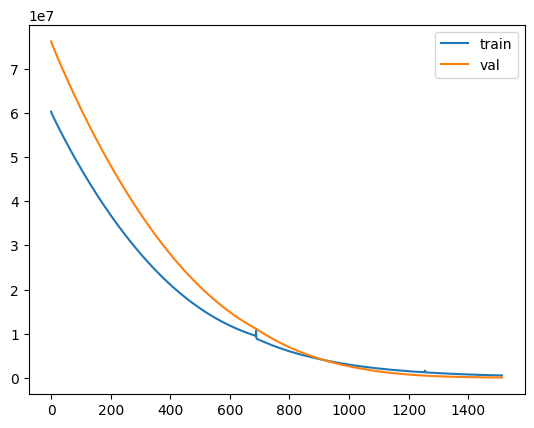

In [260]:
losses_train_24h = losses_24h['train']
losses_val_24h = losses_24h['val']

plt.plot(losses_train_24h, label='train')
plt.plot(losses_val_24h, label='val')
plt.legend()
plt.show()

c:\Users\Konrad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.2.2 when using version 1.4.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


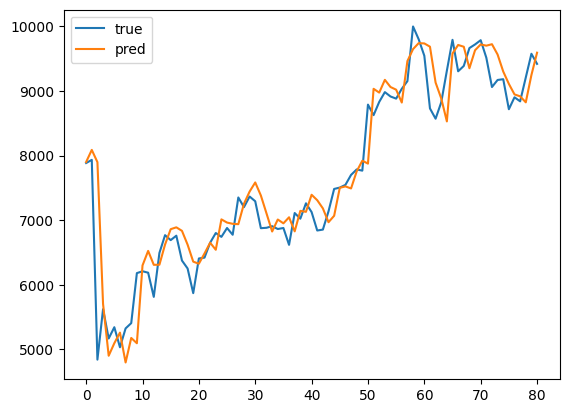

R2: 0.8797151627719781
MSE: 230037.28125


In [263]:
hyperparams = {
    'sequence_length': 7,
    'batch_size': 32,
    'input_dim': 8,
    'hidden_dim': 256,
    'output_dim': 1,
    'num_layers': 2,
    'lr': 0.001,
    'epochs': 2500,
    'patience': 10
}

model_24h = LSTMModel(
    input_dim=hyperparams['input_dim'],
    hidden_dim=hyperparams['hidden_dim'],
    output_dim=hyperparams['output_dim'],
    num_layers=hyperparams['num_layers']
).to(device)

model_24h.load_state_dict(torch.load('24h_model.pt'))

scaler_24h = pickle.load(open('24h_scaler.pkl', 'rb'))

y_true_24h, y_pred_24h = validate(model_24h, test_data_24h, hyperparams_24h['sequence_length'], hyperparams_24h['batch_size'], scaler_24h)